### Predicting Red Wine Quality

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy 
from scipy.stats.stats import pearsonr
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

from graphviz import Source
from sklearn.tree import export_graphviz
import os

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

%tensorflow_version 2.x
import tensorflow as tf
import timeit

import tensorflow as tf
from tensorflow import keras

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

UsageError: Line magic function `%tensorflow_version` not found.


In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)


def Average(lst): 
    return sum(lst) / len(lst) 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
wineRed = pd.read_csv('./processeddata/RedWine.csv', skipinitialspace=True, index_col=0)

wineRed = wineRed.loc[:, wineRed.columns != "Categorical Quality"]
wineRed['Categorical Quality'] = wineRed['quality']
cleanup_nums = {"Categorical Quality": {3: "Low", 4:"Low" , 5: "Low", 6: "High",
                                  7: "High", 8: "High"}}
wineRed = wineRed.replace(cleanup_nums)
cleanup_nums = {"Categorical Quality": {"Low": 0, "High":1}}
wineRed = wineRed.replace(cleanup_nums)

In [14]:
X_wineRed_help = wineRed.loc[:, wineRed.columns != "Categorical Quality"]
X_wineRed = X_wineRed_help.loc[:, X_wineRed_help.columns != "quality"]
y_wineRed = wineRed["Categorical Quality"]

In [15]:

X_trainRed, X_testRed, y_trainRed, y_testRed = train_test_split(X_wineRed, y_wineRed, test_size=0.2, random_state=42)

# Define the scaler 
scaler = StandardScaler().fit(X_trainRed)
X_trainRed = scaler.transform(X_trainRed)
X_testRed = scaler.transform(X_testRed)

In [16]:
X_trainRed = np.asarray(X_trainRed)
y_trainRed = np.asarray(y_trainRed)
X_testRed = np.asarray(X_testRed)
y_testRed = np.asarray(y_testRed)

### (a) Analysis of neural network models with varying number of hidden layers and number of units (nodes) in the hidden layers

### Architecture 1

In [17]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras
import pandas as pd

kf = KFold(n_splits=10, random_state=None, shuffle=True)
i = 1
Average_1_Unit = []
AverageTesting_1 = []

for train_index, test_index in kf.split(X_trainRed):
    print("CV: {:.1f}".format(i))  
    X_train_cv, X_test_cv = X_trainRed[train_index], X_trainRed[test_index]
    y_train_cv, y_test_cv = y_trainRed[train_index], y_trainRed[test_index]
    
    for j in range(1,20):
        print("Number of Units: ", j)
        model_1 = keras.models.Sequential([
            keras.layers.Dense(j, activation = 'relu', input_shape=(11,)), 
            keras.layers.Dense(1, activation = 'sigmoid')])
        
        model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
        fit_score = model_1.fit(X_train_cv, y_train_cv, epochs=30, batch_size=10, verbose=1)
        model_1.evaluate(X_test_cv, y_test_cv,verbose=1)
        AverageTesting_1.append(model_1.evaluate(X_test_cv, y_test_cv,verbose=1))
        Average_1_Unit.append(Average(fit_score.history['accuracy']))
        print('\n')
    i = i + 1
print(Average_1_Unit)

CV: 1.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 879us/sample - loss: 0.6839 - accuracy: 0.5399
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6698 - accuracy: 0.5992
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6582 - accuracy: 0.6299
Epoch 4/30
978/978 [==============================] - 0s 152us/sample - loss: 0.6466 - accuracy: 0.6472
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6354 - accuracy: 0.6687
Epoch 6/30
978/978 [==============================] - 0s 157us/sample - loss: 0.6248 - accuracy: 0.6851
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6154 - accuracy: 0.7065
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6074 - accuracy: 0.7086
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6007 - accuracy: 0.7045
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.9341 - accuracy: 0.4346
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.8374 - accuracy: 0.4479
Epoch 3/30
978/978 [==============================] - 0s 158us/sample - loss: 0.7786 - accuracy: 0.4663
Epoch 4/30
978/978 [==============================] - 0s 161us/sample - loss: 0.7412 - accuracy: 0.4847
Epoch 5/30
978/978 [==============================] - 0s 156us/sample - loss: 0.7180 - accuracy: 0.5225
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.7022 - accuracy: 0.5450
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6901 - accuracy: 0.5777
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6799 - accuracy: 0.6145
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6699 - accuracy: 0.6370
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 858us/sample - loss: 0.7125 - accuracy: 0.6012
Epoch 2/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6684 - accuracy: 0.6207
Epoch 3/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6388 - accuracy: 0.6329
Epoch 4/30
978/978 [==============================] - 0s 150us/sample - loss: 0.6173 - accuracy: 0.6462
Epoch 5/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6020 - accuracy: 0.6759
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5913 - accuracy: 0.6861
Epoch 7/30
978/978 [==============================] - 0s 149us/sample - loss: 0.5844 - accuracy: 0.7004
Epoch 8/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5789 - accuracy: 0.7096
Epoch 9/30
978/978 [==============================] - 0s 148us/sample - loss: 0.5750 - accuracy: 0.7117
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7977 - accuracy: 0.5184
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.7327 - accuracy: 0.5368
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6938 - accuracy: 0.5879
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6622 - accuracy: 0.6442
Epoch 5/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6292 - accuracy: 0.6851
Epoch 6/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5972 - accuracy: 0.7004
Epoch 7/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5729 - accuracy: 0.7137
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5562 - accuracy: 0.7311
Epoch 9/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5463 - accuracy: 0.7372
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 779us/sample - loss: 0.7090 - accuracy: 0.5082
Epoch 2/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6798 - accuracy: 0.6339
Epoch 3/30
978/978 [==============================] - 0s 147us/sample - loss: 0.6555 - accuracy: 0.6902
Epoch 4/30
978/978 [==============================] - 0s 152us/sample - loss: 0.6324 - accuracy: 0.7014
Epoch 5/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6091 - accuracy: 0.7168
Epoch 6/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5882 - accuracy: 0.7106
Epoch 7/30
978/978 [==============================] - 0s 153us/sample - loss: 0.5707 - accuracy: 0.7157
Epoch 8/30
978/978 [==============================] - 0s 152us/sample - loss: 0.5585 - accuracy: 0.7178
Epoch 9/30
978/978 [==============================] - 0s 153us/sample - loss: 0.5494 - accuracy: 0.7229
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 832us/sample - loss: 0.7141 - accuracy: 0.5583
Epoch 2/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6560 - accuracy: 0.6207
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6152 - accuracy: 0.6820
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5863 - accuracy: 0.7025
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5657 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5529 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5446 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5391 - accuracy: 0.7229
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5355 - accuracy: 0.7290
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 970us/sample - loss: 0.7731 - accuracy: 0.5613
Epoch 2/30
978/978 [==============================] - 0s 154us/sample - loss: 0.6929 - accuracy: 0.5900
Epoch 3/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6487 - accuracy: 0.6278
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6201 - accuracy: 0.6656
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6000 - accuracy: 0.6892
Epoch 6/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5838 - accuracy: 0.7014
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5712 - accuracy: 0.7147
Epoch 8/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5625 - accuracy: 0.7117
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5555 - accuracy: 0.7127
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 840us/sample - loss: 0.7718 - accuracy: 0.4366
Epoch 2/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6901 - accuracy: 0.5613
Epoch 3/30
978/978 [==============================] - 0s 154us/sample - loss: 0.6395 - accuracy: 0.6462
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6044 - accuracy: 0.6708
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5811 - accuracy: 0.6922
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5651 - accuracy: 0.7065
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5541 - accuracy: 0.7127
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5458 - accuracy: 0.7147
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5411 - accuracy: 0.7188
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 901us/sample - loss: 0.7071 - accuracy: 0.5307
Epoch 2/30
978/978 [==============================] - 0s 203us/sample - loss: 0.6481 - accuracy: 0.6401
Epoch 3/30
978/978 [==============================] - 0s 202us/sample - loss: 0.6060 - accuracy: 0.6892
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5784 - accuracy: 0.6963
Epoch 5/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5591 - accuracy: 0.7106
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5469 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5384 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5319 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5272 - accuracy: 0.7301
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7764 - accuracy: 0.4632
Epoch 2/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6723 - accuracy: 0.5736
Epoch 3/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6175 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5865 - accuracy: 0.7065
Epoch 5/30
978/978 [==============================] - 0s 156us/sample - loss: 0.5689 - accuracy: 0.7127
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5567 - accuracy: 0.7188
Epoch 7/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5489 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5422 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 149us/sample - loss: 0.5373 - accuracy: 0.7290
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 863us/sample - loss: 0.7862 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6662 - accuracy: 0.5951
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6121 - accuracy: 0.6697
Epoch 4/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5856 - accuracy: 0.6871
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5694 - accuracy: 0.7076
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5583 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5501 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5437 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5383 - accuracy: 0.7270
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 838us/sample - loss: 0.7686 - accuracy: 0.4939
Epoch 2/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6639 - accuracy: 0.6145
Epoch 3/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6110 - accuracy: 0.6667
Epoch 4/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5796 - accuracy: 0.7004
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5598 - accuracy: 0.7065
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5468 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5377 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5312 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5266 - accuracy: 0.7352
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6276 - accuracy: 0.6677
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5917 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5696 - accuracy: 0.7117
Epoch 4/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5558 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5462 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5392 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5342 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5302 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5254 - accuracy: 0.7423
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 829us/sample - loss: 0.6300 - accuracy: 0.6616
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5701 - accuracy: 0.7076
Epoch 3/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5462 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5348 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5275 - accuracy: 0.7413
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5226 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5186 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5154 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5126 - accuracy: 0.7505
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 859us/sample - loss: 0.7176 - accuracy: 0.4867
Epoch 2/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6389 - accuracy: 0.6268
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5924 - accuracy: 0.6820
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5642 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5466 - accuracy: 0.7127
Epoch 6/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5361 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5293 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 153us/sample - loss: 0.5249 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5212 - accuracy: 0.7393
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6938 - accuracy: 0.5982
Epoch 2/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6276 - accuracy: 0.6575
Epoch 3/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5910 - accuracy: 0.6902
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5692 - accuracy: 0.7035
Epoch 5/30
978/978 [==============================] - 0s 156us/sample - loss: 0.5556 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5469 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5401 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5344 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5304 - accuracy: 0.7280
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 844us/sample - loss: 0.7525 - accuracy: 0.5164
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6214 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5759 - accuracy: 0.7106
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5556 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5433 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5343 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5270 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5220 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5183 - accuracy: 0.7331
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 888us/sample - loss: 0.6414 - accuracy: 0.6370
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5718 - accuracy: 0.7168
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5477 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5366 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5295 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5244 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5205 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5174 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5142 - accuracy: 0.7515
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 964us/sample - loss: 0.7530 - accuracy: 0.5010
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6129 - accuracy: 0.6759
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5677 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5492 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5380 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5297 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5246 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5192 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5157 - accuracy: 0.7382
Epoch 10/30
978/978 



CV: 2.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8811 - accuracy: 0.4417
Epoch 2/30
978/978 [==============================] - 0s 210us/sample - loss: 0.7936 - accuracy: 0.4642
Epoch 3/30
978/978 [==============================] - 0s 208us/sample - loss: 0.7404 - accuracy: 0.5143
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.7108 - accuracy: 0.5409
Epoch 5/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6927 - accuracy: 0.5624
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6808 - accuracy: 0.5777
Epoch 7/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6724 - accuracy: 0.5890
Epoch 8/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6656 - accuracy: 0.5992
Epoch 9/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6600 - accuracy: 0.6022
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7396 - accuracy: 0.4928
Epoch 2/30
978/978 [==============================] - 0s 198us/sample - loss: 0.7021 - accuracy: 0.5133
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6771 - accuracy: 0.5491
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6578 - accuracy: 0.5746
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6420 - accuracy: 0.6176
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6294 - accuracy: 0.6585
Epoch 7/30
978/978 [==============================] - 0s 199us/sample - loss: 0.6182 - accuracy: 0.6840
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6084 - accuracy: 0.6922
Epoch 9/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5996 - accuracy: 0.7025
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 962us/sample - loss: 0.7054 - accuracy: 0.4939
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6537 - accuracy: 0.5429
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6291 - accuracy: 0.5818
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6134 - accuracy: 0.6022
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6019 - accuracy: 0.6196
Epoch 6/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5929 - accuracy: 0.6247
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5852 - accuracy: 0.6258
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5782 - accuracy: 0.6339
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5720 - accuracy: 0.6329
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7853 - accuracy: 0.5624
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.7014 - accuracy: 0.6043
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6528 - accuracy: 0.6483
Epoch 4/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6213 - accuracy: 0.6656
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5988 - accuracy: 0.6963
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5823 - accuracy: 0.7086
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5707 - accuracy: 0.7096
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5615 - accuracy: 0.7198
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5548 - accuracy: 0.7178
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 913us/sample - loss: 0.8456 - accuracy: 0.4847
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.7560 - accuracy: 0.5511
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.7050 - accuracy: 0.5951
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6727 - accuracy: 0.6380
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6507 - accuracy: 0.6616
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6339 - accuracy: 0.6718
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6212 - accuracy: 0.6820
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6111 - accuracy: 0.6963
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6024 - accuracy: 0.7055
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 983us/sample - loss: 0.8518 - accuracy: 0.4755
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.7392 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6595 - accuracy: 0.6288
Epoch 4/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6141 - accuracy: 0.6677
Epoch 5/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5883 - accuracy: 0.6912
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5730 - accuracy: 0.7025
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5630 - accuracy: 0.7137
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5551 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5487 - accuracy: 0.7239
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 972us/sample - loss: 0.8646 - accuracy: 0.4059
Epoch 2/30
978/978 [==============================] - 0s 211us/sample - loss: 0.7256 - accuracy: 0.4847
Epoch 3/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6530 - accuracy: 0.6503
Epoch 4/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6101 - accuracy: 0.6984
Epoch 5/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5827 - accuracy: 0.7106
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5635 - accuracy: 0.7137
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5504 - accuracy: 0.7168
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5411 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5346 - accuracy: 0.7229
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 953us/sample - loss: 0.7032 - accuracy: 0.5787
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6601 - accuracy: 0.6288
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6246 - accuracy: 0.6697
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5939 - accuracy: 0.6943
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5696 - accuracy: 0.7025
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5524 - accuracy: 0.7086
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5401 - accuracy: 0.7178
Epoch 8/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5327 - accuracy: 0.7270
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5252 - accuracy: 0.7280
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 896us/sample - loss: 0.7234 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6555 - accuracy: 0.6166
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6159 - accuracy: 0.6554
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5899 - accuracy: 0.6943
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5712 - accuracy: 0.7045
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5579 - accuracy: 0.7137
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5481 - accuracy: 0.7106
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5409 - accuracy: 0.7229
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5353 - accuracy: 0.7219
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 873us/sample - loss: 0.6643 - accuracy: 0.6483
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6045 - accuracy: 0.6861
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5744 - accuracy: 0.7035
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5562 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5442 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5354 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5284 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5233 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5189 - accuracy: 0.7331
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7728 - accuracy: 0.4652
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6759 - accuracy: 0.5317
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6263 - accuracy: 0.6616
Epoch 4/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5887 - accuracy: 0.7127
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5592 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5390 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5256 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5176 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5127 - accuracy: 0.7423
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 927us/sample - loss: 0.5977 - accuracy: 0.7076
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5533 - accuracy: 0.7372
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5329 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5220 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5158 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5122 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5085 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5061 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5035 - accuracy: 0.7464
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.7161 - accuracy: 0.5286
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6173 - accuracy: 0.6728
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5694 - accuracy: 0.7168
Epoch 4/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5439 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5295 - accuracy: 0.7413
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5213 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5152 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5104 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5073 - accuracy: 0.7536
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 935us/sample - loss: 0.6682 - accuracy: 0.5757
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6013 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5674 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5479 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5358 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5275 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5213 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5172 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5130 - accuracy: 0.7444
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 917us/sample - loss: 0.7435 - accuracy: 0.5368
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6379 - accuracy: 0.6462
Epoch 3/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5905 - accuracy: 0.7127
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5629 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5462 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5340 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5260 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5199 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5158 - accuracy: 0.7362
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 971us/sample - loss: 0.6878 - accuracy: 0.5879
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5978 - accuracy: 0.7004
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5530 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5300 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5167 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5095 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5051 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5016 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 184us/sample - loss: 0.4983 - accuracy: 0.7546
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 963us/sample - loss: 0.7675 - accuracy: 0.5573
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6371 - accuracy: 0.6503
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5849 - accuracy: 0.7127
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5569 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5417 - accuracy: 0.7260
Epoch 6/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5328 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5263 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5211 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5174 - accuracy: 0.7403
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 869us/sample - loss: 0.6208 - accuracy: 0.6564
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5748 - accuracy: 0.6984
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5532 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5401 - accuracy: 0.7147
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5307 - accuracy: 0.7229
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5252 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5189 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5155 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5115 - accuracy: 0.7372
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 895us/sample - loss: 0.6344 - accuracy: 0.6575
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5681 - accuracy: 0.7168
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5391 - accuracy: 0.7352
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5249 - accuracy: 0.7505
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5171 - accuracy: 0.7495
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5111 - accuracy: 0.7526
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5070 - accuracy: 0.7566
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5031 - accuracy: 0.7587
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5004 - accuracy: 0.7546
Epoch 10/30
978/978 



CV: 3.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 850us/sample - loss: 0.8175 - accuracy: 0.5757
Epoch 2/30
978/978 [==============================] - 0s 155us/sample - loss: 0.7493 - accuracy: 0.5961
Epoch 3/30
978/978 [==============================] - 0s 155us/sample - loss: 0.7083 - accuracy: 0.6166
Epoch 4/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6850 - accuracy: 0.6421
Epoch 5/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6705 - accuracy: 0.6503
Epoch 6/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6590 - accuracy: 0.6564
Epoch 7/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6498 - accuracy: 0.6544
Epoch 8/30
978/978 [==============================] - 0s 152us/sample - loss: 0.6418 - accuracy: 0.6656
Epoch 9/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6344 - accuracy: 0.6718
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 895us/sample - loss: 0.7941 - accuracy: 0.4325
Epoch 2/30
978/978 [==============================] - 0s 166us/sample - loss: 0.7429 - accuracy: 0.4591
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.7076 - accuracy: 0.5112
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6820 - accuracy: 0.5900
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6638 - accuracy: 0.6288
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6499 - accuracy: 0.6411
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6381 - accuracy: 0.6442
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6283 - accuracy: 0.6503
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6180 - accuracy: 0.6575
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 908us/sample - loss: 0.7073 - accuracy: 0.4499
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6841 - accuracy: 0.5399
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6689 - accuracy: 0.5971
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6556 - accuracy: 0.6278
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6430 - accuracy: 0.6442
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6296 - accuracy: 0.6626
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6159 - accuracy: 0.6769
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6022 - accuracy: 0.6861
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5892 - accuracy: 0.6973
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 873us/sample - loss: 0.6710 - accuracy: 0.6155
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6322 - accuracy: 0.6350
Epoch 3/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6084 - accuracy: 0.6656
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5925 - accuracy: 0.6728
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5798 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5708 - accuracy: 0.6902
Epoch 7/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5641 - accuracy: 0.6933
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5596 - accuracy: 0.6963
Epoch 9/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5552 - accuracy: 0.7004
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7279 - accuracy: 0.5276
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6733 - accuracy: 0.6084
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6424 - accuracy: 0.6513
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6229 - accuracy: 0.6667
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6084 - accuracy: 0.6871
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5974 - accuracy: 0.6933
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5884 - accuracy: 0.6963
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5803 - accuracy: 0.7055
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5733 - accuracy: 0.7065
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 918us/sample - loss: 0.7134 - accuracy: 0.4734
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6766 - accuracy: 0.5603
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6498 - accuracy: 0.6155
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6261 - accuracy: 0.6585
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6039 - accuracy: 0.7076
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5840 - accuracy: 0.7065
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5679 - accuracy: 0.7127
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5555 - accuracy: 0.7127
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5463 - accuracy: 0.7168
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 908us/sample - loss: 0.6928 - accuracy: 0.5675
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6248 - accuracy: 0.6247
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5973 - accuracy: 0.6595
Epoch 4/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5804 - accuracy: 0.6861
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5673 - accuracy: 0.6922
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5568 - accuracy: 0.6953
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5491 - accuracy: 0.6994
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5431 - accuracy: 0.7045
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5385 - accuracy: 0.7065
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 891us/sample - loss: 0.7476 - accuracy: 0.5593
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6648 - accuracy: 0.6483
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6225 - accuracy: 0.6912
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5950 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5749 - accuracy: 0.7260
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5595 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5476 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5382 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5312 - accuracy: 0.7382
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 858us/sample - loss: 0.7336 - accuracy: 0.5082
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6666 - accuracy: 0.6135
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6260 - accuracy: 0.6748
Epoch 4/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5980 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5760 - accuracy: 0.7168
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5602 - accuracy: 0.7157
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5504 - accuracy: 0.7198
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5433 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5379 - accuracy: 0.7342
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6636 - accuracy: 0.6319
Epoch 2/30
978/978 [==============================] - 0s 157us/sample - loss: 0.6154 - accuracy: 0.6759
Epoch 3/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5854 - accuracy: 0.7025
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5656 - accuracy: 0.7035
Epoch 5/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5527 - accuracy: 0.7055
Epoch 6/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5429 - accuracy: 0.7147
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5360 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5306 - accuracy: 0.7229
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5259 - accuracy: 0.7321
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 922us/sample - loss: 0.6702 - accuracy: 0.5736
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6085 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5785 - accuracy: 0.7157
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5612 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5497 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5425 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5354 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5301 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5261 - accuracy: 0.7290
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 882us/sample - loss: 0.8059 - accuracy: 0.4857
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6795 - accuracy: 0.5982
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6224 - accuracy: 0.6524
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5895 - accuracy: 0.6881
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5674 - accuracy: 0.6984
Epoch 6/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5534 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5441 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5368 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5312 - accuracy: 0.7311
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 931us/sample - loss: 0.7274 - accuracy: 0.5542
Epoch 2/30
978/978 [==============================] - 0s 207us/sample - loss: 0.6248 - accuracy: 0.6585
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5790 - accuracy: 0.7004
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5537 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5388 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5293 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5221 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5165 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5120 - accuracy: 0.7403
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 896us/sample - loss: 0.7426 - accuracy: 0.5317
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6374 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5900 - accuracy: 0.7035
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5644 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5491 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5397 - accuracy: 0.7229
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5325 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5268 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5222 - accuracy: 0.7311
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7503 - accuracy: 0.5051
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6528 - accuracy: 0.6145
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6033 - accuracy: 0.7025
Epoch 4/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5746 - accuracy: 0.7147
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5564 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5446 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5353 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5297 - accuracy: 0.7393
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5239 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 899us/sample - loss: 0.6890 - accuracy: 0.5624
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6080 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5720 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5525 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5403 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5314 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5242 - accuracy: 0.7362
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5193 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5144 - accuracy: 0.7413
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 896us/sample - loss: 0.6559 - accuracy: 0.5982
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5997 - accuracy: 0.6840
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5710 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5544 - accuracy: 0.7311
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5437 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5362 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5307 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5261 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5215 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 904us/sample - loss: 0.8618 - accuracy: 0.5337
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6743 - accuracy: 0.6012
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5973 - accuracy: 0.6677
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5600 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5413 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5305 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5236 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5188 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5156 - accuracy: 0.7403
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 914us/sample - loss: 0.7687 - accuracy: 0.5072
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6078 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5592 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5383 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5283 - accuracy: 0.7260
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5212 - accuracy: 0.7331
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5175 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5137 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5110 - accuracy: 0.7331
Epoch 10/30
978/978 



CV: 4.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 903us/sample - loss: 0.8125 - accuracy: 0.3875
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.7635 - accuracy: 0.4151
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.7358 - accuracy: 0.4448
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.7194 - accuracy: 0.4683
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.7093 - accuracy: 0.4755
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.7028 - accuracy: 0.4898
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6983 - accuracy: 0.5031
Epoch 8/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6948 - accuracy: 0.5174
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6921 - accuracy: 0.5276
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 907us/sample - loss: 0.6959 - accuracy: 0.5828
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6668 - accuracy: 0.6115
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6434 - accuracy: 0.6380
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6238 - accuracy: 0.6605
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6070 - accuracy: 0.6738
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5932 - accuracy: 0.6840
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5820 - accuracy: 0.6892
Epoch 8/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5729 - accuracy: 0.6994
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5657 - accuracy: 0.7035
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.8293 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.7713 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.7298 - accuracy: 0.5685
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6983 - accuracy: 0.6002
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6735 - accuracy: 0.6217
Epoch 6/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6507 - accuracy: 0.6493
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6314 - accuracy: 0.6718
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6142 - accuracy: 0.6902
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6000 - accuracy: 0.6963
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 923us/sample - loss: 0.7689 - accuracy: 0.5511
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.7035 - accuracy: 0.5706
Epoch 3/30
978/978 [==============================] - 0s 216us/sample - loss: 0.6610 - accuracy: 0.6002
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6316 - accuracy: 0.6493
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6123 - accuracy: 0.6759
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6000 - accuracy: 0.6881
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5912 - accuracy: 0.6984
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5848 - accuracy: 0.7065
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5798 - accuracy: 0.7004
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 934us/sample - loss: 0.8462 - accuracy: 0.4836
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.7512 - accuracy: 0.5112
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6953 - accuracy: 0.5593
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6566 - accuracy: 0.5900
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6282 - accuracy: 0.6268
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6073 - accuracy: 0.6554
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5911 - accuracy: 0.6820
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5782 - accuracy: 0.6963
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5676 - accuracy: 0.7004
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 976us/sample - loss: 0.8180 - accuracy: 0.4070
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.7217 - accuracy: 0.5245
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6678 - accuracy: 0.6196
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6349 - accuracy: 0.6810
Epoch 5/30
978/978 [==============================] - 0s 213us/sample - loss: 0.6120 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5941 - accuracy: 0.7096
Epoch 7/30
978/978 [==============================] - 0s 246us/sample - loss: 0.5794 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 224us/sample - loss: 0.5671 - accuracy: 0.7311
Epoch 9/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5569 - accuracy: 0.7311
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7351 - accuracy: 0.6043
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6471 - accuracy: 0.6575
Epoch 3/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6025 - accuracy: 0.6810
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5772 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5621 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5512 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5432 - accuracy: 0.7290
Epoch 8/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5373 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 157us/sample - loss: 0.5328 - accuracy: 0.7342
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 884us/sample - loss: 0.7976 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6959 - accuracy: 0.5675
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6349 - accuracy: 0.6462
Epoch 4/30
978/978 [==============================] - 0s 221us/sample - loss: 0.5964 - accuracy: 0.6984
Epoch 5/30
978/978 [==============================] - 0s 223us/sample - loss: 0.5719 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 228us/sample - loss: 0.5562 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5459 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5386 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 234us/sample - loss: 0.5337 - accuracy: 0.7280
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 973us/sample - loss: 0.7739 - accuracy: 0.4806
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6633 - accuracy: 0.5971
Epoch 3/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6206 - accuracy: 0.6605
Epoch 4/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5978 - accuracy: 0.6892
Epoch 5/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5820 - accuracy: 0.7117
Epoch 6/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5713 - accuracy: 0.7157
Epoch 7/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5629 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5555 - accuracy: 0.7188
Epoch 9/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5496 - accuracy: 0.7188
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7642 - accuracy: 0.5123
Epoch 2/30
978/978 [==============================] - 0s 211us/sample - loss: 0.6735 - accuracy: 0.6053
Epoch 3/30
978/978 [==============================] - 0s 201us/sample - loss: 0.6196 - accuracy: 0.6708
Epoch 4/30
978/978 [==============================] - 0s 211us/sample - loss: 0.5843 - accuracy: 0.6953
Epoch 5/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5601 - accuracy: 0.7065
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5447 - accuracy: 0.7065
Epoch 7/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5356 - accuracy: 0.7117
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5289 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5242 - accuracy: 0.7198
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 894us/sample - loss: 0.7527 - accuracy: 0.5389
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6520 - accuracy: 0.6380
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6037 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5779 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5616 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5510 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5421 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5363 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5310 - accuracy: 0.7515
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 872us/sample - loss: 0.7573 - accuracy: 0.4519
Epoch 2/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6639 - accuracy: 0.6125
Epoch 3/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6117 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5776 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5539 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5388 - accuracy: 0.7382
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5287 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5219 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5178 - accuracy: 0.7413
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6785 - accuracy: 0.5879
Epoch 2/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6191 - accuracy: 0.6789
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5878 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5687 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5565 - accuracy: 0.7219
Epoch 6/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5474 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5408 - accuracy: 0.7249
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5347 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5303 - accuracy: 0.7270
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 884us/sample - loss: 0.6348 - accuracy: 0.6329
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5886 - accuracy: 0.6892
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5653 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5515 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5411 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5337 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5275 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5232 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5186 - accuracy: 0.7362
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 921us/sample - loss: 0.6747 - accuracy: 0.6360
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6131 - accuracy: 0.6820
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5791 - accuracy: 0.6922
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5575 - accuracy: 0.7055
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5434 - accuracy: 0.7096
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5332 - accuracy: 0.7147
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5256 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5209 - accuracy: 0.7311
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5163 - accuracy: 0.7301
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 886us/sample - loss: 0.8350 - accuracy: 0.4059
Epoch 2/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6595 - accuracy: 0.6196
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5840 - accuracy: 0.7168
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5484 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5305 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5203 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5135 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5099 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5069 - accuracy: 0.7413
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 856us/sample - loss: 0.6818 - accuracy: 0.5838
Epoch 2/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6014 - accuracy: 0.6564
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5613 - accuracy: 0.7055
Epoch 4/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5425 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5324 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5260 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5222 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5171 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5142 - accuracy: 0.7352
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 941us/sample - loss: 0.6897 - accuracy: 0.5358
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6043 - accuracy: 0.6493
Epoch 3/30
978/978 [==============================] - 0s 236us/sample - loss: 0.5686 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5512 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 254us/sample - loss: 0.5412 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 248us/sample - loss: 0.5357 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5310 - accuracy: 0.7249
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5272 - accuracy: 0.7270
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5238 - accuracy: 0.7239
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6813 - accuracy: 0.6186
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6023 - accuracy: 0.6728
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5640 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5438 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5338 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5273 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5225 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5196 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5169 - accuracy: 0.7423
Epoch 10/30
978/978 [=



CV: 5.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 906us/sample - loss: 0.6929 - accuracy: 0.5450
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6710 - accuracy: 0.6063
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6499 - accuracy: 0.6636
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6315 - accuracy: 0.6892
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6163 - accuracy: 0.7076
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6039 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5937 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5856 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5793 - accuracy: 0.7505
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 989us/sample - loss: 0.7679 - accuracy: 0.5450
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.7270 - accuracy: 0.5787
Epoch 3/30
978/978 [==============================] - 0s 210us/sample - loss: 0.7018 - accuracy: 0.6063
Epoch 4/30
978/978 [==============================] - 0s 215us/sample - loss: 0.6832 - accuracy: 0.6258
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6671 - accuracy: 0.6391
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6536 - accuracy: 0.6585
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6416 - accuracy: 0.6708
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6312 - accuracy: 0.6810
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6216 - accuracy: 0.6881
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 930us/sample - loss: 0.7558 - accuracy: 0.5204
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.7168 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6924 - accuracy: 0.5869
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6741 - accuracy: 0.6350
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6585 - accuracy: 0.6575
Epoch 6/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6444 - accuracy: 0.6759
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6314 - accuracy: 0.6892
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6197 - accuracy: 0.7055
Epoch 9/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6093 - accuracy: 0.7117
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 907us/sample - loss: 0.7924 - accuracy: 0.3620
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.7389 - accuracy: 0.4039
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.7015 - accuracy: 0.4969
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6733 - accuracy: 0.6012
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6509 - accuracy: 0.6472
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6310 - accuracy: 0.6687
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6139 - accuracy: 0.6779
Epoch 8/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5975 - accuracy: 0.6973
Epoch 9/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5846 - accuracy: 0.7035
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 994us/sample - loss: 0.7977 - accuracy: 0.4734
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6955 - accuracy: 0.5665
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6431 - accuracy: 0.6421
Epoch 4/30
978/978 [==============================] - 0s 203us/sample - loss: 0.6116 - accuracy: 0.6789
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5905 - accuracy: 0.6943
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5758 - accuracy: 0.6943
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5646 - accuracy: 0.7076
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5559 - accuracy: 0.7178
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5478 - accuracy: 0.7209
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 966us/sample - loss: 1.0015 - accuracy: 0.4468
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.8321 - accuracy: 0.4816
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.7311 - accuracy: 0.5440
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6679 - accuracy: 0.6227
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6253 - accuracy: 0.6759
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5955 - accuracy: 0.6953
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5742 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5594 - accuracy: 0.7229
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5494 - accuracy: 0.7260
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8403 - accuracy: 0.4816
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.7277 - accuracy: 0.5429
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6654 - accuracy: 0.6033
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6268 - accuracy: 0.6431
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6017 - accuracy: 0.6708
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5845 - accuracy: 0.6953
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5732 - accuracy: 0.7014
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5652 - accuracy: 0.6984
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5582 - accuracy: 0.7106
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.6684 - accuracy: 0.6186
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6288 - accuracy: 0.6605
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6024 - accuracy: 0.6779
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5846 - accuracy: 0.6892
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5720 - accuracy: 0.6973
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5633 - accuracy: 0.6994
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5568 - accuracy: 0.7045
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5509 - accuracy: 0.7076
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5471 - accuracy: 0.7147
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 946us/sample - loss: 0.7342 - accuracy: 0.5123
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6477 - accuracy: 0.6329
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6078 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5845 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5667 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5538 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5449 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5381 - accuracy: 0.7331
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5333 - accuracy: 0.7403
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 950us/sample - loss: 0.8395 - accuracy: 0.4908
Epoch 2/30
978/978 [==============================] - 0s 199us/sample - loss: 0.6792 - accuracy: 0.5900
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6056 - accuracy: 0.6861
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5699 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5512 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5394 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5319 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5265 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5227 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 953us/sample - loss: 0.8409 - accuracy: 0.3957
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.7121 - accuracy: 0.5051
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6465 - accuracy: 0.6288
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6062 - accuracy: 0.6697
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5796 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5620 - accuracy: 0.6953
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5512 - accuracy: 0.7147
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5437 - accuracy: 0.7219
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5384 - accuracy: 0.7229
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 926us/sample - loss: 0.7046 - accuracy: 0.5930
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6157 - accuracy: 0.6646
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5733 - accuracy: 0.7209
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5524 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5412 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5339 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5300 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5262 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5237 - accuracy: 0.7301
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 962us/sample - loss: 0.7770 - accuracy: 0.4417
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6578 - accuracy: 0.6247
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6032 - accuracy: 0.6789
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5757 - accuracy: 0.7086
Epoch 5/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5595 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5490 - accuracy: 0.7219
Epoch 7/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5412 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5349 - accuracy: 0.7393
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5300 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6524 - accuracy: 0.6053
Epoch 2/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6021 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5753 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5600 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5491 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5419 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5361 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5325 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5289 - accuracy: 0.7331
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 949us/sample - loss: 0.6762 - accuracy: 0.6043
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6059 - accuracy: 0.6810
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5706 - accuracy: 0.7157
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5508 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5388 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5316 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 211us/sample - loss: 0.5263 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5229 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5197 - accuracy: 0.7495
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 900us/sample - loss: 0.7870 - accuracy: 0.4969
Epoch 2/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6468 - accuracy: 0.6800
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5947 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5694 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5541 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5446 - accuracy: 0.7382
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5371 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5319 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5281 - accuracy: 0.7495
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 998us/sample - loss: 0.6260 - accuracy: 0.6626
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5912 - accuracy: 0.6902
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5699 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5559 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5461 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5378 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5325 - accuracy: 0.7249
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5273 - accuracy: 0.7249
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5241 - accuracy: 0.7331
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 911us/sample - loss: 0.7620 - accuracy: 0.5010
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6472 - accuracy: 0.6319
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5919 - accuracy: 0.6973
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5648 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5507 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5412 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5350 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5313 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5279 - accuracy: 0.7362
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 923us/sample - loss: 0.6847 - accuracy: 0.5910
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6121 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5829 - accuracy: 0.7025
Epoch 4/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5668 - accuracy: 0.7086
Epoch 5/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5547 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5465 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5392 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5324 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5276 - accuracy: 0.7444
Epoch 10/30
978/978 



CV: 6.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 916us/sample - loss: 0.6794 - accuracy: 0.5215
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6708 - accuracy: 0.5511
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6591 - accuracy: 0.6585
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6462 - accuracy: 0.6789
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6334 - accuracy: 0.6933
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6221 - accuracy: 0.7004
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6122 - accuracy: 0.7106
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6037 - accuracy: 0.7147
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5968 - accuracy: 0.7198
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 925us/sample - loss: 1.0501 - accuracy: 0.4029
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.9253 - accuracy: 0.3834
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.8390 - accuracy: 0.4100
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.7816 - accuracy: 0.4294
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.7414 - accuracy: 0.4673
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.7122 - accuracy: 0.5133
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6900 - accuracy: 0.5532
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6735 - accuracy: 0.5890
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6603 - accuracy: 0.6207
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 915us/sample - loss: 0.6762 - accuracy: 0.5593
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6407 - accuracy: 0.6074
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6190 - accuracy: 0.6268
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6034 - accuracy: 0.6442
Epoch 5/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5918 - accuracy: 0.6595
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5831 - accuracy: 0.6708
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5755 - accuracy: 0.6881
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5697 - accuracy: 0.6933
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5643 - accuracy: 0.7004
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 878us/sample - loss: 0.6599 - accuracy: 0.6002
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6318 - accuracy: 0.6656
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6163 - accuracy: 0.6810
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6042 - accuracy: 0.6984
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5951 - accuracy: 0.7076
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5870 - accuracy: 0.7137
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5800 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5733 - accuracy: 0.7168
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5672 - accuracy: 0.7209
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 857us/sample - loss: 0.7689 - accuracy: 0.5051
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6916 - accuracy: 0.5879
Epoch 3/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6565 - accuracy: 0.6186
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6340 - accuracy: 0.6452
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6153 - accuracy: 0.6626
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6013 - accuracy: 0.6748
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5883 - accuracy: 0.6892
Epoch 8/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5777 - accuracy: 0.6973
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5695 - accuracy: 0.6994
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 922us/sample - loss: 0.7484 - accuracy: 0.5521
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6699 - accuracy: 0.5971
Epoch 3/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6282 - accuracy: 0.6431
Epoch 4/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6034 - accuracy: 0.6677
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5859 - accuracy: 0.6994
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5741 - accuracy: 0.7035
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5651 - accuracy: 0.7168
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5578 - accuracy: 0.7239
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5523 - accuracy: 0.7229
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 911us/sample - loss: 0.7770 - accuracy: 0.3937
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6950 - accuracy: 0.5399
Epoch 3/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6421 - accuracy: 0.6616
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6052 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5776 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5579 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5444 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5350 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5280 - accuracy: 0.7403
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 893us/sample - loss: 0.7070 - accuracy: 0.5930
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6197 - accuracy: 0.6738
Epoch 3/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5797 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5605 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5512 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5450 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5398 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5362 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5329 - accuracy: 0.7342
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 899us/sample - loss: 0.7616 - accuracy: 0.5133
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6611 - accuracy: 0.5859
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6066 - accuracy: 0.6697
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5741 - accuracy: 0.7014
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5544 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5422 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5340 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5287 - accuracy: 0.7331
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5240 - accuracy: 0.7382
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6958 - accuracy: 0.5695
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6289 - accuracy: 0.6605
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5860 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5590 - accuracy: 0.7147
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5431 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5339 - accuracy: 0.7331
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5278 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5238 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5201 - accuracy: 0.7362
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 939us/sample - loss: 0.8186 - accuracy: 0.4652
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6723 - accuracy: 0.5746
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6011 - accuracy: 0.6687
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5651 - accuracy: 0.7127
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5441 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5323 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5241 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5184 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5135 - accuracy: 0.7474
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 901us/sample - loss: 0.6471 - accuracy: 0.6237
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5821 - accuracy: 0.7127
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5507 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5336 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5236 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5175 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5135 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5107 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5082 - accuracy: 0.7485
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 840us/sample - loss: 0.8009 - accuracy: 0.5041
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6817 - accuracy: 0.5706
Epoch 3/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6287 - accuracy: 0.6299
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5999 - accuracy: 0.6667
Epoch 5/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5799 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5655 - accuracy: 0.7076
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5519 - accuracy: 0.7168
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5415 - accuracy: 0.7311
Epoch 9/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5321 - accuracy: 0.7352
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 901us/sample - loss: 0.6901 - accuracy: 0.5982
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5899 - accuracy: 0.6973
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5578 - accuracy: 0.7096
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5436 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5362 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5300 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5262 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5220 - accuracy: 0.7311
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5191 - accuracy: 0.7321
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 966us/sample - loss: 0.8634 - accuracy: 0.4693
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.7138 - accuracy: 0.5521
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6340 - accuracy: 0.6759
Epoch 4/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5906 - accuracy: 0.6973
Epoch 5/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5677 - accuracy: 0.7065
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5550 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5460 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5402 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5341 - accuracy: 0.7413
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 953us/sample - loss: 0.7122 - accuracy: 0.5593
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6006 - accuracy: 0.6881
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5537 - accuracy: 0.7362
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5339 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5245 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5193 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5149 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5123 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5101 - accuracy: 0.7454
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 844us/sample - loss: 0.8438 - accuracy: 0.3763
Epoch 2/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6723 - accuracy: 0.5634
Epoch 3/30
978/978 [==============================] - 0s 152us/sample - loss: 0.5987 - accuracy: 0.6984
Epoch 4/30
978/978 [==============================] - 0s 157us/sample - loss: 0.5614 - accuracy: 0.7270
Epoch 5/30
978/978 [==============================] - 0s 157us/sample - loss: 0.5418 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5310 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5232 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 156us/sample - loss: 0.5184 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 155us/sample - loss: 0.5141 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 882us/sample - loss: 0.6914 - accuracy: 0.5849
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5892 - accuracy: 0.6902
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5568 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5414 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5327 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5252 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5199 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5155 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5113 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 937us/sample - loss: 0.7220 - accuracy: 0.5378
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6087 - accuracy: 0.6902
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5583 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5344 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5213 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5145 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5100 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5066 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5042 - accuracy: 0.7515
Epoch 10/30
978/978 



CV: 7.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 881us/sample - loss: 0.6886 - accuracy: 0.6002
Epoch 2/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6716 - accuracy: 0.6319
Epoch 3/30
978/978 [==============================] - 0s 155us/sample - loss: 0.6606 - accuracy: 0.6391
Epoch 4/30
978/978 [==============================] - 0s 151us/sample - loss: 0.6519 - accuracy: 0.6513
Epoch 5/30
978/978 [==============================] - 0s 150us/sample - loss: 0.6436 - accuracy: 0.6605
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6342 - accuracy: 0.6810
Epoch 7/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6256 - accuracy: 0.6830
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6181 - accuracy: 0.6912
Epoch 9/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6112 - accuracy: 0.6963
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 853us/sample - loss: 0.6573 - accuracy: 0.6708
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6193 - accuracy: 0.6851
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5986 - accuracy: 0.6973
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5849 - accuracy: 0.6953
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5745 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5665 - accuracy: 0.6902
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5617 - accuracy: 0.6994
Epoch 8/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5566 - accuracy: 0.7004
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5531 - accuracy: 0.6984
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7929 - accuracy: 0.4744
Epoch 2/30
978/978 [==============================] - 0s 233us/sample - loss: 0.7019 - accuracy: 0.5716
Epoch 3/30
978/978 [==============================] - 0s 222us/sample - loss: 0.6522 - accuracy: 0.6258
Epoch 4/30
978/978 [==============================] - 0s 214us/sample - loss: 0.6252 - accuracy: 0.6626
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6078 - accuracy: 0.6830
Epoch 6/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5946 - accuracy: 0.7025
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5841 - accuracy: 0.7096
Epoch 8/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5760 - accuracy: 0.7198
Epoch 9/30
978/978 [==============================] - 0s 221us/sample - loss: 0.5696 - accuracy: 0.7147
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 942us/sample - loss: 0.6669 - accuracy: 0.6503
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6043 - accuracy: 0.7004
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5706 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5523 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5421 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5353 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5307 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5263 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5230 - accuracy: 0.7444
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 928us/sample - loss: 0.7770 - accuracy: 0.4172
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6926 - accuracy: 0.5389
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6437 - accuracy: 0.6380
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6130 - accuracy: 0.6830
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5917 - accuracy: 0.7035
Epoch 6/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5758 - accuracy: 0.7096
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5635 - accuracy: 0.7157
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5537 - accuracy: 0.7157
Epoch 9/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5454 - accuracy: 0.7188
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 938us/sample - loss: 0.8825 - accuracy: 0.4049
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.7681 - accuracy: 0.4509
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.7037 - accuracy: 0.5337
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6587 - accuracy: 0.6247
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6237 - accuracy: 0.6912
Epoch 6/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5975 - accuracy: 0.7137
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5774 - accuracy: 0.7209
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5644 - accuracy: 0.7239
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5551 - accuracy: 0.7331
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 914us/sample - loss: 0.7060 - accuracy: 0.6166
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6557 - accuracy: 0.6575
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6244 - accuracy: 0.6728
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6029 - accuracy: 0.6810
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5867 - accuracy: 0.6973
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5732 - accuracy: 0.7065
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5625 - accuracy: 0.7096
Epoch 8/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5531 - accuracy: 0.7147
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5461 - accuracy: 0.7198
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7169 - accuracy: 0.5092
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6526 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6091 - accuracy: 0.7045
Epoch 4/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5792 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5592 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5463 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5382 - accuracy: 0.7362
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5334 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5296 - accuracy: 0.7464
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 930us/sample - loss: 0.8473 - accuracy: 0.4356
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6607 - accuracy: 0.6033
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5872 - accuracy: 0.6963
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5571 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5421 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5322 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5260 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5207 - accuracy: 0.7331
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5168 - accuracy: 0.7352
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 927us/sample - loss: 0.8013 - accuracy: 0.4898
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6920 - accuracy: 0.6104
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6265 - accuracy: 0.6871
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5868 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5605 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5447 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5343 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5255 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5202 - accuracy: 0.7393
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 937us/sample - loss: 0.6482 - accuracy: 0.6145
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5895 - accuracy: 0.7004
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5613 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5442 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5340 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5278 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5232 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5192 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5171 - accuracy: 0.7444
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.7129 - accuracy: 0.5358
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6371 - accuracy: 0.6309
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5953 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5699 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5533 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5416 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5333 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5272 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5226 - accuracy: 0.7352
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 955us/sample - loss: 0.6961 - accuracy: 0.6186
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5939 - accuracy: 0.6636
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5591 - accuracy: 0.7127
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5429 - accuracy: 0.7270
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5339 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5270 - accuracy: 0.7444
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5222 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5186 - accuracy: 0.7526
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5149 - accuracy: 0.7607
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6587 - accuracy: 0.6401
Epoch 2/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5951 - accuracy: 0.6922
Epoch 3/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5621 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 225us/sample - loss: 0.5452 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5357 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5296 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5249 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5206 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5170 - accuracy: 0.7423
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6741 - accuracy: 0.6186
Epoch 2/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5961 - accuracy: 0.7065
Epoch 3/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5582 - accuracy: 0.7372
Epoch 4/30
978/978 [==============================] - 0s 224us/sample - loss: 0.5397 - accuracy: 0.7423
Epoch 5/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5291 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 218us/sample - loss: 0.5224 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5183 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 226us/sample - loss: 0.5138 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 220us/sample - loss: 0.5113 - accuracy: 0.7556
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6998 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6245 - accuracy: 0.6738
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5814 - accuracy: 0.6963
Epoch 4/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5570 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5439 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5351 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5290 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5246 - accuracy: 0.7249
Epoch 9/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5204 - accuracy: 0.7290
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6993 - accuracy: 0.5716
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6095 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5644 - accuracy: 0.7178
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5415 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5303 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5221 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5163 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5117 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5083 - accuracy: 0.7444
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 929us/sample - loss: 0.6939 - accuracy: 0.5746
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6068 - accuracy: 0.6605
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5689 - accuracy: 0.7168
Epoch 4/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5482 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5347 - accuracy: 0.7413
Epoch 6/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5248 - accuracy: 0.7474
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5185 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5133 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 235us/sample - loss: 0.5081 - accuracy: 0.7495
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 956us/sample - loss: 0.7312 - accuracy: 0.5174
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6221 - accuracy: 0.6595
Epoch 3/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5759 - accuracy: 0.7014
Epoch 4/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5529 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5385 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5287 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5210 - accuracy: 0.7536
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5150 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5090 - accuracy: 0.7454
Epoch 10/30
978/978 



CV: 8.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 926us/sample - loss: 0.7430 - accuracy: 0.5403
Epoch 2/30
979/979 [==============================] - 0s 187us/sample - loss: 0.7196 - accuracy: 0.5577
Epoch 3/30
979/979 [==============================] - 0s 178us/sample - loss: 0.7035 - accuracy: 0.5741
Epoch 4/30
979/979 [==============================] - 0s 181us/sample - loss: 0.6922 - accuracy: 0.5955
Epoch 5/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6840 - accuracy: 0.6088
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6769 - accuracy: 0.6088
Epoch 7/30
979/979 [==============================] - 0s 185us/sample - loss: 0.6707 - accuracy: 0.6210
Epoch 8/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6652 - accuracy: 0.6251
Epoch 9/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6602 - accuracy: 0.6333
Epoch 10/30
9



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 888us/sample - loss: 0.8685 - accuracy: 0.3493
Epoch 2/30
979/979 [==============================] - 0s 176us/sample - loss: 0.7911 - accuracy: 0.3708
Epoch 3/30
979/979 [==============================] - 0s 171us/sample - loss: 0.7409 - accuracy: 0.3953
Epoch 4/30
979/979 [==============================] - 0s 170us/sample - loss: 0.7070 - accuracy: 0.4321
Epoch 5/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6837 - accuracy: 0.5649
Epoch 6/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6656 - accuracy: 0.6456
Epoch 7/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6512 - accuracy: 0.6772
Epoch 8/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6386 - accuracy: 0.6977
Epoch 9/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6260 - accuracy: 0.6956
Epoch 10/30
979/979 [



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 873us/sample - loss: 0.6205 - accuracy: 0.6251
Epoch 2/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5963 - accuracy: 0.6558
Epoch 3/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5808 - accuracy: 0.6823
Epoch 4/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5709 - accuracy: 0.6987
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5634 - accuracy: 0.7120
Epoch 6/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5578 - accuracy: 0.7171
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5537 - accuracy: 0.7150
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5506 - accuracy: 0.7150
Epoch 9/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5478 - accuracy: 0.7171
Epoch 10/30
979/979 [



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 889us/sample - loss: 0.6750 - accuracy: 0.6445
Epoch 2/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6247 - accuracy: 0.6670
Epoch 3/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5980 - accuracy: 0.6844
Epoch 4/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5811 - accuracy: 0.7007
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5685 - accuracy: 0.7109
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5578 - accuracy: 0.7109
Epoch 7/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5485 - accuracy: 0.7201
Epoch 8/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5406 - accuracy: 0.7232
Epoch 9/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5346 - accuracy: 0.7344
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 876us/sample - loss: 0.7072 - accuracy: 0.5557
Epoch 2/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6644 - accuracy: 0.6190
Epoch 3/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6314 - accuracy: 0.6629
Epoch 4/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6051 - accuracy: 0.6731
Epoch 5/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5846 - accuracy: 0.6905
Epoch 6/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5685 - accuracy: 0.7099
Epoch 7/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5562 - accuracy: 0.7211
Epoch 8/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5475 - accuracy: 0.7232
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5405 - accuracy: 0.7191
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 890us/sample - loss: 0.7210 - accuracy: 0.5260
Epoch 2/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6608 - accuracy: 0.5802
Epoch 3/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6232 - accuracy: 0.6762
Epoch 4/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5929 - accuracy: 0.7099
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5697 - accuracy: 0.7222
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5516 - accuracy: 0.7303
Epoch 7/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5388 - accuracy: 0.7344
Epoch 8/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5302 - accuracy: 0.7426
Epoch 9/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5244 - accuracy: 0.7477
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 916us/sample - loss: 0.8180 - accuracy: 0.4137
Epoch 2/30
979/979 [==============================] - 0s 165us/sample - loss: 0.7132 - accuracy: 0.5260
Epoch 3/30
979/979 [==============================] - 0s 193us/sample - loss: 0.6507 - accuracy: 0.6088
Epoch 4/30
979/979 [==============================] - 0s 193us/sample - loss: 0.6131 - accuracy: 0.6445
Epoch 5/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5881 - accuracy: 0.6721
Epoch 6/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5719 - accuracy: 0.6997
Epoch 7/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5603 - accuracy: 0.7201
Epoch 8/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5521 - accuracy: 0.7273
Epoch 9/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5464 - accuracy: 0.7263
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7051 - accuracy: 0.5873
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6381 - accuracy: 0.6578
Epoch 3/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5985 - accuracy: 0.6834
Epoch 4/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5727 - accuracy: 0.6946
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5556 - accuracy: 0.7017
Epoch 6/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5453 - accuracy: 0.7130
Epoch 7/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5374 - accuracy: 0.7232
Epoch 8/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5316 - accuracy: 0.7211
Epoch 9/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5263 - accuracy: 0.7211
Epoch 10/30
979/979 [==



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 909us/sample - loss: 0.7178 - accuracy: 0.5822
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6375 - accuracy: 0.6691
Epoch 3/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5937 - accuracy: 0.7068
Epoch 4/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5678 - accuracy: 0.7150
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5509 - accuracy: 0.7263
Epoch 6/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5397 - accuracy: 0.7354
Epoch 7/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5322 - accuracy: 0.7406
Epoch 8/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5269 - accuracy: 0.7395
Epoch 9/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5231 - accuracy: 0.7426
Epoch 10/30
979/979 [



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 903us/sample - loss: 0.6832 - accuracy: 0.5802
Epoch 2/30
979/979 [==============================] - 0s 188us/sample - loss: 0.6130 - accuracy: 0.6762
Epoch 3/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5746 - accuracy: 0.7150
Epoch 4/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5534 - accuracy: 0.7242
Epoch 5/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5408 - accuracy: 0.7334
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5335 - accuracy: 0.7344
Epoch 7/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5285 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5237 - accuracy: 0.7426
Epoch 9/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5217 - accuracy: 0.7416
Epoch 10/30
979/979 



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 997us/sample - loss: 0.7599 - accuracy: 0.5516
Epoch 2/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6750 - accuracy: 0.6037
Epoch 3/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6262 - accuracy: 0.6527
Epoch 4/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5961 - accuracy: 0.6997
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5766 - accuracy: 0.7017
Epoch 6/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5642 - accuracy: 0.7068
Epoch 7/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5543 - accuracy: 0.7140
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5469 - accuracy: 0.7201
Epoch 9/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5400 - accuracy: 0.7263
Epoch 10/30
979/979 



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 872us/sample - loss: 0.6400 - accuracy: 0.6323
Epoch 2/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5714 - accuracy: 0.7181
Epoch 3/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5458 - accuracy: 0.7303
Epoch 4/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5318 - accuracy: 0.7395
Epoch 5/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5234 - accuracy: 0.7446
Epoch 6/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5176 - accuracy: 0.7446
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5133 - accuracy: 0.7467
Epoch 8/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5086 - accuracy: 0.7477
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5050 - accuracy: 0.7538
Epoch 10/30
979/979 



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 895us/sample - loss: 0.7122 - accuracy: 0.5230
Epoch 2/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6228 - accuracy: 0.6537
Epoch 3/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5824 - accuracy: 0.7048
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5619 - accuracy: 0.7079
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5504 - accuracy: 0.7171
Epoch 6/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5431 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5377 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5339 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5308 - accuracy: 0.7416
Epoch 10/30
979/979 



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 942us/sample - loss: 0.7018 - accuracy: 0.5455
Epoch 2/30
979/979 [==============================] - 0s 216us/sample - loss: 0.6048 - accuracy: 0.6793
Epoch 3/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5636 - accuracy: 0.7089
Epoch 4/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5427 - accuracy: 0.7222
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5300 - accuracy: 0.7314
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5223 - accuracy: 0.7375
Epoch 7/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5167 - accuracy: 0.7365
Epoch 8/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5122 - accuracy: 0.7446
Epoch 9/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5081 - accuracy: 0.7416
Epoch 10/30
979/979 



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 922us/sample - loss: 0.6382 - accuracy: 0.6374
Epoch 2/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5842 - accuracy: 0.6895
Epoch 3/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5576 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5420 - accuracy: 0.7140
Epoch 5/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5317 - accuracy: 0.7303
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5242 - accuracy: 0.7354
Epoch 7/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5186 - accuracy: 0.7457
Epoch 8/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5139 - accuracy: 0.7538
Epoch 9/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5104 - accuracy: 0.7467
Epoch 10/30
979/979 



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 898us/sample - loss: 0.7131 - accuracy: 0.5843
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6283 - accuracy: 0.6711
Epoch 3/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5841 - accuracy: 0.6987
Epoch 4/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5569 - accuracy: 0.7120
Epoch 5/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5383 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5254 - accuracy: 0.7314
Epoch 7/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5164 - accuracy: 0.7426
Epoch 8/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5095 - accuracy: 0.7528
Epoch 9/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5037 - accuracy: 0.7559
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 928us/sample - loss: 0.7515 - accuracy: 0.4862
Epoch 2/30
979/979 [==============================] - 0s 195us/sample - loss: 0.6387 - accuracy: 0.6231
Epoch 3/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5857 - accuracy: 0.6823
Epoch 4/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5583 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5426 - accuracy: 0.7314
Epoch 6/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5324 - accuracy: 0.7406
Epoch 7/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5256 - accuracy: 0.7487
Epoch 8/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5204 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5159 - accuracy: 0.7446
Epoch 10/30
979/979 



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6959 - accuracy: 0.5393
Epoch 2/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6178 - accuracy: 0.6834
Epoch 3/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5810 - accuracy: 0.7017
Epoch 4/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5616 - accuracy: 0.7068
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5482 - accuracy: 0.7222
Epoch 6/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5387 - accuracy: 0.7283
Epoch 7/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5322 - accuracy: 0.7293
Epoch 8/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5264 - accuracy: 0.7365
Epoch 9/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5218 - accuracy: 0.7395
Epoch 10/30
979/979 [=



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 858us/sample - loss: 0.7919 - accuracy: 0.4280
Epoch 2/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6498 - accuracy: 0.6292
Epoch 3/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5765 - accuracy: 0.7211
Epoch 4/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5416 - accuracy: 0.7293
Epoch 5/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5246 - accuracy: 0.7416
Epoch 6/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5166 - accuracy: 0.7416
Epoch 7/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5117 - accuracy: 0.7436
Epoch 8/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5066 - accuracy: 0.7497
Epoch 9/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5032 - accuracy: 0.7528
Epoch 10/30
979/979 



CV: 9.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 857us/sample - loss: 0.9388 - accuracy: 0.4944
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.8406 - accuracy: 0.5046
Epoch 3/30
979/979 [==============================] - 0s 162us/sample - loss: 0.7716 - accuracy: 0.5312
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.7263 - accuracy: 0.5506
Epoch 5/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6946 - accuracy: 0.5781
Epoch 6/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6725 - accuracy: 0.6037
Epoch 7/30
979/979 [==============================] - 0s 163us/sample - loss: 0.6576 - accuracy: 0.6231
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6468 - accuracy: 0.6313
Epoch 9/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6372 - accuracy: 0.6415
Epoch 10/30
9



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 882us/sample - loss: 0.6134 - accuracy: 0.6885
Epoch 2/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5995 - accuracy: 0.6915
Epoch 3/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5896 - accuracy: 0.6946
Epoch 4/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5825 - accuracy: 0.6997
Epoch 5/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5769 - accuracy: 0.7079
Epoch 6/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5721 - accuracy: 0.7160
Epoch 7/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5683 - accuracy: 0.7181
Epoch 8/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5654 - accuracy: 0.7222
Epoch 9/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5622 - accuracy: 0.7242
Epoch 10/30
979/979 [



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 919us/sample - loss: 0.6962 - accuracy: 0.5996
Epoch 2/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6645 - accuracy: 0.6170
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6442 - accuracy: 0.6588
Epoch 4/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6299 - accuracy: 0.6813
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6183 - accuracy: 0.6925
Epoch 6/30
979/979 [==============================] - 0s 168us/sample - loss: 0.6084 - accuracy: 0.7017
Epoch 7/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5993 - accuracy: 0.7089
Epoch 8/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5914 - accuracy: 0.7201
Epoch 9/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5834 - accuracy: 0.7334
Epoch 10/30
979/979 [



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 921us/sample - loss: 0.7379 - accuracy: 0.4964
Epoch 2/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6778 - accuracy: 0.5465
Epoch 3/30
979/979 [==============================] - 0s 206us/sample - loss: 0.6478 - accuracy: 0.6190
Epoch 4/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6293 - accuracy: 0.6558
Epoch 5/30
979/979 [==============================] - 0s 168us/sample - loss: 0.6142 - accuracy: 0.6731
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6010 - accuracy: 0.6874
Epoch 7/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5888 - accuracy: 0.6864
Epoch 8/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5781 - accuracy: 0.6885
Epoch 9/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5694 - accuracy: 0.6915
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 871us/sample - loss: 0.8760 - accuracy: 0.4045
Epoch 2/30
979/979 [==============================] - 0s 170us/sample - loss: 0.7609 - accuracy: 0.4597
Epoch 3/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6916 - accuracy: 0.5434
Epoch 4/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6450 - accuracy: 0.6210
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6121 - accuracy: 0.6619
Epoch 6/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5880 - accuracy: 0.6885
Epoch 7/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5701 - accuracy: 0.7160
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5553 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5440 - accuracy: 0.7406
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 899us/sample - loss: 0.6922 - accuracy: 0.5618
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6564 - accuracy: 0.6445
Epoch 3/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6311 - accuracy: 0.6885
Epoch 4/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6103 - accuracy: 0.7068
Epoch 5/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5908 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5719 - accuracy: 0.7314
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5556 - accuracy: 0.7446
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5443 - accuracy: 0.7477
Epoch 9/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5359 - accuracy: 0.7538
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 891us/sample - loss: 0.7485 - accuracy: 0.5516
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.6609 - accuracy: 0.5935
Epoch 3/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6177 - accuracy: 0.6251
Epoch 4/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5920 - accuracy: 0.6691
Epoch 5/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5756 - accuracy: 0.6987
Epoch 6/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5637 - accuracy: 0.7242
Epoch 7/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5557 - accuracy: 0.7395
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5497 - accuracy: 0.7416
Epoch 9/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5442 - accuracy: 0.7426
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 979us/sample - loss: 0.6595 - accuracy: 0.5935
Epoch 2/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6123 - accuracy: 0.6496
Epoch 3/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5824 - accuracy: 0.6854
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5624 - accuracy: 0.6956
Epoch 5/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5485 - accuracy: 0.7181
Epoch 6/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5395 - accuracy: 0.7222
Epoch 7/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5330 - accuracy: 0.7293
Epoch 8/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5273 - accuracy: 0.7354
Epoch 9/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5240 - accuracy: 0.7457
Epoch 10/30
979/979 [



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 948us/sample - loss: 0.7296 - accuracy: 0.5056
Epoch 2/30
979/979 [==============================] - 0s 200us/sample - loss: 0.6542 - accuracy: 0.6037
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6115 - accuracy: 0.6629
Epoch 4/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5846 - accuracy: 0.7017
Epoch 5/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5669 - accuracy: 0.7130
Epoch 6/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5543 - accuracy: 0.7252
Epoch 7/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5448 - accuracy: 0.7232
Epoch 8/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5374 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5313 - accuracy: 0.7303
Epoch 10/30
979/979 [



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 2s 2ms/sample - loss: 0.6904 - accuracy: 0.5506
Epoch 2/30
979/979 [==============================] - 0s 192us/sample - loss: 0.6212 - accuracy: 0.6261
Epoch 3/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5882 - accuracy: 0.6895
Epoch 4/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5674 - accuracy: 0.7303
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5541 - accuracy: 0.7324
Epoch 6/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5443 - accuracy: 0.7344
Epoch 7/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5374 - accuracy: 0.7344
Epoch 8/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5320 - accuracy: 0.7314
Epoch 9/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5286 - accuracy: 0.7324
Epoch 10/30
979/979 [=



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 872us/sample - loss: 0.7370 - accuracy: 0.5945
Epoch 2/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6353 - accuracy: 0.6711
Epoch 3/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5860 - accuracy: 0.6925
Epoch 4/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5609 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5476 - accuracy: 0.7232
Epoch 6/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5399 - accuracy: 0.7211
Epoch 7/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5345 - accuracy: 0.7201
Epoch 8/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5307 - accuracy: 0.7314
Epoch 9/30
979/979 [==============================] - 0s 193us/sample - loss: 0.5267 - accuracy: 0.7375
Epoch 10/30
979/979 



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 906us/sample - loss: 0.6202 - accuracy: 0.6599
Epoch 2/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5759 - accuracy: 0.6987
Epoch 3/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5533 - accuracy: 0.7181
Epoch 4/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5405 - accuracy: 0.7314
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5318 - accuracy: 0.7406
Epoch 6/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5256 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5208 - accuracy: 0.7395
Epoch 8/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5175 - accuracy: 0.7436
Epoch 9/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5137 - accuracy: 0.7477
Epoch 10/30
979/979 



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 998us/sample - loss: 0.7241 - accuracy: 0.5557
Epoch 2/30
979/979 [==============================] - 0s 195us/sample - loss: 0.6380 - accuracy: 0.6588
Epoch 3/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5891 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5603 - accuracy: 0.7293
Epoch 5/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5431 - accuracy: 0.7406
Epoch 6/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5319 - accuracy: 0.7467
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5242 - accuracy: 0.7497
Epoch 8/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5185 - accuracy: 0.7518
Epoch 9/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5137 - accuracy: 0.7508
Epoch 10/30
979/979 



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 977us/sample - loss: 0.7768 - accuracy: 0.4729
Epoch 2/30
979/979 [==============================] - 0s 219us/sample - loss: 0.6477 - accuracy: 0.6170
Epoch 3/30
979/979 [==============================] - 0s 242us/sample - loss: 0.5849 - accuracy: 0.7099
Epoch 4/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5496 - accuracy: 0.7457
Epoch 5/30
979/979 [==============================] - 0s 225us/sample - loss: 0.5298 - accuracy: 0.7477
Epoch 6/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5190 - accuracy: 0.7487
Epoch 7/30
979/979 [==============================] - 0s 225us/sample - loss: 0.5125 - accuracy: 0.7487
Epoch 8/30
979/979 [==============================] - 0s 230us/sample - loss: 0.5068 - accuracy: 0.7457
Epoch 9/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5032 - accuracy: 0.7508
Epoch 10/30
979/979 



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 898us/sample - loss: 0.6792 - accuracy: 0.5924
Epoch 2/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6121 - accuracy: 0.6578
Epoch 3/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5760 - accuracy: 0.6905
Epoch 4/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5548 - accuracy: 0.7171
Epoch 5/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5398 - accuracy: 0.7222
Epoch 6/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5299 - accuracy: 0.7283
Epoch 7/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5226 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5173 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5134 - accuracy: 0.7375
Epoch 10/30
979/979 



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 938us/sample - loss: 0.6841 - accuracy: 0.5853
Epoch 2/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5961 - accuracy: 0.6895
Epoch 3/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5586 - accuracy: 0.7120
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5409 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5311 - accuracy: 0.7293
Epoch 6/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5257 - accuracy: 0.7334
Epoch 7/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5199 - accuracy: 0.7365
Epoch 8/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5157 - accuracy: 0.7406
Epoch 9/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5139 - accuracy: 0.7416
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 875us/sample - loss: 0.7865 - accuracy: 0.5383
Epoch 2/30
979/979 [==============================] - 0s 177us/sample - loss: 0.6715 - accuracy: 0.5730
Epoch 3/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6157 - accuracy: 0.6476
Epoch 4/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5836 - accuracy: 0.6895
Epoch 5/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5638 - accuracy: 0.7038
Epoch 6/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5511 - accuracy: 0.7150
Epoch 7/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5416 - accuracy: 0.7273
Epoch 8/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5355 - accuracy: 0.7252
Epoch 9/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5296 - accuracy: 0.7303
Epoch 10/30
979/979 



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 933us/sample - loss: 0.7829 - accuracy: 0.4106
Epoch 2/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6518 - accuracy: 0.6139
Epoch 3/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5915 - accuracy: 0.7028
Epoch 4/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5612 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5437 - accuracy: 0.7232
Epoch 6/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5341 - accuracy: 0.7324
Epoch 7/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5271 - accuracy: 0.7303
Epoch 8/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5219 - accuracy: 0.7314
Epoch 9/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5168 - accuracy: 0.7354
Epoch 10/30
979/979 



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 941us/sample - loss: 0.6766 - accuracy: 0.5802
Epoch 2/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5953 - accuracy: 0.6844
Epoch 3/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5574 - accuracy: 0.7140
Epoch 4/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5364 - accuracy: 0.7293
Epoch 5/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5246 - accuracy: 0.7365
Epoch 6/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5160 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5110 - accuracy: 0.7406
Epoch 8/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5065 - accuracy: 0.7426
Epoch 9/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5019 - accuracy: 0.7497
Epoch 10/30
979/979 



CV: 10.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 906us/sample - loss: 0.7847 - accuracy: 0.4678
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.7518 - accuracy: 0.4913
Epoch 3/30
979/979 [==============================] - 0s 159us/sample - loss: 0.7282 - accuracy: 0.5077
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.7104 - accuracy: 0.5342
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6960 - accuracy: 0.5649
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6842 - accuracy: 0.5884
Epoch 7/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6743 - accuracy: 0.6088
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6640 - accuracy: 0.6374
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6525 - accuracy: 0.6691
Epoch 10/30




Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 2s 2ms/sample - loss: 0.6973 - accuracy: 0.5240
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6930 - accuracy: 0.5506
Epoch 3/30
979/979 [==============================] - 0s 177us/sample - loss: 0.6888 - accuracy: 0.5730
Epoch 4/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6831 - accuracy: 0.5884
Epoch 5/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6747 - accuracy: 0.6210
Epoch 6/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6618 - accuracy: 0.6333
Epoch 7/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6453 - accuracy: 0.6599
Epoch 8/30
979/979 [==============================] - 0s 168us/sample - loss: 0.6258 - accuracy: 0.6660
Epoch 9/30
979/979 [==============================] - 0s 172us/sample - loss: 0.6058 - accuracy: 0.6742
Epoch 10/30
979/979 [==



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 857us/sample - loss: 0.6452 - accuracy: 0.6149
Epoch 2/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6319 - accuracy: 0.6221
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6211 - accuracy: 0.6333
Epoch 4/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6107 - accuracy: 0.6456
Epoch 5/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6013 - accuracy: 0.6609
Epoch 6/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5925 - accuracy: 0.6731
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5841 - accuracy: 0.6742
Epoch 8/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5764 - accuracy: 0.6823
Epoch 9/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5694 - accuracy: 0.6915
Epoch 10/30
979/979 [



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 868us/sample - loss: 0.7712 - accuracy: 0.5087
Epoch 2/30
979/979 [==============================] - 0s 154us/sample - loss: 0.7130 - accuracy: 0.5689
Epoch 3/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6785 - accuracy: 0.6251
Epoch 4/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6565 - accuracy: 0.6496
Epoch 5/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6410 - accuracy: 0.6701
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6289 - accuracy: 0.6844
Epoch 7/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6187 - accuracy: 0.6987
Epoch 8/30
979/979 [==============================] - 0s 163us/sample - loss: 0.6100 - accuracy: 0.7017
Epoch 9/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6024 - accuracy: 0.7028
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 899us/sample - loss: 0.8166 - accuracy: 0.4341
Epoch 2/30
979/979 [==============================] - 0s 168us/sample - loss: 0.7168 - accuracy: 0.4862
Epoch 3/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6656 - accuracy: 0.6098
Epoch 4/30
979/979 [==============================] - 0s 172us/sample - loss: 0.6351 - accuracy: 0.6701
Epoch 5/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6142 - accuracy: 0.6854
Epoch 6/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6000 - accuracy: 0.6925
Epoch 7/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5881 - accuracy: 0.7079
Epoch 8/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5792 - accuracy: 0.7130
Epoch 9/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5721 - accuracy: 0.7171
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 811us/sample - loss: 0.7390 - accuracy: 0.4668
Epoch 2/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6768 - accuracy: 0.5455
Epoch 3/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6385 - accuracy: 0.6067
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6140 - accuracy: 0.6507
Epoch 5/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5978 - accuracy: 0.6813
Epoch 6/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5859 - accuracy: 0.6936
Epoch 7/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5773 - accuracy: 0.7048
Epoch 8/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5707 - accuracy: 0.7232
Epoch 9/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5650 - accuracy: 0.7232
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 853us/sample - loss: 0.7239 - accuracy: 0.5434
Epoch 2/30
979/979 [==============================] - 0s 152us/sample - loss: 0.6520 - accuracy: 0.6282
Epoch 3/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6099 - accuracy: 0.6762
Epoch 4/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5849 - accuracy: 0.7028
Epoch 5/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5681 - accuracy: 0.7007
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5576 - accuracy: 0.7028
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5518 - accuracy: 0.7130
Epoch 8/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5471 - accuracy: 0.7109
Epoch 9/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5435 - accuracy: 0.7171
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 898us/sample - loss: 0.8023 - accuracy: 0.4954
Epoch 2/30
979/979 [==============================] - 0s 165us/sample - loss: 0.7035 - accuracy: 0.5567
Epoch 3/30
979/979 [==============================] - 0s 184us/sample - loss: 0.6560 - accuracy: 0.6006
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6271 - accuracy: 0.6445
Epoch 5/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6082 - accuracy: 0.6782
Epoch 6/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5937 - accuracy: 0.6997
Epoch 7/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5835 - accuracy: 0.7140
Epoch 8/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5745 - accuracy: 0.7181
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5674 - accuracy: 0.7201
Epoch 10/30
979/979 [



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 887us/sample - loss: 0.6793 - accuracy: 0.6129
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.6161 - accuracy: 0.6568
Epoch 3/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5859 - accuracy: 0.6762
Epoch 4/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5707 - accuracy: 0.6987
Epoch 5/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5606 - accuracy: 0.7079
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5541 - accuracy: 0.7160
Epoch 7/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5485 - accuracy: 0.7191
Epoch 8/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5440 - accuracy: 0.7222
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5403 - accuracy: 0.7252
Epoch 10/30
979/979 [



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 912us/sample - loss: 0.8041 - accuracy: 0.5015
Epoch 2/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6698 - accuracy: 0.6118
Epoch 3/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6117 - accuracy: 0.6803
Epoch 4/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5836 - accuracy: 0.7109
Epoch 5/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5661 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5537 - accuracy: 0.7252
Epoch 7/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5446 - accuracy: 0.7314
Epoch 8/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5377 - accuracy: 0.7406
Epoch 9/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5319 - accuracy: 0.7446
Epoch 10/30
979/979 



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 928us/sample - loss: 0.7089 - accuracy: 0.5107
Epoch 2/30
979/979 [==============================] - 0s 191us/sample - loss: 0.6489 - accuracy: 0.6221
Epoch 3/30
979/979 [==============================] - 0s 185us/sample - loss: 0.6105 - accuracy: 0.6701
Epoch 4/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5837 - accuracy: 0.6956
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5648 - accuracy: 0.7068
Epoch 6/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5522 - accuracy: 0.7171
Epoch 7/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5437 - accuracy: 0.7252
Epoch 8/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5368 - accuracy: 0.7283
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5313 - accuracy: 0.7283
Epoch 10/30
979/979 



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 921us/sample - loss: 0.7366 - accuracy: 0.4709
Epoch 2/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6327 - accuracy: 0.6507
Epoch 3/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5901 - accuracy: 0.6905
Epoch 4/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5674 - accuracy: 0.7079
Epoch 5/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5541 - accuracy: 0.7150
Epoch 6/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5457 - accuracy: 0.7334
Epoch 7/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5396 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5357 - accuracy: 0.7293
Epoch 9/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5318 - accuracy: 0.7375
Epoch 10/30
979/979 



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 913us/sample - loss: 0.6671 - accuracy: 0.6231
Epoch 2/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5883 - accuracy: 0.6844
Epoch 3/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5583 - accuracy: 0.7130
Epoch 4/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5429 - accuracy: 0.7242
Epoch 5/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5345 - accuracy: 0.7201
Epoch 6/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5293 - accuracy: 0.7242
Epoch 7/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5253 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5223 - accuracy: 0.7252
Epoch 9/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5208 - accuracy: 0.7263
Epoch 10/30
979/979 



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 2s 2ms/sample - loss: 0.8325 - accuracy: 0.4372
Epoch 2/30
979/979 [==============================] - 0s 177us/sample - loss: 0.6745 - accuracy: 0.5761
Epoch 3/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6129 - accuracy: 0.6670
Epoch 4/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5820 - accuracy: 0.6977
Epoch 5/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5624 - accuracy: 0.7109
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5493 - accuracy: 0.7150
Epoch 7/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5405 - accuracy: 0.7181
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5342 - accuracy: 0.7211
Epoch 9/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5292 - accuracy: 0.7293
Epoch 10/30
979/979 [=



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 898us/sample - loss: 0.6802 - accuracy: 0.6047
Epoch 2/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6094 - accuracy: 0.6895
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5758 - accuracy: 0.7181
Epoch 4/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5557 - accuracy: 0.7283
Epoch 5/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5452 - accuracy: 0.7191
Epoch 6/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5378 - accuracy: 0.7283
Epoch 7/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5327 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5279 - accuracy: 0.7293
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5248 - accuracy: 0.7283
Epoch 10/30
979/979 



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 939us/sample - loss: 0.7558 - accuracy: 0.5465
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6535 - accuracy: 0.6333
Epoch 3/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6001 - accuracy: 0.6731
Epoch 4/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5702 - accuracy: 0.6987
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5529 - accuracy: 0.7171
Epoch 6/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5412 - accuracy: 0.7211
Epoch 7/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5339 - accuracy: 0.7293
Epoch 8/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5291 - accuracy: 0.7252
Epoch 9/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5235 - accuracy: 0.7314
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 888us/sample - loss: 0.6931 - accuracy: 0.5403
Epoch 2/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6139 - accuracy: 0.6823
Epoch 3/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5736 - accuracy: 0.7201
Epoch 4/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5509 - accuracy: 0.7365
Epoch 5/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5384 - accuracy: 0.7406
Epoch 6/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5309 - accuracy: 0.7354
Epoch 7/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5254 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5213 - accuracy: 0.7426
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5175 - accuracy: 0.7457
Epoch 10/30
979/979 



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 937us/sample - loss: 0.6696 - accuracy: 0.5669
Epoch 2/30
979/979 [==============================] - 0s 181us/sample - loss: 0.6076 - accuracy: 0.6588
Epoch 3/30
979/979 [==============================] - 0s 214us/sample - loss: 0.5754 - accuracy: 0.6956
Epoch 4/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5558 - accuracy: 0.7099
Epoch 5/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5443 - accuracy: 0.7222
Epoch 6/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5360 - accuracy: 0.7191
Epoch 7/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5307 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5266 - accuracy: 0.7242
Epoch 9/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5233 - accuracy: 0.7314
Epoch 10/30
979/979 



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 965us/sample - loss: 0.6109 - accuracy: 0.6639
Epoch 2/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5665 - accuracy: 0.7222
Epoch 3/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5465 - accuracy: 0.7344
Epoch 4/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5357 - accuracy: 0.7426
Epoch 5/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5285 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5222 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5181 - accuracy: 0.7467
Epoch 8/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5147 - accuracy: 0.7446
Epoch 9/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5113 - accuracy: 0.7518
Epoch 10/30
979/979 



[0.7062372148036957, 0.653203821182251, 0.7080777068932851, 0.7154737552007039, 0.7236877997716268, 0.7266189515590668, 0.7087593734264374, 0.7141785969336828, 0.7324812571207683, 0.7266530275344849, 0.724335378408432, 0.7328561653693517, 0.746216768026352, 0.7493524154027303, 0.7349352399508159, 0.7359918236732483, 0.7376959800720215, 0.7525562385718028, 0.7405930479367574, 0.6481935908397038, 0.6981254210074742, 0.6942399432261784, 0.7165985067685445, 0.6992160886526108, 0.7119972705841064, 0.7113156090180079, 0.7280163586139679, 0.7317314247290293, 0.7387184758981069, 0.7352079053719839, 0.7546693881352743, 0.7514655788739523, 0.7443421920140584, 0.7382413049538931, 0.7499318321545919, 0.7390252192815144, 0.74706884821256, 0.7591342906157176, 0.6849693258603414, 0.6725630511840185, 0.6906271268924077, 0.7018064081668853, 0.7088957051436107, 0.7158145844936371, 0.7111111124356587, 0.737661890188853, 0.7263122022151947, 0.7335378388563792, 0.7362303972244263, 0.7258350402116776, 0.7

In [18]:
accuracies_1 = []
for loss, accuracy in AverageTesting_1:
    accuracies_1.append(accuracy)
Average_accuracy_1 = Average(accuracies_1)
print(Average_accuracy_1)

0.7367026131404074


In [33]:
# print(accuracies_1)
# print("max: ", max(accuracies_1))
# print("index: ", accuracies_1.index(max(accuracies_1)))
accuracy_final = []
accuracy_intermediate = []

for x in range(0,19):
    for i in range(0,11):
        accuracy_intermediate.append(accuracies_1[x+(10*i)])
    accuracy_final.append(Average(accuracy_intermediate))
    accuracy_intermediate = []

print(accuracy_final)    
print("max: ", max(accuracy_final))
print("Unit: ", accuracy_final.index(max(accuracy_final))+1)

[0.7506255290725015, 0.7406171777031638, 0.748123434456912, 0.748123434456912, 0.7397831570018422, 0.7422852353616194, 0.7431192669001493, 0.7414512038230896, 0.7497914812781594, 0.7431192669001493, 0.7422852461988275, 0.7372810623862527, 0.739783151583238, 0.739783151583238, 0.7306088480082426, 0.7331109263680198, 0.7347789786078713, 0.7314428632909601, 0.7439532821828668]
max:  0.7506255290725015
Unit:  1


In [48]:
Average_Unit_1 = Average(Average_1_Unit)
print(Average_Unit_1)

0.7243783568081102


### Architecture 2

In [34]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras
import pandas as pd

kf = KFold(n_splits=10, random_state=None, shuffle=True)
i = 1
Average_2_Unit = []
AverageTesting_2 = []

for train_index, test_index in kf.split(X_trainRed):
    print("CV: {:.1f}".format(i))  
    X_train_cv, X_test_cv = X_trainRed[train_index], X_trainRed[test_index]
    y_train_cv, y_test_cv = y_trainRed[train_index], y_trainRed[test_index]
    
    for j in range(1,20):
        print("Number of Units: ", j)
        model_2 = keras.models.Sequential([
            keras.layers.Dense(j, activation = 'relu', input_shape=(11,)), 
            keras.layers.Dense(j, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')])
        
        model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
        fit_score = model_2.fit(X_train_cv, y_train_cv, epochs=30, batch_size=10, verbose=1)
        model_2.evaluate(X_test_cv, y_test_cv,verbose=1)
        AverageTesting_2.append(model_2.evaluate(X_test_cv, y_test_cv,verbose=1))
        Average_2_Unit.append(Average(fit_score.history['accuracy']))
        print('\n')
    i = i + 1
print(Average_2_Unit)

CV: 1.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6900 - accuracy: 0.5818
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6877 - accuracy: 0.5930
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6842 - accuracy: 0.6002
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6790 - accuracy: 0.6155
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6718 - accuracy: 0.6350
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6621 - accuracy: 0.6646
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6512 - accuracy: 0.6728
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6403 - accuracy: 0.6830
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6299 - accuracy: 0.6943
Epoch 10/30
978/9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 975us/sample - loss: 0.7141 - accuracy: 0.5726
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6885 - accuracy: 0.6155
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6729 - accuracy: 0.6472
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6613 - accuracy: 0.6687
Epoch 5/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6511 - accuracy: 0.6820
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6409 - accuracy: 0.6963
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6317 - accuracy: 0.6933
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6233 - accuracy: 0.7025
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6162 - accuracy: 0.7045
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 956us/sample - loss: 0.6354 - accuracy: 0.6411
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6157 - accuracy: 0.6738
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5974 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5821 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5699 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5604 - accuracy: 0.7147
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5528 - accuracy: 0.7198
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5475 - accuracy: 0.7260
Epoch 9/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5437 - accuracy: 0.7301
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7272 - accuracy: 0.5470
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6871 - accuracy: 0.5859
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6628 - accuracy: 0.6442
Epoch 4/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6414 - accuracy: 0.6851
Epoch 5/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6211 - accuracy: 0.6953
Epoch 6/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6026 - accuracy: 0.7004
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5859 - accuracy: 0.7147
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5722 - accuracy: 0.7178
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5619 - accuracy: 0.7209
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 874us/sample - loss: 0.7268 - accuracy: 0.4918
Epoch 2/30
978/978 [==============================] - 0s 158us/sample - loss: 0.7009 - accuracy: 0.5082
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6800 - accuracy: 0.6043
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6531 - accuracy: 0.6800
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6179 - accuracy: 0.7168
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5813 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5567 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5432 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5359 - accuracy: 0.7444
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 918us/sample - loss: 0.7124 - accuracy: 0.4734
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6913 - accuracy: 0.5112
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6703 - accuracy: 0.5654
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6406 - accuracy: 0.6207
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6049 - accuracy: 0.6687
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5795 - accuracy: 0.7004
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5653 - accuracy: 0.7096
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5569 - accuracy: 0.7178
Epoch 9/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5517 - accuracy: 0.7137
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 3s 3ms/sample - loss: 0.6476 - accuracy: 0.6380
Epoch 2/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5955 - accuracy: 0.7045
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5664 - accuracy: 0.7168
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5482 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5372 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5299 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5246 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5200 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5172 - accuracy: 0.7495
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 857us/sample - loss: 0.7493 - accuracy: 0.4703
Epoch 2/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6789 - accuracy: 0.5654
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6341 - accuracy: 0.6820
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5971 - accuracy: 0.7055
Epoch 5/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5712 - accuracy: 0.7096
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5549 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5451 - accuracy: 0.7229
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5373 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5317 - accuracy: 0.7362
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6887 - accuracy: 0.5787
Epoch 2/30
978/978 [==============================] - 0s 240us/sample - loss: 0.6255 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 246us/sample - loss: 0.5835 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5564 - accuracy: 0.7362
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5414 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5322 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5254 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5204 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5174 - accuracy: 0.7464
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 983us/sample - loss: 0.6853 - accuracy: 0.5716
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6248 - accuracy: 0.6861
Epoch 3/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5819 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 218us/sample - loss: 0.5528 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5364 - accuracy: 0.7260
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5250 - accuracy: 0.7311
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5191 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5128 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5091 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 987us/sample - loss: 0.6420 - accuracy: 0.6145
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5860 - accuracy: 0.6943
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5652 - accuracy: 0.7055
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5526 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5422 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5340 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 221us/sample - loss: 0.5277 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5222 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5163 - accuracy: 0.7495
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6433 - accuracy: 0.6299
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5933 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5709 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5568 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5463 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5387 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5312 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5259 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5202 - accuracy: 0.7393
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 918us/sample - loss: 0.6667 - accuracy: 0.5971
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5858 - accuracy: 0.7055
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5530 - accuracy: 0.7229
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5398 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5306 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5246 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5211 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5156 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5130 - accuracy: 0.7362
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 955us/sample - loss: 0.7184 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6440 - accuracy: 0.6554
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5956 - accuracy: 0.6973
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5581 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5391 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5277 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5214 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5167 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5143 - accuracy: 0.7454
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 984us/sample - loss: 0.6693 - accuracy: 0.5951
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6007 - accuracy: 0.7127
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5499 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5318 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5234 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5162 - accuracy: 0.7311
Epoch 7/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5078 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5033 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4990 - accuracy: 0.7434
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 996us/sample - loss: 0.6861 - accuracy: 0.5757
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5957 - accuracy: 0.6912
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5504 - accuracy: 0.7362
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5273 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5147 - accuracy: 0.7454
Epoch 6/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5065 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5018 - accuracy: 0.7587
Epoch 8/30
978/978 [==============================] - 0s 201us/sample - loss: 0.4983 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 195us/sample - loss: 0.4926 - accuracy: 0.7546
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 924us/sample - loss: 0.7077 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6100 - accuracy: 0.6881
Epoch 3/30
978/978 [==============================] - 0s 220us/sample - loss: 0.5630 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5405 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5292 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5212 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5145 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5091 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5042 - accuracy: 0.7546
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 864us/sample - loss: 0.6671 - accuracy: 0.5675
Epoch 2/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5973 - accuracy: 0.6973
Epoch 3/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5612 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5430 - accuracy: 0.7382
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5314 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5233 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5191 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5113 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5068 - accuracy: 0.7546
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.6339 - accuracy: 0.6503
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5693 - accuracy: 0.7260
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5431 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5288 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5187 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5124 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5045 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5007 - accuracy: 0.7526
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.4957 - accuracy: 0.7485
Epoch 10/30
978/978 



CV: 2.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 865us/sample - loss: 0.6928 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 155us/sample - loss: 0.6921 - accuracy: 0.5389
Epoch 3/30
978/978 [==============================] - 0s 155us/sample - loss: 0.6916 - accuracy: 0.5389
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6913 - accuracy: 0.5389
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6910 - accuracy: 0.5389
Epoch 6/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6907 - accuracy: 0.5389
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6906 - accuracy: 0.5389
Epoch 8/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6905 - accuracy: 0.5389
Epoch 9/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6904 - accuracy: 0.5389
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7756 - accuracy: 0.4867
Epoch 2/30
978/978 [==============================] - 0s 231us/sample - loss: 0.7309 - accuracy: 0.5031
Epoch 3/30
978/978 [==============================] - 0s 221us/sample - loss: 0.7065 - accuracy: 0.5348
Epoch 4/30
978/978 [==============================] - 0s 229us/sample - loss: 0.6930 - accuracy: 0.5695
Epoch 5/30
978/978 [==============================] - 0s 239us/sample - loss: 0.6840 - accuracy: 0.5849
Epoch 6/30
978/978 [==============================] - 0s 223us/sample - loss: 0.6782 - accuracy: 0.5992
Epoch 7/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6730 - accuracy: 0.6104
Epoch 8/30
978/978 [==============================] - 0s 220us/sample - loss: 0.6687 - accuracy: 0.6176
Epoch 9/30
978/978 [==============================] - 0s 228us/sample - loss: 0.6633 - accuracy: 0.6258
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 987us/sample - loss: 0.7316 - accuracy: 0.3149
Epoch 2/30
978/978 [==============================] - 0s 210us/sample - loss: 0.6983 - accuracy: 0.4499
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6841 - accuracy: 0.6677
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6723 - accuracy: 0.6933
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6582 - accuracy: 0.7106
Epoch 6/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6433 - accuracy: 0.7157
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6292 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6177 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6074 - accuracy: 0.7342
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 999us/sample - loss: 0.6752 - accuracy: 0.6022
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6606 - accuracy: 0.6493
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6414 - accuracy: 0.6810
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6183 - accuracy: 0.7014
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5939 - accuracy: 0.7117
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5745 - accuracy: 0.7168
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5599 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5501 - accuracy: 0.7249
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5430 - accuracy: 0.7352
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 903us/sample - loss: 0.7470 - accuracy: 0.5072
Epoch 2/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6434 - accuracy: 0.6697
Epoch 3/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5978 - accuracy: 0.7035
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5718 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5569 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5478 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5418 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5372 - accuracy: 0.7331
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5338 - accuracy: 0.7352
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 984us/sample - loss: 0.6816 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6309 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6006 - accuracy: 0.6748
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5824 - accuracy: 0.6800
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5699 - accuracy: 0.6881
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5627 - accuracy: 0.6902
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5553 - accuracy: 0.7055
Epoch 8/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5498 - accuracy: 0.7127
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5446 - accuracy: 0.7209
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 963us/sample - loss: 0.7092 - accuracy: 0.5143
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6639 - accuracy: 0.5961
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6350 - accuracy: 0.6288
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6101 - accuracy: 0.6483
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5884 - accuracy: 0.6677
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5701 - accuracy: 0.6963
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5562 - accuracy: 0.7168
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5444 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5351 - accuracy: 0.7362
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1000us/sample - loss: 0.6500 - accuracy: 0.6227
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6148 - accuracy: 0.6534
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5859 - accuracy: 0.6861
Epoch 4/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5637 - accuracy: 0.7025
Epoch 5/30
978/978 [==============================] - 0s 224us/sample - loss: 0.5477 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5374 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5303 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5242 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5212 - accuracy: 0.7485
Epoch 10/30
978/978 



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 982us/sample - loss: 0.6348 - accuracy: 0.6391
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5954 - accuracy: 0.6922
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5696 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5515 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5386 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5296 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5230 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5176 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5143 - accuracy: 0.7413
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6496 - accuracy: 0.6084
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5792 - accuracy: 0.7014
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5545 - accuracy: 0.7117
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5434 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5345 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5285 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5241 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5206 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5167 - accuracy: 0.7372
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7185 - accuracy: 0.5164
Epoch 2/30
978/978 [==============================] - 0s 216us/sample - loss: 0.6428 - accuracy: 0.6851
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5807 - accuracy: 0.7229
Epoch 4/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5382 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5188 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5100 - accuracy: 0.7536
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5036 - accuracy: 0.7485
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5003 - accuracy: 0.7556
Epoch 9/30
978/978 [==============================] - 0s 205us/sample - loss: 0.4952 - accuracy: 0.7536
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6430 - accuracy: 0.6452
Epoch 2/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5964 - accuracy: 0.7076
Epoch 3/30
978/978 [==============================] - 0s 229us/sample - loss: 0.5611 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5396 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 226us/sample - loss: 0.5257 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5173 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5104 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5065 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5019 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6423 - accuracy: 0.6554
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5782 - accuracy: 0.7168
Epoch 3/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5452 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5330 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5248 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5193 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5157 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5121 - accuracy: 0.7515
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5083 - accuracy: 0.7474
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 944us/sample - loss: 0.7434 - accuracy: 0.4888
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6289 - accuracy: 0.6687
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5855 - accuracy: 0.7178
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5563 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5377 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5268 - accuracy: 0.7444
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5214 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5162 - accuracy: 0.7566
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5137 - accuracy: 0.7546
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 930us/sample - loss: 0.6635 - accuracy: 0.6063
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5708 - accuracy: 0.7219
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5330 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5155 - accuracy: 0.7474
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5065 - accuracy: 0.7536
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.4987 - accuracy: 0.7638
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.4928 - accuracy: 0.7761
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.4874 - accuracy: 0.7710
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.4836 - accuracy: 0.7689
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 918us/sample - loss: 0.6606 - accuracy: 0.6176
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5800 - accuracy: 0.7117
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5435 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5268 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5181 - accuracy: 0.7464
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5121 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5056 - accuracy: 0.7536
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5017 - accuracy: 0.7515
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.4966 - accuracy: 0.7607
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 930us/sample - loss: 0.6693 - accuracy: 0.5992
Epoch 2/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5994 - accuracy: 0.7137
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5540 - accuracy: 0.7372
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5339 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5241 - accuracy: 0.7413
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5150 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5101 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5046 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.4991 - accuracy: 0.7597
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 965us/sample - loss: 0.7169 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6068 - accuracy: 0.6616
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5586 - accuracy: 0.7045
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5333 - accuracy: 0.7270
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5204 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5100 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5018 - accuracy: 0.7515
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.4949 - accuracy: 0.7618
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.4914 - accuracy: 0.7628
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 939us/sample - loss: 0.6721 - accuracy: 0.5849
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6137 - accuracy: 0.7025
Epoch 3/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5604 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5350 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5218 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5145 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5085 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5019 - accuracy: 0.7556
Epoch 9/30
978/978 [==============================] - 0s 214us/sample - loss: 0.4958 - accuracy: 0.7587
Epoch 10/30
978/978 



CV: 3.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 881us/sample - loss: 0.8293 - accuracy: 0.3814
Epoch 2/30
978/978 [==============================] - 0s 156us/sample - loss: 0.7406 - accuracy: 0.4387
Epoch 3/30
978/978 [==============================] - 0s 155us/sample - loss: 0.7056 - accuracy: 0.5092
Epoch 4/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6922 - accuracy: 0.5542
Epoch 5/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6849 - accuracy: 0.5746
Epoch 6/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6772 - accuracy: 0.5992
Epoch 7/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6676 - accuracy: 0.6268
Epoch 8/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6571 - accuracy: 0.6503
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6452 - accuracy: 0.6687
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 937us/sample - loss: 0.8629 - accuracy: 0.3926
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.7742 - accuracy: 0.4100
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.7312 - accuracy: 0.4305
Epoch 4/30
978/978 [==============================] - 0s 165us/sample - loss: 0.7108 - accuracy: 0.4489
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6999 - accuracy: 0.4673
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6925 - accuracy: 0.4755
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6872 - accuracy: 0.5409
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6829 - accuracy: 0.5409
Epoch 9/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6788 - accuracy: 0.5409
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 962us/sample - loss: 0.6622 - accuracy: 0.6258
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6508 - accuracy: 0.6360
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6411 - accuracy: 0.6524
Epoch 4/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6324 - accuracy: 0.6616
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6251 - accuracy: 0.6687
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6189 - accuracy: 0.6677
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6137 - accuracy: 0.6738
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6095 - accuracy: 0.6759
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6057 - accuracy: 0.6738
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 942us/sample - loss: 0.8009 - accuracy: 0.5256
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.7223 - accuracy: 0.5245
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6839 - accuracy: 0.5317
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6577 - accuracy: 0.5695
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6370 - accuracy: 0.6104
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6209 - accuracy: 0.6431
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6081 - accuracy: 0.6667
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5988 - accuracy: 0.6840
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5921 - accuracy: 0.6810
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 964us/sample - loss: 0.6698 - accuracy: 0.5900
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6360 - accuracy: 0.6984
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5994 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5701 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5533 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5438 - accuracy: 0.7331
Epoch 7/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5379 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5337 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5304 - accuracy: 0.7454
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 921us/sample - loss: 0.7455 - accuracy: 0.5389
Epoch 2/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6863 - accuracy: 0.5532
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6534 - accuracy: 0.5992
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6286 - accuracy: 0.6421
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6116 - accuracy: 0.6636
Epoch 6/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5983 - accuracy: 0.6810
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5871 - accuracy: 0.6933
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5784 - accuracy: 0.7065
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5698 - accuracy: 0.7137
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 919us/sample - loss: 0.8092 - accuracy: 0.4775
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.7106 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6722 - accuracy: 0.6063
Epoch 4/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6454 - accuracy: 0.6483
Epoch 5/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6220 - accuracy: 0.6534
Epoch 6/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6034 - accuracy: 0.6677
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5892 - accuracy: 0.6718
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5778 - accuracy: 0.6769
Epoch 9/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5689 - accuracy: 0.6820
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.7179 - accuracy: 0.4898
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6586 - accuracy: 0.6043
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6118 - accuracy: 0.6881
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5743 - accuracy: 0.7055
Epoch 5/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5517 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5388 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5313 - accuracy: 0.7362
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5271 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5217 - accuracy: 0.7434
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 917us/sample - loss: 0.8037 - accuracy: 0.4703
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6660 - accuracy: 0.6237
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6062 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5715 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5514 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5403 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5336 - accuracy: 0.7362
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5285 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5242 - accuracy: 0.7372
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 965us/sample - loss: 0.6682 - accuracy: 0.5971
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6231 - accuracy: 0.6779
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5940 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5704 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5520 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5400 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5320 - accuracy: 0.7219
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5235 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5179 - accuracy: 0.7290
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 900us/sample - loss: 0.6569 - accuracy: 0.6176
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5815 - accuracy: 0.7096
Epoch 3/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5441 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5266 - accuracy: 0.7485
Epoch 5/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5170 - accuracy: 0.7444
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5103 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5055 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5014 - accuracy: 0.7618
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.4975 - accuracy: 0.7618
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 981us/sample - loss: 0.6580 - accuracy: 0.5634
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6078 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5767 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5574 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5475 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5400 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5343 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5295 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5236 - accuracy: 0.7393
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 957us/sample - loss: 0.6698 - accuracy: 0.6043
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6035 - accuracy: 0.6912
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5688 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5482 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5376 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5296 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5236 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5167 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5116 - accuracy: 0.7444
Epoch 10/30
978/978 



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 959us/sample - loss: 0.6667 - accuracy: 0.6360
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6201 - accuracy: 0.6994
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5811 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5571 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5420 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5305 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5219 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5134 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5073 - accuracy: 0.7485
Epoch 10/30
978/978 



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 936us/sample - loss: 0.6346 - accuracy: 0.6708
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5692 - accuracy: 0.7301
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5414 - accuracy: 0.7331
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5267 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5182 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5130 - accuracy: 0.7495
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5076 - accuracy: 0.7577
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5031 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.4995 - accuracy: 0.7618
Epoch 10/30
978/978 



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 918us/sample - loss: 0.6910 - accuracy: 0.5961
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6129 - accuracy: 0.6800
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5611 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5353 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5221 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5151 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5086 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5037 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.4998 - accuracy: 0.7515
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 924us/sample - loss: 0.6533 - accuracy: 0.6329
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5690 - accuracy: 0.7168
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5409 - accuracy: 0.7321
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5243 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5174 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5095 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5051 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5003 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.4956 - accuracy: 0.7495
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 929us/sample - loss: 0.7091 - accuracy: 0.4959
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6273 - accuracy: 0.6748
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5759 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5479 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5321 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5211 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5124 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5074 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5040 - accuracy: 0.7485
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 929us/sample - loss: 0.6369 - accuracy: 0.6667
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5544 - accuracy: 0.7352
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5300 - accuracy: 0.7372
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5201 - accuracy: 0.7444
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5137 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5084 - accuracy: 0.7566
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5013 - accuracy: 0.7566
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.4965 - accuracy: 0.7566
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.4921 - accuracy: 0.7587
Epoch 10/30
978/978 



CV: 4.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 913us/sample - loss: 0.8295 - accuracy: 0.3569
Epoch 2/30
978/978 [==============================] - 0s 166us/sample - loss: 0.7510 - accuracy: 0.3957
Epoch 3/30
978/978 [==============================] - 0s 163us/sample - loss: 0.7153 - accuracy: 0.4438
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.7001 - accuracy: 0.5000
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6942 - accuracy: 0.5174
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6909 - accuracy: 0.5389
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6875 - accuracy: 0.5552
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6821 - accuracy: 0.5798
Epoch 9/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6732 - accuracy: 0.6196
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 910us/sample - loss: 0.6972 - accuracy: 0.5256
Epoch 2/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6938 - accuracy: 0.5307
Epoch 3/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6926 - accuracy: 0.5307
Epoch 4/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6921 - accuracy: 0.5307
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6919 - accuracy: 0.5307
Epoch 6/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6917 - accuracy: 0.5307
Epoch 7/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6915 - accuracy: 0.5307
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6914 - accuracy: 0.5307
Epoch 9/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 919us/sample - loss: 0.7229 - accuracy: 0.5552
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6732 - accuracy: 0.5982
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6484 - accuracy: 0.6360
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6309 - accuracy: 0.6748
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6128 - accuracy: 0.7014
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5916 - accuracy: 0.7168
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5721 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5591 - accuracy: 0.7249
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5510 - accuracy: 0.7260
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 973us/sample - loss: 0.7008 - accuracy: 0.6115
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6416 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6186 - accuracy: 0.6840
Epoch 4/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6048 - accuracy: 0.6943
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5958 - accuracy: 0.7035
Epoch 6/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5886 - accuracy: 0.7055
Epoch 7/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5833 - accuracy: 0.7117
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5790 - accuracy: 0.7106
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5754 - accuracy: 0.7117
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 912us/sample - loss: 0.6742 - accuracy: 0.5961
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6445 - accuracy: 0.6554
Epoch 3/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6220 - accuracy: 0.6810
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6012 - accuracy: 0.7004
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5824 - accuracy: 0.7168
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5639 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5505 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5407 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5333 - accuracy: 0.7382
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 942us/sample - loss: 0.7189 - accuracy: 0.5102
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6721 - accuracy: 0.5767
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6484 - accuracy: 0.6442
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6319 - accuracy: 0.6912
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6182 - accuracy: 0.7035
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6072 - accuracy: 0.7168
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5966 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5873 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5770 - accuracy: 0.7342
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 920us/sample - loss: 0.7639 - accuracy: 0.5276
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6769 - accuracy: 0.5593
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6389 - accuracy: 0.6237
Epoch 4/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6150 - accuracy: 0.6718
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5979 - accuracy: 0.7096
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5851 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5766 - accuracy: 0.7290
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5676 - accuracy: 0.7188
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5611 - accuracy: 0.7280
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6854 - accuracy: 0.5624
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6625 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6370 - accuracy: 0.6779
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6085 - accuracy: 0.6963
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5817 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5619 - accuracy: 0.7229
Epoch 7/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5497 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5420 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5359 - accuracy: 0.7382
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6891 - accuracy: 0.5787
Epoch 2/30
978/978 [==============================] - 0s 214us/sample - loss: 0.6209 - accuracy: 0.6687
Epoch 3/30
978/978 [==============================] - 0s 231us/sample - loss: 0.5827 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5603 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5463 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5362 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5299 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5252 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5206 - accuracy: 0.7331
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6986 - accuracy: 0.5470
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6278 - accuracy: 0.6534
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5920 - accuracy: 0.6943
Epoch 4/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5662 - accuracy: 0.7096
Epoch 5/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5482 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5363 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5275 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5213 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5154 - accuracy: 0.7382
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7148 - accuracy: 0.4969
Epoch 2/30
978/978 [==============================] - 0s 202us/sample - loss: 0.6562 - accuracy: 0.6309
Epoch 3/30
978/978 [==============================] - 0s 219us/sample - loss: 0.6152 - accuracy: 0.6677
Epoch 4/30
978/978 [==============================] - 0s 224us/sample - loss: 0.5844 - accuracy: 0.6933
Epoch 5/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5632 - accuracy: 0.7065
Epoch 6/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5489 - accuracy: 0.7219
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5402 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5355 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5290 - accuracy: 0.7352
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6914 - accuracy: 0.5573
Epoch 2/30
978/978 [==============================] - 0s 225us/sample - loss: 0.6311 - accuracy: 0.6687
Epoch 3/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5928 - accuracy: 0.7014
Epoch 4/30
978/978 [==============================] - 0s 235us/sample - loss: 0.5635 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 262us/sample - loss: 0.5417 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 252us/sample - loss: 0.5294 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 245us/sample - loss: 0.5193 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5134 - accuracy: 0.7526
Epoch 9/30
978/978 [==============================] - 0s 252us/sample - loss: 0.5096 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6484 - accuracy: 0.6319
Epoch 2/30
978/978 [==============================] - 0s 256us/sample - loss: 0.5858 - accuracy: 0.7311
Epoch 3/30
978/978 [==============================] - 0s 259us/sample - loss: 0.5509 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 259us/sample - loss: 0.5350 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5257 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 278us/sample - loss: 0.5190 - accuracy: 0.7382
Epoch 7/30
978/978 [==============================] - 0s 264us/sample - loss: 0.5131 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 263us/sample - loss: 0.5072 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 270us/sample - loss: 0.5022 - accuracy: 0.7536
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6682 - accuracy: 0.5665
Epoch 2/30
978/978 [==============================] - 0s 258us/sample - loss: 0.5991 - accuracy: 0.6984
Epoch 3/30
978/978 [==============================] - 0s 247us/sample - loss: 0.5650 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 254us/sample - loss: 0.5449 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5319 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 247us/sample - loss: 0.5248 - accuracy: 0.7311
Epoch 7/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5169 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 246us/sample - loss: 0.5131 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 245us/sample - loss: 0.5070 - accuracy: 0.7464
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6144 - accuracy: 0.6636
Epoch 2/30
978/978 [==============================] - 0s 253us/sample - loss: 0.5665 - accuracy: 0.7025
Epoch 3/30
978/978 [==============================] - 0s 243us/sample - loss: 0.5429 - accuracy: 0.7209
Epoch 4/30
978/978 [==============================] - 0s 247us/sample - loss: 0.5282 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5176 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5112 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5053 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 229us/sample - loss: 0.5006 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 237us/sample - loss: 0.4968 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6535 - accuracy: 0.5879
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5880 - accuracy: 0.6994
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5483 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5303 - accuracy: 0.7311
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5219 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5144 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5092 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5050 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.4993 - accuracy: 0.7454
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 910us/sample - loss: 0.6984 - accuracy: 0.5072
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5989 - accuracy: 0.7065
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5504 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5313 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5216 - accuracy: 0.7434
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5136 - accuracy: 0.7515
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5072 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5020 - accuracy: 0.7658
Epoch 9/30
978/978 [==============================] - 0s 167us/sample - loss: 0.4970 - accuracy: 0.7587
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 933us/sample - loss: 0.6799 - accuracy: 0.5706
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6065 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5561 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5322 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5191 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5111 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5029 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.4967 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.4916 - accuracy: 0.7536
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 970us/sample - loss: 0.6827 - accuracy: 0.5470
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5927 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5495 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5298 - accuracy: 0.7382
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5177 - accuracy: 0.7485
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5084 - accuracy: 0.7515
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5040 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.4956 - accuracy: 0.7607
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.4920 - accuracy: 0.7536
Epoch 10/30
978/978 



CV: 5.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 916us/sample - loss: 0.7110 - accuracy: 0.4233
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6993 - accuracy: 0.4703
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6941 - accuracy: 0.5133
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6914 - accuracy: 0.5409
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6896 - accuracy: 0.5481
Epoch 6/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6882 - accuracy: 0.5532
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6870 - accuracy: 0.5573
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6856 - accuracy: 0.5665
Epoch 9/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6839 - accuracy: 0.5798
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 1.0509 - accuracy: 0.3845
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.8721 - accuracy: 0.3885
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.7921 - accuracy: 0.3926
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.7536 - accuracy: 0.4100
Epoch 5/30
978/978 [==============================] - 0s 176us/sample - loss: 0.7331 - accuracy: 0.4202
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.7207 - accuracy: 0.4294
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.7125 - accuracy: 0.4407
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.7064 - accuracy: 0.4530
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.7020 - accuracy: 0.4591
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 935us/sample - loss: 0.7001 - accuracy: 0.4755
Epoch 2/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6837 - accuracy: 0.5675
Epoch 3/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6677 - accuracy: 0.5869
Epoch 4/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6494 - accuracy: 0.6053
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6284 - accuracy: 0.6176
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6101 - accuracy: 0.6207
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5954 - accuracy: 0.6319
Epoch 8/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5842 - accuracy: 0.6462
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5759 - accuracy: 0.6769
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 958us/sample - loss: 0.7614 - accuracy: 0.5031
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.7219 - accuracy: 0.5020
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.7041 - accuracy: 0.4980
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6916 - accuracy: 0.5174
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6794 - accuracy: 0.5481
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.6650 - accuracy: 0.5613
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6496 - accuracy: 0.6217
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6334 - accuracy: 0.6605
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6189 - accuracy: 0.6881
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6706 - accuracy: 0.6002
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6350 - accuracy: 0.6299
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6152 - accuracy: 0.6554
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6015 - accuracy: 0.6769
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5903 - accuracy: 0.6789
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5809 - accuracy: 0.6933
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5731 - accuracy: 0.6973
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5660 - accuracy: 0.7045
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5592 - accuracy: 0.7117
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 915us/sample - loss: 0.7838 - accuracy: 0.4366
Epoch 2/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6856 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6396 - accuracy: 0.6329
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6143 - accuracy: 0.6748
Epoch 5/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5948 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5798 - accuracy: 0.7076
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5671 - accuracy: 0.7178
Epoch 8/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5554 - accuracy: 0.7239
Epoch 9/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5474 - accuracy: 0.7209
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 929us/sample - loss: 0.6628 - accuracy: 0.6115
Epoch 2/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6173 - accuracy: 0.6728
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5900 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5716 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5580 - accuracy: 0.7229
Epoch 6/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5479 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 157us/sample - loss: 0.5396 - accuracy: 0.7290
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5338 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 154us/sample - loss: 0.5281 - accuracy: 0.7454
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 909us/sample - loss: 0.6951 - accuracy: 0.5879
Epoch 2/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6608 - accuracy: 0.6237
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6349 - accuracy: 0.6329
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6130 - accuracy: 0.6534
Epoch 5/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5955 - accuracy: 0.6503
Epoch 6/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5803 - accuracy: 0.6759
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5692 - accuracy: 0.6861
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5602 - accuracy: 0.6963
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5512 - accuracy: 0.7157
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 996us/sample - loss: 0.6929 - accuracy: 0.5409
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6234 - accuracy: 0.6104
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5921 - accuracy: 0.6605
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5711 - accuracy: 0.6994
Epoch 5/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5555 - accuracy: 0.7127
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5433 - accuracy: 0.7209
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5339 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5250 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 253us/sample - loss: 0.5191 - accuracy: 0.7454
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6879 - accuracy: 0.5286
Epoch 2/30
978/978 [==============================] - 0s 221us/sample - loss: 0.6371 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 232us/sample - loss: 0.6015 - accuracy: 0.7014
Epoch 4/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5706 - accuracy: 0.7096
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5496 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5376 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5299 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5260 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5218 - accuracy: 0.7393
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 988us/sample - loss: 0.7510 - accuracy: 0.5481
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6376 - accuracy: 0.6728
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5822 - accuracy: 0.7229
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5535 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5410 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5342 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5302 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5263 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5222 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6990 - accuracy: 0.5153
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6317 - accuracy: 0.6380
Epoch 3/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5925 - accuracy: 0.6851
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5652 - accuracy: 0.7045
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5478 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5349 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5265 - accuracy: 0.7290
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5196 - accuracy: 0.7239
Epoch 9/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5136 - accuracy: 0.7372
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6930 - accuracy: 0.5297
Epoch 2/30
978/978 [==============================] - 0s 229us/sample - loss: 0.6278 - accuracy: 0.6656
Epoch 3/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5932 - accuracy: 0.6902
Epoch 4/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5674 - accuracy: 0.7127
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5474 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 233us/sample - loss: 0.5349 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5253 - accuracy: 0.7393
Epoch 8/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5180 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5129 - accuracy: 0.7372
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7221 - accuracy: 0.4622
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6496 - accuracy: 0.5716
Epoch 3/30
978/978 [==============================] - 0s 214us/sample - loss: 0.6115 - accuracy: 0.6718
Epoch 4/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5869 - accuracy: 0.6943
Epoch 5/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5685 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 225us/sample - loss: 0.5542 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5417 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5334 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5238 - accuracy: 0.7423
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.6906 - accuracy: 0.5532
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6248 - accuracy: 0.6994
Epoch 3/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5771 - accuracy: 0.7321
Epoch 4/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5500 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5352 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5249 - accuracy: 0.7495
Epoch 7/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5168 - accuracy: 0.7546
Epoch 8/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5107 - accuracy: 0.7566
Epoch 9/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5051 - accuracy: 0.7577
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6706 - accuracy: 0.5859
Epoch 2/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5775 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5485 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5350 - accuracy: 0.7270
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5253 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5191 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5139 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5077 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5021 - accuracy: 0.7597
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6742 - accuracy: 0.5849
Epoch 2/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5903 - accuracy: 0.7219
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5539 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5369 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5262 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5192 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5155 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5099 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5055 - accuracy: 0.7515
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 991us/sample - loss: 0.6563 - accuracy: 0.6074
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5837 - accuracy: 0.7025
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5523 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5370 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5258 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5189 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5119 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5065 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5007 - accuracy: 0.7505
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 976us/sample - loss: 0.6590 - accuracy: 0.5869
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5784 - accuracy: 0.7311
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5384 - accuracy: 0.7454
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5216 - accuracy: 0.7464
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5104 - accuracy: 0.7597
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5008 - accuracy: 0.7648
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.4967 - accuracy: 0.7638
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.4918 - accuracy: 0.7669
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.4870 - accuracy: 0.7679
Epoch 10/30
978/978 



CV: 6.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 939us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 2/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6919 - accuracy: 0.5409
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6914 - accuracy: 0.5409
Epoch 4/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6911 - accuracy: 0.5409
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6908 - accuracy: 0.5409
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6905 - accuracy: 0.5409
Epoch 7/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6903 - accuracy: 0.5409
Epoch 8/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6902 - accuracy: 0.5409
Epoch 9/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6901 - accuracy: 0.5409
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 891us/sample - loss: 0.7596 - accuracy: 0.3865
Epoch 2/30
978/978 [==============================] - 0s 157us/sample - loss: 0.7189 - accuracy: 0.3671
Epoch 3/30
978/978 [==============================] - 0s 157us/sample - loss: 0.7009 - accuracy: 0.5327
Epoch 4/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6934 - accuracy: 0.5409
Epoch 5/30
978/978 [==============================] - 0s 154us/sample - loss: 0.6902 - accuracy: 0.5409
Epoch 6/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6882 - accuracy: 0.5409
Epoch 7/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6861 - accuracy: 0.5409
Epoch 8/30
978/978 [==============================] - 0s 158us/sample - loss: 0.6840 - accuracy: 0.5409
Epoch 9/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6816 - accuracy: 0.5409
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 887us/sample - loss: 0.7024 - accuracy: 0.5194
Epoch 2/30
978/978 [==============================] - 0s 153us/sample - loss: 0.6928 - accuracy: 0.5409
Epoch 3/30
978/978 [==============================] - 0s 154us/sample - loss: 0.6840 - accuracy: 0.5389
Epoch 4/30
978/978 [==============================] - 0s 155us/sample - loss: 0.6745 - accuracy: 0.5429
Epoch 5/30
978/978 [==============================] - 0s 155us/sample - loss: 0.6630 - accuracy: 0.5818
Epoch 6/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6494 - accuracy: 0.6564
Epoch 7/30
978/978 [==============================] - 0s 156us/sample - loss: 0.6348 - accuracy: 0.6708
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6213 - accuracy: 0.6800
Epoch 9/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6096 - accuracy: 0.6922
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 921us/sample - loss: 0.6824 - accuracy: 0.5818
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6713 - accuracy: 0.6074
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6530 - accuracy: 0.6145
Epoch 4/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6310 - accuracy: 0.6278
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6081 - accuracy: 0.6431
Epoch 6/30
978/978 [==============================] - 0s 268us/sample - loss: 0.5880 - accuracy: 0.6616
Epoch 7/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5706 - accuracy: 0.6810
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5583 - accuracy: 0.7025
Epoch 9/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5466 - accuracy: 0.7464
Epoch 10/30
978/978 [



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 950us/sample - loss: 0.7387 - accuracy: 0.4509
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6961 - accuracy: 0.5204
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6830 - accuracy: 0.5982
Epoch 4/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6726 - accuracy: 0.6237
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6559 - accuracy: 0.6575
Epoch 6/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6315 - accuracy: 0.6800
Epoch 7/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6027 - accuracy: 0.6943
Epoch 8/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5762 - accuracy: 0.7096
Epoch 9/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5545 - accuracy: 0.7096
Epoch 10/30
978/978 [



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7962 - accuracy: 0.4775
Epoch 2/30
978/978 [==============================] - 0s 201us/sample - loss: 0.7068 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6733 - accuracy: 0.6135
Epoch 4/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6459 - accuracy: 0.6585
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6211 - accuracy: 0.6851
Epoch 6/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5984 - accuracy: 0.7065
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5795 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5626 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5498 - accuracy: 0.7382
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 960us/sample - loss: 0.6748 - accuracy: 0.5900
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6451 - accuracy: 0.6319
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6163 - accuracy: 0.6616
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5871 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5640 - accuracy: 0.7229
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5490 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5421 - accuracy: 0.7209
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5352 - accuracy: 0.7280
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5323 - accuracy: 0.7270
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 954us/sample - loss: 0.6752 - accuracy: 0.5859
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6265 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5967 - accuracy: 0.6933
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5760 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5614 - accuracy: 0.7157
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5508 - accuracy: 0.7137
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5431 - accuracy: 0.7178
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5388 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5345 - accuracy: 0.7280
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 993us/sample - loss: 0.6603 - accuracy: 0.5460
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6203 - accuracy: 0.6043
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5965 - accuracy: 0.6748
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5769 - accuracy: 0.7086
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5605 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5474 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5373 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5287 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5228 - accuracy: 0.7321
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 996us/sample - loss: 0.6629 - accuracy: 0.6319
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6240 - accuracy: 0.7025
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5838 - accuracy: 0.7280
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5537 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5380 - accuracy: 0.7444
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5276 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5197 - accuracy: 0.7546
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5149 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5099 - accuracy: 0.7474
Epoch 10/30
978/978 



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 965us/sample - loss: 0.7051 - accuracy: 0.5726
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6043 - accuracy: 0.7004
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5596 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5343 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5218 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5132 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5076 - accuracy: 0.7485
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5024 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.4988 - accuracy: 0.7515
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 986us/sample - loss: 0.7443 - accuracy: 0.4192
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6638 - accuracy: 0.6299
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6073 - accuracy: 0.7076
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5710 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5507 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5404 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5327 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5262 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5206 - accuracy: 0.7423
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.7238 - accuracy: 0.5583
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6176 - accuracy: 0.6871
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5709 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5463 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5350 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5282 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5221 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5185 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5131 - accuracy: 0.7444
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6340 - accuracy: 0.6708
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5769 - accuracy: 0.7076
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5463 - accuracy: 0.7280
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5325 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5239 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5159 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5097 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5041 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5008 - accuracy: 0.7515
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6549 - accuracy: 0.6319
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5768 - accuracy: 0.7229
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5390 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5217 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5124 - accuracy: 0.7444
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5073 - accuracy: 0.7495
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5025 - accuracy: 0.7485
Epoch 8/30
978/978 [==============================] - 0s 189us/sample - loss: 0.4988 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4951 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 981us/sample - loss: 0.6236 - accuracy: 0.6626
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5619 - accuracy: 0.7137
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5365 - accuracy: 0.7342
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5239 - accuracy: 0.7423
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5145 - accuracy: 0.7464
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5066 - accuracy: 0.7515
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5009 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.4945 - accuracy: 0.7587
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.4922 - accuracy: 0.7556
Epoch 10/30
978/978 



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 962us/sample - loss: 0.6602 - accuracy: 0.6728
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5948 - accuracy: 0.7076
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5539 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5294 - accuracy: 0.7474
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5157 - accuracy: 0.7526
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5080 - accuracy: 0.7536
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5010 - accuracy: 0.7546
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.4948 - accuracy: 0.7587
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.4890 - accuracy: 0.7689
Epoch 10/30
978/978 



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 969us/sample - loss: 0.6884 - accuracy: 0.5429
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5855 - accuracy: 0.7055
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5384 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5207 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5112 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5049 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.4998 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 212us/sample - loss: 0.4930 - accuracy: 0.7515
Epoch 9/30
978/978 [==============================] - 0s 206us/sample - loss: 0.4889 - accuracy: 0.7556
Epoch 10/30
978/978 



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6564 - accuracy: 0.6012
Epoch 2/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5776 - accuracy: 0.7178
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5419 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5274 - accuracy: 0.7362
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5190 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5132 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5080 - accuracy: 0.7444
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5044 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5005 - accuracy: 0.7526
Epoch 10/30
978/978 [=



CV: 7.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 988us/sample - loss: 0.6861 - accuracy: 0.5726
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6723 - accuracy: 0.6074
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6633 - accuracy: 0.6411
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6551 - accuracy: 0.6646
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6463 - accuracy: 0.6881
Epoch 6/30
978/978 [==============================] - 0s 202us/sample - loss: 0.6379 - accuracy: 0.6973
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6298 - accuracy: 0.6973
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6219 - accuracy: 0.7014
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6147 - accuracy: 0.7096
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 983us/sample - loss: 0.7014 - accuracy: 0.5266
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6973 - accuracy: 0.5297
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6941 - accuracy: 0.5297
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6916 - accuracy: 0.5297
Epoch 5/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6895 - accuracy: 0.5297
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6876 - accuracy: 0.5297
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6857 - accuracy: 0.5297
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6835 - accuracy: 0.5297
Epoch 9/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6812 - accuracy: 0.5297
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6979 - accuracy: 0.5215
Epoch 2/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6900 - accuracy: 0.5307
Epoch 3/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6864 - accuracy: 0.5470
Epoch 4/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6844 - accuracy: 0.5573
Epoch 5/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6819 - accuracy: 0.5675
Epoch 6/30
978/978 [==============================] - 0s 208us/sample - loss: 0.6791 - accuracy: 0.5798
Epoch 7/30
978/978 [==============================] - 0s 209us/sample - loss: 0.6749 - accuracy: 0.5879
Epoch 8/30
978/978 [==============================] - 0s 211us/sample - loss: 0.6695 - accuracy: 0.6094
Epoch 9/30
978/978 [==============================] - 0s 218us/sample - loss: 0.6630 - accuracy: 0.6207
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7528 - accuracy: 0.4468
Epoch 2/30
978/978 [==============================] - 0s 213us/sample - loss: 0.7227 - accuracy: 0.4294
Epoch 3/30
978/978 [==============================] - 0s 209us/sample - loss: 0.7095 - accuracy: 0.4489
Epoch 4/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6995 - accuracy: 0.5102
Epoch 5/30
978/978 [==============================] - 0s 210us/sample - loss: 0.6860 - accuracy: 0.5470
Epoch 6/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6650 - accuracy: 0.5900
Epoch 7/30
978/978 [==============================] - 0s 210us/sample - loss: 0.6396 - accuracy: 0.6483
Epoch 8/30
978/978 [==============================] - 0s 207us/sample - loss: 0.6148 - accuracy: 0.6994
Epoch 9/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5949 - accuracy: 0.7147
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7576 - accuracy: 0.4233
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6760 - accuracy: 0.5603
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6422 - accuracy: 0.6125
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6209 - accuracy: 0.6380
Epoch 5/30
978/978 [==============================] - 0s 202us/sample - loss: 0.6047 - accuracy: 0.6748
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5909 - accuracy: 0.6953
Epoch 7/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5792 - accuracy: 0.7147
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5693 - accuracy: 0.7219
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5612 - accuracy: 0.7209
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7270 - accuracy: 0.4744
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6619 - accuracy: 0.6043
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6316 - accuracy: 0.6483
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6096 - accuracy: 0.6748
Epoch 5/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5938 - accuracy: 0.6902
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5817 - accuracy: 0.7004
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5729 - accuracy: 0.7035
Epoch 8/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5660 - accuracy: 0.7065
Epoch 9/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5616 - accuracy: 0.7065
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6962 - accuracy: 0.5389
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6668 - accuracy: 0.5961
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6408 - accuracy: 0.6339
Epoch 4/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6214 - accuracy: 0.6493
Epoch 5/30
978/978 [==============================] - 0s 202us/sample - loss: 0.6058 - accuracy: 0.6697
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5921 - accuracy: 0.6840
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5807 - accuracy: 0.6892
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5706 - accuracy: 0.7055
Epoch 9/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5627 - accuracy: 0.7157
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6907 - accuracy: 0.5542
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6476 - accuracy: 0.6922
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6159 - accuracy: 0.7127
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5898 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5705 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 237us/sample - loss: 0.5563 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5457 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5372 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5313 - accuracy: 0.7393
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6627 - accuracy: 0.6258
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6198 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5878 - accuracy: 0.7004
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5663 - accuracy: 0.7055
Epoch 5/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5521 - accuracy: 0.7157
Epoch 6/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5431 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5370 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5323 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 228us/sample - loss: 0.5285 - accuracy: 0.7362
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6665 - accuracy: 0.6053
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6193 - accuracy: 0.6697
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5896 - accuracy: 0.6984
Epoch 4/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5679 - accuracy: 0.7127
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5542 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5446 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5368 - accuracy: 0.7249
Epoch 8/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5300 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5244 - accuracy: 0.7301
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6995 - accuracy: 0.5644
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6220 - accuracy: 0.6881
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5738 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 211us/sample - loss: 0.5468 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5328 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5261 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5212 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5164 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5122 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.6723 - accuracy: 0.6104
Epoch 2/30
978/978 [==============================] - 0s 225us/sample - loss: 0.6146 - accuracy: 0.6820
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5849 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5658 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5539 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5463 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5407 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5350 - accuracy: 0.7260
Epoch 9/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5305 - accuracy: 0.7311
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6719 - accuracy: 0.5992
Epoch 2/30
978/978 [==============================] - 0s 208us/sample - loss: 0.6044 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5668 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5469 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5360 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5300 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5252 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5212 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5188 - accuracy: 0.7362
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6593 - accuracy: 0.6074
Epoch 2/30
978/978 [==============================] - 0s 240us/sample - loss: 0.5859 - accuracy: 0.6892
Epoch 3/30
978/978 [==============================] - 0s 208us/sample - loss: 0.5541 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 219us/sample - loss: 0.5412 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 228us/sample - loss: 0.5341 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 247us/sample - loss: 0.5289 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5245 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 233us/sample - loss: 0.5199 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5155 - accuracy: 0.7301
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6377 - accuracy: 0.6145
Epoch 2/30
978/978 [==============================] - 0s 261us/sample - loss: 0.5713 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 263us/sample - loss: 0.5466 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 256us/sample - loss: 0.5338 - accuracy: 0.7290
Epoch 5/30
978/978 [==============================] - 0s 246us/sample - loss: 0.5261 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 243us/sample - loss: 0.5208 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5163 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5140 - accuracy: 0.7495
Epoch 9/30
978/978 [==============================] - 0s 292us/sample - loss: 0.5094 - accuracy: 0.7464
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7141 - accuracy: 0.5501
Epoch 2/30
978/978 [==============================] - 0s 227us/sample - loss: 0.6069 - accuracy: 0.6861
Epoch 3/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5698 - accuracy: 0.7096
Epoch 4/30
978/978 [==============================] - 0s 221us/sample - loss: 0.5513 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 227us/sample - loss: 0.5402 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5334 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 230us/sample - loss: 0.5251 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 239us/sample - loss: 0.5197 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 235us/sample - loss: 0.5138 - accuracy: 0.7413
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7448 - accuracy: 0.4489
Epoch 2/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6151 - accuracy: 0.7219
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5586 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5351 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5240 - accuracy: 0.7485
Epoch 6/30
978/978 [==============================] - 0s 230us/sample - loss: 0.5160 - accuracy: 0.7495
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5118 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5059 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5008 - accuracy: 0.7689
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6499 - accuracy: 0.6595
Epoch 2/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5784 - accuracy: 0.7127
Epoch 3/30
978/978 [==============================] - 0s 211us/sample - loss: 0.5551 - accuracy: 0.7342
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5426 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5330 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5273 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5215 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5164 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5121 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6412 - accuracy: 0.6503
Epoch 2/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5810 - accuracy: 0.7045
Epoch 3/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5603 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5452 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 237us/sample - loss: 0.5365 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 242us/sample - loss: 0.5295 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5239 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 235us/sample - loss: 0.5177 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 230us/sample - loss: 0.5142 - accuracy: 0.7413
Epoch 10/30
978/978 [=



CV: 8.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6929 - accuracy: 0.5199
Epoch 2/30
979/979 [==============================] - 0s 224us/sample - loss: 0.6922 - accuracy: 0.5383
Epoch 3/30
979/979 [==============================] - 0s 238us/sample - loss: 0.6916 - accuracy: 0.5383
Epoch 4/30
979/979 [==============================] - 0s 224us/sample - loss: 0.6912 - accuracy: 0.5383
Epoch 5/30
979/979 [==============================] - 0s 236us/sample - loss: 0.6910 - accuracy: 0.5383
Epoch 6/30
979/979 [==============================] - 0s 224us/sample - loss: 0.6908 - accuracy: 0.5383
Epoch 7/30
979/979 [==============================] - 0s 225us/sample - loss: 0.6906 - accuracy: 0.5383
Epoch 8/30
979/979 [==============================] - 0s 215us/sample - loss: 0.6906 - accuracy: 0.5383
Epoch 9/30
979/979 [==============================] - 0s 224us/sample - loss: 0.6904 - accuracy: 0.5383
Epoch 10/30
979



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7070 - accuracy: 0.5506
Epoch 2/30
979/979 [==============================] - 0s 205us/sample - loss: 0.6926 - accuracy: 0.5751
Epoch 3/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6841 - accuracy: 0.5873
Epoch 4/30
979/979 [==============================] - 0s 201us/sample - loss: 0.6789 - accuracy: 0.6006
Epoch 5/30
979/979 [==============================] - 0s 212us/sample - loss: 0.6753 - accuracy: 0.6027
Epoch 6/30
979/979 [==============================] - 0s 203us/sample - loss: 0.6703 - accuracy: 0.6159
Epoch 7/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6645 - accuracy: 0.6261
Epoch 8/30
979/979 [==============================] - 0s 203us/sample - loss: 0.6588 - accuracy: 0.6364
Epoch 9/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6519 - accuracy: 0.6476
Epoch 10/30
979/979 [==



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7264 - accuracy: 0.5107
Epoch 2/30
979/979 [==============================] - 0s 179us/sample - loss: 0.7049 - accuracy: 0.5312
Epoch 3/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6956 - accuracy: 0.5465
Epoch 4/30
979/979 [==============================] - 0s 184us/sample - loss: 0.6883 - accuracy: 0.5598
Epoch 5/30
979/979 [==============================] - 0s 185us/sample - loss: 0.6829 - accuracy: 0.5741
Epoch 6/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6783 - accuracy: 0.5832
Epoch 7/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6725 - accuracy: 0.5924
Epoch 8/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6656 - accuracy: 0.6088
Epoch 9/30
979/979 [==============================] - 0s 182us/sample - loss: 0.6584 - accuracy: 0.6200
Epoch 10/30
979/979 [==



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 952us/sample - loss: 0.7308 - accuracy: 0.5097
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6985 - accuracy: 0.5271
Epoch 3/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6802 - accuracy: 0.5598
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6632 - accuracy: 0.5975
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6453 - accuracy: 0.6313
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6280 - accuracy: 0.6609
Epoch 7/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6119 - accuracy: 0.6803
Epoch 8/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5991 - accuracy: 0.6997
Epoch 9/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5899 - accuracy: 0.7048
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 919us/sample - loss: 0.7525 - accuracy: 0.4188
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.6933 - accuracy: 0.5138
Epoch 3/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6592 - accuracy: 0.6241
Epoch 4/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6310 - accuracy: 0.6691
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6063 - accuracy: 0.6874
Epoch 6/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5861 - accuracy: 0.7099
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5705 - accuracy: 0.7150
Epoch 8/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5586 - accuracy: 0.7273
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5488 - accuracy: 0.7375
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6962 - accuracy: 0.5424
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6704 - accuracy: 0.6006
Epoch 3/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6491 - accuracy: 0.6752
Epoch 4/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6258 - accuracy: 0.6997
Epoch 5/30
979/979 [==============================] - 0s 190us/sample - loss: 0.6004 - accuracy: 0.7130
Epoch 6/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5757 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5576 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5457 - accuracy: 0.7324
Epoch 9/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5374 - accuracy: 0.7344
Epoch 10/30
979/979 [==



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 988us/sample - loss: 0.7317 - accuracy: 0.4249
Epoch 2/30
979/979 [==============================] - 0s 182us/sample - loss: 0.6735 - accuracy: 0.5771
Epoch 3/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6311 - accuracy: 0.6619
Epoch 4/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5904 - accuracy: 0.6956
Epoch 5/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5595 - accuracy: 0.7120
Epoch 6/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5414 - accuracy: 0.7242
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5317 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5245 - accuracy: 0.7385
Epoch 9/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5216 - accuracy: 0.7416
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 937us/sample - loss: 0.6829 - accuracy: 0.5475
Epoch 2/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6364 - accuracy: 0.6599
Epoch 3/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6040 - accuracy: 0.6966
Epoch 4/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5757 - accuracy: 0.7150
Epoch 5/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5534 - accuracy: 0.7232
Epoch 6/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5382 - accuracy: 0.7344
Epoch 7/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5279 - accuracy: 0.7293
Epoch 8/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5201 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5157 - accuracy: 0.7324
Epoch 10/30
979/979 [



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6673 - accuracy: 0.5679
Epoch 2/30
979/979 [==============================] - 0s 192us/sample - loss: 0.6283 - accuracy: 0.6476
Epoch 3/30
979/979 [==============================] - 0s 191us/sample - loss: 0.5979 - accuracy: 0.7048
Epoch 4/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5758 - accuracy: 0.7222
Epoch 5/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5617 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5516 - accuracy: 0.7191
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5440 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 193us/sample - loss: 0.5375 - accuracy: 0.7232
Epoch 9/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5321 - accuracy: 0.7283
Epoch 10/30
979/979 [==



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 995us/sample - loss: 0.6560 - accuracy: 0.6476
Epoch 2/30
979/979 [==============================] - 0s 191us/sample - loss: 0.5976 - accuracy: 0.7038
Epoch 3/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5593 - accuracy: 0.7099
Epoch 4/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5371 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5262 - accuracy: 0.7314
Epoch 6/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5207 - accuracy: 0.7365
Epoch 7/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5171 - accuracy: 0.7385
Epoch 8/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5126 - accuracy: 0.7395
Epoch 9/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5100 - accuracy: 0.7385
Epoch 10/30
979/979 



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 2s 2ms/sample - loss: 0.7101 - accuracy: 0.4351
Epoch 2/30
979/979 [==============================] - 0s 207us/sample - loss: 0.6746 - accuracy: 0.6282
Epoch 3/30
979/979 [==============================] - 0s 220us/sample - loss: 0.6362 - accuracy: 0.6731
Epoch 4/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5924 - accuracy: 0.7120
Epoch 5/30
979/979 [==============================] - 0s 228us/sample - loss: 0.5520 - accuracy: 0.7314
Epoch 6/30
979/979 [==============================] - 0s 223us/sample - loss: 0.5273 - accuracy: 0.7334
Epoch 7/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5160 - accuracy: 0.7457
Epoch 8/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5094 - accuracy: 0.7457
Epoch 9/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5046 - accuracy: 0.7446
Epoch 10/30
979/979 [=



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6915 - accuracy: 0.5955
Epoch 2/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6088 - accuracy: 0.7017
Epoch 3/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5673 - accuracy: 0.7201
Epoch 4/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5439 - accuracy: 0.7416
Epoch 5/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5273 - accuracy: 0.7497
Epoch 6/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5186 - accuracy: 0.7457
Epoch 7/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5108 - accuracy: 0.7497
Epoch 8/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5070 - accuracy: 0.7528
Epoch 9/30
979/979 [==============================] - 0s 191us/sample - loss: 0.5017 - accuracy: 0.7528
Epoch 10/30
979/979 [=



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6246 - accuracy: 0.6210
Epoch 2/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5876 - accuracy: 0.6864
Epoch 3/30
979/979 [==============================] - 0s 226us/sample - loss: 0.5575 - accuracy: 0.7211
Epoch 4/30
979/979 [==============================] - 0s 222us/sample - loss: 0.5356 - accuracy: 0.7365
Epoch 5/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5225 - accuracy: 0.7457
Epoch 6/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5141 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5079 - accuracy: 0.7487
Epoch 8/30
979/979 [==============================] - 0s 219us/sample - loss: 0.5030 - accuracy: 0.7559
Epoch 9/30
979/979 [==============================] - 0s 219us/sample - loss: 0.4991 - accuracy: 0.7589
Epoch 10/30
979/979 [=



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 994us/sample - loss: 0.7155 - accuracy: 0.5455
Epoch 2/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6062 - accuracy: 0.7160
Epoch 3/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5606 - accuracy: 0.7344
Epoch 4/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5342 - accuracy: 0.7365
Epoch 5/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5218 - accuracy: 0.7416
Epoch 6/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5138 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5096 - accuracy: 0.7508
Epoch 8/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5045 - accuracy: 0.7528
Epoch 9/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5011 - accuracy: 0.7518
Epoch 10/30
979/979 



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6337 - accuracy: 0.6507
Epoch 2/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5653 - accuracy: 0.7273
Epoch 3/30
979/979 [==============================] - 0s 221us/sample - loss: 0.5305 - accuracy: 0.7324
Epoch 4/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5139 - accuracy: 0.7406
Epoch 5/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5063 - accuracy: 0.7416
Epoch 6/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5012 - accuracy: 0.7549
Epoch 7/30
979/979 [==============================] - 0s 189us/sample - loss: 0.4972 - accuracy: 0.7518
Epoch 8/30
979/979 [==============================] - 0s 188us/sample - loss: 0.4937 - accuracy: 0.7559
Epoch 9/30
979/979 [==============================] - 0s 193us/sample - loss: 0.4907 - accuracy: 0.7518
Epoch 10/30
979/979 [=



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 996us/sample - loss: 0.6620 - accuracy: 0.5904
Epoch 2/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5793 - accuracy: 0.6925
Epoch 3/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5403 - accuracy: 0.7385
Epoch 4/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5246 - accuracy: 0.7385
Epoch 5/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5169 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5094 - accuracy: 0.7406
Epoch 7/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5053 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5003 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.4972 - accuracy: 0.7497
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6526 - accuracy: 0.6547
Epoch 2/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5749 - accuracy: 0.7130
Epoch 3/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5391 - accuracy: 0.7303
Epoch 4/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5238 - accuracy: 0.7354
Epoch 5/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5169 - accuracy: 0.7365
Epoch 6/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5101 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 193us/sample - loss: 0.5040 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 190us/sample - loss: 0.4996 - accuracy: 0.7487
Epoch 9/30
979/979 [==============================] - 0s 201us/sample - loss: 0.4953 - accuracy: 0.7497
Epoch 10/30
979/979 [=



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6366 - accuracy: 0.6323
Epoch 2/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5680 - accuracy: 0.7191
Epoch 3/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5364 - accuracy: 0.7344
Epoch 4/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5197 - accuracy: 0.7426
Epoch 5/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5096 - accuracy: 0.7467
Epoch 6/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5046 - accuracy: 0.7487
Epoch 7/30
979/979 [==============================] - 0s 198us/sample - loss: 0.4988 - accuracy: 0.7569
Epoch 8/30
979/979 [==============================] - 0s 199us/sample - loss: 0.4940 - accuracy: 0.7579
Epoch 9/30
979/979 [==============================] - 0s 203us/sample - loss: 0.4895 - accuracy: 0.7600
Epoch 10/30
979/979 [=



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6322 - accuracy: 0.6650
Epoch 2/30
979/979 [==============================] - 0s 250us/sample - loss: 0.5548 - accuracy: 0.7201
Epoch 3/30
979/979 [==============================] - 0s 262us/sample - loss: 0.5287 - accuracy: 0.7385
Epoch 4/30
979/979 [==============================] - 0s 261us/sample - loss: 0.5168 - accuracy: 0.7426
Epoch 5/30
979/979 [==============================] - 0s 281us/sample - loss: 0.5128 - accuracy: 0.7477
Epoch 6/30
979/979 [==============================] - 0s 246us/sample - loss: 0.5038 - accuracy: 0.7549
Epoch 7/30
979/979 [==============================] - 0s 255us/sample - loss: 0.4981 - accuracy: 0.7589
Epoch 8/30
979/979 [==============================] - 0s 234us/sample - loss: 0.4931 - accuracy: 0.7610
Epoch 9/30
979/979 [==============================] - 0s 221us/sample - loss: 0.4890 - accuracy: 0.7661
Epoch 10/30
979/979 [=



CV: 9.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6649 - accuracy: 0.6476
Epoch 2/30
979/979 [==============================] - 0s 217us/sample - loss: 0.6491 - accuracy: 0.6558
Epoch 3/30
979/979 [==============================] - 0s 301us/sample - loss: 0.6398 - accuracy: 0.6588
Epoch 4/30
979/979 [==============================] - 0s 225us/sample - loss: 0.6324 - accuracy: 0.6599
Epoch 5/30
979/979 [==============================] - 0s 234us/sample - loss: 0.6262 - accuracy: 0.6639
Epoch 6/30
979/979 [==============================] - 0s 223us/sample - loss: 0.6205 - accuracy: 0.6711
Epoch 7/30
979/979 [==============================] - 0s 229us/sample - loss: 0.6146 - accuracy: 0.6813
Epoch 8/30
979/979 [==============================] - 0s 219us/sample - loss: 0.6097 - accuracy: 0.6905
Epoch 9/30
979/979 [==============================] - 0s 267us/sample - loss: 0.6051 - accuracy: 0.6905
Epoch 10/30
979



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7064 - accuracy: 0.4505
Epoch 2/30
979/979 [==============================] - 0s 205us/sample - loss: 0.6909 - accuracy: 0.5128
Epoch 3/30
979/979 [==============================] - 0s 213us/sample - loss: 0.6812 - accuracy: 0.5689
Epoch 4/30
979/979 [==============================] - 0s 199us/sample - loss: 0.6720 - accuracy: 0.6057
Epoch 5/30
979/979 [==============================] - 0s 213us/sample - loss: 0.6615 - accuracy: 0.6435
Epoch 6/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6504 - accuracy: 0.6639
Epoch 7/30
979/979 [==============================] - 0s 199us/sample - loss: 0.6386 - accuracy: 0.6782
Epoch 8/30
979/979 [==============================] - 0s 214us/sample - loss: 0.6273 - accuracy: 0.6966
Epoch 9/30
979/979 [==============================] - 0s 221us/sample - loss: 0.6164 - accuracy: 0.7089
Epoch 10/30
979/979 [==



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7071 - accuracy: 0.5230
Epoch 2/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6947 - accuracy: 0.5179
Epoch 3/30
979/979 [==============================] - 0s 227us/sample - loss: 0.6868 - accuracy: 0.5424
Epoch 4/30
979/979 [==============================] - 0s 206us/sample - loss: 0.6778 - accuracy: 0.5802
Epoch 5/30
979/979 [==============================] - 0s 221us/sample - loss: 0.6668 - accuracy: 0.6282
Epoch 6/30
979/979 [==============================] - 0s 209us/sample - loss: 0.6536 - accuracy: 0.6486
Epoch 7/30
979/979 [==============================] - 0s 246us/sample - loss: 0.6397 - accuracy: 0.6660
Epoch 8/30
979/979 [==============================] - 0s 245us/sample - loss: 0.6258 - accuracy: 0.6711
Epoch 9/30
979/979 [==============================] - 0s 210us/sample - loss: 0.6122 - accuracy: 0.6762
Epoch 10/30
979/979 [==



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7425 - accuracy: 0.4934
Epoch 2/30
979/979 [==============================] - 0s 199us/sample - loss: 0.6952 - accuracy: 0.5363
Epoch 3/30
979/979 [==============================] - 0s 202us/sample - loss: 0.6773 - accuracy: 0.5924
Epoch 4/30
979/979 [==============================] - 0s 205us/sample - loss: 0.6675 - accuracy: 0.6190
Epoch 5/30
979/979 [==============================] - 0s 192us/sample - loss: 0.6592 - accuracy: 0.6261
Epoch 6/30
979/979 [==============================] - 0s 193us/sample - loss: 0.6493 - accuracy: 0.6476
Epoch 7/30
979/979 [==============================] - 0s 200us/sample - loss: 0.6380 - accuracy: 0.6701
Epoch 8/30
979/979 [==============================] - 0s 192us/sample - loss: 0.6260 - accuracy: 0.6936
Epoch 9/30
979/979 [==============================] - 0s 185us/sample - loss: 0.6145 - accuracy: 0.7028
Epoch 10/30
979/979 [==



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6893 - accuracy: 0.5403
Epoch 2/30
979/979 [==============================] - 0s 193us/sample - loss: 0.6634 - accuracy: 0.6180
Epoch 3/30
979/979 [==============================] - 0s 193us/sample - loss: 0.6410 - accuracy: 0.6823
Epoch 4/30
979/979 [==============================] - 0s 186us/sample - loss: 0.6226 - accuracy: 0.6864
Epoch 5/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6087 - accuracy: 0.7058
Epoch 6/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5969 - accuracy: 0.7232
Epoch 7/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5879 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5795 - accuracy: 0.7385
Epoch 9/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5728 - accuracy: 0.7375
Epoch 10/30
979/979 [==



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6859 - accuracy: 0.5710
Epoch 2/30
979/979 [==============================] - 0s 201us/sample - loss: 0.6596 - accuracy: 0.6037
Epoch 3/30
979/979 [==============================] - 0s 225us/sample - loss: 0.6364 - accuracy: 0.6466
Epoch 4/30
979/979 [==============================] - 0s 221us/sample - loss: 0.6130 - accuracy: 0.6670
Epoch 5/30
979/979 [==============================] - 0s 225us/sample - loss: 0.5900 - accuracy: 0.6915
Epoch 6/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5705 - accuracy: 0.7171
Epoch 7/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5564 - accuracy: 0.7242
Epoch 8/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5470 - accuracy: 0.7273
Epoch 9/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5412 - accuracy: 0.7314
Epoch 10/30
979/979 [==



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.9566 - accuracy: 0.5138
Epoch 2/30
979/979 [==============================] - 0s 253us/sample - loss: 0.7553 - accuracy: 0.5260
Epoch 3/30
979/979 [==============================] - 0s 254us/sample - loss: 0.6892 - accuracy: 0.5495
Epoch 4/30
979/979 [==============================] - 0s 218us/sample - loss: 0.6570 - accuracy: 0.6343
Epoch 5/30
979/979 [==============================] - 0s 209us/sample - loss: 0.6315 - accuracy: 0.6895
Epoch 6/30
979/979 [==============================] - 0s 202us/sample - loss: 0.6085 - accuracy: 0.7048
Epoch 7/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5885 - accuracy: 0.7120
Epoch 8/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5735 - accuracy: 0.7232
Epoch 9/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5619 - accuracy: 0.7263
Epoch 10/30
979/979 [==



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6961 - accuracy: 0.5230
Epoch 2/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6551 - accuracy: 0.6170
Epoch 3/30
979/979 [==============================] - 0s 191us/sample - loss: 0.6302 - accuracy: 0.6823
Epoch 4/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6071 - accuracy: 0.7058
Epoch 5/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5856 - accuracy: 0.7068
Epoch 6/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5679 - accuracy: 0.7252
Epoch 7/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5542 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 217us/sample - loss: 0.5469 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5400 - accuracy: 0.7375
Epoch 10/30
979/979 [==



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6728 - accuracy: 0.5199
Epoch 2/30
979/979 [==============================] - 0s 220us/sample - loss: 0.6251 - accuracy: 0.6108
Epoch 3/30
979/979 [==============================] - 0s 230us/sample - loss: 0.5944 - accuracy: 0.6874
Epoch 4/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5736 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5587 - accuracy: 0.7283
Epoch 6/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5466 - accuracy: 0.7344
Epoch 7/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5362 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5285 - accuracy: 0.7406
Epoch 9/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5213 - accuracy: 0.7375
Epoch 10/30
979/979 [==



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6649 - accuracy: 0.5781
Epoch 2/30
979/979 [==============================] - 0s 215us/sample - loss: 0.6056 - accuracy: 0.6721
Epoch 3/30
979/979 [==============================] - 0s 248us/sample - loss: 0.5702 - accuracy: 0.7038
Epoch 4/30
979/979 [==============================] - 0s 241us/sample - loss: 0.5504 - accuracy: 0.7232
Epoch 5/30
979/979 [==============================] - 0s 239us/sample - loss: 0.5389 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 236us/sample - loss: 0.5323 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 253us/sample - loss: 0.5290 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 226us/sample - loss: 0.5248 - accuracy: 0.7365
Epoch 9/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5224 - accuracy: 0.7334
Epoch 10/30
979/979 [=



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6915 - accuracy: 0.5342
Epoch 2/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6348 - accuracy: 0.6619
Epoch 3/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5916 - accuracy: 0.7017
Epoch 4/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5623 - accuracy: 0.7089
Epoch 5/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5460 - accuracy: 0.7263
Epoch 6/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5353 - accuracy: 0.7354
Epoch 7/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5278 - accuracy: 0.7426
Epoch 8/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5231 - accuracy: 0.7487
Epoch 9/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5187 - accuracy: 0.7518
Epoch 10/30
979/979 [=



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 4s 5ms/sample - loss: 0.6747 - accuracy: 0.5741
Epoch 2/30
979/979 [==============================] - 0s 196us/sample - loss: 0.6068 - accuracy: 0.7038
Epoch 3/30
979/979 [==============================] - 0s 191us/sample - loss: 0.5623 - accuracy: 0.7314
Epoch 4/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5367 - accuracy: 0.7365
Epoch 5/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5275 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5210 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5163 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5139 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5101 - accuracy: 0.7416
Epoch 10/30
979/979 [=



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6924 - accuracy: 0.5587
Epoch 2/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6074 - accuracy: 0.6701
Epoch 3/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5676 - accuracy: 0.7058
Epoch 4/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5468 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5339 - accuracy: 0.7263
Epoch 6/30
979/979 [==============================] - 0s 184us/sample - loss: 0.5242 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5183 - accuracy: 0.7365
Epoch 8/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5119 - accuracy: 0.7446
Epoch 9/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5077 - accuracy: 0.7354
Epoch 10/30
979/979 [=



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6834 - accuracy: 0.5904
Epoch 2/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6330 - accuracy: 0.6905
Epoch 3/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5869 - accuracy: 0.7068
Epoch 4/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5541 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5355 - accuracy: 0.7263
Epoch 6/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5241 - accuracy: 0.7375
Epoch 7/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5186 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5126 - accuracy: 0.7385
Epoch 9/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5088 - accuracy: 0.7375
Epoch 10/30
979/979 [=



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6669 - accuracy: 0.5781
Epoch 2/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5884 - accuracy: 0.7130
Epoch 3/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5437 - accuracy: 0.7385
Epoch 4/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5237 - accuracy: 0.7354
Epoch 5/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5183 - accuracy: 0.7354
Epoch 6/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5112 - accuracy: 0.7457
Epoch 7/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5073 - accuracy: 0.7457
Epoch 8/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5050 - accuracy: 0.7457
Epoch 9/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5025 - accuracy: 0.7436
Epoch 10/30
979/979 [=



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6711 - accuracy: 0.5975
Epoch 2/30
979/979 [==============================] - 0s 200us/sample - loss: 0.6001 - accuracy: 0.7130
Epoch 3/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5470 - accuracy: 0.7324
Epoch 4/30
979/979 [==============================] - 0s 218us/sample - loss: 0.5237 - accuracy: 0.7375
Epoch 5/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5126 - accuracy: 0.7395
Epoch 6/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5063 - accuracy: 0.7446
Epoch 7/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5031 - accuracy: 0.7406
Epoch 8/30
979/979 [==============================] - 0s 200us/sample - loss: 0.4982 - accuracy: 0.7446
Epoch 9/30
979/979 [==============================] - 0s 196us/sample - loss: 0.4924 - accuracy: 0.7508
Epoch 10/30
979/979 [=



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6849 - accuracy: 0.5894
Epoch 2/30
979/979 [==============================] - 0s 223us/sample - loss: 0.5875 - accuracy: 0.7109
Epoch 3/30
979/979 [==============================] - 0s 222us/sample - loss: 0.5452 - accuracy: 0.7242
Epoch 4/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5284 - accuracy: 0.7252
Epoch 5/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5194 - accuracy: 0.7293
Epoch 6/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5135 - accuracy: 0.7314
Epoch 7/30
979/979 [==============================] - 0s 223us/sample - loss: 0.5099 - accuracy: 0.7365
Epoch 8/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5048 - accuracy: 0.7314
Epoch 9/30
979/979 [==============================] - 0s 216us/sample - loss: 0.5020 - accuracy: 0.7354
Epoch 10/30
979/979 [=



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6637 - accuracy: 0.5822
Epoch 2/30
979/979 [==============================] - 0s 225us/sample - loss: 0.5956 - accuracy: 0.6936
Epoch 3/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5557 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5348 - accuracy: 0.7089
Epoch 5/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5227 - accuracy: 0.7201
Epoch 6/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5158 - accuracy: 0.7222
Epoch 7/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5081 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5021 - accuracy: 0.7406
Epoch 9/30
979/979 [==============================] - 0s 207us/sample - loss: 0.4978 - accuracy: 0.7365
Epoch 10/30
979/979 [=



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6851 - accuracy: 0.5720
Epoch 2/30
979/979 [==============================] - 0s 203us/sample - loss: 0.6137 - accuracy: 0.7120
Epoch 3/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5662 - accuracy: 0.7324
Epoch 4/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5408 - accuracy: 0.7406
Epoch 5/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5281 - accuracy: 0.7354
Epoch 6/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5192 - accuracy: 0.7395
Epoch 7/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5130 - accuracy: 0.7354
Epoch 8/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5063 - accuracy: 0.7416
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5025 - accuracy: 0.7518
Epoch 10/30
979/979 [=



CV: 10.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.8630 - accuracy: 0.4862
Epoch 2/30
979/979 [==============================] - 0s 184us/sample - loss: 0.7631 - accuracy: 0.5026
Epoch 3/30
979/979 [==============================] - 0s 185us/sample - loss: 0.7138 - accuracy: 0.5352
Epoch 4/30
979/979 [==============================] - 0s 175us/sample - loss: 0.6918 - accuracy: 0.5475
Epoch 5/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6816 - accuracy: 0.5700
Epoch 6/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6759 - accuracy: 0.5843
Epoch 7/30
979/979 [==============================] - 0s 181us/sample - loss: 0.6720 - accuracy: 0.5986
Epoch 8/30
979/979 [==============================] - 0s 190us/sample - loss: 0.6685 - accuracy: 0.6078
Epoch 9/30
979/979 [==============================] - 0s 186us/sample - loss: 0.6649 - accuracy: 0.6108
Epoch 10/30
97



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.8173 - accuracy: 0.4852
Epoch 2/30
979/979 [==============================] - 0s 186us/sample - loss: 0.7224 - accuracy: 0.5455
Epoch 3/30
979/979 [==============================] - 0s 188us/sample - loss: 0.6868 - accuracy: 0.5863
Epoch 4/30
979/979 [==============================] - 0s 198us/sample - loss: 0.6691 - accuracy: 0.6210
Epoch 5/30
979/979 [==============================] - 0s 188us/sample - loss: 0.6573 - accuracy: 0.6353
Epoch 6/30
979/979 [==============================] - 0s 183us/sample - loss: 0.6469 - accuracy: 0.6496
Epoch 7/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6371 - accuracy: 0.6680
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.6270 - accuracy: 0.6956
Epoch 9/30
979/979 [==============================] - 0s 189us/sample - loss: 0.6171 - accuracy: 0.7038
Epoch 10/30
979/979 [==



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6883 - accuracy: 0.5751
Epoch 2/30
979/979 [==============================] - 0s 197us/sample - loss: 0.6658 - accuracy: 0.6394
Epoch 3/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6510 - accuracy: 0.6721
Epoch 4/30
979/979 [==============================] - 0s 203us/sample - loss: 0.6372 - accuracy: 0.6834
Epoch 5/30
979/979 [==============================] - 0s 181us/sample - loss: 0.6242 - accuracy: 0.6905
Epoch 6/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6129 - accuracy: 0.7099
Epoch 7/30
979/979 [==============================] - 0s 197us/sample - loss: 0.6036 - accuracy: 0.7201
Epoch 8/30
979/979 [==============================] - 0s 263us/sample - loss: 0.5953 - accuracy: 0.7293
Epoch 9/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5889 - accuracy: 0.7293
Epoch 10/30
979/979 [==



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 977us/sample - loss: 0.7161 - accuracy: 0.6118
Epoch 2/30
979/979 [==============================] - 0s 169us/sample - loss: 0.6572 - accuracy: 0.6752
Epoch 3/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6321 - accuracy: 0.7007
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.6166 - accuracy: 0.7079
Epoch 5/30
979/979 [==============================] - 0s 172us/sample - loss: 0.6063 - accuracy: 0.7017
Epoch 6/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5991 - accuracy: 0.7068
Epoch 7/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5933 - accuracy: 0.7109
Epoch 8/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5885 - accuracy: 0.7079
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5844 - accuracy: 0.7079
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 954us/sample - loss: 0.6849 - accuracy: 0.5741
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6649 - accuracy: 0.6006
Epoch 3/30
979/979 [==============================] - 0s 179us/sample - loss: 0.6396 - accuracy: 0.6353
Epoch 4/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6107 - accuracy: 0.6823
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5852 - accuracy: 0.7089
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5645 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5502 - accuracy: 0.7263
Epoch 8/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5397 - accuracy: 0.7283
Epoch 9/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5323 - accuracy: 0.7354
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 998us/sample - loss: 0.6887 - accuracy: 0.5567
Epoch 2/30
979/979 [==============================] - 0s 195us/sample - loss: 0.6603 - accuracy: 0.6067
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6326 - accuracy: 0.6517
Epoch 4/30
979/979 [==============================] - 0s 207us/sample - loss: 0.6071 - accuracy: 0.6834
Epoch 5/30
979/979 [==============================] - 0s 218us/sample - loss: 0.5872 - accuracy: 0.6956
Epoch 6/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5706 - accuracy: 0.7028
Epoch 7/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5584 - accuracy: 0.7130
Epoch 8/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5492 - accuracy: 0.7211
Epoch 9/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5420 - accuracy: 0.7263
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7104 - accuracy: 0.5332
Epoch 2/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6377 - accuracy: 0.6466
Epoch 3/30
979/979 [==============================] - 0s 198us/sample - loss: 0.6086 - accuracy: 0.6823
Epoch 4/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5883 - accuracy: 0.6946
Epoch 5/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5725 - accuracy: 0.7048
Epoch 6/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5601 - accuracy: 0.7181
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5517 - accuracy: 0.7211
Epoch 8/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5458 - accuracy: 0.7211
Epoch 9/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5409 - accuracy: 0.7293
Epoch 10/30
979/979 [==



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6933 - accuracy: 0.5812
Epoch 2/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6379 - accuracy: 0.6435
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.6157 - accuracy: 0.6670
Epoch 4/30
979/979 [==============================] - 0s 191us/sample - loss: 0.6021 - accuracy: 0.6772
Epoch 5/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5895 - accuracy: 0.6834
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5774 - accuracy: 0.6885
Epoch 7/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5670 - accuracy: 0.6977
Epoch 8/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5576 - accuracy: 0.7058
Epoch 9/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5493 - accuracy: 0.7048
Epoch 10/30
979/979 [==



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6975 - accuracy: 0.5751
Epoch 2/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5994 - accuracy: 0.6987
Epoch 3/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5723 - accuracy: 0.7222
Epoch 4/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5586 - accuracy: 0.7354
Epoch 5/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5500 - accuracy: 0.7344
Epoch 6/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5429 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5381 - accuracy: 0.7467
Epoch 8/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5320 - accuracy: 0.7528
Epoch 9/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5278 - accuracy: 0.7528
Epoch 10/30
979/979 [==



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6930 - accuracy: 0.5986
Epoch 2/30
979/979 [==============================] - 0s 201us/sample - loss: 0.6406 - accuracy: 0.6547
Epoch 3/30
979/979 [==============================] - 0s 202us/sample - loss: 0.6066 - accuracy: 0.6977
Epoch 4/30
979/979 [==============================] - 0s 232us/sample - loss: 0.5782 - accuracy: 0.7160
Epoch 5/30
979/979 [==============================] - 0s 221us/sample - loss: 0.5580 - accuracy: 0.7293
Epoch 6/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5463 - accuracy: 0.7283
Epoch 7/30
979/979 [==============================] - 0s 211us/sample - loss: 0.5389 - accuracy: 0.7303
Epoch 8/30
979/979 [==============================] - 0s 232us/sample - loss: 0.5327 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5280 - accuracy: 0.7416
Epoch 10/30
979/979 [=



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7496 - accuracy: 0.5342
Epoch 2/30
979/979 [==============================] - 0s 221us/sample - loss: 0.5892 - accuracy: 0.6885
Epoch 3/30
979/979 [==============================] - 0s 235us/sample - loss: 0.5583 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 234us/sample - loss: 0.5445 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 228us/sample - loss: 0.5350 - accuracy: 0.7201
Epoch 6/30
979/979 [==============================] - 0s 233us/sample - loss: 0.5278 - accuracy: 0.7273
Epoch 7/30
979/979 [==============================] - 0s 222us/sample - loss: 0.5215 - accuracy: 0.7283
Epoch 8/30
979/979 [==============================] - 0s 216us/sample - loss: 0.5158 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5119 - accuracy: 0.7324
Epoch 10/30
979/979 [=



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6811 - accuracy: 0.5689
Epoch 2/30
979/979 [==============================] - 0s 207us/sample - loss: 0.6261 - accuracy: 0.6599
Epoch 3/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5917 - accuracy: 0.6977
Epoch 4/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5652 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5465 - accuracy: 0.7344
Epoch 6/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5341 - accuracy: 0.7365
Epoch 7/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5251 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5174 - accuracy: 0.7334
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5108 - accuracy: 0.7354
Epoch 10/30
979/979 [=



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6831 - accuracy: 0.5741
Epoch 2/30
979/979 [==============================] - 0s 226us/sample - loss: 0.6174 - accuracy: 0.6670
Epoch 3/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5812 - accuracy: 0.6966
Epoch 4/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5555 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 196us/sample - loss: 0.5390 - accuracy: 0.7344
Epoch 6/30
979/979 [==============================] - 0s 204us/sample - loss: 0.5295 - accuracy: 0.7406
Epoch 7/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5237 - accuracy: 0.7395
Epoch 8/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5185 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 194us/sample - loss: 0.5153 - accuracy: 0.7487
Epoch 10/30
979/979 [=



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6882 - accuracy: 0.5475
Epoch 2/30
979/979 [==============================] - 0s 217us/sample - loss: 0.6311 - accuracy: 0.6558
Epoch 3/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5992 - accuracy: 0.6915
Epoch 4/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5759 - accuracy: 0.7109
Epoch 5/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5565 - accuracy: 0.7201
Epoch 6/30
979/979 [==============================] - 0s 217us/sample - loss: 0.5393 - accuracy: 0.7273
Epoch 7/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5275 - accuracy: 0.7354
Epoch 8/30
979/979 [==============================] - 0s 216us/sample - loss: 0.5177 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5102 - accuracy: 0.7416
Epoch 10/30
979/979 [=



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6691 - accuracy: 0.6078
Epoch 2/30
979/979 [==============================] - 0s 246us/sample - loss: 0.5845 - accuracy: 0.7263
Epoch 3/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5461 - accuracy: 0.7222
Epoch 4/30
979/979 [==============================] - 0s 219us/sample - loss: 0.5318 - accuracy: 0.7334
Epoch 5/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5228 - accuracy: 0.7334
Epoch 6/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5164 - accuracy: 0.7395
Epoch 7/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5112 - accuracy: 0.7446
Epoch 8/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5062 - accuracy: 0.7487
Epoch 9/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5014 - accuracy: 0.7467
Epoch 10/30
979/979 [=



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6444 - accuracy: 0.6496
Epoch 2/30
979/979 [==============================] - 0s 246us/sample - loss: 0.5770 - accuracy: 0.7130
Epoch 3/30
979/979 [==============================] - 0s 248us/sample - loss: 0.5397 - accuracy: 0.7293
Epoch 4/30
979/979 [==============================] - 0s 226us/sample - loss: 0.5237 - accuracy: 0.7385
Epoch 5/30
979/979 [==============================] - 0s 247us/sample - loss: 0.5154 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 216us/sample - loss: 0.5099 - accuracy: 0.7528
Epoch 7/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5034 - accuracy: 0.7559
Epoch 8/30
979/979 [==============================] - 0s 206us/sample - loss: 0.4990 - accuracy: 0.7559
Epoch 9/30
979/979 [==============================] - 0s 277us/sample - loss: 0.4948 - accuracy: 0.7538
Epoch 10/30
979/979 [=



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6865 - accuracy: 0.5557
Epoch 2/30
979/979 [==============================] - 0s 217us/sample - loss: 0.6086 - accuracy: 0.6936
Epoch 3/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5659 - accuracy: 0.7201
Epoch 4/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5455 - accuracy: 0.7263
Epoch 5/30
979/979 [==============================] - 0s 218us/sample - loss: 0.5328 - accuracy: 0.7324
Epoch 6/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5243 - accuracy: 0.7334
Epoch 7/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5169 - accuracy: 0.7385
Epoch 8/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5128 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 203us/sample - loss: 0.5059 - accuracy: 0.7467
Epoch 10/30
979/979 [=



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6090 - accuracy: 0.6966
Epoch 2/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5602 - accuracy: 0.7252
Epoch 3/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5382 - accuracy: 0.7242
Epoch 4/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5269 - accuracy: 0.7436
Epoch 5/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5183 - accuracy: 0.7436
Epoch 6/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5123 - accuracy: 0.7508
Epoch 7/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5072 - accuracy: 0.7538
Epoch 8/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5026 - accuracy: 0.7589
Epoch 9/30
979/979 [==============================] - 0s 194us/sample - loss: 0.4971 - accuracy: 0.7712
Epoch 10/30
979/979 [=



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 986us/sample - loss: 0.6841 - accuracy: 0.5455
Epoch 2/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5920 - accuracy: 0.7058
Epoch 3/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5471 - accuracy: 0.7344
Epoch 4/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5298 - accuracy: 0.7477
Epoch 5/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5215 - accuracy: 0.7508
Epoch 6/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5162 - accuracy: 0.7589
Epoch 7/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5097 - accuracy: 0.7600
Epoch 8/30
979/979 [==============================] - 0s 187us/sample - loss: 0.5065 - accuracy: 0.7600
Epoch 9/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5024 - accuracy: 0.7579
Epoch 10/30
979/979 



[0.7013292451699574, 0.7087934613227844, 0.7246080438296, 0.7137355148792267, 0.7239263832569123, 0.703203817208608, 0.7481935918331146, 0.7315610071023305, 0.7422290404637655, 0.7453987677892049, 0.7501704156398773, 0.7475801010926565, 0.7486366728941599, 0.745432855685552, 0.7543626427650452, 0.7542263110478719, 0.7523176610469818, 0.7563394645849864, 0.7597477793693542, 0.5386502802371979, 0.6575323800245921, 0.7053851356108983, 0.7266189535458882, 0.7269257009029388, 0.7250511288642884, 0.728050442536672, 0.7438309411207835, 0.7426380336284637, 0.7430811206499736, 0.7520790716012319, 0.751874574025472, 0.7589638710021973, 0.7495228350162506, 0.7703817268212636, 0.765746416648229, 0.764178595940272, 0.7596455395221711, 0.7608043591181437, 0.6828561792771022, 0.6050443142652512, 0.6918541232744853, 0.6858214020729065, 0.7361281514167786, 0.7074982941150665, 0.7014655778805415, 0.7299250185489654, 0.7389229695002238, 0.7397409657637278, 0.7603612820307414, 0.7472051799297332, 0.7511

In [35]:
accuracies_2 = []
for loss, accuracy in AverageTesting_2:
    accuracies_2.append(accuracy)
Average_accuracy_2 = Average(accuracies_2)
print(Average_accuracy_2)

0.7316790960336986


In [36]:
accuracy_final = []
accuracy_intermediate = []

for x in range(0,19):
    for i in range(0,11):
        accuracy_intermediate.append(accuracies_2[x+(10*i)])
    accuracy_final.append(Average(accuracy_intermediate))
    accuracy_intermediate = []

print(accuracy_final)    
print("max: ", max(accuracy_final))
print("Unit: ", accuracy_final.index(max(accuracy_final))+1)

[0.7422852407802235, 0.739783151583238, 0.7372810678048567, 0.7372810678048567, 0.736447041684931, 0.7072560407898643, 0.7406171777031638, 0.7547956705093384, 0.7272727272727273, 0.7206004966389049, 0.7422852407802235, 0.7431192614815452, 0.7389491200447083, 0.7406171777031638, 0.7422852407802235, 0.7180984074419196, 0.7472894029183821, 0.7572977597063238, 0.7347789840264753]
max:  0.7572977597063238
Unit:  18


In [47]:
Average_Unit_2 = Average(Average_3_Unit)
print(Average_Unit_2)

0.7286186273892719


### Architecture 3

In [38]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras
import pandas as pd

kf = KFold(n_splits=10, random_state=None, shuffle=True)
i = 1
Average_3_Unit = []
AverageTesting_3 = []

for train_index, test_index in kf.split(X_trainRed):
    print("CV: {:.1f}".format(i))  
    X_train_cv, X_test_cv = X_trainRed[train_index], X_trainRed[test_index]
    y_train_cv, y_test_cv = y_trainRed[train_index], y_trainRed[test_index]
    
    for j in range(1,20):
        print("Number of Units: ", j)
        model_3 = keras.models.Sequential([
            keras.layers.Dense(j, activation = 'relu', input_shape=(11,)), 
            keras.layers.Dense(j, activation = 'relu'),
            keras.layers.Dense(j, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')])
        
        model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
        fit_score = model_3.fit(X_train_cv, y_train_cv, epochs=30, batch_size=10, verbose=1)
        model_3.evaluate(X_test_cv, y_test_cv,verbose=1)
        AverageTesting_3.append(model_3.evaluate(X_test_cv, y_test_cv,verbose=1))
        Average_3_Unit.append(Average(fit_score.history['accuracy']))
        print('\n')
    i = i + 1
print(Average_3_Unit)

CV: 1.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6926 - accuracy: 0.5409
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6917 - accuracy: 0.5450
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6910 - accuracy: 0.5450
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6905 - accuracy: 0.5450
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6902 - accuracy: 0.5450
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6899 - accuracy: 0.5450
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6897 - accuracy: 0.5450
Epoch 8/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6895 - accuracy: 0.5450
Epoch 9/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6895 - accuracy: 0.5450
Epoch 10/30
978/9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6950 - accuracy: 0.5286
Epoch 2/30
978/978 [==============================] - 0s 230us/sample - loss: 0.6732 - accuracy: 0.5818
Epoch 3/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6627 - accuracy: 0.5838
Epoch 4/30
978/978 [==============================] - 0s 220us/sample - loss: 0.6527 - accuracy: 0.5920
Epoch 5/30
978/978 [==============================] - 0s 211us/sample - loss: 0.6401 - accuracy: 0.6104
Epoch 6/30
978/978 [==============================] - 0s 219us/sample - loss: 0.6267 - accuracy: 0.6196
Epoch 7/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6133 - accuracy: 0.6442
Epoch 8/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6019 - accuracy: 0.6646
Epoch 9/30
978/978 [==============================] - 0s 218us/sample - loss: 0.5913 - accuracy: 0.6851
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7227 - accuracy: 0.5409
Epoch 2/30
978/978 [==============================] - 0s 212us/sample - loss: 0.7029 - accuracy: 0.5450
Epoch 3/30
978/978 [==============================] - 0s 224us/sample - loss: 0.6921 - accuracy: 0.5450
Epoch 4/30
978/978 [==============================] - 0s 216us/sample - loss: 0.6842 - accuracy: 0.5450
Epoch 5/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6749 - accuracy: 0.5450
Epoch 6/30
978/978 [==============================] - 0s 212us/sample - loss: 0.6625 - accuracy: 0.5450 - loss: 0.6623 - accuracy: 0.54
Epoch 7/30
978/978 [==============================] - 0s 224us/sample - loss: 0.6463 - accuracy: 0.5450
Epoch 8/30
978/978 [==============================] - 0s 207us/sample - loss: 0.6292 - accuracy: 0.5583
Epoch 9/30
978/978 [==============================] - 0s 210us/sample - loss: 0.6139 - accuracy



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8172 - accuracy: 0.4611
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.7312 - accuracy: 0.5102
Epoch 3/30
978/978 [==============================] - 0s 218us/sample - loss: 0.7031 - accuracy: 0.5552
Epoch 4/30
978/978 [==============================] - 0s 218us/sample - loss: 0.6903 - accuracy: 0.5654
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6818 - accuracy: 0.5930
Epoch 6/30
978/978 [==============================] - 0s 203us/sample - loss: 0.6741 - accuracy: 0.6115
Epoch 7/30
978/978 [==============================] - 0s 216us/sample - loss: 0.6659 - accuracy: 0.6462
Epoch 8/30
978/978 [==============================] - 0s 216us/sample - loss: 0.6555 - accuracy: 0.6595
Epoch 9/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6445 - accuracy: 0.6728
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8230 - accuracy: 0.5245
Epoch 2/30
978/978 [==============================] - 0s 208us/sample - loss: 0.6943 - accuracy: 0.5869
Epoch 3/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6548 - accuracy: 0.6370
Epoch 4/30
978/978 [==============================] - 0s 201us/sample - loss: 0.6285 - accuracy: 0.6718
Epoch 5/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6057 - accuracy: 0.7106
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5848 - accuracy: 0.7249
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5670 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5542 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5444 - accuracy: 0.7434
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6681 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 213us/sample - loss: 0.6500 - accuracy: 0.5613
Epoch 3/30
978/978 [==============================] - 0s 222us/sample - loss: 0.6332 - accuracy: 0.6309
Epoch 4/30
978/978 [==============================] - 0s 213us/sample - loss: 0.6186 - accuracy: 0.6564
Epoch 5/30
978/978 [==============================] - 0s 215us/sample - loss: 0.6077 - accuracy: 0.6687
Epoch 6/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5997 - accuracy: 0.6810
Epoch 7/30
978/978 [==============================] - 0s 216us/sample - loss: 0.5932 - accuracy: 0.6779
Epoch 8/30
978/978 [==============================] - 0s 214us/sample - loss: 0.5867 - accuracy: 0.6861
Epoch 9/30
978/978 [==============================] - 0s 221us/sample - loss: 0.5809 - accuracy: 0.6922
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6978 - accuracy: 0.4560
Epoch 2/30
978/978 [==============================] - 0s 246us/sample - loss: 0.6754 - accuracy: 0.5307
Epoch 3/30
978/978 [==============================] - 0s 244us/sample - loss: 0.6440 - accuracy: 0.5675
Epoch 4/30
978/978 [==============================] - 0s 251us/sample - loss: 0.6159 - accuracy: 0.6810
Epoch 5/30
978/978 [==============================] - 0s 254us/sample - loss: 0.5895 - accuracy: 0.7260
Epoch 6/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5637 - accuracy: 0.7229
Epoch 7/30
978/978 [==============================] - 0s 256us/sample - loss: 0.5479 - accuracy: 0.7219
Epoch 8/30
978/978 [==============================] - 0s 244us/sample - loss: 0.5385 - accuracy: 0.7249
Epoch 9/30
978/978 [==============================] - 0s 291us/sample - loss: 0.5317 - accuracy: 0.7382
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6891 - accuracy: 0.5849
Epoch 2/30
978/978 [==============================] - 0s 240us/sample - loss: 0.6634 - accuracy: 0.6656
Epoch 3/30
978/978 [==============================] - 0s 238us/sample - loss: 0.6212 - accuracy: 0.7045
Epoch 4/30
978/978 [==============================] - 0s 239us/sample - loss: 0.5817 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 234us/sample - loss: 0.5583 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 244us/sample - loss: 0.5468 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 234us/sample - loss: 0.5363 - accuracy: 0.7423
Epoch 8/30
978/978 [==============================] - 0s 225us/sample - loss: 0.5270 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 228us/sample - loss: 0.5198 - accuracy: 0.7607
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6916 - accuracy: 0.5215
Epoch 2/30
978/978 [==============================] - 0s 201us/sample - loss: 0.6538 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 205us/sample - loss: 0.6175 - accuracy: 0.6973
Epoch 4/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5796 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5471 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5245 - accuracy: 0.7526
Epoch 7/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5103 - accuracy: 0.7628
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.4993 - accuracy: 0.7679
Epoch 9/30
978/978 [==============================] - 0s 207us/sample - loss: 0.4934 - accuracy: 0.7628
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7070 - accuracy: 0.5307
Epoch 2/30
978/978 [==============================] - 0s 199us/sample - loss: 0.6708 - accuracy: 0.5818
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6399 - accuracy: 0.6595
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6033 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5700 - accuracy: 0.7219
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5489 - accuracy: 0.7280
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5342 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5244 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5171 - accuracy: 0.7464
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7080 - accuracy: 0.5399
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.6467 - accuracy: 0.6851
Epoch 3/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5895 - accuracy: 0.7127
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5435 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5206 - accuracy: 0.7536
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5103 - accuracy: 0.7587
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5027 - accuracy: 0.7607
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.4992 - accuracy: 0.7679
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.4959 - accuracy: 0.7669
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6545 - accuracy: 0.6166
Epoch 2/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5957 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5554 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5348 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5205 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5106 - accuracy: 0.7526
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5052 - accuracy: 0.7526
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5023 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.4956 - accuracy: 0.7607
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6789 - accuracy: 0.5470
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6330 - accuracy: 0.6472
Epoch 3/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5847 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5501 - accuracy: 0.7229
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5356 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5257 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5188 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5121 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5078 - accuracy: 0.7515
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6584 - accuracy: 0.5460
Epoch 2/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6071 - accuracy: 0.6217
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5795 - accuracy: 0.7117
Epoch 4/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5581 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5391 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 211us/sample - loss: 0.5228 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5071 - accuracy: 0.7577
Epoch 8/30
978/978 [==============================] - 0s 197us/sample - loss: 0.4983 - accuracy: 0.7669
Epoch 9/30
978/978 [==============================] - 0s 200us/sample - loss: 0.4924 - accuracy: 0.7618
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 5s 5ms/sample - loss: 0.6583 - accuracy: 0.6237
Epoch 2/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5779 - accuracy: 0.7280
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5411 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5255 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5179 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5110 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 220us/sample - loss: 0.5031 - accuracy: 0.7587
Epoch 8/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5001 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 206us/sample - loss: 0.4940 - accuracy: 0.7566
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6539 - accuracy: 0.6544
Epoch 2/30
978/978 [==============================] - 0s 238us/sample - loss: 0.5721 - accuracy: 0.7290
Epoch 3/30
978/978 [==============================] - 0s 234us/sample - loss: 0.5348 - accuracy: 0.7464
Epoch 4/30
978/978 [==============================] - 0s 236us/sample - loss: 0.5210 - accuracy: 0.7495
Epoch 5/30
978/978 [==============================] - 0s 223us/sample - loss: 0.5126 - accuracy: 0.7566
Epoch 6/30
978/978 [==============================] - 0s 227us/sample - loss: 0.5020 - accuracy: 0.7638
Epoch 7/30
978/978 [==============================] - 0s 232us/sample - loss: 0.4975 - accuracy: 0.7751
Epoch 8/30
978/978 [==============================] - 0s 221us/sample - loss: 0.4921 - accuracy: 0.7720
Epoch 9/30
978/978 [==============================] - 0s 228us/sample - loss: 0.4879 - accuracy: 0.7710
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6439 - accuracy: 0.6554
Epoch 2/30
978/978 [==============================] - 0s 240us/sample - loss: 0.5685 - accuracy: 0.7229
Epoch 3/30
978/978 [==============================] - 0s 240us/sample - loss: 0.5390 - accuracy: 0.7352
Epoch 4/30
978/978 [==============================] - 0s 241us/sample - loss: 0.5223 - accuracy: 0.7444
Epoch 5/30
978/978 [==============================] - 0s 242us/sample - loss: 0.5092 - accuracy: 0.7526
Epoch 6/30
978/978 [==============================] - 0s 234us/sample - loss: 0.5003 - accuracy: 0.7638
Epoch 7/30
978/978 [==============================] - 0s 230us/sample - loss: 0.4926 - accuracy: 0.7566
Epoch 8/30
978/978 [==============================] - 0s 237us/sample - loss: 0.4861 - accuracy: 0.7577
Epoch 9/30
978/978 [==============================] - 0s 243us/sample - loss: 0.4821 - accuracy: 0.7577
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6338 - accuracy: 0.6687
Epoch 2/30
978/978 [==============================] - 0s 237us/sample - loss: 0.5602 - accuracy: 0.7382
Epoch 3/30
978/978 [==============================] - 0s 248us/sample - loss: 0.5328 - accuracy: 0.7342
Epoch 4/30
978/978 [==============================] - 0s 239us/sample - loss: 0.5145 - accuracy: 0.7485
Epoch 5/30
978/978 [==============================] - 0s 236us/sample - loss: 0.5027 - accuracy: 0.7526
Epoch 6/30
978/978 [==============================] - 0s 238us/sample - loss: 0.4958 - accuracy: 0.7648
Epoch 7/30
978/978 [==============================] - 0s 241us/sample - loss: 0.4912 - accuracy: 0.7679
Epoch 8/30
978/978 [==============================] - 0s 240us/sample - loss: 0.4844 - accuracy: 0.7638
Epoch 9/30
978/978 [==============================] - 0s 237us/sample - loss: 0.4817 - accuracy: 0.7720
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6998 - accuracy: 0.4980
Epoch 2/30
978/978 [==============================] - 0s 260us/sample - loss: 0.6374 - accuracy: 0.6524
Epoch 3/30
978/978 [==============================] - 0s 239us/sample - loss: 0.5592 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 231us/sample - loss: 0.5130 - accuracy: 0.7515
Epoch 5/30
978/978 [==============================] - 0s 250us/sample - loss: 0.5010 - accuracy: 0.7526
Epoch 6/30
978/978 [==============================] - 0s 241us/sample - loss: 0.4880 - accuracy: 0.7648
Epoch 7/30
978/978 [==============================] - 0s 262us/sample - loss: 0.4818 - accuracy: 0.7648
Epoch 8/30
978/978 [==============================] - 0s 222us/sample - loss: 0.4726 - accuracy: 0.7740
Epoch 9/30
978/978 [==============================] - 0s 243us/sample - loss: 0.4694 - accuracy: 0.7781
Epoch 10/30
978/978 [=



CV: 2.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6929 - accuracy: 0.5235
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6922 - accuracy: 0.5378
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6917 - accuracy: 0.5378
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6913 - accuracy: 0.5378
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6910 - accuracy: 0.5378
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6908 - accuracy: 0.5378
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6907 - accuracy: 0.5378
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6906 - accuracy: 0.5378
Epoch 9/30
978/978 [==============================] - 0s 198us/sample - loss: 0.6906 - accuracy: 0.5378
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6929 - accuracy: 0.5276
Epoch 2/30
978/978 [==============================] - 0s 226us/sample - loss: 0.6923 - accuracy: 0.5378
Epoch 3/30
978/978 [==============================] - 0s 220us/sample - loss: 0.6918 - accuracy: 0.5378
Epoch 4/30
978/978 [==============================] - 0s 220us/sample - loss: 0.6914 - accuracy: 0.5378
Epoch 5/30
978/978 [==============================] - 0s 211us/sample - loss: 0.6912 - accuracy: 0.5378
Epoch 6/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6910 - accuracy: 0.5378
Epoch 7/30
978/978 [==============================] - 0s 211us/sample - loss: 0.6908 - accuracy: 0.5378
Epoch 8/30
978/978 [==============================] - 0s 225us/sample - loss: 0.6907 - accuracy: 0.5378
Epoch 9/30
978/978 [==============================] - 0s 217us/sample - loss: 0.6906 - accuracy: 0.5378
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7418 - accuracy: 0.4121
Epoch 2/30
978/978 [==============================] - 0s 204us/sample - loss: 0.7022 - accuracy: 0.4806
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6928 - accuracy: 0.5164
Epoch 4/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6889 - accuracy: 0.5399
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6867 - accuracy: 0.5491
Epoch 6/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6848 - accuracy: 0.5634
Epoch 7/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6820 - accuracy: 0.5746
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6767 - accuracy: 0.5930
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6681 - accuracy: 0.6176
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6654 - accuracy: 0.6708
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6231 - accuracy: 0.6912
Epoch 3/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5835 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5629 - accuracy: 0.7004
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5518 - accuracy: 0.7045
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5450 - accuracy: 0.7025
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5383 - accuracy: 0.7157
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5335 - accuracy: 0.7209
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5269 - accuracy: 0.7270
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6934 - accuracy: 0.4867
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6912 - accuracy: 0.5378
Epoch 3/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6898 - accuracy: 0.5378
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6867 - accuracy: 0.5378
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6766 - accuracy: 0.5378
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6522 - accuracy: 0.5378
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6259 - accuracy: 0.5378
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6097 - accuracy: 0.6984
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5993 - accuracy: 0.7321
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 972us/sample - loss: 0.6661 - accuracy: 0.6626
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6306 - accuracy: 0.6820
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5968 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5684 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5536 - accuracy: 0.7106
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5466 - accuracy: 0.7219
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5409 - accuracy: 0.7198
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5372 - accuracy: 0.7168
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5338 - accuracy: 0.7209
Epoch 10/30
978/978 [



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7079 - accuracy: 0.4836
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6832 - accuracy: 0.5542
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6631 - accuracy: 0.5828
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6444 - accuracy: 0.6421
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6264 - accuracy: 0.6871
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6072 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5896 - accuracy: 0.7106
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5738 - accuracy: 0.7188
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5630 - accuracy: 0.7249
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 981us/sample - loss: 0.6757 - accuracy: 0.6145
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6330 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5938 - accuracy: 0.7045
Epoch 4/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5689 - accuracy: 0.7086
Epoch 5/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5545 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5456 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5395 - accuracy: 0.7168
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5341 - accuracy: 0.7219
Epoch 9/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5306 - accuracy: 0.7260
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6674 - accuracy: 0.5726
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6335 - accuracy: 0.6309
Epoch 3/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6010 - accuracy: 0.6830
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5740 - accuracy: 0.7014
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5557 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5438 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5340 - accuracy: 0.7413
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5258 - accuracy: 0.7403
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5214 - accuracy: 0.7464
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6834 - accuracy: 0.5521
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6481 - accuracy: 0.6370
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6036 - accuracy: 0.7096
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5638 - accuracy: 0.7219
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5409 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5278 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5204 - accuracy: 0.7342
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5153 - accuracy: 0.7393
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5113 - accuracy: 0.7464
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6716 - accuracy: 0.5757
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6158 - accuracy: 0.7117
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5617 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5412 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5310 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5234 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5188 - accuracy: 0.7515
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5126 - accuracy: 0.7526
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5081 - accuracy: 0.7597
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6377 - accuracy: 0.6370
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5716 - accuracy: 0.7014
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5411 - accuracy: 0.7280
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5269 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5188 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5118 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5078 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5042 - accuracy: 0.7362
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.4984 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6709 - accuracy: 0.5992
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6248 - accuracy: 0.6708
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5848 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5584 - accuracy: 0.6953
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5451 - accuracy: 0.7157
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5382 - accuracy: 0.7188
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5319 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5263 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5195 - accuracy: 0.7413
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6748 - accuracy: 0.5716
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6180 - accuracy: 0.7025
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5726 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5495 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5399 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5328 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5261 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 218us/sample - loss: 0.5215 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5162 - accuracy: 0.7454
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6349 - accuracy: 0.6309
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5717 - accuracy: 0.7055
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5465 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5326 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5223 - accuracy: 0.7454
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5145 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5092 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5049 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5002 - accuracy: 0.7505
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6856 - accuracy: 0.5542
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6176 - accuracy: 0.7157
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5572 - accuracy: 0.7290
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5315 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5193 - accuracy: 0.7434
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5098 - accuracy: 0.7505
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5048 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5000 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.4940 - accuracy: 0.7556
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6863 - accuracy: 0.5961
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6149 - accuracy: 0.6861
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5710 - accuracy: 0.7004
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5495 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5373 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5274 - accuracy: 0.7239
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5164 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5095 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5034 - accuracy: 0.7393
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6544 - accuracy: 0.6452
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5734 - accuracy: 0.7423
Epoch 3/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5393 - accuracy: 0.7464
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5239 - accuracy: 0.7413
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5113 - accuracy: 0.7515
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5022 - accuracy: 0.7556
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4960 - accuracy: 0.7587
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.4902 - accuracy: 0.7638
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.4862 - accuracy: 0.7648
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6435 - accuracy: 0.6094
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5616 - accuracy: 0.7301
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5372 - accuracy: 0.7342
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5230 - accuracy: 0.7474
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5133 - accuracy: 0.7434
Epoch 6/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5068 - accuracy: 0.7515
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.4986 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.4937 - accuracy: 0.7515
Epoch 9/30
978/978 [==============================] - 0s 202us/sample - loss: 0.4880 - accuracy: 0.7566
Epoch 10/30
978/978 [=



CV: 3.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6930 - accuracy: 0.5245
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6925 - accuracy: 0.5286
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6923 - accuracy: 0.5286
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6921 - accuracy: 0.5286
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6920 - accuracy: 0.5286
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6919 - accuracy: 0.5286
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6918 - accuracy: 0.5286
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6918 - accuracy: 0.5286
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6917 - accuracy: 0.5286
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7416 - accuracy: 0.3865
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.7009 - accuracy: 0.4509
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6907 - accuracy: 0.5337
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6890 - accuracy: 0.5501
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6881 - accuracy: 0.5573
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6862 - accuracy: 0.5562
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6829 - accuracy: 0.5787
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6777 - accuracy: 0.6053
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6696 - accuracy: 0.6329
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8120 - accuracy: 0.3732
Epoch 2/30
978/978 [==============================] - 0s 194us/sample - loss: 0.7270 - accuracy: 0.3753
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6997 - accuracy: 0.4591
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6886 - accuracy: 0.5266
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6815 - accuracy: 0.5297
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6729 - accuracy: 0.5286
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6555 - accuracy: 0.5286
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6335 - accuracy: 0.5286
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6163 - accuracy: 0.6933
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6940 - accuracy: 0.5276
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6716 - accuracy: 0.5777
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6592 - accuracy: 0.6125
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6475 - accuracy: 0.6258
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6358 - accuracy: 0.6411
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6239 - accuracy: 0.6595
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6081 - accuracy: 0.6708
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5906 - accuracy: 0.6912
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5759 - accuracy: 0.7004
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6837 - accuracy: 0.5603
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6577 - accuracy: 0.6115
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6293 - accuracy: 0.6800
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6031 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5809 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5656 - accuracy: 0.7178
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5535 - accuracy: 0.7290
Epoch 8/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5447 - accuracy: 0.7342
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5387 - accuracy: 0.7311
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6945 - accuracy: 0.5460
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6265 - accuracy: 0.6554
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5844 - accuracy: 0.6994
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5601 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5462 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5380 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5308 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5262 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5228 - accuracy: 0.7485
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6988 - accuracy: 0.5450
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6640 - accuracy: 0.6472
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6131 - accuracy: 0.6984
Epoch 4/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5689 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5486 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5374 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5320 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5289 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5247 - accuracy: 0.7372
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6932 - accuracy: 0.5828
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6122 - accuracy: 0.6667
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5729 - accuracy: 0.6892
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5528 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5407 - accuracy: 0.7301
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5337 - accuracy: 0.7301
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5275 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5222 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5192 - accuracy: 0.7403
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7112 - accuracy: 0.5256
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6359 - accuracy: 0.6585
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5914 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5589 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5381 - accuracy: 0.7454
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5247 - accuracy: 0.7505
Epoch 7/30
978/978 [==============================] - 0s 224us/sample - loss: 0.5163 - accuracy: 0.7536
Epoch 8/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5073 - accuracy: 0.7658
Epoch 9/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5015 - accuracy: 0.7628
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6510 - accuracy: 0.6207
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5897 - accuracy: 0.6840
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5538 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5359 - accuracy: 0.7280
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5278 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5208 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5184 - accuracy: 0.7331
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5141 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5119 - accuracy: 0.7362
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6897 - accuracy: 0.5644
Epoch 2/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6263 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5616 - accuracy: 0.7260
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5321 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5209 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5148 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5116 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5070 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5029 - accuracy: 0.7526
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6879 - accuracy: 0.5624
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6007 - accuracy: 0.7035
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5557 - accuracy: 0.7352
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5367 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5235 - accuracy: 0.7526
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5183 - accuracy: 0.7515
Epoch 7/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5114 - accuracy: 0.7577
Epoch 8/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5054 - accuracy: 0.7566
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5011 - accuracy: 0.7536
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6666 - accuracy: 0.5971
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6038 - accuracy: 0.7117
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5503 - accuracy: 0.7464
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5242 - accuracy: 0.7423
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5122 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5012 - accuracy: 0.7556
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.4954 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.4939 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.4866 - accuracy: 0.7597
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6751 - accuracy: 0.6022
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6254 - accuracy: 0.7147
Epoch 3/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5557 - accuracy: 0.7393
Epoch 4/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5198 - accuracy: 0.7423
Epoch 5/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5075 - accuracy: 0.7556
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.4991 - accuracy: 0.7556
Epoch 7/30
978/978 [==============================] - 0s 195us/sample - loss: 0.4922 - accuracy: 0.7658
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.4874 - accuracy: 0.7648
Epoch 9/30
978/978 [==============================] - 0s 193us/sample - loss: 0.4835 - accuracy: 0.7710
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6697 - accuracy: 0.6115
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5979 - accuracy: 0.7280
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5560 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5354 - accuracy: 0.7434
Epoch 5/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5215 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5135 - accuracy: 0.7566
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5052 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5011 - accuracy: 0.7526
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.4947 - accuracy: 0.7618
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6655 - accuracy: 0.5808
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5833 - accuracy: 0.7065
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5465 - accuracy: 0.7209
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5326 - accuracy: 0.7362
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5228 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5171 - accuracy: 0.7556
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5123 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5060 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5024 - accuracy: 0.7566
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6636 - accuracy: 0.5695
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5877 - accuracy: 0.6922
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5554 - accuracy: 0.7035
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5380 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5299 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5188 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5153 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5053 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.4968 - accuracy: 0.7474
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6624 - accuracy: 0.5982
Epoch 2/30
978/978 [==============================] - 0s 215us/sample - loss: 0.5798 - accuracy: 0.7321
Epoch 3/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5309 - accuracy: 0.7423
Epoch 4/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5150 - accuracy: 0.7474
Epoch 5/30
978/978 [==============================] - 0s 201us/sample - loss: 0.4998 - accuracy: 0.7566
Epoch 6/30
978/978 [==============================] - 0s 200us/sample - loss: 0.4981 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.4904 - accuracy: 0.7618
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.4854 - accuracy: 0.7618
Epoch 9/30
978/978 [==============================] - 0s 197us/sample - loss: 0.4778 - accuracy: 0.7638
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6561 - accuracy: 0.6207
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5673 - accuracy: 0.7219
Epoch 3/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5341 - accuracy: 0.7301
Epoch 4/30
978/978 [==============================] - 0s 203us/sample - loss: 0.5222 - accuracy: 0.7495
Epoch 5/30
978/978 [==============================] - 0s 200us/sample - loss: 0.5160 - accuracy: 0.7464
Epoch 6/30
978/978 [==============================] - 0s 207us/sample - loss: 0.5109 - accuracy: 0.7444
Epoch 7/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5068 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5032 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 196us/sample - loss: 0.4984 - accuracy: 0.7597
Epoch 10/30
978/978 [=



CV: 4.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6929 - accuracy: 0.5266
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6923 - accuracy: 0.5348
Epoch 3/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6919 - accuracy: 0.5348
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6916 - accuracy: 0.5348
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6914 - accuracy: 0.5348
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6913 - accuracy: 0.5348
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6911 - accuracy: 0.5348
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6911 - accuracy: 0.5348
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6909 - accuracy: 0.5348
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 3ms/sample - loss: 0.6775 - accuracy: 0.5358
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6524 - accuracy: 0.6370
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6240 - accuracy: 0.6697
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6013 - accuracy: 0.6851
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5857 - accuracy: 0.7055
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5737 - accuracy: 0.7055
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5654 - accuracy: 0.7065
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5587 - accuracy: 0.7127
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5530 - accuracy: 0.7168
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6963 - accuracy: 0.5000
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6857 - accuracy: 0.5961
Epoch 3/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6740 - accuracy: 0.6564
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6574 - accuracy: 0.6912
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6388 - accuracy: 0.6984
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6227 - accuracy: 0.7025
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6105 - accuracy: 0.7188
Epoch 8/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6010 - accuracy: 0.7270
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5928 - accuracy: 0.7352
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7068 - accuracy: 0.5245
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6803 - accuracy: 0.5849
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6638 - accuracy: 0.6145
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6447 - accuracy: 0.6534
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6142 - accuracy: 0.6861
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5845 - accuracy: 0.7025
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5665 - accuracy: 0.7178
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5542 - accuracy: 0.7270
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5473 - accuracy: 0.7362
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7574 - accuracy: 0.4366
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.7086 - accuracy: 0.5102
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6887 - accuracy: 0.5521
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6763 - accuracy: 0.5910
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6612 - accuracy: 0.6278
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6397 - accuracy: 0.6544
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6097 - accuracy: 0.6851
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5776 - accuracy: 0.7004
Epoch 9/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5538 - accuracy: 0.7035
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6965 - accuracy: 0.5215
Epoch 2/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6693 - accuracy: 0.5920
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6288 - accuracy: 0.6738
Epoch 4/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5932 - accuracy: 0.6922
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5692 - accuracy: 0.7065
Epoch 6/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5514 - accuracy: 0.7219
Epoch 7/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5402 - accuracy: 0.7260
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5309 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5231 - accuracy: 0.7403
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6794 - accuracy: 0.5961
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6549 - accuracy: 0.6605
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6241 - accuracy: 0.7096
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5873 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5564 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5377 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5285 - accuracy: 0.7454
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5230 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5193 - accuracy: 0.7495
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 977us/sample - loss: 0.6954 - accuracy: 0.5010
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6610 - accuracy: 0.6012
Epoch 3/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6083 - accuracy: 0.6728
Epoch 4/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5723 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5554 - accuracy: 0.7239
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5451 - accuracy: 0.7270
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5388 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 162us/sample - loss: 0.5326 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5266 - accuracy: 0.7423
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6608 - accuracy: 0.6155
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6074 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5677 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5465 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5361 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5272 - accuracy: 0.7382
Epoch 7/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5225 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5182 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5149 - accuracy: 0.7362
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6898 - accuracy: 0.5327
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6475 - accuracy: 0.6718
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6009 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5573 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5344 - accuracy: 0.7249
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5243 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5173 - accuracy: 0.7362
Epoch 8/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5103 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5047 - accuracy: 0.7372
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6724 - accuracy: 0.5583
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6336 - accuracy: 0.6350
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5973 - accuracy: 0.6963
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5728 - accuracy: 0.7127
Epoch 5/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5545 - accuracy: 0.7168
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5417 - accuracy: 0.7229
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5317 - accuracy: 0.7219
Epoch 8/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5204 - accuracy: 0.7290
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5115 - accuracy: 0.7342
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7063 - accuracy: 0.5808
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6135 - accuracy: 0.6738
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5660 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5442 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5341 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5264 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5199 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5147 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5109 - accuracy: 0.7505
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7103 - accuracy: 0.4479
Epoch 2/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6631 - accuracy: 0.6125
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6030 - accuracy: 0.7055
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5645 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5468 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5364 - accuracy: 0.7331
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5292 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5200 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5139 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6907 - accuracy: 0.5573
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6057 - accuracy: 0.7106
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5540 - accuracy: 0.7209
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5331 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5214 - accuracy: 0.7434
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5154 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5102 - accuracy: 0.7566
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5061 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5027 - accuracy: 0.7577
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6615 - accuracy: 0.5900
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5998 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5562 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5310 - accuracy: 0.7311
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5187 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5103 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5042 - accuracy: 0.7515
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5001 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.4955 - accuracy: 0.7536
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6802 - accuracy: 0.5532
Epoch 2/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5862 - accuracy: 0.7147
Epoch 3/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5360 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5201 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5103 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5023 - accuracy: 0.7546
Epoch 7/30
978/978 [==============================] - 0s 168us/sample - loss: 0.4964 - accuracy: 0.7628
Epoch 8/30
978/978 [==============================] - 0s 169us/sample - loss: 0.4913 - accuracy: 0.7607
Epoch 9/30
978/978 [==============================] - 0s 170us/sample - loss: 0.4885 - accuracy: 0.7689
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6780 - accuracy: 0.6104
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5882 - accuracy: 0.7157
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5379 - accuracy: 0.7342
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5195 - accuracy: 0.7382
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5085 - accuracy: 0.7485
Epoch 6/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5022 - accuracy: 0.7566
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4963 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 190us/sample - loss: 0.4958 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.4879 - accuracy: 0.7669
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6804 - accuracy: 0.5828
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5848 - accuracy: 0.7117
Epoch 3/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5385 - accuracy: 0.7321
Epoch 4/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5257 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5184 - accuracy: 0.7474
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5093 - accuracy: 0.7546
Epoch 7/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5055 - accuracy: 0.7597
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.4989 - accuracy: 0.7638
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4929 - accuracy: 0.7658
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6699 - accuracy: 0.6012
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5823 - accuracy: 0.7065
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5431 - accuracy: 0.7321
Epoch 4/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5259 - accuracy: 0.7321
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5152 - accuracy: 0.7352
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5072 - accuracy: 0.7474
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5009 - accuracy: 0.7587
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.4958 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.4916 - accuracy: 0.7607
Epoch 10/30
978/978 [=



CV: 5.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.8032 - accuracy: 0.5010
Epoch 2/30
978/978 [==============================] - 0s 182us/sample - loss: 0.7161 - accuracy: 0.5613
Epoch 3/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6779 - accuracy: 0.5890
Epoch 4/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6557 - accuracy: 0.6186
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6412 - accuracy: 0.6288
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6297 - accuracy: 0.6452
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6202 - accuracy: 0.6616
Epoch 8/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6102 - accuracy: 0.6830
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6012 - accuracy: 0.6933
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7038 - accuracy: 0.4888
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6964 - accuracy: 0.5133
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6934 - accuracy: 0.5337
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6917 - accuracy: 0.5501
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6899 - accuracy: 0.5593
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6874 - accuracy: 0.5736
Epoch 7/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6838 - accuracy: 0.5951
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6773 - accuracy: 0.6442
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6668 - accuracy: 0.6718
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6985 - accuracy: 0.4243
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6927 - accuracy: 0.5204
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6920 - accuracy: 0.5337
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6916 - accuracy: 0.5348
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6914 - accuracy: 0.5348
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6913 - accuracy: 0.5348
Epoch 7/30
978/978 [==============================] - 0s 166us/sample - loss: 0.6911 - accuracy: 0.5348
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6910 - accuracy: 0.5348
Epoch 9/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6909 - accuracy: 0.5348
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7043 - accuracy: 0.5470
Epoch 2/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6891 - accuracy: 0.6094
Epoch 3/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6783 - accuracy: 0.6247
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6695 - accuracy: 0.6309
Epoch 5/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6590 - accuracy: 0.6687
Epoch 6/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6457 - accuracy: 0.6871
Epoch 7/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6276 - accuracy: 0.7025
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6071 - accuracy: 0.7086
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5882 - accuracy: 0.7249
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7205 - accuracy: 0.4796
Epoch 2/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6940 - accuracy: 0.5460
Epoch 3/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6834 - accuracy: 0.5695
Epoch 4/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6723 - accuracy: 0.5900
Epoch 5/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6595 - accuracy: 0.6115
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6404 - accuracy: 0.6503
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.6189 - accuracy: 0.6677
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5991 - accuracy: 0.6902
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5843 - accuracy: 0.6994
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6775 - accuracy: 0.5552
Epoch 2/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6500 - accuracy: 0.6237
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6229 - accuracy: 0.6718
Epoch 4/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6004 - accuracy: 0.6810
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5825 - accuracy: 0.7086
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5696 - accuracy: 0.7157
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5599 - accuracy: 0.7117
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5530 - accuracy: 0.7117
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5483 - accuracy: 0.7096
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6432 - accuracy: 0.6534
Epoch 2/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5935 - accuracy: 0.7137
Epoch 3/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5677 - accuracy: 0.7178
Epoch 4/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5546 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5482 - accuracy: 0.7331
Epoch 6/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5429 - accuracy: 0.7393
Epoch 7/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5373 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 199us/sample - loss: 0.5322 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5290 - accuracy: 0.7536
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6837 - accuracy: 0.5204
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6621 - accuracy: 0.6391
Epoch 3/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6438 - accuracy: 0.6984
Epoch 4/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6221 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5983 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5783 - accuracy: 0.7331
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5611 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5445 - accuracy: 0.7464
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5348 - accuracy: 0.7495
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6820 - accuracy: 0.5838
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6225 - accuracy: 0.6922
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5739 - accuracy: 0.7209
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5462 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5341 - accuracy: 0.7423
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5261 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5216 - accuracy: 0.7515
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5178 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5125 - accuracy: 0.7556
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6658 - accuracy: 0.6585
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6051 - accuracy: 0.7239
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5556 - accuracy: 0.7362
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5364 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5265 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5198 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5160 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5111 - accuracy: 0.7434
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5084 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6733 - accuracy: 0.5767
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6332 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5955 - accuracy: 0.7065
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5652 - accuracy: 0.7137
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5450 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5359 - accuracy: 0.7403
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5280 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5218 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5172 - accuracy: 0.7485
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7126 - accuracy: 0.5102
Epoch 2/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6523 - accuracy: 0.6626
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5980 - accuracy: 0.7004
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5599 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5433 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5346 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5279 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5228 - accuracy: 0.7413
Epoch 9/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5168 - accuracy: 0.7444
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6745 - accuracy: 0.5951
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5921 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5414 - accuracy: 0.7403
Epoch 4/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5234 - accuracy: 0.7372
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5127 - accuracy: 0.7515
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5086 - accuracy: 0.7474
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5040 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5001 - accuracy: 0.7556
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.4956 - accuracy: 0.7526
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7173 - accuracy: 0.5194
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6465 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5900 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5485 - accuracy: 0.7413
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5274 - accuracy: 0.7434
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5167 - accuracy: 0.7526
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5067 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5008 - accuracy: 0.7577
Epoch 9/30
978/978 [==============================] - 0s 208us/sample - loss: 0.4945 - accuracy: 0.7587
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6176 - accuracy: 0.6810
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5610 - accuracy: 0.7127
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5407 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5293 - accuracy: 0.7331
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5180 - accuracy: 0.7444
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5116 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5035 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5006 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.4932 - accuracy: 0.7648
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6437 - accuracy: 0.6595
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5739 - accuracy: 0.7229
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5401 - accuracy: 0.7311
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5252 - accuracy: 0.7434
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5157 - accuracy: 0.7464
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5110 - accuracy: 0.7485
Epoch 7/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5045 - accuracy: 0.7556
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5013 - accuracy: 0.7485
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.4955 - accuracy: 0.7587
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6912 - accuracy: 0.5511
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6526 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5993 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5483 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5291 - accuracy: 0.7321
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5139 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5076 - accuracy: 0.7536
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.4985 - accuracy: 0.7577
Epoch 9/30
978/978 [==============================] - 0s 181us/sample - loss: 0.4933 - accuracy: 0.7689
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6558 - accuracy: 0.5920
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5848 - accuracy: 0.7137
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5489 - accuracy: 0.7239
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5296 - accuracy: 0.7393
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5191 - accuracy: 0.7454
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5093 - accuracy: 0.7474
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5061 - accuracy: 0.7536
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.4975 - accuracy: 0.7495
Epoch 9/30
978/978 [==============================] - 0s 183us/sample - loss: 0.4908 - accuracy: 0.7648
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6445 - accuracy: 0.6288
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5682 - accuracy: 0.7096
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5430 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5296 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5173 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5091 - accuracy: 0.7546
Epoch 7/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5030 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 200us/sample - loss: 0.4941 - accuracy: 0.7628
Epoch 9/30
978/978 [==============================] - 0s 198us/sample - loss: 0.4903 - accuracy: 0.7658
Epoch 10/30
978/978 [=



CV: 6.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6934 - accuracy: 0.5337
Epoch 2/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6860 - accuracy: 0.5348
Epoch 3/30
978/978 [==============================] - 0s 182us/sample - loss: 0.6763 - accuracy: 0.5348
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6624 - accuracy: 0.5348
Epoch 5/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6448 - accuracy: 0.6503
Epoch 6/30
978/978 [==============================] - 0s 176us/sample - loss: 0.6288 - accuracy: 0.6789
Epoch 7/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6153 - accuracy: 0.6963
Epoch 8/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6057 - accuracy: 0.7014
Epoch 9/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5973 - accuracy: 0.7106
Epoch 10/30
978



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6927 - accuracy: 0.5317
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6917 - accuracy: 0.5409
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6883 - accuracy: 0.6012
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6755 - accuracy: 0.6534
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6565 - accuracy: 0.6800
Epoch 6/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6392 - accuracy: 0.6881
Epoch 7/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6258 - accuracy: 0.6912
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6158 - accuracy: 0.6994
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.6062 - accuracy: 0.7106
Epoch 10/30
978/978 [==



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 997us/sample - loss: 0.8194 - accuracy: 0.5041
Epoch 2/30
978/978 [==============================] - 0s 172us/sample - loss: 0.7212 - accuracy: 0.5583
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6861 - accuracy: 0.6104
Epoch 4/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6663 - accuracy: 0.6411
Epoch 5/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6499 - accuracy: 0.6759
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6355 - accuracy: 0.6933
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6233 - accuracy: 0.7035
Epoch 8/30
978/978 [==============================] - 0s 170us/sample - loss: 0.6137 - accuracy: 0.7127
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.6064 - accuracy: 0.7147
Epoch 10/30
978/978 [



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7198 - accuracy: 0.4264
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6873 - accuracy: 0.6196
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6645 - accuracy: 0.6646
Epoch 4/30
978/978 [==============================] - 0s 183us/sample - loss: 0.6370 - accuracy: 0.6789
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6117 - accuracy: 0.6973
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5920 - accuracy: 0.7055
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5749 - accuracy: 0.7137
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5610 - accuracy: 0.7270
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5518 - accuracy: 0.7260
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6526 - accuracy: 0.6043
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6278 - accuracy: 0.6779
Epoch 3/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6024 - accuracy: 0.7055
Epoch 4/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5806 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5671 - accuracy: 0.7188
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5590 - accuracy: 0.7198
Epoch 7/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5523 - accuracy: 0.7198
Epoch 8/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5484 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5443 - accuracy: 0.7270
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6844 - accuracy: 0.5716
Epoch 2/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6516 - accuracy: 0.6595
Epoch 3/30
978/978 [==============================] - 0s 178us/sample - loss: 0.6159 - accuracy: 0.7147
Epoch 4/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5838 - accuracy: 0.7249
Epoch 5/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5644 - accuracy: 0.7311
Epoch 6/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5514 - accuracy: 0.7413
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5415 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5360 - accuracy: 0.7444
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5285 - accuracy: 0.7403
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6827 - accuracy: 0.5930
Epoch 2/30
978/978 [==============================] - 0s 185us/sample - loss: 0.6478 - accuracy: 0.6431
Epoch 3/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6057 - accuracy: 0.6687
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5770 - accuracy: 0.6881
Epoch 5/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5601 - accuracy: 0.7147
Epoch 6/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5481 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5399 - accuracy: 0.7301
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5339 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5281 - accuracy: 0.7311
Epoch 10/30
978/978 [==



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7349 - accuracy: 0.5440
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6350 - accuracy: 0.6789
Epoch 3/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5869 - accuracy: 0.7045
Epoch 4/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5554 - accuracy: 0.7270
Epoch 5/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5402 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5321 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5274 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 172us/sample - loss: 0.5236 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 175us/sample - loss: 0.5216 - accuracy: 0.7413
Epoch 10/30
978/978 [==



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6809 - accuracy: 0.5624
Epoch 2/30
978/978 [==============================] - 0s 192us/sample - loss: 0.6105 - accuracy: 0.6963
Epoch 3/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5740 - accuracy: 0.7219
Epoch 4/30
978/978 [==============================] - 0s 198us/sample - loss: 0.5550 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5420 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5329 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5257 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 193us/sample - loss: 0.5198 - accuracy: 0.7546
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5148 - accuracy: 0.7536
Epoch 10/30
978/978 [==



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6839 - accuracy: 0.5521
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6426 - accuracy: 0.6401
Epoch 3/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5982 - accuracy: 0.6830
Epoch 4/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5657 - accuracy: 0.7106
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5467 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5359 - accuracy: 0.7434
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5289 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5232 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5180 - accuracy: 0.7505
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6625 - accuracy: 0.6299
Epoch 2/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6135 - accuracy: 0.7055
Epoch 3/30
978/978 [==============================] - 0s 189us/sample - loss: 0.5703 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5507 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5417 - accuracy: 0.7403
Epoch 6/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5391 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 197us/sample - loss: 0.5336 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 195us/sample - loss: 0.5291 - accuracy: 0.7423
Epoch 9/30
978/978 [==============================] - 0s 194us/sample - loss: 0.5268 - accuracy: 0.7434
Epoch 10/30
978/978 [=



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 3s 3ms/sample - loss: 0.6493 - accuracy: 0.6309
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5794 - accuracy: 0.7106
Epoch 3/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5403 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5253 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5150 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5100 - accuracy: 0.7444
Epoch 7/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5033 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 171us/sample - loss: 0.4979 - accuracy: 0.7587
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.4955 - accuracy: 0.7587
Epoch 10/30
978/978 [=



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6393 - accuracy: 0.6391
Epoch 2/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5772 - accuracy: 0.6984
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5431 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5269 - accuracy: 0.7352
Epoch 5/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5200 - accuracy: 0.7382
Epoch 6/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5137 - accuracy: 0.7495
Epoch 7/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5091 - accuracy: 0.7485
Epoch 8/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5058 - accuracy: 0.7669
Epoch 9/30
978/978 [==============================] - 0s 189us/sample - loss: 0.4996 - accuracy: 0.7628
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6556 - accuracy: 0.5757
Epoch 2/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5914 - accuracy: 0.6861
Epoch 3/30
978/978 [==============================] - 0s 192us/sample - loss: 0.5546 - accuracy: 0.7106
Epoch 4/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5414 - accuracy: 0.7178
Epoch 5/30
978/978 [==============================] - 0s 205us/sample - loss: 0.5315 - accuracy: 0.7198
Epoch 6/30
978/978 [==============================] - 0s 231us/sample - loss: 0.5273 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 202us/sample - loss: 0.5179 - accuracy: 0.7372
Epoch 8/30
978/978 [==============================] - 0s 201us/sample - loss: 0.5130 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 204us/sample - loss: 0.5087 - accuracy: 0.7403
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6633 - accuracy: 0.5992
Epoch 2/30
978/978 [==============================] - 0s 188us/sample - loss: 0.6094 - accuracy: 0.7045
Epoch 3/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5609 - accuracy: 0.7249
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5388 - accuracy: 0.7260
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5293 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5230 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5190 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5132 - accuracy: 0.7577
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5099 - accuracy: 0.7515
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6824 - accuracy: 0.5900
Epoch 2/30
978/978 [==============================] - 0s 186us/sample - loss: 0.6000 - accuracy: 0.7035
Epoch 3/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5629 - accuracy: 0.7096
Epoch 4/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5436 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5295 - accuracy: 0.7280
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5186 - accuracy: 0.7352
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5113 - accuracy: 0.7382
Epoch 8/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5055 - accuracy: 0.7393
Epoch 9/30
978/978 [==============================] - 0s 187us/sample - loss: 0.4998 - accuracy: 0.7444
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6408 - accuracy: 0.6851
Epoch 2/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5655 - accuracy: 0.7106
Epoch 3/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5331 - accuracy: 0.7198
Epoch 4/30
978/978 [==============================] - 0s 185us/sample - loss: 0.5203 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5127 - accuracy: 0.7464
Epoch 6/30
978/978 [==============================] - 0s 179us/sample - loss: 0.5073 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5057 - accuracy: 0.7495
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.4998 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 180us/sample - loss: 0.4986 - accuracy: 0.7587
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6633 - accuracy: 0.6074
Epoch 2/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5800 - accuracy: 0.6953
Epoch 3/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5420 - accuracy: 0.7137
Epoch 4/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5253 - accuracy: 0.7188
Epoch 5/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5185 - accuracy: 0.7270
Epoch 6/30
978/978 [==============================] - 0s 209us/sample - loss: 0.5105 - accuracy: 0.7362
Epoch 7/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5051 - accuracy: 0.7526
Epoch 8/30
978/978 [==============================] - 0s 206us/sample - loss: 0.4995 - accuracy: 0.7495
Epoch 9/30
978/978 [==============================] - 0s 207us/sample - loss: 0.4969 - accuracy: 0.7495
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6272 - accuracy: 0.6800
Epoch 2/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5566 - accuracy: 0.7413
Epoch 3/30
978/978 [==============================] - 0s 210us/sample - loss: 0.5296 - accuracy: 0.7352
Epoch 4/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5171 - accuracy: 0.7423
Epoch 5/30
978/978 [==============================] - 0s 212us/sample - loss: 0.5070 - accuracy: 0.7577
Epoch 6/30
978/978 [==============================] - 0s 205us/sample - loss: 0.4951 - accuracy: 0.7597
Epoch 7/30
978/978 [==============================] - 0s 209us/sample - loss: 0.4924 - accuracy: 0.7710
Epoch 8/30
978/978 [==============================] - 0s 202us/sample - loss: 0.4882 - accuracy: 0.7669
Epoch 9/30
978/978 [==============================] - 0s 202us/sample - loss: 0.4815 - accuracy: 0.7720
Epoch 10/30
978/978 [=



CV: 7.0
Number of Units:  1
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6930 - accuracy: 0.5174
Epoch 2/30
978/978 [==============================] - 0s 263us/sample - loss: 0.6928 - accuracy: 0.5215
Epoch 3/30
978/978 [==============================] - 0s 203us/sample - loss: 0.6927 - accuracy: 0.5215
Epoch 4/30
978/978 [==============================] - 0s 194us/sample - loss: 0.6925 - accuracy: 0.5215
Epoch 5/30
978/978 [==============================] - 0s 190us/sample - loss: 0.6925 - accuracy: 0.5215
Epoch 6/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 7/30
978/978 [==============================] - 0s 184us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 8/30
978/978 [==============================] - 178s 182ms/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 9/30
978/978 [==============================] - 1s 878us/sample - loss: 0.6923 - accuracy: 0.5215
Epoch 10/30
9



Number of Units:  2
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 993us/sample - loss: 0.6931 - accuracy: 0.4990
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6929 - accuracy: 0.5215
Epoch 3/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6927 - accuracy: 0.5215
Epoch 4/30
978/978 [==============================] - 0s 191us/sample - loss: 0.6926 - accuracy: 0.5215
Epoch 5/30
978/978 [==============================] - 0s 174us/sample - loss: 0.6925 - accuracy: 0.5215
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6925 - accuracy: 0.5215
Epoch 7/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 8/30
978/978 [==============================] - 0s 181us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 9/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 10/30
978/978 [



Number of Units:  3
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7241 - accuracy: 0.3548
Epoch 2/30
978/978 [==============================] - 0s 189us/sample - loss: 0.6982 - accuracy: 0.4387
Epoch 3/30
978/978 [==============================] - 0s 200us/sample - loss: 0.6938 - accuracy: 0.5215
Epoch 4/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6930 - accuracy: 0.5215
Epoch 5/30
978/978 [==============================] - 0s 159us/sample - loss: 0.6927 - accuracy: 0.5215
Epoch 6/30
978/978 [==============================] - 0s 172us/sample - loss: 0.6926 - accuracy: 0.5215
Epoch 7/30
978/978 [==============================] - 0s 180us/sample - loss: 0.6925 - accuracy: 0.5215
Epoch 8/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 9/30
978/978 [==============================] - 0s 161us/sample - loss: 0.6924 - accuracy: 0.5215
Epoch 10/30
978/978 [==



Number of Units:  4
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.7064 - accuracy: 0.5675
Epoch 2/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6722 - accuracy: 0.6145
Epoch 3/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6536 - accuracy: 0.6411
Epoch 4/30
978/978 [==============================] - 0s 197us/sample - loss: 0.6391 - accuracy: 0.6667
Epoch 5/30
978/978 [==============================] - 0s 193us/sample - loss: 0.6258 - accuracy: 0.6779
Epoch 6/30
978/978 [==============================] - 0s 195us/sample - loss: 0.6133 - accuracy: 0.6840
Epoch 7/30
978/978 [==============================] - 0s 179us/sample - loss: 0.6028 - accuracy: 0.6973
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5948 - accuracy: 0.7055
Epoch 9/30
978/978 [==============================] - 0s 196us/sample - loss: 0.5871 - accuracy: 0.7086
Epoch 10/30
978/978 [==



Number of Units:  5
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6955 - accuracy: 0.5317
Epoch 2/30
978/978 [==============================] - 0s 171us/sample - loss: 0.6802 - accuracy: 0.5440
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6617 - accuracy: 0.6012
Epoch 4/30
978/978 [==============================] - 0s 165us/sample - loss: 0.6376 - accuracy: 0.6544
Epoch 5/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6112 - accuracy: 0.6871
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5848 - accuracy: 0.7127
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5657 - accuracy: 0.7270
Epoch 8/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5548 - accuracy: 0.7352
Epoch 9/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5496 - accuracy: 0.7352
Epoch 10/30
978/978 [==



Number of Units:  6
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6756 - accuracy: 0.5409
Epoch 2/30
978/978 [==============================] - 0s 196us/sample - loss: 0.6354 - accuracy: 0.6830
Epoch 3/30
978/978 [==============================] - 0s 184us/sample - loss: 0.5958 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5700 - accuracy: 0.7239
Epoch 5/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5536 - accuracy: 0.7342
Epoch 6/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5431 - accuracy: 0.7372
Epoch 7/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5359 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 176us/sample - loss: 0.5298 - accuracy: 0.7372
Epoch 9/30
978/978 [==============================] - 0s 169us/sample - loss: 0.5255 - accuracy: 0.7413
Epoch 10/30
978/978 [==



Number of Units:  7
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 985us/sample - loss: 0.6769 - accuracy: 0.5552
Epoch 2/30
978/978 [==============================] - 0s 164us/sample - loss: 0.6132 - accuracy: 0.6769
Epoch 3/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5810 - accuracy: 0.7270
Epoch 4/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5616 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5505 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 160us/sample - loss: 0.5420 - accuracy: 0.7321
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5333 - accuracy: 0.7352
Epoch 8/30
978/978 [==============================] - 0s 161us/sample - loss: 0.5276 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 159us/sample - loss: 0.5215 - accuracy: 0.7382
Epoch 10/30
978/978 [



Number of Units:  8
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 957us/sample - loss: 0.6927 - accuracy: 0.5389
Epoch 2/30
978/978 [==============================] - 0s 157us/sample - loss: 0.6645 - accuracy: 0.6237
Epoch 3/30
978/978 [==============================] - 0s 160us/sample - loss: 0.6361 - accuracy: 0.6636
Epoch 4/30
978/978 [==============================] - 0s 163us/sample - loss: 0.6083 - accuracy: 0.6759
Epoch 5/30
978/978 [==============================] - 0s 158us/sample - loss: 0.5838 - accuracy: 0.6984
Epoch 6/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5656 - accuracy: 0.7188
Epoch 7/30
978/978 [==============================] - 0s 164us/sample - loss: 0.5548 - accuracy: 0.7239
Epoch 8/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5452 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 173us/sample - loss: 0.5405 - accuracy: 0.7362
Epoch 10/30
978/978 [



Number of Units:  9
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 962us/sample - loss: 0.6807 - accuracy: 0.5941
Epoch 2/30
978/978 [==============================] - 0s 162us/sample - loss: 0.6467 - accuracy: 0.6605
Epoch 3/30
978/978 [==============================] - 0s 167us/sample - loss: 0.6043 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 167us/sample - loss: 0.5698 - accuracy: 0.7076
Epoch 5/30
978/978 [==============================] - 0s 168us/sample - loss: 0.5491 - accuracy: 0.7137
Epoch 6/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5351 - accuracy: 0.7290
Epoch 7/30
978/978 [==============================] - 0s 171us/sample - loss: 0.5264 - accuracy: 0.7403
Epoch 8/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5196 - accuracy: 0.7474
Epoch 9/30
978/978 [==============================] - 0s 174us/sample - loss: 0.5144 - accuracy: 0.7546
Epoch 10/30
978/978 [



Number of Units:  10
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6844 - accuracy: 0.5245
Epoch 2/30
978/978 [==============================] - 0s 173us/sample - loss: 0.6257 - accuracy: 0.6247
Epoch 3/30
978/978 [==============================] - 0s 177us/sample - loss: 0.5897 - accuracy: 0.6953
Epoch 4/30
978/978 [==============================] - 0s 181us/sample - loss: 0.5650 - accuracy: 0.7198
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5453 - accuracy: 0.7209
Epoch 6/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5333 - accuracy: 0.7342
Epoch 7/30
978/978 [==============================] - 0s 206us/sample - loss: 0.5250 - accuracy: 0.7311
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5195 - accuracy: 0.7321
Epoch 9/30
978/978 [==============================] - 0s 191us/sample - loss: 0.5149 - accuracy: 0.7393
Epoch 10/30
978/978 [=



Number of Units:  11
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 979us/sample - loss: 0.6718 - accuracy: 0.5982
Epoch 2/30
978/978 [==============================] - 0s 177us/sample - loss: 0.6294 - accuracy: 0.6513
Epoch 3/30
978/978 [==============================] - 0s 183us/sample - loss: 0.5850 - accuracy: 0.6902
Epoch 4/30
978/978 [==============================] - 0s 180us/sample - loss: 0.5586 - accuracy: 0.7168
Epoch 5/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5439 - accuracy: 0.7117
Epoch 6/30
978/978 [==============================] - 0s 190us/sample - loss: 0.5356 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 187us/sample - loss: 0.5278 - accuracy: 0.7280
Epoch 8/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5228 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 186us/sample - loss: 0.5191 - accuracy: 0.7403
Epoch 10/30
978/978 



Number of Units:  12
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 920us/sample - loss: 0.6753 - accuracy: 0.5297
Epoch 2/30
978/978 [==============================] - 0s 168us/sample - loss: 0.6452 - accuracy: 0.6360
Epoch 3/30
978/978 [==============================] - 0s 170us/sample - loss: 0.5969 - accuracy: 0.7086
Epoch 4/30
978/978 [==============================] - 0s 163us/sample - loss: 0.5663 - accuracy: 0.7117
Epoch 5/30
978/978 [==============================] - 0s 166us/sample - loss: 0.5512 - accuracy: 0.7178
Epoch 6/30
978/978 [==============================] - 0s 178us/sample - loss: 0.5441 - accuracy: 0.7260
Epoch 7/30
978/978 [==============================] - 0s 165us/sample - loss: 0.5371 - accuracy: 0.7321
Epoch 8/30
978/978 [==============================] - 0s 188us/sample - loss: 0.5311 - accuracy: 0.7301
Epoch 9/30
978/978 [==============================] - 0s 182us/sample - loss: 0.5241 - accuracy: 0.7219
Epoch 10/30
978/978 



Number of Units:  13
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6950 - accuracy: 0.5041
Epoch 2/30
978/978 [==============================] - 0s 206us/sample - loss: 0.6735 - accuracy: 0.6462
Epoch 3/30
978/978 [==============================] - 0s 209us/sample - loss: 0.6262 - accuracy: 0.7014
Epoch 4/30
978/978 [==============================] - 0s 227us/sample - loss: 0.5721 - accuracy: 0.7157
Epoch 5/30
978/978 [==============================] - 0s 230us/sample - loss: 0.5490 - accuracy: 0.7290
Epoch 6/30
978/978 [==============================] - 0s 236us/sample - loss: 0.5398 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 232us/sample - loss: 0.5288 - accuracy: 0.7434
Epoch 8/30
978/978 [==============================] - 0s 236us/sample - loss: 0.5239 - accuracy: 0.7382
Epoch 9/30
978/978 [==============================] - 0s 251us/sample - loss: 0.5204 - accuracy: 0.7495
Epoch 10/30
978/978 [=



Number of Units:  14
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.6641 - accuracy: 0.6247
Epoch 2/30
978/978 [==============================] - 0s 321us/sample - loss: 0.5975 - accuracy: 0.7086
Epoch 3/30
978/978 [==============================] - 0s 316us/sample - loss: 0.5564 - accuracy: 0.7321
Epoch 4/30
978/978 [==============================] - 0s 320us/sample - loss: 0.5388 - accuracy: 0.7342
Epoch 5/30
978/978 [==============================] - 0s 349us/sample - loss: 0.5287 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 321us/sample - loss: 0.5216 - accuracy: 0.7464
Epoch 7/30
978/978 [==============================] - 0s 318us/sample - loss: 0.5133 - accuracy: 0.7505
Epoch 8/30
978/978 [==============================] - 0s 310us/sample - loss: 0.5066 - accuracy: 0.7536
Epoch 9/30
978/978 [==============================] - 0s 356us/sample - loss: 0.5004 - accuracy: 0.7556
Epoch 10/30
978/978 [=



Number of Units:  15
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 2s 2ms/sample - loss: 0.6904 - accuracy: 0.5971
Epoch 2/30
978/978 [==============================] - 0s 359us/sample - loss: 0.6153 - accuracy: 0.6881
Epoch 3/30
978/978 [==============================] - 0s 335us/sample - loss: 0.5548 - accuracy: 0.7229
Epoch 4/30
978/978 [==============================] - 0s 344us/sample - loss: 0.5298 - accuracy: 0.7311
Epoch 5/30
978/978 [==============================] - 0s 357us/sample - loss: 0.5213 - accuracy: 0.7372
Epoch 6/30
978/978 [==============================] - 0s 362us/sample - loss: 0.5100 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 328us/sample - loss: 0.5031 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 330us/sample - loss: 0.4996 - accuracy: 0.7454
Epoch 9/30
978/978 [==============================] - 0s 326us/sample - loss: 0.4930 - accuracy: 0.7577
Epoch 10/30
978/978 [=



Number of Units:  16
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6237 - accuracy: 0.6605
Epoch 2/30
978/978 [==============================] - 0s 267us/sample - loss: 0.5626 - accuracy: 0.7106
Epoch 3/30
978/978 [==============================] - 0s 267us/sample - loss: 0.5403 - accuracy: 0.7280
Epoch 4/30
978/978 [==============================] - 0s 279us/sample - loss: 0.5278 - accuracy: 0.7301
Epoch 5/30
978/978 [==============================] - 0s 271us/sample - loss: 0.5211 - accuracy: 0.7362
Epoch 6/30
978/978 [==============================] - 0s 298us/sample - loss: 0.5120 - accuracy: 0.7423
Epoch 7/30
978/978 [==============================] - 0s 264us/sample - loss: 0.5063 - accuracy: 0.7464
Epoch 8/30
978/978 [==============================] - 0s 268us/sample - loss: 0.5019 - accuracy: 0.7505
Epoch 9/30
978/978 [==============================] - 0s 266us/sample - loss: 0.4946 - accuracy: 0.7618
Epoch 10/30
978/978 [=



Number of Units:  17
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6843 - accuracy: 0.5307
Epoch 2/30
978/978 [==============================] - 0s 254us/sample - loss: 0.6003 - accuracy: 0.7004
Epoch 3/30
978/978 [==============================] - 0s 251us/sample - loss: 0.5571 - accuracy: 0.7188
Epoch 4/30
978/978 [==============================] - 0s 249us/sample - loss: 0.5396 - accuracy: 0.7209
Epoch 5/30
978/978 [==============================] - 0s 248us/sample - loss: 0.5276 - accuracy: 0.7393
Epoch 6/30
978/978 [==============================] - 0s 243us/sample - loss: 0.5158 - accuracy: 0.7454
Epoch 7/30
978/978 [==============================] - 0s 248us/sample - loss: 0.5089 - accuracy: 0.7474
Epoch 8/30
978/978 [==============================] - 0s 245us/sample - loss: 0.5045 - accuracy: 0.7587
Epoch 9/30
978/978 [==============================] - 0s 249us/sample - loss: 0.4974 - accuracy: 0.7515
Epoch 10/30
978/978 [=



Number of Units:  18
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6263 - accuracy: 0.6810
Epoch 2/30
978/978 [==============================] - 0s 223us/sample - loss: 0.5558 - accuracy: 0.7065
Epoch 3/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5273 - accuracy: 0.7423
Epoch 4/30
978/978 [==============================] - 0s 218us/sample - loss: 0.5136 - accuracy: 0.7403
Epoch 5/30
978/978 [==============================] - 0s 222us/sample - loss: 0.5014 - accuracy: 0.7607
Epoch 6/30
978/978 [==============================] - 0s 213us/sample - loss: 0.4948 - accuracy: 0.7720
Epoch 7/30
978/978 [==============================] - 0s 218us/sample - loss: 0.4885 - accuracy: 0.7689
Epoch 8/30
978/978 [==============================] - 0s 216us/sample - loss: 0.4829 - accuracy: 0.7710
Epoch 9/30
978/978 [==============================] - 0s 223us/sample - loss: 0.4793 - accuracy: 0.7740
Epoch 10/30
978/978 [=



Number of Units:  19
Train on 978 samples
Epoch 1/30
978/978 [==============================] - 1s 1ms/sample - loss: 0.6481 - accuracy: 0.6217
Epoch 2/30
978/978 [==============================] - 0s 213us/sample - loss: 0.5643 - accuracy: 0.7260
Epoch 3/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5277 - accuracy: 0.7434
Epoch 4/30
978/978 [==============================] - 0s 217us/sample - loss: 0.5135 - accuracy: 0.7474
Epoch 5/30
978/978 [==============================] - 0s 220us/sample - loss: 0.5052 - accuracy: 0.7577
Epoch 6/30
978/978 [==============================] - 0s 219us/sample - loss: 0.4920 - accuracy: 0.7587
Epoch 7/30
978/978 [==============================] - 0s 211us/sample - loss: 0.4949 - accuracy: 0.7515
Epoch 8/30
978/978 [==============================] - 0s 219us/sample - loss: 0.4842 - accuracy: 0.7669
Epoch 9/30
978/978 [==============================] - 0s 217us/sample - loss: 0.4783 - accuracy: 0.7587
Epoch 10/30
978/978 [=



CV: 8.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6838 - accuracy: 0.6200
Epoch 2/30
979/979 [==============================] - 0s 218us/sample - loss: 0.6773 - accuracy: 0.6353
Epoch 3/30
979/979 [==============================] - 0s 217us/sample - loss: 0.6692 - accuracy: 0.6558
Epoch 4/30
979/979 [==============================] - 0s 205us/sample - loss: 0.6598 - accuracy: 0.6691
Epoch 5/30
979/979 [==============================] - 0s 209us/sample - loss: 0.6493 - accuracy: 0.6813
Epoch 6/30
979/979 [==============================] - 0s 208us/sample - loss: 0.6391 - accuracy: 0.6905
Epoch 7/30
979/979 [==============================] - 0s 225us/sample - loss: 0.6296 - accuracy: 0.7028
Epoch 8/30
979/979 [==============================] - 0s 210us/sample - loss: 0.6210 - accuracy: 0.6997
Epoch 9/30
979/979 [==============================] - 0s 214us/sample - loss: 0.6134 - accuracy: 0.7028
Epoch 10/30
979



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6924 - accuracy: 0.5414
Epoch 2/30
979/979 [==============================] - 0s 215us/sample - loss: 0.6912 - accuracy: 0.5506
Epoch 3/30
979/979 [==============================] - 0s 219us/sample - loss: 0.6903 - accuracy: 0.5506
Epoch 4/30
979/979 [==============================] - 0s 212us/sample - loss: 0.6897 - accuracy: 0.5506
Epoch 5/30
979/979 [==============================] - 0s 213us/sample - loss: 0.6893 - accuracy: 0.5506
Epoch 6/30
979/979 [==============================] - 0s 218us/sample - loss: 0.6890 - accuracy: 0.5506
Epoch 7/30
979/979 [==============================] - 0s 216us/sample - loss: 0.6887 - accuracy: 0.5506
Epoch 8/30
979/979 [==============================] - 0s 218us/sample - loss: 0.6886 - accuracy: 0.5506
Epoch 9/30
979/979 [==============================] - 0s 218us/sample - loss: 0.6884 - accuracy: 0.5506
Epoch 10/30
979/979 [==



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6922 - accuracy: 0.5383
Epoch 2/30
979/979 [==============================] - 0s 212us/sample - loss: 0.6776 - accuracy: 0.5669
Epoch 3/30
979/979 [==============================] - 0s 214us/sample - loss: 0.6662 - accuracy: 0.5771
Epoch 4/30
979/979 [==============================] - 0s 201us/sample - loss: 0.6552 - accuracy: 0.5873
Epoch 5/30
979/979 [==============================] - 0s 206us/sample - loss: 0.6451 - accuracy: 0.5914
Epoch 6/30
979/979 [==============================] - 0s 211us/sample - loss: 0.6332 - accuracy: 0.6558
Epoch 7/30
979/979 [==============================] - 0s 208us/sample - loss: 0.6153 - accuracy: 0.6885
Epoch 8/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5953 - accuracy: 0.6905
Epoch 9/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5802 - accuracy: 0.6977
Epoch 10/30
979/979 [==



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6889 - accuracy: 0.5873
Epoch 2/30
979/979 [==============================] - 0s 211us/sample - loss: 0.6774 - accuracy: 0.5914
Epoch 3/30
979/979 [==============================] - 0s 210us/sample - loss: 0.6681 - accuracy: 0.6118
Epoch 4/30
979/979 [==============================] - 0s 214us/sample - loss: 0.6578 - accuracy: 0.6425
Epoch 5/30
979/979 [==============================] - 0s 215us/sample - loss: 0.6482 - accuracy: 0.6496
Epoch 6/30
979/979 [==============================] - 0s 222us/sample - loss: 0.6390 - accuracy: 0.6609
Epoch 7/30
979/979 [==============================] - 0s 221us/sample - loss: 0.6305 - accuracy: 0.6721
Epoch 8/30
979/979 [==============================] - 0s 210us/sample - loss: 0.6229 - accuracy: 0.6905
Epoch 9/30
979/979 [==============================] - 0s 242us/sample - loss: 0.6169 - accuracy: 0.6834
Epoch 10/30
979/979 [==



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6719 - accuracy: 0.5894
Epoch 2/30
979/979 [==============================] - 0s 227us/sample - loss: 0.6417 - accuracy: 0.6537
Epoch 3/30
979/979 [==============================] - 0s 210us/sample - loss: 0.6115 - accuracy: 0.6639
Epoch 4/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5865 - accuracy: 0.6803
Epoch 5/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5694 - accuracy: 0.6874
Epoch 6/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5582 - accuracy: 0.6977
Epoch 7/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5494 - accuracy: 0.7130
Epoch 8/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5441 - accuracy: 0.7089
Epoch 9/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5404 - accuracy: 0.7140
Epoch 10/30
979/979 [==



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7012 - accuracy: 0.5107
Epoch 2/30
979/979 [==============================] - 0s 220us/sample - loss: 0.6608 - accuracy: 0.6435
Epoch 3/30
979/979 [==============================] - 0s 221us/sample - loss: 0.6273 - accuracy: 0.6844
Epoch 4/30
979/979 [==============================] - 0s 232us/sample - loss: 0.6007 - accuracy: 0.7007
Epoch 5/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5798 - accuracy: 0.7058
Epoch 6/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5640 - accuracy: 0.7181
Epoch 7/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5534 - accuracy: 0.7252
Epoch 8/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5449 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 230us/sample - loss: 0.5384 - accuracy: 0.7365
Epoch 10/30
979/979 [==



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7996 - accuracy: 0.4617
Epoch 2/30
979/979 [==============================] - 0s 195us/sample - loss: 0.6603 - accuracy: 0.5955
Epoch 3/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6344 - accuracy: 0.6895
Epoch 4/30
979/979 [==============================] - 0s 194us/sample - loss: 0.6205 - accuracy: 0.7171
Epoch 5/30
979/979 [==============================] - 0s 189us/sample - loss: 0.6097 - accuracy: 0.7273
Epoch 6/30
979/979 [==============================] - 0s 219us/sample - loss: 0.6011 - accuracy: 0.7263
Epoch 7/30
979/979 [==============================] - 0s 217us/sample - loss: 0.5928 - accuracy: 0.7354
Epoch 8/30
979/979 [==============================] - 0s 229us/sample - loss: 0.5856 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5781 - accuracy: 0.7283
Epoch 10/30
979/979 [==



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6823 - accuracy: 0.5536
Epoch 2/30
979/979 [==============================] - 0s 185us/sample - loss: 0.6470 - accuracy: 0.5598
Epoch 3/30
979/979 [==============================] - 0s 187us/sample - loss: 0.6187 - accuracy: 0.6180
Epoch 4/30
979/979 [==============================] - 0s 185us/sample - loss: 0.5994 - accuracy: 0.6619
Epoch 5/30
979/979 [==============================] - 0s 183us/sample - loss: 0.5862 - accuracy: 0.6956
Epoch 6/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5733 - accuracy: 0.7099
Epoch 7/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5615 - accuracy: 0.7211
Epoch 8/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5503 - accuracy: 0.7252
Epoch 9/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5428 - accuracy: 0.7232
Epoch 10/30
979/979 [==



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.7186 - accuracy: 0.5271
Epoch 2/30
979/979 [==============================] - 0s 224us/sample - loss: 0.6388 - accuracy: 0.6650
Epoch 3/30
979/979 [==============================] - 0s 228us/sample - loss: 0.5896 - accuracy: 0.7007
Epoch 4/30
979/979 [==============================] - 0s 252us/sample - loss: 0.5633 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 265us/sample - loss: 0.5491 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 229us/sample - loss: 0.5388 - accuracy: 0.7263
Epoch 7/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5330 - accuracy: 0.7303
Epoch 8/30
979/979 [==============================] - 0s 246us/sample - loss: 0.5274 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5238 - accuracy: 0.7334
Epoch 10/30
979/979 [==



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6764 - accuracy: 0.5812
Epoch 2/30
979/979 [==============================] - 0s 213us/sample - loss: 0.6358 - accuracy: 0.6752
Epoch 3/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5889 - accuracy: 0.7181
Epoch 4/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5499 - accuracy: 0.7242
Epoch 5/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5292 - accuracy: 0.7303
Epoch 6/30
979/979 [==============================] - 0s 230us/sample - loss: 0.5206 - accuracy: 0.7416
Epoch 7/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5144 - accuracy: 0.7436
Epoch 8/30
979/979 [==============================] - 0s 280us/sample - loss: 0.5080 - accuracy: 0.7538
Epoch 9/30
979/979 [==============================] - 0s 237us/sample - loss: 0.5052 - accuracy: 0.7620
Epoch 10/30
979/979 [=



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6513 - accuracy: 0.5935
Epoch 2/30
979/979 [==============================] - 0s 259us/sample - loss: 0.5992 - accuracy: 0.6895
Epoch 3/30
979/979 [==============================] - 0s 240us/sample - loss: 0.5629 - accuracy: 0.7160
Epoch 4/30
979/979 [==============================] - 0s 236us/sample - loss: 0.5442 - accuracy: 0.7314
Epoch 5/30
979/979 [==============================] - 0s 227us/sample - loss: 0.5342 - accuracy: 0.7354
Epoch 6/30
979/979 [==============================] - 0s 238us/sample - loss: 0.5280 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5233 - accuracy: 0.7354
Epoch 8/30
979/979 [==============================] - 0s 216us/sample - loss: 0.5200 - accuracy: 0.7457
Epoch 9/30
979/979 [==============================] - 0s 238us/sample - loss: 0.5156 - accuracy: 0.7416
Epoch 10/30
979/979 [=



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6779 - accuracy: 0.5526
Epoch 2/30
979/979 [==============================] - 0s 220us/sample - loss: 0.6331 - accuracy: 0.6027
Epoch 3/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5942 - accuracy: 0.6742
Epoch 4/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5655 - accuracy: 0.6895
Epoch 5/30
979/979 [==============================] - 0s 228us/sample - loss: 0.5457 - accuracy: 0.7099
Epoch 6/30
979/979 [==============================] - 0s 246us/sample - loss: 0.5343 - accuracy: 0.7120
Epoch 7/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5260 - accuracy: 0.7130
Epoch 8/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5191 - accuracy: 0.7263
Epoch 9/30
979/979 [==============================] - 0s 212us/sample - loss: 0.5149 - accuracy: 0.7293
Epoch 10/30
979/979 [=



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6248 - accuracy: 0.6721
Epoch 2/30
979/979 [==============================] - 0s 213us/sample - loss: 0.5748 - accuracy: 0.6997
Epoch 3/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5496 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 208us/sample - loss: 0.5359 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5271 - accuracy: 0.7252
Epoch 6/30
979/979 [==============================] - 0s 232us/sample - loss: 0.5205 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 220us/sample - loss: 0.5139 - accuracy: 0.7344
Epoch 8/30
979/979 [==============================] - 0s 224us/sample - loss: 0.5097 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 260us/sample - loss: 0.5054 - accuracy: 0.7406
Epoch 10/30
979/979 [=



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6832 - accuracy: 0.5689
Epoch 2/30
979/979 [==============================] - 0s 204us/sample - loss: 0.6334 - accuracy: 0.6670
Epoch 3/30
979/979 [==============================] - 0s 233us/sample - loss: 0.5774 - accuracy: 0.7028
Epoch 4/30
979/979 [==============================] - 0s 255us/sample - loss: 0.5479 - accuracy: 0.7079
Epoch 5/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5357 - accuracy: 0.7171
Epoch 6/30
979/979 [==============================] - 0s 223us/sample - loss: 0.5253 - accuracy: 0.7263
Epoch 7/30
979/979 [==============================] - 0s 236us/sample - loss: 0.5161 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 221us/sample - loss: 0.5108 - accuracy: 0.7365
Epoch 9/30
979/979 [==============================] - 0s 215us/sample - loss: 0.5023 - accuracy: 0.7497
Epoch 10/30
979/979 [=



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6348 - accuracy: 0.6752
Epoch 2/30
979/979 [==============================] - 0s 222us/sample - loss: 0.5739 - accuracy: 0.7130
Epoch 3/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5392 - accuracy: 0.7273
Epoch 4/30
979/979 [==============================] - 0s 192us/sample - loss: 0.5279 - accuracy: 0.7201
Epoch 5/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5199 - accuracy: 0.7222
Epoch 6/30
979/979 [==============================] - 0s 218us/sample - loss: 0.5135 - accuracy: 0.7283
Epoch 7/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5089 - accuracy: 0.7324
Epoch 8/30
979/979 [==============================] - 0s 209us/sample - loss: 0.5039 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 223us/sample - loss: 0.5054 - accuracy: 0.7354
Epoch 10/30
979/979 [=



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6264 - accuracy: 0.6599
Epoch 2/30
979/979 [==============================] - 0s 200us/sample - loss: 0.5676 - accuracy: 0.7222
Epoch 3/30
979/979 [==============================] - 0s 195us/sample - loss: 0.5393 - accuracy: 0.7273
Epoch 4/30
979/979 [==============================] - 0s 197us/sample - loss: 0.5313 - accuracy: 0.7293
Epoch 5/30
979/979 [==============================] - 0s 189us/sample - loss: 0.5224 - accuracy: 0.7334
Epoch 6/30
979/979 [==============================] - 0s 191us/sample - loss: 0.5168 - accuracy: 0.7365
Epoch 7/30
979/979 [==============================] - 0s 188us/sample - loss: 0.5097 - accuracy: 0.7477
Epoch 8/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5053 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 193us/sample - loss: 0.4991 - accuracy: 0.7508
Epoch 10/30
979/979 [=



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6563 - accuracy: 0.6149
Epoch 2/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5892 - accuracy: 0.6834
Epoch 3/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5536 - accuracy: 0.7109
Epoch 4/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5331 - accuracy: 0.7273
Epoch 5/30
979/979 [==============================] - 0s 210us/sample - loss: 0.5234 - accuracy: 0.7457
Epoch 6/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5094 - accuracy: 0.7497
Epoch 7/30
979/979 [==============================] - 0s 207us/sample - loss: 0.5053 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 206us/sample - loss: 0.4983 - accuracy: 0.7497
Epoch 9/30
979/979 [==============================] - 0s 218us/sample - loss: 0.4909 - accuracy: 0.7518
Epoch 10/30
979/979 [=



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6344 - accuracy: 0.6517
Epoch 2/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5575 - accuracy: 0.7303
Epoch 3/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5256 - accuracy: 0.7354
Epoch 4/30
979/979 [==============================] - 0s 206us/sample - loss: 0.5085 - accuracy: 0.7334
Epoch 5/30
979/979 [==============================] - 0s 206us/sample - loss: 0.4992 - accuracy: 0.7497
Epoch 6/30
979/979 [==============================] - 0s 203us/sample - loss: 0.4918 - accuracy: 0.7528
Epoch 7/30
979/979 [==============================] - 0s 208us/sample - loss: 0.4855 - accuracy: 0.7640
Epoch 8/30
979/979 [==============================] - 0s 202us/sample - loss: 0.4766 - accuracy: 0.7712
Epoch 9/30
979/979 [==============================] - 0s 202us/sample - loss: 0.4715 - accuracy: 0.7753
Epoch 10/30
979/979 [=



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6758 - accuracy: 0.5894
Epoch 2/30
979/979 [==============================] - 0s 198us/sample - loss: 0.5879 - accuracy: 0.7140
Epoch 3/30
979/979 [==============================] - 0s 202us/sample - loss: 0.5306 - accuracy: 0.7385
Epoch 4/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5197 - accuracy: 0.7375
Epoch 5/30
979/979 [==============================] - 0s 205us/sample - loss: 0.5133 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 201us/sample - loss: 0.5071 - accuracy: 0.7477
Epoch 7/30
979/979 [==============================] - 0s 199us/sample - loss: 0.5008 - accuracy: 0.7487
Epoch 8/30
979/979 [==============================] - 0s 199us/sample - loss: 0.4962 - accuracy: 0.7589
Epoch 9/30
979/979 [==============================] - 0s 197us/sample - loss: 0.4913 - accuracy: 0.7600
Epoch 10/30
979/979 [=



CV: 9.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 1ms/sample - loss: 0.6928 - accuracy: 0.5363
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6922 - accuracy: 0.5403
Epoch 3/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6915 - accuracy: 0.5403
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6912 - accuracy: 0.5403
Epoch 5/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6908 - accuracy: 0.5403
Epoch 6/30
979/979 [==============================] - 0s 172us/sample - loss: 0.6906 - accuracy: 0.5403
Epoch 7/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6904 - accuracy: 0.5403
Epoch 8/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6903 - accuracy: 0.5403
Epoch 9/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6902 - accuracy: 0.5403
Epoch 10/30
979



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 934us/sample - loss: 0.6824 - accuracy: 0.5373
Epoch 2/30
979/979 [==============================] - 0s 190us/sample - loss: 0.6683 - accuracy: 0.5403
Epoch 3/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6542 - accuracy: 0.5812
Epoch 4/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6412 - accuracy: 0.6793
Epoch 5/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6302 - accuracy: 0.6936
Epoch 6/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6208 - accuracy: 0.7017
Epoch 7/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6139 - accuracy: 0.7140
Epoch 8/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6069 - accuracy: 0.7109
Epoch 9/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6008 - accuracy: 0.7232
Epoch 10/30
979/979 [



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 919us/sample - loss: 0.7551 - accuracy: 0.3575
Epoch 2/30
979/979 [==============================] - 0s 157us/sample - loss: 0.7060 - accuracy: 0.4423
Epoch 3/30
979/979 [==============================] - 0s 164us/sample - loss: 0.6942 - accuracy: 0.4780
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6906 - accuracy: 0.5281
Epoch 5/30
979/979 [==============================] - 0s 164us/sample - loss: 0.6885 - accuracy: 0.5393
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6863 - accuracy: 0.5352
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6813 - accuracy: 0.5393
Epoch 8/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6667 - accuracy: 0.6292
Epoch 9/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6388 - accuracy: 0.6803
Epoch 10/30
979/979 [



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 943us/sample - loss: 0.6561 - accuracy: 0.6200
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.6309 - accuracy: 0.6578
Epoch 3/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6086 - accuracy: 0.6803
Epoch 4/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5910 - accuracy: 0.6915
Epoch 5/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5759 - accuracy: 0.7017
Epoch 6/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5642 - accuracy: 0.7089
Epoch 7/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5582 - accuracy: 0.7109
Epoch 8/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5523 - accuracy: 0.7222
Epoch 9/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5476 - accuracy: 0.7232
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 915us/sample - loss: 0.7076 - accuracy: 0.4413
Epoch 2/30
979/979 [==============================] - 0s 154us/sample - loss: 0.6854 - accuracy: 0.5873
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6665 - accuracy: 0.6435
Epoch 4/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6351 - accuracy: 0.6793
Epoch 5/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5997 - accuracy: 0.6874
Epoch 6/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5772 - accuracy: 0.6915
Epoch 7/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5641 - accuracy: 0.6946
Epoch 8/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5563 - accuracy: 0.6987
Epoch 9/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5502 - accuracy: 0.7048
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 912us/sample - loss: 0.6868 - accuracy: 0.5638
Epoch 2/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6729 - accuracy: 0.6118
Epoch 3/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6569 - accuracy: 0.6527
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6369 - accuracy: 0.6844
Epoch 5/30
979/979 [==============================] - 0s 171us/sample - loss: 0.6124 - accuracy: 0.7109
Epoch 6/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5878 - accuracy: 0.7222
Epoch 7/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5695 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5557 - accuracy: 0.7395
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5474 - accuracy: 0.7436
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 910us/sample - loss: 0.6724 - accuracy: 0.5587
Epoch 2/30
979/979 [==============================] - 0s 153us/sample - loss: 0.6189 - accuracy: 0.6864
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5804 - accuracy: 0.7395
Epoch 4/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5562 - accuracy: 0.7375
Epoch 5/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5413 - accuracy: 0.7446
Epoch 6/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5311 - accuracy: 0.7385
Epoch 7/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5244 - accuracy: 0.7457
Epoch 8/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5183 - accuracy: 0.7528
Epoch 9/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5142 - accuracy: 0.7497
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 964us/sample - loss: 0.6472 - accuracy: 0.6170
Epoch 2/30
979/979 [==============================] - 0s 151us/sample - loss: 0.6070 - accuracy: 0.6701
Epoch 3/30
979/979 [==============================] - 0s 148us/sample - loss: 0.5833 - accuracy: 0.6956
Epoch 4/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5652 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5526 - accuracy: 0.7171
Epoch 6/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5438 - accuracy: 0.7242
Epoch 7/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5364 - accuracy: 0.7283
Epoch 8/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5309 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5245 - accuracy: 0.7365
Epoch 10/30
979/979 [



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 3s 3ms/sample - loss: 0.6596 - accuracy: 0.6037
Epoch 2/30
979/979 [==============================] - 0s 168us/sample - loss: 0.6059 - accuracy: 0.6864
Epoch 3/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5644 - accuracy: 0.7079
Epoch 4/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5430 - accuracy: 0.7191
Epoch 5/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5308 - accuracy: 0.7375
Epoch 6/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5217 - accuracy: 0.7354
Epoch 7/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5148 - accuracy: 0.7446
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5097 - accuracy: 0.7395
Epoch 9/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5053 - accuracy: 0.7426
Epoch 10/30
979/979 [==



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 984us/sample - loss: 0.6982 - accuracy: 0.5097
Epoch 2/30
979/979 [==============================] - 0s 173us/sample - loss: 0.6615 - accuracy: 0.6241
Epoch 3/30
979/979 [==============================] - 0s 172us/sample - loss: 0.6255 - accuracy: 0.6803
Epoch 4/30
979/979 [==============================] - 0s 179us/sample - loss: 0.5809 - accuracy: 0.7048
Epoch 5/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5511 - accuracy: 0.7283
Epoch 6/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5384 - accuracy: 0.7263
Epoch 7/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5283 - accuracy: 0.7395
Epoch 8/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5219 - accuracy: 0.7406
Epoch 9/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5148 - accuracy: 0.7487
Epoch 10/30
979/979 



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 984us/sample - loss: 0.6979 - accuracy: 0.5209
Epoch 2/30
979/979 [==============================] - 0s 170us/sample - loss: 0.6482 - accuracy: 0.6476
Epoch 3/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5955 - accuracy: 0.6997
Epoch 4/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5562 - accuracy: 0.7232
Epoch 5/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5380 - accuracy: 0.7252
Epoch 6/30
979/979 [==============================] - 0s 170us/sample - loss: 0.5258 - accuracy: 0.7334
Epoch 7/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5166 - accuracy: 0.7375
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5102 - accuracy: 0.7334
Epoch 9/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5052 - accuracy: 0.7406
Epoch 10/30
979/979 



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 955us/sample - loss: 0.6548 - accuracy: 0.6006
Epoch 2/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5755 - accuracy: 0.7201
Epoch 3/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5406 - accuracy: 0.7303
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5316 - accuracy: 0.7375
Epoch 5/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5227 - accuracy: 0.7497
Epoch 6/30
979/979 [==============================] - 0s 171us/sample - loss: 0.5161 - accuracy: 0.7518
Epoch 7/30
979/979 [==============================] - 0s 169us/sample - loss: 0.5110 - accuracy: 0.7477
Epoch 8/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5064 - accuracy: 0.7508
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5005 - accuracy: 0.7508
Epoch 10/30
979/979 



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 906us/sample - loss: 0.6849 - accuracy: 0.5536
Epoch 2/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6273 - accuracy: 0.6915
Epoch 3/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5799 - accuracy: 0.7201
Epoch 4/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5481 - accuracy: 0.7406
Epoch 5/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5353 - accuracy: 0.7365
Epoch 6/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5260 - accuracy: 0.7426
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5183 - accuracy: 0.7518
Epoch 8/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5136 - accuracy: 0.7549
Epoch 9/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5062 - accuracy: 0.7559
Epoch 10/30
979/979 



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 886us/sample - loss: 0.6622 - accuracy: 0.5843
Epoch 2/30
979/979 [==============================] - 0s 154us/sample - loss: 0.6089 - accuracy: 0.6680
Epoch 3/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5686 - accuracy: 0.7038
Epoch 4/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5473 - accuracy: 0.7211
Epoch 5/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5300 - accuracy: 0.7303
Epoch 6/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5198 - accuracy: 0.7324
Epoch 7/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5110 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5052 - accuracy: 0.7416
Epoch 9/30
979/979 [==============================] - 0s 154us/sample - loss: 0.4981 - accuracy: 0.7487
Epoch 10/30
979/979 



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 919us/sample - loss: 0.6737 - accuracy: 0.5996
Epoch 2/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5953 - accuracy: 0.7007
Epoch 3/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5424 - accuracy: 0.7222
Epoch 4/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5196 - accuracy: 0.7385
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5106 - accuracy: 0.7446
Epoch 6/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5036 - accuracy: 0.7569
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.4970 - accuracy: 0.7579
Epoch 8/30
979/979 [==============================] - 0s 170us/sample - loss: 0.4928 - accuracy: 0.7579
Epoch 9/30
979/979 [==============================] - 0s 166us/sample - loss: 0.4887 - accuracy: 0.7651
Epoch 10/30
979/979 



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 910us/sample - loss: 0.6757 - accuracy: 0.5945
Epoch 2/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6020 - accuracy: 0.7089
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5586 - accuracy: 0.7160
Epoch 4/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5417 - accuracy: 0.7273
Epoch 5/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5343 - accuracy: 0.7201
Epoch 6/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5239 - accuracy: 0.7375
Epoch 7/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5164 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5104 - accuracy: 0.7436
Epoch 9/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5046 - accuracy: 0.7416
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 920us/sample - loss: 0.6404 - accuracy: 0.6619
Epoch 2/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5809 - accuracy: 0.7099
Epoch 3/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5532 - accuracy: 0.7263
Epoch 4/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5385 - accuracy: 0.7324
Epoch 5/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5291 - accuracy: 0.7406
Epoch 6/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5207 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5136 - accuracy: 0.7436
Epoch 8/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5068 - accuracy: 0.7579
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.4994 - accuracy: 0.7518
Epoch 10/30
979/979 



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 892us/sample - loss: 0.6432 - accuracy: 0.6609
Epoch 2/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5647 - accuracy: 0.7314
Epoch 3/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5342 - accuracy: 0.7222
Epoch 4/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5176 - accuracy: 0.7334
Epoch 5/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5050 - accuracy: 0.7416
Epoch 6/30
979/979 [==============================] - 0s 154us/sample - loss: 0.4974 - accuracy: 0.7528
Epoch 7/30
979/979 [==============================] - 0s 176us/sample - loss: 0.4893 - accuracy: 0.7692
Epoch 8/30
979/979 [==============================] - 0s 157us/sample - loss: 0.4858 - accuracy: 0.7732
Epoch 9/30
979/979 [==============================] - 0s 155us/sample - loss: 0.4818 - accuracy: 0.7610
Epoch 10/30
979/979 



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 954us/sample - loss: 0.6292 - accuracy: 0.5986
Epoch 2/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5840 - accuracy: 0.7048
Epoch 3/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5596 - accuracy: 0.7099
Epoch 4/30
979/979 [==============================] - 0s 176us/sample - loss: 0.5416 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5277 - accuracy: 0.7283
Epoch 6/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5155 - accuracy: 0.7395
Epoch 7/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5094 - accuracy: 0.7446
Epoch 8/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5045 - accuracy: 0.7395
Epoch 9/30
979/979 [==============================] - 0s 179us/sample - loss: 0.4973 - accuracy: 0.7528
Epoch 10/30
979/979 



CV: 10.0
Number of Units:  1
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 892us/sample - loss: 0.6930 - accuracy: 0.5240
Epoch 2/30
979/979 [==============================] - 0s 151us/sample - loss: 0.6927 - accuracy: 0.5260
Epoch 3/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6925 - accuracy: 0.5260
Epoch 4/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6923 - accuracy: 0.5260
Epoch 5/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6922 - accuracy: 0.5260
Epoch 6/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6921 - accuracy: 0.5260
Epoch 7/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6920 - accuracy: 0.5260
Epoch 8/30
979/979 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.52 - 0s 157us/sample - loss: 0.6920 - accuracy: 0.5260
Epoch 9/30
979/979 [==============================] - 0s 157us/sample - lo



Number of Units:  2
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 883us/sample - loss: 0.6930 - accuracy: 0.5220
Epoch 2/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6928 - accuracy: 0.5260
Epoch 3/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6925 - accuracy: 0.5260
Epoch 4/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6923 - accuracy: 0.5260
Epoch 5/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6922 - accuracy: 0.5260
Epoch 6/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6921 - accuracy: 0.5260
Epoch 7/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6920 - accuracy: 0.5260
Epoch 8/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6920 - accuracy: 0.5260
Epoch 9/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6920 - accuracy: 0.5260
Epoch 10/30
979/979 [



Number of Units:  3
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 865us/sample - loss: 0.6837 - accuracy: 0.5097
Epoch 2/30
979/979 [==============================] - 0s 164us/sample - loss: 0.6645 - accuracy: 0.5516
Epoch 3/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6516 - accuracy: 0.6016
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6413 - accuracy: 0.6456
Epoch 5/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6329 - accuracy: 0.6609
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.6254 - accuracy: 0.6721
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6182 - accuracy: 0.6752
Epoch 8/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6115 - accuracy: 0.6834
Epoch 9/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6064 - accuracy: 0.6854
Epoch 10/30
979/979 [



Number of Units:  4
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 831us/sample - loss: 0.7061 - accuracy: 0.4964
Epoch 2/30
979/979 [==============================] - 0s 165us/sample - loss: 0.6646 - accuracy: 0.6639
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6349 - accuracy: 0.6925
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6042 - accuracy: 0.7099
Epoch 5/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5826 - accuracy: 0.7140
Epoch 6/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5679 - accuracy: 0.7181
Epoch 7/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5573 - accuracy: 0.7222
Epoch 8/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5482 - accuracy: 0.7273
Epoch 9/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5423 - accuracy: 0.7324
Epoch 10/30
979/979 [



Number of Units:  5
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 859us/sample - loss: 0.6900 - accuracy: 0.5669
Epoch 2/30
979/979 [==============================] - 0s 176us/sample - loss: 0.6696 - accuracy: 0.6180
Epoch 3/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6458 - accuracy: 0.6650
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.6209 - accuracy: 0.6844
Epoch 5/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5950 - accuracy: 0.6987
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5759 - accuracy: 0.7181
Epoch 7/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5622 - accuracy: 0.7252
Epoch 8/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5540 - accuracy: 0.7273
Epoch 9/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5464 - accuracy: 0.7303
Epoch 10/30
979/979 [



Number of Units:  6
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 842us/sample - loss: 0.6966 - accuracy: 0.5271
Epoch 2/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6680 - accuracy: 0.5312
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.6467 - accuracy: 0.5965
Epoch 4/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6264 - accuracy: 0.6537
Epoch 5/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6091 - accuracy: 0.6885
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5949 - accuracy: 0.7038
Epoch 7/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5811 - accuracy: 0.7089
Epoch 8/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5690 - accuracy: 0.7109
Epoch 9/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5597 - accuracy: 0.7283
Epoch 10/30
979/979 [



Number of Units:  7
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 822us/sample - loss: 0.7043 - accuracy: 0.4423
Epoch 2/30
979/979 [==============================] - 0s 166us/sample - loss: 0.6928 - accuracy: 0.5189
Epoch 3/30
979/979 [==============================] - 0s 164us/sample - loss: 0.6878 - accuracy: 0.5710
Epoch 4/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6809 - accuracy: 0.6190
Epoch 5/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6662 - accuracy: 0.6721
Epoch 6/30
979/979 [==============================] - 0s 156us/sample - loss: 0.6403 - accuracy: 0.7038
Epoch 7/30
979/979 [==============================] - 0s 155us/sample - loss: 0.6180 - accuracy: 0.7150
Epoch 8/30
979/979 [==============================] - 0s 154us/sample - loss: 0.6020 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5899 - accuracy: 0.7344
Epoch 10/30
979/979 [



Number of Units:  8
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 839us/sample - loss: 0.6808 - accuracy: 0.5863
Epoch 2/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6243 - accuracy: 0.6854
Epoch 3/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5851 - accuracy: 0.7181
Epoch 4/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5579 - accuracy: 0.7232
Epoch 5/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5440 - accuracy: 0.7283
Epoch 6/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5361 - accuracy: 0.7293
Epoch 7/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5316 - accuracy: 0.7344
Epoch 8/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5262 - accuracy: 0.7365
Epoch 9/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5207 - accuracy: 0.7416
Epoch 10/30
979/979 [



Number of Units:  9
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 833us/sample - loss: 0.6950 - accuracy: 0.5638
Epoch 2/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6666 - accuracy: 0.6272
Epoch 3/30
979/979 [==============================] - 0s 177us/sample - loss: 0.6322 - accuracy: 0.6834
Epoch 4/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5871 - accuracy: 0.7109
Epoch 5/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5511 - accuracy: 0.7191
Epoch 6/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5319 - accuracy: 0.7314
Epoch 7/30
979/979 [==============================] - 0s 173us/sample - loss: 0.5192 - accuracy: 0.7365
Epoch 8/30
979/979 [==============================] - 0s 174us/sample - loss: 0.5105 - accuracy: 0.7436
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5062 - accuracy: 0.7477
Epoch 10/30
979/979 [



Number of Units:  10
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 836us/sample - loss: 0.6802 - accuracy: 0.5485
Epoch 2/30
979/979 [==============================] - 0s 167us/sample - loss: 0.6389 - accuracy: 0.6343
Epoch 3/30
979/979 [==============================] - 0s 157us/sample - loss: 0.6107 - accuracy: 0.6793
Epoch 4/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5859 - accuracy: 0.6987
Epoch 5/30
979/979 [==============================] - 0s 172us/sample - loss: 0.5667 - accuracy: 0.7099
Epoch 6/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5537 - accuracy: 0.7171
Epoch 7/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5436 - accuracy: 0.7222
Epoch 8/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5353 - accuracy: 0.7375
Epoch 9/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5298 - accuracy: 0.7395
Epoch 10/30
979/979 



Number of Units:  11
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 856us/sample - loss: 0.6967 - accuracy: 0.5260
Epoch 2/30
979/979 [==============================] - 0s 174us/sample - loss: 0.6522 - accuracy: 0.5914
Epoch 3/30
979/979 [==============================] - 0s 189us/sample - loss: 0.6128 - accuracy: 0.6956
Epoch 4/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5793 - accuracy: 0.7181
Epoch 5/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5565 - accuracy: 0.7130
Epoch 6/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5432 - accuracy: 0.7171
Epoch 7/30
979/979 [==============================] - 0s 180us/sample - loss: 0.5343 - accuracy: 0.7201
Epoch 8/30
979/979 [==============================] - 0s 178us/sample - loss: 0.5286 - accuracy: 0.7303
Epoch 9/30
979/979 [==============================] - 0s 177us/sample - loss: 0.5236 - accuracy: 0.7252
Epoch 10/30
979/979 



Number of Units:  12
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 843us/sample - loss: 0.6835 - accuracy: 0.5659
Epoch 2/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6307 - accuracy: 0.6895
Epoch 3/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5778 - accuracy: 0.7140
Epoch 4/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5544 - accuracy: 0.7232
Epoch 5/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5436 - accuracy: 0.7344
Epoch 6/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5369 - accuracy: 0.7273
Epoch 7/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5306 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5249 - accuracy: 0.7344
Epoch 9/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5205 - accuracy: 0.7385
Epoch 10/30
979/979 



Number of Units:  13
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 889us/sample - loss: 0.6629 - accuracy: 0.6047
Epoch 2/30
979/979 [==============================] - 0s 178us/sample - loss: 0.6027 - accuracy: 0.6946
Epoch 3/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5577 - accuracy: 0.7232
Epoch 4/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5352 - accuracy: 0.7293
Epoch 5/30
979/979 [==============================] - 0s 190us/sample - loss: 0.5241 - accuracy: 0.7344
Epoch 6/30
979/979 [==============================] - 0s 186us/sample - loss: 0.5147 - accuracy: 0.7416
Epoch 7/30
979/979 [==============================] - 0s 182us/sample - loss: 0.5056 - accuracy: 0.7416
Epoch 8/30
979/979 [==============================] - 0s 181us/sample - loss: 0.5010 - accuracy: 0.7508
Epoch 9/30
979/979 [==============================] - 0s 187us/sample - loss: 0.4944 - accuracy: 0.7497
Epoch 10/30
979/979 



Number of Units:  14
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 915us/sample - loss: 0.6933 - accuracy: 0.5373
Epoch 2/30
979/979 [==============================] - 0s 161us/sample - loss: 0.6180 - accuracy: 0.6905
Epoch 3/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5580 - accuracy: 0.7160
Epoch 4/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5350 - accuracy: 0.7303
Epoch 5/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5235 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5145 - accuracy: 0.7436
Epoch 7/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5084 - accuracy: 0.7508
Epoch 8/30
979/979 [==============================] - 0s 165us/sample - loss: 0.5018 - accuracy: 0.7640
Epoch 9/30
979/979 [==============================] - 0s 163us/sample - loss: 0.4972 - accuracy: 0.7661
Epoch 10/30
979/979 



Number of Units:  15
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 940us/sample - loss: 0.6526 - accuracy: 0.6568
Epoch 2/30
979/979 [==============================] - 0s 154us/sample - loss: 0.5842 - accuracy: 0.7089
Epoch 3/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5478 - accuracy: 0.7334
Epoch 4/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5319 - accuracy: 0.7365
Epoch 5/30
979/979 [==============================] - 0s 155us/sample - loss: 0.5219 - accuracy: 0.7385
Epoch 6/30
979/979 [==============================] - 0s 151us/sample - loss: 0.5144 - accuracy: 0.7385
Epoch 7/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5084 - accuracy: 0.7508
Epoch 8/30
979/979 [==============================] - 0s 175us/sample - loss: 0.5019 - accuracy: 0.7497
Epoch 9/30
979/979 [==============================] - 0s 171us/sample - loss: 0.4985 - accuracy: 0.7549
Epoch 10/30
979/979 



Number of Units:  16
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 909us/sample - loss: 0.6459 - accuracy: 0.6609
Epoch 2/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5744 - accuracy: 0.7120
Epoch 3/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5419 - accuracy: 0.7252
Epoch 4/30
979/979 [==============================] - 0s 158us/sample - loss: 0.5266 - accuracy: 0.7283
Epoch 5/30
979/979 [==============================] - 0s 160us/sample - loss: 0.5169 - accuracy: 0.7436
Epoch 6/30
979/979 [==============================] - 0s 159us/sample - loss: 0.5096 - accuracy: 0.7477
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.5046 - accuracy: 0.7487
Epoch 8/30
979/979 [==============================] - 0s 162us/sample - loss: 0.4995 - accuracy: 0.7467
Epoch 9/30
979/979 [==============================] - 0s 160us/sample - loss: 0.4925 - accuracy: 0.7538
Epoch 10/30
979/979 



Number of Units:  17
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 912us/sample - loss: 0.6785 - accuracy: 0.5710
Epoch 2/30
979/979 [==============================] - 0s 162us/sample - loss: 0.6309 - accuracy: 0.6456
Epoch 3/30
979/979 [==============================] - 0s 167us/sample - loss: 0.5844 - accuracy: 0.6987
Epoch 4/30
979/979 [==============================] - 0s 168us/sample - loss: 0.5482 - accuracy: 0.7232
Epoch 5/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5330 - accuracy: 0.7211
Epoch 6/30
979/979 [==============================] - 0s 163us/sample - loss: 0.5199 - accuracy: 0.7344
Epoch 7/30
979/979 [==============================] - 0s 164us/sample - loss: 0.5106 - accuracy: 0.7334
Epoch 8/30
979/979 [==============================] - 0s 166us/sample - loss: 0.5043 - accuracy: 0.7436
Epoch 9/30
979/979 [==============================] - 0s 171us/sample - loss: 0.4966 - accuracy: 0.7508
Epoch 10/30
979/979 



Number of Units:  18
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 1s 914us/sample - loss: 0.6404 - accuracy: 0.6078
Epoch 2/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5612 - accuracy: 0.7089
Epoch 3/30
979/979 [==============================] - 0s 153us/sample - loss: 0.5279 - accuracy: 0.7283
Epoch 4/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5145 - accuracy: 0.7457
Epoch 5/30
979/979 [==============================] - 0s 152us/sample - loss: 0.5056 - accuracy: 0.7528
Epoch 6/30
979/979 [==============================] - 0s 150us/sample - loss: 0.4976 - accuracy: 0.7610
Epoch 7/30
979/979 [==============================] - 0s 153us/sample - loss: 0.4919 - accuracy: 0.7589
Epoch 8/30
979/979 [==============================] - 0s 189us/sample - loss: 0.4851 - accuracy: 0.7640
Epoch 9/30
979/979 [==============================] - 0s 162us/sample - loss: 0.4803 - accuracy: 0.7671
Epoch 10/30
979/979 



Number of Units:  19
Train on 979 samples
Epoch 1/30
979/979 [==============================] - 3s 3ms/sample - loss: 0.6781 - accuracy: 0.5771
Epoch 2/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5930 - accuracy: 0.7263
Epoch 3/30
979/979 [==============================] - 0s 156us/sample - loss: 0.5421 - accuracy: 0.7467
Epoch 4/30
979/979 [==============================] - 0s 162us/sample - loss: 0.5241 - accuracy: 0.7549
Epoch 5/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5133 - accuracy: 0.7640
Epoch 6/30
979/979 [==============================] - 0s 161us/sample - loss: 0.5029 - accuracy: 0.7630
Epoch 7/30
979/979 [==============================] - 0s 157us/sample - loss: 0.4964 - accuracy: 0.7681
Epoch 8/30
979/979 [==============================] - 0s 161us/sample - loss: 0.4929 - accuracy: 0.7743
Epoch 9/30
979/979 [==============================] - 0s 161us/sample - loss: 0.4850 - accuracy: 0.7692
Epoch 10/30
979/979 [=



[0.5448534329732259, 0.692535787820816, 0.6810156762599945, 0.6979209214448929, 0.7341172456741333, 0.7046693901220957, 0.7300272693236669, 0.7609747807184856, 0.7593387941519419, 0.7487389246622721, 0.765814584493637, 0.7630197644233704, 0.7556918899218241, 0.7674846569697062, 0.76445126136144, 0.779107024272283, 0.7709952354431152, 0.7806066811084748, 0.7782208601633708, 0.5373551547527313, 0.5374914884567261, 0.6620313555002213, 0.7282208601633707, 0.6890933871269226, 0.7338445802529653, 0.7225630501906077, 0.7331629157066345, 0.743830947081248, 0.7407293756802876, 0.7562713046868642, 0.7505112449328105, 0.7498977502187093, 0.7525221526622772, 0.7592365344365438, 0.7622699320316315, 0.7593728681405385, 0.7725289722283681, 0.7655760029951731, 0.5284935077031453, 0.6701431532700857, 0.677164277434349, 0.7039195636908213, 0.7301976819833119, 0.7437627832094829, 0.7442058642705282, 0.7405589620272318, 0.7641104300816853, 0.7436605334281922, 0.7552488088607788, 0.7575664619604746, 0.76

In [39]:
accuracies_3 = []
for loss, accuracy in AverageTesting_3:
    accuracies_3.append(accuracy)
Average_accuracy_3 = Average(accuracies_3)
print(Average_accuracy_3)

0.722880788853294


In [41]:
accuracy_final = []
accuracy_intermediate = []

for x in range(0,19):
    for i in range(0,11):
        accuracy_intermediate.append(accuracies_3[x+(10*i)])
    accuracy_final.append(Average(accuracy_intermediate))
    accuracy_intermediate = []

print(accuracy_final)    
print("max: ", max(accuracy_final))
print("Unit: ", accuracy_final.index(max(accuracy_final))+1)

[0.6839032552459023, 0.7231025858358904, 0.716430355202068, 0.7180984074419196, 0.7364470362663269, 0.7272727326913313, 0.7314428687095642, 0.7139282768422907, 0.6922435327009722, 0.7097581354054537, 0.7080900777469982, 0.7272727272727273, 0.7214345227588307, 0.7197664651003751, 0.7339449524879456, 0.7231025912544944, 0.7281067588112571, 0.716430360620672, 0.6980817317962646]
max:  0.7364470362663269
Unit:  5


In [46]:
Average_Unit_3 = Average(Average_3_Unit)
print(Average_Unit_3)

0.7286186273892719


### Best Architecture

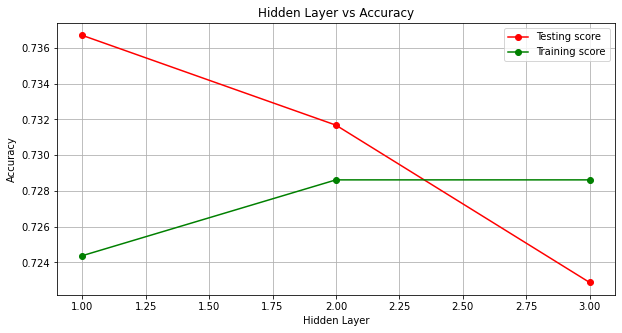

In [49]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Hidden Layer vs Accuracy')
ax.set_xlabel("Hidden Layer")
ax.set_ylabel("Accuracy")
ax.grid()

x = [1,2,3]

ax.plot(x, [Average_accuracy_1,Average_accuracy_2,Average_accuracy_3], 'o-', color="r", label="Testing score")
ax.plot(x, [Average_Unit_1,Average_Unit_2,Average_Unit_3], 'o-', color="g", label="Training score")
ax.legend(loc="best")

plt.show()

### Best Epoch

In [52]:
X_wineRed = np.asarray(X_wineRed)
y_wineRed = np.asarray(y_wineRed)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


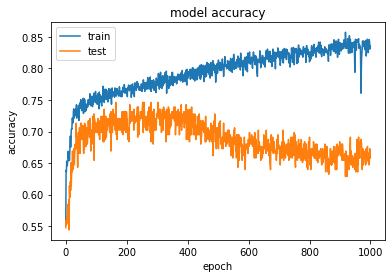

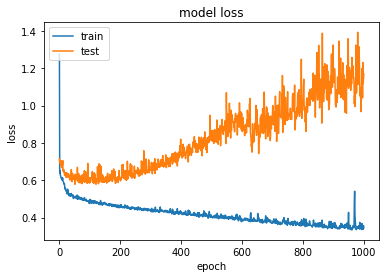

In [55]:
model_3 = keras.models.Sequential([
            keras.layers.Dense(17, activation = 'relu', input_shape=(11,)), 
            keras.layers.Dense(17, activation = 'relu'),
            keras.layers.Dense(17, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')])
# Compile model
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model_3.fit(X_wineRed, y_wineRed, epochs=1000, batch_size=10, verbose=0, validation_split=0.2,) 
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### (b) Analysis of the effects of different activation functions, such as relu, tanh, and logistic functions.

In [60]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras

kf = KFold(n_splits=10, random_state=None, shuffle=True)
i = 1
AverageTraining = []
AverageTesting = []

for train_index, test_index in kf.split(X_trainRed):
    print("CV: {:.1f}".format(i))  
    X_train_cv, X_test_cv = X_trainRed[train_index], X_trainRed[test_index]
    y_train_cv, y_test_cv = y_trainRed[train_index], y_trainRed[test_index]
    
    
    for j in ['relu','tanh','sigmoid']:
        print("Activation Function: ", j)
        model_2 = keras.models.Sequential([
            keras.layers.Dense(18, activation = 'relu', input_shape=(11,)), 
            keras.layers.Dense(18, activation = 'relu'),
            keras.layers.Dense(1, activation = 'sigmoid')])
        
        model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
        fit_score = model_2.fit(X_train_cv, y_train_cv, epochs=400, batch_size=10, verbose=1)
        model_2.evaluate(X_test_cv, y_test_cv,verbose=1)
        AverageTesting.append(model_2.evaluate(X_test_cv, y_test_cv,verbose=1))
        AverageTraining.append(Average(fit_score.history['accuracy']))
        print('\n')
    i = i + 1
print(AverageTraining)
print(AverageTesting)

CV: 1.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6455 - accuracy: 0.6247
Epoch 2/400
978/978 [==============================] - 0s 171us/sample - loss: 0.5696 - accuracy: 0.7065
Epoch 3/400
978/978 [==============================] - 0s 166us/sample - loss: 0.5390 - accuracy: 0.7301
Epoch 4/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5244 - accuracy: 0.7393
Epoch 5/400
978/978 [==============================] - 0s 171us/sample - loss: 0.5173 - accuracy: 0.7403
Epoch 6/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5108 - accuracy: 0.7434
Epoch 7/400
978/978 [==============================] - 0s 177us/sample - loss: 0.5040 - accuracy: 0.7485
Epoch 8/400
978/978 [==============================] - 0s 194us/sample - loss: 0.5013 - accuracy: 0.7454
Epoch 9/400
978/978 [==============================] - 0s 208us/sample - loss: 0.4954 - accuracy: 0.7536
E

978/978 [==============================] - 0s 197us/sample - loss: 0.3775 - accuracy: 0.8364
Epoch 78/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3757 - accuracy: 0.8323
Epoch 79/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3742 - accuracy: 0.8415
Epoch 80/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3730 - accuracy: 0.8313
Epoch 81/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3736 - accuracy: 0.8292
Epoch 82/400
978/978 [==============================] - 0s 194us/sample - loss: 0.3718 - accuracy: 0.8395
Epoch 83/400
978/978 [==============================] - 0s 198us/sample - loss: 0.3682 - accuracy: 0.8395
Epoch 84/400
978/978 [==============================] - 0s 201us/sample - loss: 0.3674 - accuracy: 0.8446
Epoch 85/400
978/978 [==============================] - 0s 224us/sample - loss: 0.3701 - accuracy: 0.8415
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 208us/sample - loss: 0.3153 - accuracy: 0.8773
Epoch 154/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3145 - accuracy: 0.8722
Epoch 155/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3151 - accuracy: 0.8681
Epoch 156/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3142 - accuracy: 0.8712
Epoch 157/400
978/978 [==============================] - 0s 223us/sample - loss: 0.3127 - accuracy: 0.8753
Epoch 158/400
978/978 [==============================] - 0s 227us/sample - loss: 0.3096 - accuracy: 0.8804
Epoch 159/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3106 - accuracy: 0.8763
Epoch 160/400
978/978 [==============================] - 0s 223us/sample - loss: 0.3101 - accuracy: 0.8742
Epoch 161/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3175 - accuracy: 0.8691
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 209us/sample - loss: 0.2744 - accuracy: 0.8896
Epoch 230/400
978/978 [==============================] - 0s 201us/sample - loss: 0.2757 - accuracy: 0.8885
Epoch 231/400
978/978 [==============================] - 0s 210us/sample - loss: 0.2741 - accuracy: 0.8937
Epoch 232/400
978/978 [==============================] - 0s 217us/sample - loss: 0.2741 - accuracy: 0.8906
Epoch 233/400
978/978 [==============================] - 0s 226us/sample - loss: 0.2796 - accuracy: 0.8845
Epoch 234/400
978/978 [==============================] - 0s 218us/sample - loss: 0.2740 - accuracy: 0.8875
Epoch 235/400
978/978 [==============================] - 0s 212us/sample - loss: 0.2762 - accuracy: 0.8906
Epoch 236/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2710 - accuracy: 0.8916
Epoch 237/400
978/978 [==============================] - 0s 216us/sample - loss: 0.2695 - accuracy: 0.8937
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 219us/sample - loss: 0.2405 - accuracy: 0.9131
Epoch 306/400
978/978 [==============================] - 0s 210us/sample - loss: 0.2386 - accuracy: 0.9110
Epoch 307/400
978/978 [==============================] - 0s 210us/sample - loss: 0.2421 - accuracy: 0.9110
Epoch 308/400
978/978 [==============================] - 0s 207us/sample - loss: 0.2351 - accuracy: 0.9192
Epoch 309/400
978/978 [==============================] - 0s 222us/sample - loss: 0.2394 - accuracy: 0.9070
Epoch 310/400
978/978 [==============================] - 0s 208us/sample - loss: 0.2382 - accuracy: 0.9141
Epoch 311/400
978/978 [==============================] - 0s 206us/sample - loss: 0.2392 - accuracy: 0.9070
Epoch 312/400
978/978 [==============================] - 0s 206us/sample - loss: 0.2376 - accuracy: 0.9151
Epoch 313/400
978/978 [==============================] - 0s 205us/sample - loss: 0.2386 - accuracy: 0.9090
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 219us/sample - loss: 0.2063 - accuracy: 0.9192
Epoch 382/400
978/978 [==============================] - 0s 205us/sample - loss: 0.2104 - accuracy: 0.9213
Epoch 383/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2078 - accuracy: 0.9223
Epoch 384/400
978/978 [==============================] - 0s 226us/sample - loss: 0.2101 - accuracy: 0.9172
Epoch 385/400
978/978 [==============================] - 0s 212us/sample - loss: 0.2056 - accuracy: 0.9264
Epoch 386/400
978/978 [==============================] - 0s 213us/sample - loss: 0.2065 - accuracy: 0.9305
Epoch 387/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2047 - accuracy: 0.9243
Epoch 388/400
978/978 [==============================] - 0s 203us/sample - loss: 0.2073 - accuracy: 0.9264
Epoch 389/400
978/978 [==============================] - 0s 199us/sample - loss: 0.2059 - accuracy: 0.9202
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6445 - accuracy: 0.6544
Epoch 2/400
978/978 [==============================] - 0s 195us/sample - loss: 0.5801 - accuracy: 0.7137
Epoch 3/400
978/978 [==============================] - 0s 199us/sample - loss: 0.5490 - accuracy: 0.7219
Epoch 4/400
978/978 [==============================] - 0s 200us/sample - loss: 0.5324 - accuracy: 0.7321
Epoch 5/400
978/978 [==============================] - 0s 194us/sample - loss: 0.5219 - accuracy: 0.7301
Epoch 6/400
978/978 [==============================] - 0s 196us/sample - loss: 0.5133 - accuracy: 0.7382
Epoch 7/400
978/978 [==============================] - 0s 196us/sample - loss: 0.5093 - accuracy: 0.7434
Epoch 8/400
978/978 [==============================] - 0s 192us/sample - loss: 0.5024 - accuracy: 0.7454
Epoch 9/400
978/978 [==============================] - 0s 200us/sample - loss: 0.4992 - accuracy: 0.7485
Epoch 1

Epoch 78/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3724 - accuracy: 0.8231
Epoch 79/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3731 - accuracy: 0.8384
Epoch 80/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3678 - accuracy: 0.8344
Epoch 81/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3702 - accuracy: 0.8313
Epoch 82/400
978/978 [==============================] - 0s 194us/sample - loss: 0.3671 - accuracy: 0.8374
Epoch 83/400
978/978 [==============================] - 0s 193us/sample - loss: 0.3649 - accuracy: 0.8405
Epoch 84/400
978/978 [==============================] - 0s 200us/sample - loss: 0.3662 - accuracy: 0.8292
Epoch 85/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3639 - accuracy: 0.8476
Epoch 86/400
978/978 [==============================] - 0s 191us/sample - loss: 0.3636 - accuracy: 0.8333
Epoch 87/400
978/978 [========================

978/978 [==============================] - 0s 207us/sample - loss: 0.3109 - accuracy: 0.8742
Epoch 155/400
978/978 [==============================] - 0s 211us/sample - loss: 0.3120 - accuracy: 0.8630
Epoch 156/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3114 - accuracy: 0.8701
Epoch 157/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3094 - accuracy: 0.8650
Epoch 158/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3066 - accuracy: 0.8630
Epoch 159/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3100 - accuracy: 0.8609
Epoch 160/400
978/978 [==============================] - 0s 216us/sample - loss: 0.3095 - accuracy: 0.8650
Epoch 161/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3088 - accuracy: 0.8783
Epoch 162/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3082 - accuracy: 0.8671
Epoch 163/400
978/978 [============================

978/978 [==============================] - 0s 236us/sample - loss: 0.2734 - accuracy: 0.8865
Epoch 231/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2724 - accuracy: 0.8845
Epoch 232/400
978/978 [==============================] - 0s 229us/sample - loss: 0.2682 - accuracy: 0.8865
Epoch 233/400
978/978 [==============================] - 0s 227us/sample - loss: 0.2723 - accuracy: 0.8896
Epoch 234/400
978/978 [==============================] - 0s 229us/sample - loss: 0.2738 - accuracy: 0.8875
Epoch 235/400
978/978 [==============================] - 0s 235us/sample - loss: 0.2696 - accuracy: 0.8906
Epoch 236/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2706 - accuracy: 0.8906
Epoch 237/400
978/978 [==============================] - 0s 228us/sample - loss: 0.2726 - accuracy: 0.8926
Epoch 238/400
978/978 [==============================] - 0s 256us/sample - loss: 0.2734 - accuracy: 0.8947
Epoch 239/400
978/978 [============================

978/978 [==============================] - 0s 211us/sample - loss: 0.2416 - accuracy: 0.9141
Epoch 307/400
978/978 [==============================] - 0s 214us/sample - loss: 0.2434 - accuracy: 0.9100
Epoch 308/400
978/978 [==============================] - 0s 208us/sample - loss: 0.2349 - accuracy: 0.9172
Epoch 309/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2415 - accuracy: 0.9121
Epoch 310/400
978/978 [==============================] - 0s 211us/sample - loss: 0.2384 - accuracy: 0.9131
Epoch 311/400
978/978 [==============================] - 0s 210us/sample - loss: 0.2345 - accuracy: 0.9182
Epoch 312/400
978/978 [==============================] - 0s 201us/sample - loss: 0.2363 - accuracy: 0.9192
Epoch 313/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2360 - accuracy: 0.9141
Epoch 314/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2327 - accuracy: 0.9223
Epoch 315/400
978/978 [============================

978/978 [==============================] - 0s 222us/sample - loss: 0.2077 - accuracy: 0.9264
Epoch 383/400
978/978 [==============================] - 0s 224us/sample - loss: 0.2054 - accuracy: 0.9202
Epoch 384/400
978/978 [==============================] - 0s 219us/sample - loss: 0.2070 - accuracy: 0.9305
Epoch 385/400
978/978 [==============================] - 0s 218us/sample - loss: 0.2068 - accuracy: 0.9213
Epoch 386/400
978/978 [==============================] - 0s 224us/sample - loss: 0.2072 - accuracy: 0.9243
Epoch 387/400
978/978 [==============================] - 0s 215us/sample - loss: 0.2083 - accuracy: 0.9264
Epoch 388/400
978/978 [==============================] - 0s 222us/sample - loss: 0.2047 - accuracy: 0.9356
Epoch 389/400
978/978 [==============================] - 0s 221us/sample - loss: 0.2036 - accuracy: 0.9243
Epoch 390/400
978/978 [==============================] - 0s 223us/sample - loss: 0.2064 - accuracy: 0.9233
Epoch 391/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6524 - accuracy: 0.6125
Epoch 2/400
978/978 [==============================] - 0s 223us/sample - loss: 0.5690 - accuracy: 0.7096
Epoch 3/400
978/978 [==============================] - 0s 222us/sample - loss: 0.5386 - accuracy: 0.7321
Epoch 4/400
978/978 [==============================] - 0s 229us/sample - loss: 0.5244 - accuracy: 0.7311
Epoch 5/400
978/978 [==============================] - 0s 230us/sample - loss: 0.5173 - accuracy: 0.7311
Epoch 6/400
978/978 [==============================] - 0s 220us/sample - loss: 0.5101 - accuracy: 0.7352
Epoch 7/400
978/978 [==============================] - 0s 233us/sample - loss: 0.5086 - accuracy: 0.7434
Epoch 8/400
978/978 [==============================] - 0s 222us/sample - loss: 0.5027 - accuracy: 0.7423
Epoch 9/400
978/978 [==============================] - 0s 221us/sample - loss: 0.4998 - accuracy: 0.7444
Epoc

978/978 [==============================] - 0s 213us/sample - loss: 0.3757 - accuracy: 0.8333
Epoch 78/400
978/978 [==============================] - 0s 216us/sample - loss: 0.3763 - accuracy: 0.8303
Epoch 79/400
978/978 [==============================] - 0s 216us/sample - loss: 0.3739 - accuracy: 0.8303
Epoch 80/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3725 - accuracy: 0.8292
Epoch 81/400
978/978 [==============================] - 0s 264us/sample - loss: 0.3751 - accuracy: 0.8415
Epoch 82/400
978/978 [==============================] - 0s 209us/sample - loss: 0.3726 - accuracy: 0.8303
Epoch 83/400
978/978 [==============================] - 0s 202us/sample - loss: 0.3719 - accuracy: 0.8364
Epoch 84/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3691 - accuracy: 0.8333
Epoch 85/400
978/978 [==============================] - 0s 220us/sample - loss: 0.3683 - accuracy: 0.8384
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 245us/sample - loss: 0.3085 - accuracy: 0.8599
Epoch 154/400
978/978 [==============================] - 0s 249us/sample - loss: 0.3080 - accuracy: 0.8599
Epoch 155/400
978/978 [==============================] - 0s 240us/sample - loss: 0.3067 - accuracy: 0.8640
Epoch 156/400
978/978 [==============================] - 0s 239us/sample - loss: 0.3055 - accuracy: 0.8650
Epoch 157/400
978/978 [==============================] - 0s 235us/sample - loss: 0.3036 - accuracy: 0.8599
Epoch 158/400
978/978 [==============================] - 0s 217us/sample - loss: 0.3045 - accuracy: 0.8701
Epoch 159/400
978/978 [==============================] - 0s 212us/sample - loss: 0.3031 - accuracy: 0.8753
Epoch 160/400
978/978 [==============================] - 0s 213us/sample - loss: 0.3026 - accuracy: 0.8732
Epoch 161/400
978/978 [==============================] - 0s 213us/sample - loss: 0.3026 - accuracy: 0.8671
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 233us/sample - loss: 0.2511 - accuracy: 0.9018
Epoch 230/400
978/978 [==============================] - 0s 221us/sample - loss: 0.2508 - accuracy: 0.9018
Epoch 231/400
978/978 [==============================] - 0s 235us/sample - loss: 0.2488 - accuracy: 0.9029
Epoch 232/400
978/978 [==============================] - 0s 213us/sample - loss: 0.2499 - accuracy: 0.8998
Epoch 233/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2522 - accuracy: 0.8988
Epoch 234/400
978/978 [==============================] - 0s 213us/sample - loss: 0.2503 - accuracy: 0.8988
Epoch 235/400
978/978 [==============================] - 0s 234us/sample - loss: 0.2468 - accuracy: 0.9090
Epoch 236/400
978/978 [==============================] - 0s 228us/sample - loss: 0.2453 - accuracy: 0.9080
Epoch 237/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2469 - accuracy: 0.9008
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 187us/sample - loss: 0.1989 - accuracy: 0.9264
Epoch 306/400
978/978 [==============================] - 0s 201us/sample - loss: 0.1973 - accuracy: 0.9284
Epoch 307/400
978/978 [==============================] - 0s 197us/sample - loss: 0.1966 - accuracy: 0.9223
Epoch 308/400
978/978 [==============================] - 0s 207us/sample - loss: 0.1971 - accuracy: 0.9243
Epoch 309/400
978/978 [==============================] - 0s 232us/sample - loss: 0.1950 - accuracy: 0.9315
Epoch 310/400
978/978 [==============================] - 0s 190us/sample - loss: 0.1980 - accuracy: 0.9254
Epoch 311/400
978/978 [==============================] - 0s 227us/sample - loss: 0.1951 - accuracy: 0.9254
Epoch 312/400
978/978 [==============================] - 0s 210us/sample - loss: 0.1949 - accuracy: 0.9325
Epoch 313/400
978/978 [==============================] - 0s 210us/sample - loss: 0.1927 - accuracy: 0.9243
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 190us/sample - loss: 0.1674 - accuracy: 0.9376
Epoch 382/400
978/978 [==============================] - 0s 201us/sample - loss: 0.1578 - accuracy: 0.9468
Epoch 383/400
978/978 [==============================] - 0s 200us/sample - loss: 0.1598 - accuracy: 0.9438
Epoch 384/400
978/978 [==============================] - 0s 187us/sample - loss: 0.1537 - accuracy: 0.9489
Epoch 385/400
978/978 [==============================] - 0s 195us/sample - loss: 0.1536 - accuracy: 0.9519
Epoch 386/400
978/978 [==============================] - 0s 203us/sample - loss: 0.1537 - accuracy: 0.9550
Epoch 387/400
978/978 [==============================] - 0s 191us/sample - loss: 0.1511 - accuracy: 0.9458
Epoch 388/400
978/978 [==============================] - 0s 195us/sample - loss: 0.1526 - accuracy: 0.9489
Epoch 389/400
978/978 [==============================] - 0s 186us/sample - loss: 0.1500 - accuracy: 0.9550
Epoch 390/400
978/978 [============================



CV: 2.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6133 - accuracy: 0.6840
Epoch 2/400
978/978 [==============================] - 0s 198us/sample - loss: 0.5740 - accuracy: 0.7147
Epoch 3/400
978/978 [==============================] - 0s 201us/sample - loss: 0.5579 - accuracy: 0.7168
Epoch 4/400
978/978 [==============================] - 0s 192us/sample - loss: 0.5475 - accuracy: 0.7362
Epoch 5/400
978/978 [==============================] - 0s 202us/sample - loss: 0.5383 - accuracy: 0.7393
Epoch 6/400
978/978 [==============================] - 0s 188us/sample - loss: 0.5305 - accuracy: 0.7434
Epoch 7/400
978/978 [==============================] - 0s 193us/sample - loss: 0.5247 - accuracy: 0.7444
Epoch 8/400
978/978 [==============================] - 0s 199us/sample - loss: 0.5186 - accuracy: 0.7515
Epoch 9/400
978/978 [==============================] - 0s 187us/sample - loss: 0.5122 - accuracy: 0.7566

978/978 [==============================] - 0s 220us/sample - loss: 0.3812 - accuracy: 0.8323
Epoch 78/400
978/978 [==============================] - 0s 221us/sample - loss: 0.3794 - accuracy: 0.8323
Epoch 79/400
978/978 [==============================] - 0s 231us/sample - loss: 0.3792 - accuracy: 0.8344
Epoch 80/400
978/978 [==============================] - 0s 219us/sample - loss: 0.3789 - accuracy: 0.8395
Epoch 81/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3758 - accuracy: 0.8354
Epoch 82/400
978/978 [==============================] - 0s 208us/sample - loss: 0.3749 - accuracy: 0.8344
Epoch 83/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3732 - accuracy: 0.8405
Epoch 84/400
978/978 [==============================] - 0s 218us/sample - loss: 0.3751 - accuracy: 0.8384
Epoch 85/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3705 - accuracy: 0.8364
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 197us/sample - loss: 0.3145 - accuracy: 0.8691
Epoch 154/400
978/978 [==============================] - 0s 192us/sample - loss: 0.3145 - accuracy: 0.8691
Epoch 155/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3141 - accuracy: 0.8701
Epoch 156/400
978/978 [==============================] - 0s 191us/sample - loss: 0.3126 - accuracy: 0.8732
Epoch 157/400
978/978 [==============================] - 0s 188us/sample - loss: 0.3143 - accuracy: 0.8722
Epoch 158/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3118 - accuracy: 0.8722
Epoch 159/400
978/978 [==============================] - 0s 191us/sample - loss: 0.3121 - accuracy: 0.8753
Epoch 160/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3106 - accuracy: 0.8763
Epoch 161/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3090 - accuracy: 0.8763
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 207us/sample - loss: 0.2680 - accuracy: 0.8957
Epoch 230/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2659 - accuracy: 0.8906
Epoch 231/400
978/978 [==============================] - 0s 192us/sample - loss: 0.2653 - accuracy: 0.8947
Epoch 232/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2647 - accuracy: 0.8906
Epoch 233/400
978/978 [==============================] - 0s 197us/sample - loss: 0.2647 - accuracy: 0.8896
Epoch 234/400
978/978 [==============================] - 0s 197us/sample - loss: 0.2631 - accuracy: 0.8937
Epoch 235/400
978/978 [==============================] - 0s 198us/sample - loss: 0.2632 - accuracy: 0.8916
Epoch 236/400
978/978 [==============================] - 0s 190us/sample - loss: 0.2618 - accuracy: 0.8865
Epoch 237/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2628 - accuracy: 0.8916
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 194us/sample - loss: 0.2242 - accuracy: 0.9110
Epoch 306/400
978/978 [==============================] - 0s 196us/sample - loss: 0.2267 - accuracy: 0.9100
Epoch 307/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2252 - accuracy: 0.9070
Epoch 308/400
978/978 [==============================] - 0s 198us/sample - loss: 0.2257 - accuracy: 0.9039
Epoch 309/400
978/978 [==============================] - 0s 195us/sample - loss: 0.2230 - accuracy: 0.9090
Epoch 310/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2269 - accuracy: 0.9090
Epoch 311/400
978/978 [==============================] - 0s 191us/sample - loss: 0.2243 - accuracy: 0.9080
Epoch 312/400
978/978 [==============================] - 0s 185us/sample - loss: 0.2224 - accuracy: 0.9100
Epoch 313/400
978/978 [==============================] - 0s 190us/sample - loss: 0.2236 - accuracy: 0.9121
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 189us/sample - loss: 0.1937 - accuracy: 0.9233
Epoch 382/400
978/978 [==============================] - 0s 186us/sample - loss: 0.1934 - accuracy: 0.9243
Epoch 383/400
978/978 [==============================] - 0s 191us/sample - loss: 0.1893 - accuracy: 0.9243
Epoch 384/400
978/978 [==============================] - 0s 189us/sample - loss: 0.1917 - accuracy: 0.9254
Epoch 385/400
978/978 [==============================] - 0s 188us/sample - loss: 0.1926 - accuracy: 0.9202
Epoch 386/400
978/978 [==============================] - 0s 191us/sample - loss: 0.1896 - accuracy: 0.9264
Epoch 387/400
978/978 [==============================] - 0s 187us/sample - loss: 0.1911 - accuracy: 0.9202
Epoch 388/400
978/978 [==============================] - 0s 189us/sample - loss: 0.1937 - accuracy: 0.9192
Epoch 389/400
978/978 [==============================] - 0s 186us/sample - loss: 0.1911 - accuracy: 0.9233
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.7127 - accuracy: 0.5429
Epoch 2/400
978/978 [==============================] - 0s 185us/sample - loss: 0.6189 - accuracy: 0.6748
Epoch 3/400
978/978 [==============================] - 0s 183us/sample - loss: 0.5649 - accuracy: 0.7280
Epoch 4/400
978/978 [==============================] - 0s 181us/sample - loss: 0.5349 - accuracy: 0.7362
Epoch 5/400
978/978 [==============================] - 0s 188us/sample - loss: 0.5179 - accuracy: 0.7444
Epoch 6/400
978/978 [==============================] - 0s 185us/sample - loss: 0.5080 - accuracy: 0.7526
Epoch 7/400
978/978 [==============================] - 0s 183us/sample - loss: 0.5006 - accuracy: 0.7618
Epoch 8/400
978/978 [==============================] - 0s 186us/sample - loss: 0.4943 - accuracy: 0.7607
Epoch 9/400
978/978 [==============================] - 0s 181us/sample - loss: 0.4896 - accuracy: 0.7658
Epoch 1

Epoch 78/400
978/978 [==============================] - 0s 194us/sample - loss: 0.3806 - accuracy: 0.8282
Epoch 79/400
978/978 [==============================] - 0s 198us/sample - loss: 0.3813 - accuracy: 0.8272
Epoch 80/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3779 - accuracy: 0.8262
Epoch 81/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3796 - accuracy: 0.8200
Epoch 82/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3766 - accuracy: 0.8313
Epoch 83/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3770 - accuracy: 0.8272
Epoch 84/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3768 - accuracy: 0.8292
Epoch 85/400
978/978 [==============================] - 0s 217us/sample - loss: 0.3734 - accuracy: 0.8292
Epoch 86/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3722 - accuracy: 0.8323
Epoch 87/400
978/978 [========================

978/978 [==============================] - 0s 180us/sample - loss: 0.3174 - accuracy: 0.8722
Epoch 155/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3151 - accuracy: 0.8681
Epoch 156/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3146 - accuracy: 0.8691
Epoch 157/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3131 - accuracy: 0.8712
Epoch 158/400
978/978 [==============================] - 0s 186us/sample - loss: 0.3141 - accuracy: 0.8701
Epoch 159/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3092 - accuracy: 0.8722
Epoch 160/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3111 - accuracy: 0.8701
Epoch 161/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3128 - accuracy: 0.8661
Epoch 162/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3083 - accuracy: 0.8773
Epoch 163/400
978/978 [============================

978/978 [==============================] - 0s 184us/sample - loss: 0.2639 - accuracy: 0.8988
Epoch 231/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2635 - accuracy: 0.8926
Epoch 232/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2625 - accuracy: 0.8896
Epoch 233/400
978/978 [==============================] - 0s 177us/sample - loss: 0.2638 - accuracy: 0.8916
Epoch 234/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2610 - accuracy: 0.8906
Epoch 235/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2580 - accuracy: 0.8916
Epoch 236/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2622 - accuracy: 0.8875
Epoch 237/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2580 - accuracy: 0.8967
Epoch 238/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2659 - accuracy: 0.8855
Epoch 239/400
978/978 [============================

978/978 [==============================] - 0s 171us/sample - loss: 0.2235 - accuracy: 0.9059
Epoch 307/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2210 - accuracy: 0.9141
Epoch 308/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2228 - accuracy: 0.9131
Epoch 309/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2237 - accuracy: 0.9090
Epoch 310/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2225 - accuracy: 0.9100
Epoch 311/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2216 - accuracy: 0.9059
Epoch 312/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2207 - accuracy: 0.9100
Epoch 313/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2207 - accuracy: 0.9141
Epoch 314/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2207 - accuracy: 0.9100
Epoch 315/400
978/978 [============================

978/978 [==============================] - 0s 174us/sample - loss: 0.2029 - accuracy: 0.9223
Epoch 383/400
978/978 [==============================] - 0s 173us/sample - loss: 0.1969 - accuracy: 0.9233
Epoch 384/400
978/978 [==============================] - 0s 172us/sample - loss: 0.1953 - accuracy: 0.9223
Epoch 385/400
978/978 [==============================] - 0s 170us/sample - loss: 0.1964 - accuracy: 0.9192
Epoch 386/400
978/978 [==============================] - 0s 174us/sample - loss: 0.1949 - accuracy: 0.9213
Epoch 387/400
978/978 [==============================] - 0s 172us/sample - loss: 0.1953 - accuracy: 0.9223
Epoch 388/400
978/978 [==============================] - 0s 172us/sample - loss: 0.1931 - accuracy: 0.9172
Epoch 389/400
978/978 [==============================] - 0s 174us/sample - loss: 0.1988 - accuracy: 0.9202
Epoch 390/400
978/978 [==============================] - 0s 169us/sample - loss: 0.1942 - accuracy: 0.9202
Epoch 391/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6469 - accuracy: 0.6524
Epoch 2/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5974 - accuracy: 0.6933
Epoch 3/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5696 - accuracy: 0.7168
Epoch 4/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5517 - accuracy: 0.7321
Epoch 5/400
978/978 [==============================] - 0s 177us/sample - loss: 0.5394 - accuracy: 0.7280
Epoch 6/400
978/978 [==============================] - 0s 181us/sample - loss: 0.5301 - accuracy: 0.7352
Epoch 7/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5226 - accuracy: 0.7393
Epoch 8/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5176 - accuracy: 0.7434
Epoch 9/400
978/978 [==============================] - 0s 181us/sample - loss: 0.5115 - accuracy: 0.7444
Epoc

978/978 [==============================] - 0s 181us/sample - loss: 0.3862 - accuracy: 0.8333
Epoch 78/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3869 - accuracy: 0.8374
Epoch 79/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3863 - accuracy: 0.8374
Epoch 80/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3855 - accuracy: 0.8313
Epoch 81/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3828 - accuracy: 0.8374
Epoch 82/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3810 - accuracy: 0.8323
Epoch 83/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3813 - accuracy: 0.8405
Epoch 84/400
978/978 [==============================] - 0s 185us/sample - loss: 0.3798 - accuracy: 0.8374
Epoch 85/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3767 - accuracy: 0.8415
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 180us/sample - loss: 0.3197 - accuracy: 0.8630
Epoch 154/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3161 - accuracy: 0.8691
Epoch 155/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3178 - accuracy: 0.8722
Epoch 156/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3161 - accuracy: 0.8701
Epoch 157/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3157 - accuracy: 0.8712
Epoch 158/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3170 - accuracy: 0.8742
Epoch 159/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3155 - accuracy: 0.8773
Epoch 160/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3174 - accuracy: 0.8701
Epoch 161/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3158 - accuracy: 0.8691
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 180us/sample - loss: 0.2753 - accuracy: 0.8916
Epoch 230/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2774 - accuracy: 0.8896
Epoch 231/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2724 - accuracy: 0.8978
Epoch 232/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2714 - accuracy: 0.8885
Epoch 233/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2729 - accuracy: 0.8998
Epoch 234/400
978/978 [==============================] - 0s 185us/sample - loss: 0.2714 - accuracy: 0.8855
Epoch 235/400
978/978 [==============================] - 0s 184us/sample - loss: 0.2708 - accuracy: 0.8947
Epoch 236/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2706 - accuracy: 0.8906
Epoch 237/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2693 - accuracy: 0.8978
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 175us/sample - loss: 0.2332 - accuracy: 0.9110
Epoch 306/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2326 - accuracy: 0.9151
Epoch 307/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2336 - accuracy: 0.9151
Epoch 308/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2324 - accuracy: 0.9110
Epoch 309/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2326 - accuracy: 0.9131
Epoch 310/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2298 - accuracy: 0.9080
Epoch 311/400
978/978 [==============================] - 0s 174us/sample - loss: 0.2323 - accuracy: 0.9100
Epoch 312/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2311 - accuracy: 0.9131
Epoch 313/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2308 - accuracy: 0.9121
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 172us/sample - loss: 0.1991 - accuracy: 0.9325
Epoch 382/400
978/978 [==============================] - 0s 173us/sample - loss: 0.1981 - accuracy: 0.9325
Epoch 383/400
978/978 [==============================] - 0s 174us/sample - loss: 0.1991 - accuracy: 0.9274
Epoch 384/400
978/978 [==============================] - 0s 175us/sample - loss: 0.1976 - accuracy: 0.9325
Epoch 385/400
978/978 [==============================] - 0s 172us/sample - loss: 0.1991 - accuracy: 0.9243
Epoch 386/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2009 - accuracy: 0.9274
Epoch 387/400
978/978 [==============================] - 0s 176us/sample - loss: 0.1954 - accuracy: 0.9356
Epoch 388/400
978/978 [==============================] - 0s 179us/sample - loss: 0.1968 - accuracy: 0.9274
Epoch 389/400
978/978 [==============================] - 0s 173us/sample - loss: 0.1993 - accuracy: 0.9243
Epoch 390/400
978/978 [============================



CV: 3.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.7041 - accuracy: 0.5378
Epoch 2/400
978/978 [==============================] - 0s 168us/sample - loss: 0.5948 - accuracy: 0.7076
Epoch 3/400
978/978 [==============================] - 0s 170us/sample - loss: 0.5421 - accuracy: 0.7260
Epoch 4/400
978/978 [==============================] - 0s 165us/sample - loss: 0.5216 - accuracy: 0.7454
Epoch 5/400
978/978 [==============================] - 0s 168us/sample - loss: 0.5104 - accuracy: 0.7444
Epoch 6/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5040 - accuracy: 0.7464
Epoch 7/400
978/978 [==============================] - 0s 168us/sample - loss: 0.4980 - accuracy: 0.7485
Epoch 8/400
978/978 [==============================] - 0s 167us/sample - loss: 0.4935 - accuracy: 0.7515
Epoch 9/400
978/978 [==============================] - 0s 169us/sample - loss: 0.4894 - accuracy: 0.7566

978/978 [==============================] - 0s 178us/sample - loss: 0.3814 - accuracy: 0.8292
Epoch 78/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3815 - accuracy: 0.8282
Epoch 79/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3843 - accuracy: 0.8241
Epoch 80/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3811 - accuracy: 0.8333
Epoch 81/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3789 - accuracy: 0.8282
Epoch 82/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3772 - accuracy: 0.8333
Epoch 83/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3758 - accuracy: 0.8292
Epoch 84/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3747 - accuracy: 0.8344
Epoch 85/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3754 - accuracy: 0.8333
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 190us/sample - loss: 0.3233 - accuracy: 0.8650
Epoch 154/400
978/978 [==============================] - 0s 195us/sample - loss: 0.3228 - accuracy: 0.8661
Epoch 155/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3242 - accuracy: 0.8620
Epoch 156/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3192 - accuracy: 0.8650
Epoch 157/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3194 - accuracy: 0.8609
Epoch 158/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3196 - accuracy: 0.8620
Epoch 159/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3190 - accuracy: 0.8650
Epoch 160/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3182 - accuracy: 0.8569
Epoch 161/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3187 - accuracy: 0.8681
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 189us/sample - loss: 0.2816 - accuracy: 0.8885
Epoch 230/400
978/978 [==============================] - 0s 184us/sample - loss: 0.2860 - accuracy: 0.8845
Epoch 231/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2852 - accuracy: 0.8896
Epoch 232/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2822 - accuracy: 0.8885
Epoch 233/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2859 - accuracy: 0.8804
Epoch 234/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2800 - accuracy: 0.8906
Epoch 235/400
978/978 [==============================] - 0s 191us/sample - loss: 0.2814 - accuracy: 0.8916
Epoch 236/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2776 - accuracy: 0.8926
Epoch 237/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2791 - accuracy: 0.8885
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 186us/sample - loss: 0.2525 - accuracy: 0.8967
Epoch 306/400
978/978 [==============================] - 0s 186us/sample - loss: 0.2508 - accuracy: 0.8957
Epoch 307/400
978/978 [==============================] - 0s 198us/sample - loss: 0.2492 - accuracy: 0.8957
Epoch 308/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2535 - accuracy: 0.8947
Epoch 309/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2481 - accuracy: 0.8988
Epoch 310/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2512 - accuracy: 0.9018
Epoch 311/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2488 - accuracy: 0.8998
Epoch 312/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2506 - accuracy: 0.9029
Epoch 313/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2476 - accuracy: 0.9029
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 181us/sample - loss: 0.2210 - accuracy: 0.9192
Epoch 382/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2235 - accuracy: 0.9131
Epoch 383/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2228 - accuracy: 0.9151
Epoch 384/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2236 - accuracy: 0.9172
Epoch 385/400
978/978 [==============================] - 0s 184us/sample - loss: 0.2223 - accuracy: 0.9182
Epoch 386/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2209 - accuracy: 0.9162
Epoch 387/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2217 - accuracy: 0.9100
Epoch 388/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2182 - accuracy: 0.9151
Epoch 389/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2174 - accuracy: 0.9151
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 988us/sample - loss: 0.6557 - accuracy: 0.6401
Epoch 2/400
978/978 [==============================] - 0s 169us/sample - loss: 0.5832 - accuracy: 0.7055
Epoch 3/400
978/978 [==============================] - 0s 169us/sample - loss: 0.5432 - accuracy: 0.7229
Epoch 4/400
978/978 [==============================] - 0s 167us/sample - loss: 0.5272 - accuracy: 0.7301
Epoch 5/400
978/978 [==============================] - 0s 168us/sample - loss: 0.5185 - accuracy: 0.7454
Epoch 6/400
978/978 [==============================] - 0s 170us/sample - loss: 0.5124 - accuracy: 0.7393
Epoch 7/400
978/978 [==============================] - 0s 165us/sample - loss: 0.5066 - accuracy: 0.7413
Epoch 8/400
978/978 [==============================] - 0s 167us/sample - loss: 0.5021 - accuracy: 0.7526
Epoch 9/400
978/978 [==============================] - 0s 167us/sample - loss: 0.4982 - accuracy: 0.7515
Epoch

978/978 [==============================] - 0s 174us/sample - loss: 0.3665 - accuracy: 0.8292
Epoch 78/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3657 - accuracy: 0.8292
Epoch 79/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3652 - accuracy: 0.8364
Epoch 80/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3637 - accuracy: 0.8323
Epoch 81/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3619 - accuracy: 0.8364
Epoch 82/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3653 - accuracy: 0.8374
Epoch 83/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3620 - accuracy: 0.8333
Epoch 84/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3585 - accuracy: 0.8344
Epoch 85/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3599 - accuracy: 0.8313
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 174us/sample - loss: 0.3091 - accuracy: 0.8661
Epoch 154/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3103 - accuracy: 0.8640
Epoch 155/400
978/978 [==============================] - 0s 169us/sample - loss: 0.3101 - accuracy: 0.8650
Epoch 156/400
978/978 [==============================] - 0s 168us/sample - loss: 0.3108 - accuracy: 0.8681
Epoch 157/400
978/978 [==============================] - 0s 169us/sample - loss: 0.3084 - accuracy: 0.8681
Epoch 158/400
978/978 [==============================] - 0s 170us/sample - loss: 0.3084 - accuracy: 0.8640
Epoch 159/400
978/978 [==============================] - 0s 165us/sample - loss: 0.3073 - accuracy: 0.8650
Epoch 160/400
978/978 [==============================] - 0s 163us/sample - loss: 0.3094 - accuracy: 0.8620
Epoch 161/400
978/978 [==============================] - 0s 163us/sample - loss: 0.3082 - accuracy: 0.8620
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 153us/sample - loss: 0.2757 - accuracy: 0.8845
Epoch 230/400
978/978 [==============================] - 0s 153us/sample - loss: 0.2710 - accuracy: 0.8793
Epoch 231/400
978/978 [==============================] - 0s 153us/sample - loss: 0.2727 - accuracy: 0.8834
Epoch 232/400
978/978 [==============================] - 0s 154us/sample - loss: 0.2717 - accuracy: 0.8875
Epoch 233/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2722 - accuracy: 0.8885
Epoch 234/400
978/978 [==============================] - 0s 152us/sample - loss: 0.2714 - accuracy: 0.8865
Epoch 235/400
978/978 [==============================] - 0s 155us/sample - loss: 0.2758 - accuracy: 0.8804
Epoch 236/400
978/978 [==============================] - 0s 157us/sample - loss: 0.2711 - accuracy: 0.8845
Epoch 237/400
978/978 [==============================] - 0s 156us/sample - loss: 0.2710 - accuracy: 0.8885
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 165us/sample - loss: 0.2386 - accuracy: 0.8906
Epoch 306/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2395 - accuracy: 0.8947
Epoch 307/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2379 - accuracy: 0.9090
Epoch 308/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2372 - accuracy: 0.9008
Epoch 309/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2381 - accuracy: 0.9018
Epoch 310/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2370 - accuracy: 0.9049
Epoch 311/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2391 - accuracy: 0.8926
Epoch 312/400
978/978 [==============================] - 0s 164us/sample - loss: 0.2389 - accuracy: 0.8937
Epoch 313/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2367 - accuracy: 0.8947
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 172us/sample - loss: 0.2025 - accuracy: 0.9172
Epoch 382/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2005 - accuracy: 0.9233
Epoch 383/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2058 - accuracy: 0.9151
Epoch 384/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2033 - accuracy: 0.9141
Epoch 385/400
978/978 [==============================] - 0s 169us/sample - loss: 0.2050 - accuracy: 0.9172
Epoch 386/400
978/978 [==============================] - 0s 170us/sample - loss: 0.1982 - accuracy: 0.9162
Epoch 387/400
978/978 [==============================] - 0s 169us/sample - loss: 0.1988 - accuracy: 0.9182
Epoch 388/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2012 - accuracy: 0.9223
Epoch 389/400
978/978 [==============================] - 0s 166us/sample - loss: 0.1998 - accuracy: 0.9162
Epoch 390/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 906us/sample - loss: 0.6999 - accuracy: 0.5573
Epoch 2/400
978/978 [==============================] - 0s 175us/sample - loss: 0.6022 - accuracy: 0.6963
Epoch 3/400
978/978 [==============================] - 0s 148us/sample - loss: 0.5516 - accuracy: 0.7321
Epoch 4/400
978/978 [==============================] - 0s 163us/sample - loss: 0.5286 - accuracy: 0.7423
Epoch 5/400
978/978 [==============================] - 0s 169us/sample - loss: 0.5170 - accuracy: 0.7434
Epoch 6/400
978/978 [==============================] - 0s 165us/sample - loss: 0.5110 - accuracy: 0.7546
Epoch 7/400
978/978 [==============================] - 0s 147us/sample - loss: 0.5048 - accuracy: 0.7556
Epoch 8/400
978/978 [==============================] - 0s 146us/sample - loss: 0.4995 - accuracy: 0.7577
Epoch 9/400
978/978 [==============================] - 0s 162us/sample - loss: 0.4956 - accuracy: 0.7607
Ep

978/978 [==============================] - 0s 159us/sample - loss: 0.3695 - accuracy: 0.8374
Epoch 78/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3689 - accuracy: 0.8323
Epoch 79/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3701 - accuracy: 0.8282
Epoch 80/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3687 - accuracy: 0.8333
Epoch 81/400
978/978 [==============================] - 0s 159us/sample - loss: 0.3643 - accuracy: 0.8313
Epoch 82/400
978/978 [==============================] - 0s 161us/sample - loss: 0.3669 - accuracy: 0.8344
Epoch 83/400
978/978 [==============================] - 0s 159us/sample - loss: 0.3648 - accuracy: 0.8374
Epoch 84/400
978/978 [==============================] - 0s 157us/sample - loss: 0.3644 - accuracy: 0.8374
Epoch 85/400
978/978 [==============================] - 0s 159us/sample - loss: 0.3603 - accuracy: 0.8354
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 160us/sample - loss: 0.3010 - accuracy: 0.8701
Epoch 154/400
978/978 [==============================] - 0s 158us/sample - loss: 0.3021 - accuracy: 0.8640
Epoch 155/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3023 - accuracy: 0.8701
Epoch 156/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3004 - accuracy: 0.8681
Epoch 157/400
978/978 [==============================] - 0s 158us/sample - loss: 0.3011 - accuracy: 0.8681
Epoch 158/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2995 - accuracy: 0.8681
Epoch 159/400
978/978 [==============================] - 0s 157us/sample - loss: 0.2976 - accuracy: 0.8681
Epoch 160/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2967 - accuracy: 0.8742
Epoch 161/400
978/978 [==============================] - 0s 159us/sample - loss: 0.2968 - accuracy: 0.8722
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 181us/sample - loss: 0.2479 - accuracy: 0.9008
Epoch 230/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2491 - accuracy: 0.9008
Epoch 231/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2464 - accuracy: 0.9039
Epoch 232/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2469 - accuracy: 0.9039
Epoch 233/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2451 - accuracy: 0.9059
Epoch 234/400
978/978 [==============================] - 0s 174us/sample - loss: 0.2444 - accuracy: 0.9080
Epoch 235/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2419 - accuracy: 0.9141
Epoch 236/400
978/978 [==============================] - 0s 175us/sample - loss: 0.2427 - accuracy: 0.9018
Epoch 237/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2435 - accuracy: 0.9141
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 156us/sample - loss: 0.2021 - accuracy: 0.9243
Epoch 306/400
978/978 [==============================] - 0s 161us/sample - loss: 0.2030 - accuracy: 0.9366
Epoch 307/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2014 - accuracy: 0.9325
Epoch 308/400
978/978 [==============================] - 0s 159us/sample - loss: 0.2022 - accuracy: 0.9284
Epoch 309/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2010 - accuracy: 0.9335
Epoch 310/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2019 - accuracy: 0.9335
Epoch 311/400
978/978 [==============================] - 0s 159us/sample - loss: 0.2001 - accuracy: 0.9335
Epoch 312/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2004 - accuracy: 0.9284
Epoch 313/400
978/978 [==============================] - 0s 158us/sample - loss: 0.1987 - accuracy: 0.9325
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 169us/sample - loss: 0.1680 - accuracy: 0.9468
Epoch 382/400
978/978 [==============================] - 0s 169us/sample - loss: 0.1659 - accuracy: 0.9468
Epoch 383/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1677 - accuracy: 0.9468
Epoch 384/400
978/978 [==============================] - 0s 167us/sample - loss: 0.1672 - accuracy: 0.9458
Epoch 385/400
978/978 [==============================] - 0s 167us/sample - loss: 0.1646 - accuracy: 0.9499
Epoch 386/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1673 - accuracy: 0.9427
Epoch 387/400
978/978 [==============================] - 0s 167us/sample - loss: 0.1619 - accuracy: 0.9499
Epoch 388/400
978/978 [==============================] - 0s 170us/sample - loss: 0.1667 - accuracy: 0.9417
Epoch 389/400
978/978 [==============================] - 0s 166us/sample - loss: 0.1611 - accuracy: 0.9479
Epoch 390/400
978/978 [============================



CV: 4.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 868us/sample - loss: 0.6385 - accuracy: 0.6411
Epoch 2/400
978/978 [==============================] - 0s 170us/sample - loss: 0.5752 - accuracy: 0.7188
Epoch 3/400
978/978 [==============================] - 0s 165us/sample - loss: 0.5390 - accuracy: 0.7423
Epoch 4/400
978/978 [==============================] - 0s 162us/sample - loss: 0.5225 - accuracy: 0.7505
Epoch 5/400
978/978 [==============================] - 0s 162us/sample - loss: 0.5100 - accuracy: 0.7577
Epoch 6/400
978/978 [==============================] - 0s 167us/sample - loss: 0.5013 - accuracy: 0.7597
Epoch 7/400
978/978 [==============================] - 0s 161us/sample - loss: 0.4946 - accuracy: 0.7587
Epoch 8/400
978/978 [==============================] - 0s 163us/sample - loss: 0.4887 - accuracy: 0.7628
Epoch 9/400
978/978 [==============================] - 0s 165us/sample - loss: 0.4828 - accuracy: 0.77

978/978 [==============================] - 0s 161us/sample - loss: 0.3732 - accuracy: 0.8364
Epoch 78/400
978/978 [==============================] - 0s 161us/sample - loss: 0.3697 - accuracy: 0.8344
Epoch 79/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3664 - accuracy: 0.8395
Epoch 80/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3699 - accuracy: 0.8313
Epoch 81/400
978/978 [==============================] - 0s 164us/sample - loss: 0.3698 - accuracy: 0.8395
Epoch 82/400
978/978 [==============================] - 0s 161us/sample - loss: 0.3679 - accuracy: 0.8292
Epoch 83/400
978/978 [==============================] - 0s 163us/sample - loss: 0.3664 - accuracy: 0.8364
Epoch 84/400
978/978 [==============================] - 0s 164us/sample - loss: 0.3639 - accuracy: 0.8354
Epoch 85/400
978/978 [==============================] - 0s 163us/sample - loss: 0.3630 - accuracy: 0.8395
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 161us/sample - loss: 0.3100 - accuracy: 0.8681
Epoch 154/400
978/978 [==============================] - 0s 159us/sample - loss: 0.3090 - accuracy: 0.8671
Epoch 155/400
978/978 [==============================] - 0s 161us/sample - loss: 0.3106 - accuracy: 0.8630
Epoch 156/400
978/978 [==============================] - 0s 164us/sample - loss: 0.3067 - accuracy: 0.8640
Epoch 157/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3084 - accuracy: 0.8650
Epoch 158/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3054 - accuracy: 0.8691
Epoch 159/400
978/978 [==============================] - 0s 165us/sample - loss: 0.3038 - accuracy: 0.8712
Epoch 160/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3013 - accuracy: 0.8732
Epoch 161/400
978/978 [==============================] - 0s 161us/sample - loss: 0.3060 - accuracy: 0.8650
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 161us/sample - loss: 0.2678 - accuracy: 0.8875
Epoch 230/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2646 - accuracy: 0.8916
Epoch 231/400
978/978 [==============================] - 0s 186us/sample - loss: 0.2652 - accuracy: 0.8875
Epoch 232/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2642 - accuracy: 0.8937
Epoch 233/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2619 - accuracy: 0.8875
Epoch 234/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2651 - accuracy: 0.8855
Epoch 235/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2640 - accuracy: 0.8896
Epoch 236/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2633 - accuracy: 0.8937
Epoch 237/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2611 - accuracy: 0.8926
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 165us/sample - loss: 0.2303 - accuracy: 0.9100
Epoch 306/400
978/978 [==============================] - 0s 163us/sample - loss: 0.2301 - accuracy: 0.9080
Epoch 307/400
978/978 [==============================] - 0s 161us/sample - loss: 0.2324 - accuracy: 0.9110
Epoch 308/400
978/978 [==============================] - 0s 161us/sample - loss: 0.2284 - accuracy: 0.9131
Epoch 309/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2307 - accuracy: 0.9070
Epoch 310/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2317 - accuracy: 0.9121
Epoch 311/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2259 - accuracy: 0.9202
Epoch 312/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2299 - accuracy: 0.9151
Epoch 313/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2286 - accuracy: 0.9080
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 165us/sample - loss: 0.1995 - accuracy: 0.9233
Epoch 382/400
978/978 [==============================] - 0s 155us/sample - loss: 0.2020 - accuracy: 0.9254
Epoch 383/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2021 - accuracy: 0.9243
Epoch 384/400
978/978 [==============================] - 0s 148us/sample - loss: 0.2037 - accuracy: 0.9202
Epoch 385/400
978/978 [==============================] - 0s 156us/sample - loss: 0.2011 - accuracy: 0.9192
Epoch 386/400
978/978 [==============================] - 0s 179us/sample - loss: 0.1999 - accuracy: 0.9233
Epoch 387/400
978/978 [==============================] - 0s 171us/sample - loss: 0.1971 - accuracy: 0.9213
Epoch 388/400
978/978 [==============================] - 0s 174us/sample - loss: 0.1988 - accuracy: 0.9264
Epoch 389/400
978/978 [==============================] - 0s 166us/sample - loss: 0.1980 - accuracy: 0.9254
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 886us/sample - loss: 0.6867 - accuracy: 0.5706
Epoch 2/400
978/978 [==============================] - 0s 146us/sample - loss: 0.6035 - accuracy: 0.7025
Epoch 3/400
978/978 [==============================] - 0s 147us/sample - loss: 0.5486 - accuracy: 0.7362
Epoch 4/400
978/978 [==============================] - 0s 163us/sample - loss: 0.5203 - accuracy: 0.7413
Epoch 5/400
978/978 [==============================] - 0s 177us/sample - loss: 0.5089 - accuracy: 0.7485
Epoch 6/400
978/978 [==============================] - 0s 177us/sample - loss: 0.5004 - accuracy: 0.7495
Epoch 7/400
978/978 [==============================] - 0s 162us/sample - loss: 0.4936 - accuracy: 0.7495
Epoch 8/400
978/978 [==============================] - 0s 148us/sample - loss: 0.4879 - accuracy: 0.7526
Epoch 9/400
978/978 [==============================] - 0s 147us/sample - loss: 0.4834 - accuracy: 0.7618
Epoch

978/978 [==============================] - 0s 148us/sample - loss: 0.3715 - accuracy: 0.8282
Epoch 78/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3724 - accuracy: 0.8344
Epoch 79/400
978/978 [==============================] - 0s 145us/sample - loss: 0.3705 - accuracy: 0.8313
Epoch 80/400
978/978 [==============================] - 0s 146us/sample - loss: 0.3698 - accuracy: 0.8364
Epoch 81/400
978/978 [==============================] - 0s 150us/sample - loss: 0.3690 - accuracy: 0.8333
Epoch 82/400
978/978 [==============================] - 0s 146us/sample - loss: 0.3658 - accuracy: 0.8354
Epoch 83/400
978/978 [==============================] - 0s 153us/sample - loss: 0.3650 - accuracy: 0.8364
Epoch 84/400
978/978 [==============================] - 0s 147us/sample - loss: 0.3651 - accuracy: 0.8354
Epoch 85/400
978/978 [==============================] - 0s 144us/sample - loss: 0.3617 - accuracy: 0.8446
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 159us/sample - loss: 0.2955 - accuracy: 0.8701
Epoch 154/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2903 - accuracy: 0.8753
Epoch 155/400
978/978 [==============================] - 0s 163us/sample - loss: 0.2883 - accuracy: 0.8732
Epoch 156/400
978/978 [==============================] - 0s 157us/sample - loss: 0.2914 - accuracy: 0.8804
Epoch 157/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2897 - accuracy: 0.8804
Epoch 158/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2858 - accuracy: 0.8722
Epoch 159/400
978/978 [==============================] - 0s 156us/sample - loss: 0.2900 - accuracy: 0.8763
Epoch 160/400
978/978 [==============================] - 0s 157us/sample - loss: 0.2845 - accuracy: 0.8824
Epoch 161/400
978/978 [==============================] - 0s 157us/sample - loss: 0.2868 - accuracy: 0.8773
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 168us/sample - loss: 0.2407 - accuracy: 0.9018
Epoch 230/400
978/978 [==============================] - 0s 169us/sample - loss: 0.2398 - accuracy: 0.9039
Epoch 231/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2373 - accuracy: 0.9018
Epoch 232/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2364 - accuracy: 0.9080
Epoch 233/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2364 - accuracy: 0.9049
Epoch 234/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2331 - accuracy: 0.9039
Epoch 235/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2327 - accuracy: 0.9090
Epoch 236/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2338 - accuracy: 0.9059
Epoch 237/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2380 - accuracy: 0.9059
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 168us/sample - loss: 0.1995 - accuracy: 0.9131
Epoch 306/400
978/978 [==============================] - 0s 169us/sample - loss: 0.2007 - accuracy: 0.9121
Epoch 307/400
978/978 [==============================] - 0s 169us/sample - loss: 0.1999 - accuracy: 0.9151
Epoch 308/400
978/978 [==============================] - 0s 169us/sample - loss: 0.1982 - accuracy: 0.9192
Epoch 309/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1998 - accuracy: 0.9182
Epoch 310/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1958 - accuracy: 0.9192
Epoch 311/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1977 - accuracy: 0.9172
Epoch 312/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1949 - accuracy: 0.9223
Epoch 313/400
978/978 [==============================] - 0s 168us/sample - loss: 0.1957 - accuracy: 0.9213
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 177us/sample - loss: 0.1574 - accuracy: 0.9427
Epoch 382/400
978/978 [==============================] - 0s 178us/sample - loss: 0.1592 - accuracy: 0.9397
Epoch 383/400
978/978 [==============================] - 0s 166us/sample - loss: 0.1601 - accuracy: 0.9366
Epoch 384/400
978/978 [==============================] - 0s 165us/sample - loss: 0.1612 - accuracy: 0.9335
Epoch 385/400
978/978 [==============================] - 0s 159us/sample - loss: 0.1592 - accuracy: 0.9417
Epoch 386/400
978/978 [==============================] - 0s 185us/sample - loss: 0.1557 - accuracy: 0.9438
Epoch 387/400
978/978 [==============================] - 0s 176us/sample - loss: 0.1543 - accuracy: 0.9376
Epoch 388/400
978/978 [==============================] - 0s 170us/sample - loss: 0.1541 - accuracy: 0.9479
Epoch 389/400
978/978 [==============================] - 0s 183us/sample - loss: 0.1541 - accuracy: 0.9366
Epoch 390/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.7228 - accuracy: 0.4908
Epoch 2/400
978/978 [==============================] - 0s 169us/sample - loss: 0.6168 - accuracy: 0.6933
Epoch 3/400
978/978 [==============================] - 0s 153us/sample - loss: 0.5609 - accuracy: 0.7270
Epoch 4/400
978/978 [==============================] - 0s 154us/sample - loss: 0.5275 - accuracy: 0.7342
Epoch 5/400
978/978 [==============================] - 0s 150us/sample - loss: 0.5141 - accuracy: 0.7362
Epoch 6/400
978/978 [==============================] - 0s 170us/sample - loss: 0.5048 - accuracy: 0.7372
Epoch 7/400
978/978 [==============================] - 0s 186us/sample - loss: 0.4980 - accuracy: 0.7444
Epoch 8/400
978/978 [==============================] - 0s 182us/sample - loss: 0.4922 - accuracy: 0.7536
Epoch 9/400
978/978 [==============================] - 0s 167us/sample - loss: 0.4880 - accuracy: 0.7587
Epoc

978/978 [==============================] - 0s 146us/sample - loss: 0.3767 - accuracy: 0.8272
Epoch 78/400
978/978 [==============================] - 0s 147us/sample - loss: 0.3745 - accuracy: 0.8364
Epoch 79/400
978/978 [==============================] - 0s 148us/sample - loss: 0.3780 - accuracy: 0.8333
Epoch 80/400
978/978 [==============================] - 0s 143us/sample - loss: 0.3733 - accuracy: 0.8354
Epoch 81/400
978/978 [==============================] - 0s 143us/sample - loss: 0.3737 - accuracy: 0.8395
Epoch 82/400
978/978 [==============================] - 0s 150us/sample - loss: 0.3733 - accuracy: 0.8384
Epoch 83/400
978/978 [==============================] - 0s 147us/sample - loss: 0.3727 - accuracy: 0.8446
Epoch 84/400
978/978 [==============================] - 0s 147us/sample - loss: 0.3691 - accuracy: 0.8374
Epoch 85/400
978/978 [==============================] - 0s 145us/sample - loss: 0.3703 - accuracy: 0.8354
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 144us/sample - loss: 0.3088 - accuracy: 0.8640
Epoch 154/400
978/978 [==============================] - 0s 151us/sample - loss: 0.3099 - accuracy: 0.8701
Epoch 155/400
978/978 [==============================] - 0s 146us/sample - loss: 0.3084 - accuracy: 0.8681
Epoch 156/400
978/978 [==============================] - 0s 145us/sample - loss: 0.3079 - accuracy: 0.8609
Epoch 157/400
978/978 [==============================] - 0s 143us/sample - loss: 0.3047 - accuracy: 0.8691
Epoch 158/400
978/978 [==============================] - 0s 145us/sample - loss: 0.3027 - accuracy: 0.8691
Epoch 159/400
978/978 [==============================] - 0s 144us/sample - loss: 0.3054 - accuracy: 0.8701
Epoch 160/400
978/978 [==============================] - 0s 145us/sample - loss: 0.3021 - accuracy: 0.8712
Epoch 161/400
978/978 [==============================] - 0s 149us/sample - loss: 0.3019 - accuracy: 0.8753
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 165us/sample - loss: 0.2574 - accuracy: 0.8998
Epoch 230/400
978/978 [==============================] - 0s 161us/sample - loss: 0.2566 - accuracy: 0.9008
Epoch 231/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2545 - accuracy: 0.8998
Epoch 232/400
978/978 [==============================] - 0s 163us/sample - loss: 0.2576 - accuracy: 0.8978
Epoch 233/400
978/978 [==============================] - 0s 156us/sample - loss: 0.2546 - accuracy: 0.9029
Epoch 234/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2533 - accuracy: 0.9039
Epoch 235/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2517 - accuracy: 0.9029
Epoch 236/400
978/978 [==============================] - 0s 161us/sample - loss: 0.2531 - accuracy: 0.9080
Epoch 237/400
978/978 [==============================] - 0s 190us/sample - loss: 0.2523 - accuracy: 0.9008
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 165us/sample - loss: 0.2157 - accuracy: 0.9264
Epoch 306/400
978/978 [==============================] - 0s 159us/sample - loss: 0.2202 - accuracy: 0.9192
Epoch 307/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2153 - accuracy: 0.9264
Epoch 308/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2186 - accuracy: 0.9243
Epoch 309/400
978/978 [==============================] - 0s 177us/sample - loss: 0.2176 - accuracy: 0.9315
Epoch 310/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2156 - accuracy: 0.9182
Epoch 311/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2145 - accuracy: 0.9274
Epoch 312/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2125 - accuracy: 0.9213
Epoch 313/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2158 - accuracy: 0.9294
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 185us/sample - loss: 0.1800 - accuracy: 0.9417
Epoch 382/400
978/978 [==============================] - 0s 181us/sample - loss: 0.1804 - accuracy: 0.9407
Epoch 383/400
978/978 [==============================] - 0s 199us/sample - loss: 0.1812 - accuracy: 0.9407
Epoch 384/400
978/978 [==============================] - 0s 207us/sample - loss: 0.1787 - accuracy: 0.9417
Epoch 385/400
978/978 [==============================] - 0s 190us/sample - loss: 0.1766 - accuracy: 0.9458
Epoch 386/400
978/978 [==============================] - 0s 192us/sample - loss: 0.1780 - accuracy: 0.9417
Epoch 387/400
978/978 [==============================] - 0s 184us/sample - loss: 0.1778 - accuracy: 0.9387
Epoch 388/400
978/978 [==============================] - 0s 194us/sample - loss: 0.1751 - accuracy: 0.9448
Epoch 389/400
978/978 [==============================] - 0s 186us/sample - loss: 0.1785 - accuracy: 0.9397
Epoch 390/400
978/978 [============================



CV: 5.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 995us/sample - loss: 0.6799 - accuracy: 0.5542
Epoch 2/400
978/978 [==============================] - 0s 168us/sample - loss: 0.5893 - accuracy: 0.6973
Epoch 3/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5510 - accuracy: 0.7209
Epoch 4/400
978/978 [==============================] - 0s 171us/sample - loss: 0.5338 - accuracy: 0.7270
Epoch 5/400
978/978 [==============================] - 0s 174us/sample - loss: 0.5248 - accuracy: 0.7413
Epoch 6/400
978/978 [==============================] - 0s 174us/sample - loss: 0.5181 - accuracy: 0.7474
Epoch 7/400
978/978 [==============================] - 0s 173us/sample - loss: 0.5108 - accuracy: 0.7515
Epoch 8/400
978/978 [==============================] - 0s 176us/sample - loss: 0.5050 - accuracy: 0.7607
Epoch 9/400
978/978 [==============================] - 0s 171us/sample - loss: 0.5010 - accuracy: 0.76

978/978 [==============================] - 0s 191us/sample - loss: 0.3776 - accuracy: 0.8200
Epoch 78/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3752 - accuracy: 0.8231
Epoch 79/400
978/978 [==============================] - 0s 167us/sample - loss: 0.3754 - accuracy: 0.8170
Epoch 80/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3775 - accuracy: 0.8272
Epoch 81/400
978/978 [==============================] - 0s 160us/sample - loss: 0.3724 - accuracy: 0.8241
Epoch 82/400
978/978 [==============================] - 0s 163us/sample - loss: 0.3724 - accuracy: 0.8211
Epoch 83/400
978/978 [==============================] - 0s 166us/sample - loss: 0.3717 - accuracy: 0.8292
Epoch 84/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3721 - accuracy: 0.8200
Epoch 85/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3675 - accuracy: 0.8303
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 164us/sample - loss: 0.3212 - accuracy: 0.8446
Epoch 154/400
978/978 [==============================] - 0s 165us/sample - loss: 0.3225 - accuracy: 0.8507
Epoch 155/400
978/978 [==============================] - 0s 167us/sample - loss: 0.3202 - accuracy: 0.8569
Epoch 156/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3161 - accuracy: 0.8507
Epoch 157/400
978/978 [==============================] - 0s 156us/sample - loss: 0.3171 - accuracy: 0.8548
Epoch 158/400
978/978 [==============================] - 0s 153us/sample - loss: 0.3171 - accuracy: 0.8517
Epoch 159/400
978/978 [==============================] - 0s 157us/sample - loss: 0.3165 - accuracy: 0.8528
Epoch 160/400
978/978 [==============================] - 0s 155us/sample - loss: 0.3166 - accuracy: 0.8589
Epoch 161/400
978/978 [==============================] - 0s 152us/sample - loss: 0.3137 - accuracy: 0.8599
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 157us/sample - loss: 0.2740 - accuracy: 0.8824
Epoch 230/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2713 - accuracy: 0.8855
Epoch 231/400
978/978 [==============================] - 0s 189us/sample - loss: 0.2738 - accuracy: 0.8804
Epoch 232/400
978/978 [==============================] - 0s 155us/sample - loss: 0.2721 - accuracy: 0.8834
Epoch 233/400
978/978 [==============================] - 0s 169us/sample - loss: 0.2711 - accuracy: 0.8824
Epoch 234/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2702 - accuracy: 0.8855
Epoch 235/400
978/978 [==============================] - 0s 149us/sample - loss: 0.2692 - accuracy: 0.8834
Epoch 236/400
978/978 [==============================] - 0s 155us/sample - loss: 0.2696 - accuracy: 0.8804
Epoch 237/400
978/978 [==============================] - 0s 209us/sample - loss: 0.2711 - accuracy: 0.8845
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 173us/sample - loss: 0.2311 - accuracy: 0.9070
Epoch 306/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2304 - accuracy: 0.8988
Epoch 307/400
978/978 [==============================] - 0s 173us/sample - loss: 0.2297 - accuracy: 0.8988
Epoch 308/400
978/978 [==============================] - 0s 185us/sample - loss: 0.2313 - accuracy: 0.8978
Epoch 309/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2296 - accuracy: 0.8998
Epoch 310/400
978/978 [==============================] - 0s 168us/sample - loss: 0.2231 - accuracy: 0.9090
Epoch 311/400
978/978 [==============================] - 0s 158us/sample - loss: 0.2272 - accuracy: 0.9008
Epoch 312/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2252 - accuracy: 0.9018
Epoch 313/400
978/978 [==============================] - 0s 170us/sample - loss: 0.2238 - accuracy: 0.9018
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 199us/sample - loss: 0.1921 - accuracy: 0.9151
Epoch 382/400
978/978 [==============================] - 0s 244us/sample - loss: 0.1924 - accuracy: 0.9213
Epoch 383/400
978/978 [==============================] - 0s 246us/sample - loss: 0.1936 - accuracy: 0.9202
Epoch 384/400
978/978 [==============================] - 0s 212us/sample - loss: 0.1914 - accuracy: 0.9162
Epoch 385/400
978/978 [==============================] - 0s 207us/sample - loss: 0.1907 - accuracy: 0.9233
Epoch 386/400
978/978 [==============================] - 0s 191us/sample - loss: 0.1914 - accuracy: 0.9213
Epoch 387/400
978/978 [==============================] - 0s 200us/sample - loss: 0.1930 - accuracy: 0.9213
Epoch 388/400
978/978 [==============================] - 0s 190us/sample - loss: 0.1959 - accuracy: 0.9182
Epoch 389/400
978/978 [==============================] - 0s 193us/sample - loss: 0.1916 - accuracy: 0.9223
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 972us/sample - loss: 0.7618 - accuracy: 0.4877
Epoch 2/400
978/978 [==============================] - 0s 176us/sample - loss: 0.6345 - accuracy: 0.6708
Epoch 3/400
978/978 [==============================] - 0s 169us/sample - loss: 0.5828 - accuracy: 0.7229
Epoch 4/400
978/978 [==============================] - 0s 175us/sample - loss: 0.5560 - accuracy: 0.7229
Epoch 5/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5433 - accuracy: 0.7301
Epoch 6/400
978/978 [==============================] - 0s 175us/sample - loss: 0.5348 - accuracy: 0.7362
Epoch 7/400
978/978 [==============================] - 0s 189us/sample - loss: 0.5272 - accuracy: 0.7362
Epoch 8/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5225 - accuracy: 0.7382
Epoch 9/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5174 - accuracy: 0.7413
Epoch

978/978 [==============================] - 0s 189us/sample - loss: 0.3978 - accuracy: 0.8149
Epoch 78/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3957 - accuracy: 0.8098
Epoch 79/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3971 - accuracy: 0.8088
Epoch 80/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3935 - accuracy: 0.8078
Epoch 81/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3931 - accuracy: 0.8170
Epoch 82/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3895 - accuracy: 0.8149
Epoch 83/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3923 - accuracy: 0.8067
Epoch 84/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3879 - accuracy: 0.8160
Epoch 85/400
978/978 [==============================] - 0s 169us/sample - loss: 0.3870 - accuracy: 0.8221
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 175us/sample - loss: 0.3195 - accuracy: 0.8712
Epoch 154/400
978/978 [==============================] - 0s 162us/sample - loss: 0.3162 - accuracy: 0.8763
Epoch 155/400
978/978 [==============================] - 0s 167us/sample - loss: 0.3140 - accuracy: 0.8650
Epoch 156/400
978/978 [==============================] - 0s 168us/sample - loss: 0.3144 - accuracy: 0.8630
Epoch 157/400
978/978 [==============================] - 0s 166us/sample - loss: 0.3128 - accuracy: 0.8722
Epoch 158/400
978/978 [==============================] - 0s 156us/sample - loss: 0.3141 - accuracy: 0.8661
Epoch 159/400
978/978 [==============================] - 0s 154us/sample - loss: 0.3142 - accuracy: 0.8691
Epoch 160/400
978/978 [==============================] - 0s 158us/sample - loss: 0.3121 - accuracy: 0.8691
Epoch 161/400
978/978 [==============================] - 0s 165us/sample - loss: 0.3125 - accuracy: 0.8691
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 167us/sample - loss: 0.2609 - accuracy: 0.8957
Epoch 230/400
978/978 [==============================] - 0s 164us/sample - loss: 0.2606 - accuracy: 0.8926
Epoch 231/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2595 - accuracy: 0.8967
Epoch 232/400
978/978 [==============================] - 0s 167us/sample - loss: 0.2583 - accuracy: 0.8978
Epoch 233/400
978/978 [==============================] - 0s 171us/sample - loss: 0.2623 - accuracy: 0.8896
Epoch 234/400
978/978 [==============================] - 0s 164us/sample - loss: 0.2583 - accuracy: 0.9008
Epoch 235/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2593 - accuracy: 0.8957
Epoch 236/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2579 - accuracy: 0.8916
Epoch 237/400
978/978 [==============================] - 0s 152us/sample - loss: 0.2562 - accuracy: 0.8947
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 187us/sample - loss: 0.2235 - accuracy: 0.9100
Epoch 306/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2238 - accuracy: 0.9121
Epoch 307/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2226 - accuracy: 0.9090
Epoch 308/400
978/978 [==============================] - 0s 165us/sample - loss: 0.2238 - accuracy: 0.9100
Epoch 309/400
978/978 [==============================] - 0s 166us/sample - loss: 0.2221 - accuracy: 0.9100
Epoch 310/400
978/978 [==============================] - 0s 155us/sample - loss: 0.2177 - accuracy: 0.9172
Epoch 311/400
978/978 [==============================] - 0s 160us/sample - loss: 0.2213 - accuracy: 0.9090
Epoch 312/400
978/978 [==============================] - 0s 162us/sample - loss: 0.2207 - accuracy: 0.9131
Epoch 313/400
978/978 [==============================] - 0s 164us/sample - loss: 0.2265 - accuracy: 0.9090
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 148us/sample - loss: 0.1877 - accuracy: 0.9233
Epoch 382/400
978/978 [==============================] - 0s 148us/sample - loss: 0.1935 - accuracy: 0.9192
Epoch 383/400
978/978 [==============================] - 0s 144us/sample - loss: 0.1907 - accuracy: 0.9213
Epoch 384/400
978/978 [==============================] - 0s 156us/sample - loss: 0.1925 - accuracy: 0.9274
Epoch 385/400
978/978 [==============================] - 0s 159us/sample - loss: 0.1895 - accuracy: 0.9202
Epoch 386/400
978/978 [==============================] - 0s 150us/sample - loss: 0.1856 - accuracy: 0.9254
Epoch 387/400
978/978 [==============================] - 0s 151us/sample - loss: 0.1881 - accuracy: 0.9274
Epoch 388/400
978/978 [==============================] - 0s 156us/sample - loss: 0.1902 - accuracy: 0.9172
Epoch 389/400
978/978 [==============================] - 0s 155us/sample - loss: 0.1888 - accuracy: 0.9202
Epoch 390/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6799 - accuracy: 0.5798
Epoch 2/400
978/978 [==============================] - 0s 180us/sample - loss: 0.6018 - accuracy: 0.6810
Epoch 3/400
978/978 [==============================] - 0s 169us/sample - loss: 0.5603 - accuracy: 0.7178
Epoch 4/400
978/978 [==============================] - 0s 157us/sample - loss: 0.5365 - accuracy: 0.7311
Epoch 5/400
978/978 [==============================] - 0s 160us/sample - loss: 0.5236 - accuracy: 0.7403
Epoch 6/400
978/978 [==============================] - 0s 158us/sample - loss: 0.5144 - accuracy: 0.7474
Epoch 7/400
978/978 [==============================] - 0s 158us/sample - loss: 0.5060 - accuracy: 0.7403
Epoch 8/400
978/978 [==============================] - 0s 168us/sample - loss: 0.5023 - accuracy: 0.7515
Epoch 9/400
978/978 [==============================] - 0s 162us/sample - loss: 0.4952 - accuracy: 0.7607
Epoc

978/978 [==============================] - 0s 215us/sample - loss: 0.3736 - accuracy: 0.8313
Epoch 78/400
978/978 [==============================] - 0s 224us/sample - loss: 0.3732 - accuracy: 0.8272
Epoch 79/400
978/978 [==============================] - 0s 230us/sample - loss: 0.3701 - accuracy: 0.8262
Epoch 80/400
978/978 [==============================] - 0s 209us/sample - loss: 0.3680 - accuracy: 0.8354
Epoch 81/400
978/978 [==============================] - 0s 210us/sample - loss: 0.3671 - accuracy: 0.8292
Epoch 82/400
978/978 [==============================] - 0s 202us/sample - loss: 0.3664 - accuracy: 0.8323
Epoch 83/400
978/978 [==============================] - 0s 191us/sample - loss: 0.3635 - accuracy: 0.8364
Epoch 84/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3644 - accuracy: 0.8333
Epoch 85/400
978/978 [==============================] - 0s 197us/sample - loss: 0.3628 - accuracy: 0.8364
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 172us/sample - loss: 0.3080 - accuracy: 0.8722
Epoch 154/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3047 - accuracy: 0.8732
Epoch 155/400
978/978 [==============================] - 0s 195us/sample - loss: 0.2995 - accuracy: 0.8722
Epoch 156/400
978/978 [==============================] - 0s 172us/sample - loss: 0.2995 - accuracy: 0.8824
Epoch 157/400
978/978 [==============================] - 0s 171us/sample - loss: 0.3021 - accuracy: 0.8712
Epoch 158/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2989 - accuracy: 0.8783
Epoch 159/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3009 - accuracy: 0.8712
Epoch 160/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2977 - accuracy: 0.8804
Epoch 161/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2978 - accuracy: 0.8773
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 243us/sample - loss: 0.2624 - accuracy: 0.8937
Epoch 230/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2634 - accuracy: 0.8978
Epoch 231/400
978/978 [==============================] - 0s 230us/sample - loss: 0.2657 - accuracy: 0.8937
Epoch 232/400
978/978 [==============================] - 0s 244us/sample - loss: 0.2622 - accuracy: 0.8978
Epoch 233/400
978/978 [==============================] - 0s 236us/sample - loss: 0.2652 - accuracy: 0.9029
Epoch 234/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2618 - accuracy: 0.8957
Epoch 235/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2616 - accuracy: 0.8998
Epoch 236/400
978/978 [==============================] - 0s 236us/sample - loss: 0.2603 - accuracy: 0.9029
Epoch 237/400
978/978 [==============================] - 0s 244us/sample - loss: 0.2623 - accuracy: 0.8947
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 238us/sample - loss: 0.2373 - accuracy: 0.9100
Epoch 306/400
978/978 [==============================] - 0s 224us/sample - loss: 0.2328 - accuracy: 0.9110
Epoch 307/400
978/978 [==============================] - 0s 234us/sample - loss: 0.2355 - accuracy: 0.9070
Epoch 308/400
978/978 [==============================] - 0s 233us/sample - loss: 0.2341 - accuracy: 0.9121
Epoch 309/400
978/978 [==============================] - 0s 231us/sample - loss: 0.2353 - accuracy: 0.9121
Epoch 310/400
978/978 [==============================] - 0s 221us/sample - loss: 0.2373 - accuracy: 0.9059
Epoch 311/400
978/978 [==============================] - 0s 214us/sample - loss: 0.2324 - accuracy: 0.9131
Epoch 312/400
978/978 [==============================] - 0s 232us/sample - loss: 0.2361 - accuracy: 0.9090
Epoch 313/400
978/978 [==============================] - 0s 229us/sample - loss: 0.2315 - accuracy: 0.9059
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 230us/sample - loss: 0.1992 - accuracy: 0.9202
Epoch 382/400
978/978 [==============================] - 0s 224us/sample - loss: 0.2064 - accuracy: 0.9213
Epoch 383/400
978/978 [==============================] - 0s 239us/sample - loss: 0.2025 - accuracy: 0.9294
Epoch 384/400
978/978 [==============================] - 0s 235us/sample - loss: 0.2053 - accuracy: 0.9121
Epoch 385/400
978/978 [==============================] - 0s 236us/sample - loss: 0.2045 - accuracy: 0.9202
Epoch 386/400
978/978 [==============================] - 0s 246us/sample - loss: 0.2096 - accuracy: 0.9110
Epoch 387/400
978/978 [==============================] - 0s 233us/sample - loss: 0.2022 - accuracy: 0.9141
Epoch 388/400
978/978 [==============================] - 0s 230us/sample - loss: 0.2028 - accuracy: 0.9202
Epoch 389/400
978/978 [==============================] - 0s 229us/sample - loss: 0.2024 - accuracy: 0.9202
Epoch 390/400
978/978 [============================



CV: 6.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.7343 - accuracy: 0.4980
Epoch 2/400
978/978 [==============================] - 0s 232us/sample - loss: 0.6263 - accuracy: 0.6564
Epoch 3/400
978/978 [==============================] - 0s 233us/sample - loss: 0.5812 - accuracy: 0.7096
Epoch 4/400
978/978 [==============================] - 0s 233us/sample - loss: 0.5516 - accuracy: 0.7229
Epoch 5/400
978/978 [==============================] - 0s 237us/sample - loss: 0.5286 - accuracy: 0.7434
Epoch 6/400
978/978 [==============================] - 0s 232us/sample - loss: 0.5170 - accuracy: 0.7454
Epoch 7/400
978/978 [==============================] - 0s 228us/sample - loss: 0.5072 - accuracy: 0.7434
Epoch 8/400
978/978 [==============================] - 0s 233us/sample - loss: 0.5013 - accuracy: 0.7464
Epoch 9/400
978/978 [==============================] - 0s 224us/sample - loss: 0.4957 - accuracy: 0.7505

978/978 [==============================] - 0s 218us/sample - loss: 0.3945 - accuracy: 0.8211
Epoch 78/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3917 - accuracy: 0.8241
Epoch 79/400
978/978 [==============================] - 0s 216us/sample - loss: 0.3892 - accuracy: 0.8231
Epoch 80/400
978/978 [==============================] - 0s 206us/sample - loss: 0.3888 - accuracy: 0.8180
Epoch 81/400
978/978 [==============================] - 0s 215us/sample - loss: 0.3879 - accuracy: 0.8160
Epoch 82/400
978/978 [==============================] - 0s 211us/sample - loss: 0.3863 - accuracy: 0.8282
Epoch 83/400
978/978 [==============================] - 0s 204us/sample - loss: 0.3856 - accuracy: 0.8241
Epoch 84/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3850 - accuracy: 0.8160
Epoch 85/400
978/978 [==============================] - 0s 222us/sample - loss: 0.3844 - accuracy: 0.8272
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 188us/sample - loss: 0.3318 - accuracy: 0.8620
Epoch 154/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3334 - accuracy: 0.8640
Epoch 155/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3339 - accuracy: 0.8517
Epoch 156/400
978/978 [==============================] - 0s 204us/sample - loss: 0.3277 - accuracy: 0.8640
Epoch 157/400
978/978 [==============================] - 0s 198us/sample - loss: 0.3300 - accuracy: 0.8579
Epoch 158/400
978/978 [==============================] - 0s 202us/sample - loss: 0.3348 - accuracy: 0.8538
Epoch 159/400
978/978 [==============================] - 0s 202us/sample - loss: 0.3276 - accuracy: 0.8599
Epoch 160/400
978/978 [==============================] - 0s 203us/sample - loss: 0.3265 - accuracy: 0.8620
Epoch 161/400
978/978 [==============================] - 0s 200us/sample - loss: 0.3278 - accuracy: 0.8538
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 227us/sample - loss: 0.2793 - accuracy: 0.8916
Epoch 230/400
978/978 [==============================] - 0s 208us/sample - loss: 0.2813 - accuracy: 0.8875
Epoch 231/400
978/978 [==============================] - 0s 210us/sample - loss: 0.2789 - accuracy: 0.8896
Epoch 232/400
978/978 [==============================] - 0s 223us/sample - loss: 0.2816 - accuracy: 0.8896
Epoch 233/400
978/978 [==============================] - 0s 208us/sample - loss: 0.2794 - accuracy: 0.8896
Epoch 234/400
978/978 [==============================] - 0s 228us/sample - loss: 0.2782 - accuracy: 0.8896
Epoch 235/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2775 - accuracy: 0.8885
Epoch 236/400
978/978 [==============================] - 0s 231us/sample - loss: 0.2828 - accuracy: 0.8824
Epoch 237/400
978/978 [==============================] - 0s 218us/sample - loss: 0.2772 - accuracy: 0.8865
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 245us/sample - loss: 0.2504 - accuracy: 0.9131
Epoch 306/400
978/978 [==============================] - 0s 234us/sample - loss: 0.2459 - accuracy: 0.9039
Epoch 307/400
978/978 [==============================] - 0s 251us/sample - loss: 0.2455 - accuracy: 0.9049
Epoch 308/400
978/978 [==============================] - 0s 248us/sample - loss: 0.2517 - accuracy: 0.9090
Epoch 309/400
978/978 [==============================] - 0s 247us/sample - loss: 0.2448 - accuracy: 0.9080
Epoch 310/400
978/978 [==============================] - 0s 255us/sample - loss: 0.2439 - accuracy: 0.9008
Epoch 311/400
978/978 [==============================] - 0s 266us/sample - loss: 0.2445 - accuracy: 0.9070
Epoch 312/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2444 - accuracy: 0.9018
Epoch 313/400
978/978 [==============================] - 0s 254us/sample - loss: 0.2471 - accuracy: 0.9039
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 239us/sample - loss: 0.2195 - accuracy: 0.9182
Epoch 382/400
978/978 [==============================] - 0s 244us/sample - loss: 0.2176 - accuracy: 0.9121
Epoch 383/400
978/978 [==============================] - 0s 240us/sample - loss: 0.2186 - accuracy: 0.9172
Epoch 384/400
978/978 [==============================] - 0s 222us/sample - loss: 0.2157 - accuracy: 0.9182
Epoch 385/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2140 - accuracy: 0.9182
Epoch 386/400
978/978 [==============================] - 0s 230us/sample - loss: 0.2137 - accuracy: 0.9202
Epoch 387/400
978/978 [==============================] - 0s 225us/sample - loss: 0.2159 - accuracy: 0.9182
Epoch 388/400
978/978 [==============================] - 0s 237us/sample - loss: 0.2133 - accuracy: 0.9202
Epoch 389/400
978/978 [==============================] - 0s 243us/sample - loss: 0.2112 - accuracy: 0.9182
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6520 - accuracy: 0.6227
Epoch 2/400
978/978 [==============================] - 0s 245us/sample - loss: 0.5793 - accuracy: 0.7209
Epoch 3/400
978/978 [==============================] - 0s 248us/sample - loss: 0.5477 - accuracy: 0.7311
Epoch 4/400
978/978 [==============================] - 0s 258us/sample - loss: 0.5324 - accuracy: 0.7321
Epoch 5/400
978/978 [==============================] - 0s 247us/sample - loss: 0.5244 - accuracy: 0.7454
Epoch 6/400
978/978 [==============================] - 0s 254us/sample - loss: 0.5138 - accuracy: 0.7474
Epoch 7/400
978/978 [==============================] - 0s 248us/sample - loss: 0.5066 - accuracy: 0.7474
Epoch 8/400
978/978 [==============================] - 0s 258us/sample - loss: 0.5028 - accuracy: 0.7444
Epoch 9/400
978/978 [==============================] - 0s 234us/sample - loss: 0.4964 - accuracy: 0.7618
Epoch 1

Epoch 78/400
978/978 [==============================] - 0s 207us/sample - loss: 0.4001 - accuracy: 0.8078
Epoch 79/400
978/978 [==============================] - 0s 206us/sample - loss: 0.3976 - accuracy: 0.8088
Epoch 80/400
978/978 [==============================] - 0s 188us/sample - loss: 0.3991 - accuracy: 0.8027
Epoch 81/400
978/978 [==============================] - 0s 187us/sample - loss: 0.3993 - accuracy: 0.8098
Epoch 82/400
978/978 [==============================] - 0s 220us/sample - loss: 0.3964 - accuracy: 0.8160
Epoch 83/400
978/978 [==============================] - 0s 207us/sample - loss: 0.3970 - accuracy: 0.8057
Epoch 84/400
978/978 [==============================] - 0s 200us/sample - loss: 0.3937 - accuracy: 0.8119
Epoch 85/400
978/978 [==============================] - 0s 201us/sample - loss: 0.3931 - accuracy: 0.8088
Epoch 86/400
978/978 [==============================] - 0s 200us/sample - loss: 0.3917 - accuracy: 0.8088
Epoch 87/400
978/978 [========================

978/978 [==============================] - 0s 185us/sample - loss: 0.3288 - accuracy: 0.8620
Epoch 155/400
978/978 [==============================] - 0s 194us/sample - loss: 0.3282 - accuracy: 0.8528
Epoch 156/400
978/978 [==============================] - 0s 205us/sample - loss: 0.3279 - accuracy: 0.8579
Epoch 157/400
978/978 [==============================] - 0s 234us/sample - loss: 0.3288 - accuracy: 0.8599
Epoch 158/400
978/978 [==============================] - 0s 189us/sample - loss: 0.3292 - accuracy: 0.8579
Epoch 159/400
978/978 [==============================] - 0s 194us/sample - loss: 0.3260 - accuracy: 0.8630
Epoch 160/400
978/978 [==============================] - 0s 188us/sample - loss: 0.3269 - accuracy: 0.8476
Epoch 161/400
978/978 [==============================] - 0s 195us/sample - loss: 0.3255 - accuracy: 0.8640
Epoch 162/400
978/978 [==============================] - 0s 190us/sample - loss: 0.3224 - accuracy: 0.8579
Epoch 163/400
978/978 [============================

978/978 [==============================] - 0s 201us/sample - loss: 0.2774 - accuracy: 0.8875
Epoch 231/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2770 - accuracy: 0.8916
Epoch 232/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2758 - accuracy: 0.8834
Epoch 233/400
978/978 [==============================] - 0s 198us/sample - loss: 0.2753 - accuracy: 0.8875
Epoch 234/400
978/978 [==============================] - 0s 199us/sample - loss: 0.2740 - accuracy: 0.8916
Epoch 235/400
978/978 [==============================] - 0s 223us/sample - loss: 0.2748 - accuracy: 0.8845
Epoch 236/400
978/978 [==============================] - 0s 212us/sample - loss: 0.2723 - accuracy: 0.8957
Epoch 237/400
978/978 [==============================] - 0s 219us/sample - loss: 0.2725 - accuracy: 0.8896
Epoch 238/400
978/978 [==============================] - 0s 199us/sample - loss: 0.2720 - accuracy: 0.8978
Epoch 239/400
978/978 [============================

978/978 [==============================] - 0s 191us/sample - loss: 0.2367 - accuracy: 0.9100
Epoch 307/400
978/978 [==============================] - 0s 189us/sample - loss: 0.2331 - accuracy: 0.9172
Epoch 308/400
978/978 [==============================] - 0s 191us/sample - loss: 0.2359 - accuracy: 0.9090
Epoch 309/400
978/978 [==============================] - 0s 190us/sample - loss: 0.2348 - accuracy: 0.9090
Epoch 310/400
978/978 [==============================] - 0s 195us/sample - loss: 0.2350 - accuracy: 0.9182
Epoch 311/400
978/978 [==============================] - 0s 195us/sample - loss: 0.2317 - accuracy: 0.9172
Epoch 312/400
978/978 [==============================] - 0s 189us/sample - loss: 0.2317 - accuracy: 0.9162
Epoch 313/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2306 - accuracy: 0.9080
Epoch 314/400
978/978 [==============================] - 0s 200us/sample - loss: 0.2315 - accuracy: 0.9172
Epoch 315/400
978/978 [============================

978/978 [==============================] - 0s 180us/sample - loss: 0.2032 - accuracy: 0.9264
Epoch 383/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2039 - accuracy: 0.9223
Epoch 384/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2032 - accuracy: 0.9254
Epoch 385/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2011 - accuracy: 0.9284
Epoch 386/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2086 - accuracy: 0.9131
Epoch 387/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2041 - accuracy: 0.9243
Epoch 388/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2024 - accuracy: 0.9243
Epoch 389/400
978/978 [==============================] - 0s 181us/sample - loss: 0.1997 - accuracy: 0.9223
Epoch 390/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2001 - accuracy: 0.9254
Epoch 391/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6671 - accuracy: 0.5808
Epoch 2/400
978/978 [==============================] - 0s 209us/sample - loss: 0.5852 - accuracy: 0.7055
Epoch 3/400
978/978 [==============================] - 0s 186us/sample - loss: 0.5456 - accuracy: 0.7219
Epoch 4/400
978/978 [==============================] - 0s 189us/sample - loss: 0.5256 - accuracy: 0.7393
Epoch 5/400
978/978 [==============================] - 0s 184us/sample - loss: 0.5147 - accuracy: 0.7444
Epoch 6/400
978/978 [==============================] - 0s 185us/sample - loss: 0.5080 - accuracy: 0.7526
Epoch 7/400
978/978 [==============================] - 0s 184us/sample - loss: 0.5029 - accuracy: 0.7485
Epoch 8/400
978/978 [==============================] - 0s 184us/sample - loss: 0.4966 - accuracy: 0.7577
Epoch 9/400
978/978 [==============================] - 0s 197us/sample - loss: 0.4913 - accuracy: 0.7526
Epoc

978/978 [==============================] - 0s 196us/sample - loss: 0.3866 - accuracy: 0.8333
Epoch 78/400
978/978 [==============================] - 0s 193us/sample - loss: 0.3866 - accuracy: 0.8354
Epoch 79/400
978/978 [==============================] - 0s 189us/sample - loss: 0.3859 - accuracy: 0.8344
Epoch 80/400
978/978 [==============================] - 0s 199us/sample - loss: 0.3862 - accuracy: 0.8333
Epoch 81/400
978/978 [==============================] - 0s 188us/sample - loss: 0.3885 - accuracy: 0.8313
Epoch 82/400
978/978 [==============================] - 0s 188us/sample - loss: 0.3840 - accuracy: 0.8364
Epoch 83/400
978/978 [==============================] - 0s 189us/sample - loss: 0.3836 - accuracy: 0.8333
Epoch 84/400
978/978 [==============================] - 0s 191us/sample - loss: 0.3823 - accuracy: 0.8354
Epoch 85/400
978/978 [==============================] - 0s 187us/sample - loss: 0.3809 - accuracy: 0.8374
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 178us/sample - loss: 0.3303 - accuracy: 0.8650
Epoch 154/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3319 - accuracy: 0.8538
Epoch 155/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3313 - accuracy: 0.8650
Epoch 156/400
978/978 [==============================] - 0s 175us/sample - loss: 0.3293 - accuracy: 0.8640
Epoch 157/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3300 - accuracy: 0.8681
Epoch 158/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3288 - accuracy: 0.8630
Epoch 159/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3291 - accuracy: 0.8609
Epoch 160/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3292 - accuracy: 0.8671
Epoch 161/400
978/978 [==============================] - 0s 185us/sample - loss: 0.3269 - accuracy: 0.8640
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 182us/sample - loss: 0.2884 - accuracy: 0.8793
Epoch 230/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2842 - accuracy: 0.8804
Epoch 231/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2876 - accuracy: 0.8814
Epoch 232/400
978/978 [==============================] - 0s 177us/sample - loss: 0.2860 - accuracy: 0.8763
Epoch 233/400
978/978 [==============================] - 0s 188us/sample - loss: 0.2834 - accuracy: 0.8804
Epoch 234/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2830 - accuracy: 0.8804
Epoch 235/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2840 - accuracy: 0.8773
Epoch 236/400
978/978 [==============================] - 0s 193us/sample - loss: 0.2816 - accuracy: 0.8824
Epoch 237/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2888 - accuracy: 0.8691
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 180us/sample - loss: 0.2511 - accuracy: 0.8916
Epoch 306/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2487 - accuracy: 0.8906
Epoch 307/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2506 - accuracy: 0.8926
Epoch 308/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2478 - accuracy: 0.8916
Epoch 309/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2462 - accuracy: 0.8937
Epoch 310/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2483 - accuracy: 0.9008
Epoch 311/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2483 - accuracy: 0.8957
Epoch 312/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2445 - accuracy: 0.8988
Epoch 313/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2468 - accuracy: 0.8978
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 175us/sample - loss: 0.2180 - accuracy: 0.9141
Epoch 382/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2156 - accuracy: 0.9151
Epoch 383/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2183 - accuracy: 0.9192
Epoch 384/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2161 - accuracy: 0.9162
Epoch 385/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2139 - accuracy: 0.9151
Epoch 386/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2123 - accuracy: 0.9223
Epoch 387/400
978/978 [==============================] - 0s 175us/sample - loss: 0.2130 - accuracy: 0.9162
Epoch 388/400
978/978 [==============================] - 0s 177us/sample - loss: 0.2118 - accuracy: 0.9213
Epoch 389/400
978/978 [==============================] - 0s 175us/sample - loss: 0.2136 - accuracy: 0.9121
Epoch 390/400
978/978 [============================



CV: 7.0
Activation Function:  relu
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6329 - accuracy: 0.6524
Epoch 2/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5615 - accuracy: 0.7188
Epoch 3/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5404 - accuracy: 0.7239
Epoch 4/400
978/978 [==============================] - 0s 174us/sample - loss: 0.5287 - accuracy: 0.7301
Epoch 5/400
978/978 [==============================] - 0s 171us/sample - loss: 0.5216 - accuracy: 0.7362
Epoch 6/400
978/978 [==============================] - 0s 173us/sample - loss: 0.5160 - accuracy: 0.7372
Epoch 7/400
978/978 [==============================] - 0s 173us/sample - loss: 0.5118 - accuracy: 0.7454
Epoch 8/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5058 - accuracy: 0.7444
Epoch 9/400
978/978 [==============================] - 0s 172us/sample - loss: 0.5024 - accuracy: 0.7434

978/978 [==============================] - 0s 186us/sample - loss: 0.3902 - accuracy: 0.8252
Epoch 78/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3881 - accuracy: 0.8200
Epoch 79/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3877 - accuracy: 0.8200
Epoch 80/400
978/978 [==============================] - 0s 189us/sample - loss: 0.3862 - accuracy: 0.8190
Epoch 81/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3851 - accuracy: 0.8262
Epoch 82/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3840 - accuracy: 0.8211
Epoch 83/400
978/978 [==============================] - 0s 196us/sample - loss: 0.3837 - accuracy: 0.8231
Epoch 84/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3810 - accuracy: 0.8241
Epoch 85/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3797 - accuracy: 0.8262
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 179us/sample - loss: 0.3096 - accuracy: 0.8753
Epoch 154/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3127 - accuracy: 0.8712
Epoch 155/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3100 - accuracy: 0.8763
Epoch 156/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3071 - accuracy: 0.8701
Epoch 157/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3099 - accuracy: 0.8599
Epoch 158/400
978/978 [==============================] - 0s 179us/sample - loss: 0.3061 - accuracy: 0.8701
Epoch 159/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3063 - accuracy: 0.8650
Epoch 160/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3034 - accuracy: 0.8712
Epoch 161/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3034 - accuracy: 0.8701
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 181us/sample - loss: 0.2545 - accuracy: 0.8947
Epoch 230/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2531 - accuracy: 0.8885
Epoch 231/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2538 - accuracy: 0.8988
Epoch 232/400
978/978 [==============================] - 0s 184us/sample - loss: 0.2521 - accuracy: 0.8926
Epoch 233/400
978/978 [==============================] - 0s 187us/sample - loss: 0.2541 - accuracy: 0.8967
Epoch 234/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2509 - accuracy: 0.8967
Epoch 235/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2520 - accuracy: 0.8967
Epoch 236/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2535 - accuracy: 0.8988
Epoch 237/400
978/978 [==============================] - 0s 186us/sample - loss: 0.2485 - accuracy: 0.8937
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 178us/sample - loss: 0.2076 - accuracy: 0.9264
Epoch 306/400
978/978 [==============================] - 0s 176us/sample - loss: 0.2087 - accuracy: 0.9254
Epoch 307/400
978/978 [==============================] - 0s 186us/sample - loss: 0.2089 - accuracy: 0.9233
Epoch 308/400
978/978 [==============================] - 0s 183us/sample - loss: 0.2076 - accuracy: 0.9202
Epoch 309/400
978/978 [==============================] - 0s 179us/sample - loss: 0.2073 - accuracy: 0.9243
Epoch 310/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2070 - accuracy: 0.9202
Epoch 311/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2082 - accuracy: 0.9233
Epoch 312/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2039 - accuracy: 0.9274
Epoch 313/400
978/978 [==============================] - 0s 189us/sample - loss: 0.2050 - accuracy: 0.9254
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 193us/sample - loss: 0.1687 - accuracy: 0.9438
Epoch 382/400
978/978 [==============================] - 0s 201us/sample - loss: 0.1655 - accuracy: 0.9427
Epoch 383/400
978/978 [==============================] - 0s 201us/sample - loss: 0.1686 - accuracy: 0.9407
Epoch 384/400
978/978 [==============================] - 0s 194us/sample - loss: 0.1666 - accuracy: 0.9417
Epoch 385/400
978/978 [==============================] - 0s 196us/sample - loss: 0.1648 - accuracy: 0.9407
Epoch 386/400
978/978 [==============================] - 0s 197us/sample - loss: 0.1646 - accuracy: 0.9397
Epoch 387/400
978/978 [==============================] - 0s 202us/sample - loss: 0.1658 - accuracy: 0.9376
Epoch 388/400
978/978 [==============================] - 0s 193us/sample - loss: 0.1670 - accuracy: 0.9438
Epoch 389/400
978/978 [==============================] - 0s 193us/sample - loss: 0.1632 - accuracy: 0.9397
Epoch 390/400
978/978 [============================



Activation Function:  tanh
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6509 - accuracy: 0.6145
Epoch 2/400
978/978 [==============================] - 0s 190us/sample - loss: 0.5850 - accuracy: 0.7178
Epoch 3/400
978/978 [==============================] - 0s 185us/sample - loss: 0.5538 - accuracy: 0.7290
Epoch 4/400
978/978 [==============================] - 0s 184us/sample - loss: 0.5375 - accuracy: 0.7444
Epoch 5/400
978/978 [==============================] - 0s 178us/sample - loss: 0.5265 - accuracy: 0.7536
Epoch 6/400
978/978 [==============================] - 0s 178us/sample - loss: 0.5194 - accuracy: 0.7597
Epoch 7/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5122 - accuracy: 0.7587
Epoch 8/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5060 - accuracy: 0.7638
Epoch 9/400
978/978 [==============================] - 0s 179us/sample - loss: 0.5007 - accuracy: 0.7658
Epoch 1

Epoch 78/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3807 - accuracy: 0.8272
Epoch 79/400
978/978 [==============================] - 0s 184us/sample - loss: 0.3808 - accuracy: 0.8374
Epoch 80/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3819 - accuracy: 0.8292
Epoch 81/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3768 - accuracy: 0.8313
Epoch 82/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3796 - accuracy: 0.8395
Epoch 83/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3786 - accuracy: 0.8292
Epoch 84/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3767 - accuracy: 0.8313
Epoch 85/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3747 - accuracy: 0.8333
Epoch 86/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3744 - accuracy: 0.8374
Epoch 87/400
978/978 [========================

978/978 [==============================] - 0s 178us/sample - loss: 0.3087 - accuracy: 0.8855
Epoch 155/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3079 - accuracy: 0.8793
Epoch 156/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3074 - accuracy: 0.8753
Epoch 157/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3105 - accuracy: 0.8783
Epoch 158/400
978/978 [==============================] - 0s 171us/sample - loss: 0.3055 - accuracy: 0.8814
Epoch 159/400
978/978 [==============================] - 0s 172us/sample - loss: 0.3079 - accuracy: 0.8814
Epoch 160/400
978/978 [==============================] - 0s 173us/sample - loss: 0.3045 - accuracy: 0.8834
Epoch 161/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3032 - accuracy: 0.8834
Epoch 162/400
978/978 [==============================] - 0s 174us/sample - loss: 0.3023 - accuracy: 0.8834
Epoch 163/400
978/978 [============================

978/978 [==============================] - 0s 191us/sample - loss: 0.2621 - accuracy: 0.9029
Epoch 231/400
978/978 [==============================] - 0s 192us/sample - loss: 0.2608 - accuracy: 0.9049
Epoch 232/400
978/978 [==============================] - 0s 186us/sample - loss: 0.2629 - accuracy: 0.9018
Epoch 233/400
978/978 [==============================] - 0s 197us/sample - loss: 0.2607 - accuracy: 0.9039
Epoch 234/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2628 - accuracy: 0.9049
Epoch 235/400
978/978 [==============================] - 0s 206us/sample - loss: 0.2599 - accuracy: 0.9018
Epoch 236/400
978/978 [==============================] - 0s 197us/sample - loss: 0.2585 - accuracy: 0.9018
Epoch 237/400
978/978 [==============================] - 0s 200us/sample - loss: 0.2642 - accuracy: 0.9008
Epoch 238/400
978/978 [==============================] - 0s 193us/sample - loss: 0.2607 - accuracy: 0.9039
Epoch 239/400
978/978 [============================

978/978 [==============================] - 0s 192us/sample - loss: 0.2367 - accuracy: 0.9162
Epoch 307/400
978/978 [==============================] - 0s 198us/sample - loss: 0.2320 - accuracy: 0.9110
Epoch 308/400
978/978 [==============================] - 0s 211us/sample - loss: 0.2313 - accuracy: 0.9162
Epoch 309/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2295 - accuracy: 0.9202
Epoch 310/400
978/978 [==============================] - 0s 207us/sample - loss: 0.2289 - accuracy: 0.9172
Epoch 311/400
978/978 [==============================] - 0s 219us/sample - loss: 0.2311 - accuracy: 0.9121
Epoch 312/400
978/978 [==============================] - 0s 311us/sample - loss: 0.2299 - accuracy: 0.9172
Epoch 313/400
978/978 [==============================] - 0s 286us/sample - loss: 0.2319 - accuracy: 0.9141
Epoch 314/400
978/978 [==============================] - 0s 261us/sample - loss: 0.2284 - accuracy: 0.9162
Epoch 315/400
978/978 [============================

978/978 [==============================] - 0s 203us/sample - loss: 0.2021 - accuracy: 0.9315
Epoch 383/400
978/978 [==============================] - 0s 201us/sample - loss: 0.2029 - accuracy: 0.9305
Epoch 384/400
978/978 [==============================] - 0s 202us/sample - loss: 0.2039 - accuracy: 0.9274
Epoch 385/400
978/978 [==============================] - 0s 199us/sample - loss: 0.2057 - accuracy: 0.9376
Epoch 386/400
978/978 [==============================] - 0s 199us/sample - loss: 0.2047 - accuracy: 0.9294
Epoch 387/400
978/978 [==============================] - 0s 196us/sample - loss: 0.2036 - accuracy: 0.9264
Epoch 388/400
978/978 [==============================] - 0s 193us/sample - loss: 0.2015 - accuracy: 0.9335
Epoch 389/400
978/978 [==============================] - 0s 200us/sample - loss: 0.2052 - accuracy: 0.9243
Epoch 390/400
978/978 [==============================] - 0s 194us/sample - loss: 0.2017 - accuracy: 0.9315
Epoch 391/400
978/978 [============================



Activation Function:  sigmoid
Train on 978 samples
Epoch 1/400
978/978 [==============================] - 1s 1ms/sample - loss: 0.6655 - accuracy: 0.6217
Epoch 2/400
978/978 [==============================] - 0s 195us/sample - loss: 0.5888 - accuracy: 0.7025
Epoch 3/400
978/978 [==============================] - 0s 184us/sample - loss: 0.5433 - accuracy: 0.7249
Epoch 4/400
978/978 [==============================] - 0s 181us/sample - loss: 0.5275 - accuracy: 0.7331
Epoch 5/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5173 - accuracy: 0.7331
Epoch 6/400
978/978 [==============================] - 0s 182us/sample - loss: 0.5121 - accuracy: 0.7464
Epoch 7/400
978/978 [==============================] - 0s 180us/sample - loss: 0.5058 - accuracy: 0.7413
Epoch 8/400
978/978 [==============================] - 0s 183us/sample - loss: 0.5001 - accuracy: 0.7454
Epoch 9/400
978/978 [==============================] - 0s 183us/sample - loss: 0.4968 - accuracy: 0.7464
Epoc

978/978 [==============================] - 0s 182us/sample - loss: 0.3716 - accuracy: 0.8262
Epoch 78/400
978/978 [==============================] - 0s 183us/sample - loss: 0.3701 - accuracy: 0.8364
Epoch 79/400
978/978 [==============================] - 0s 176us/sample - loss: 0.3690 - accuracy: 0.8344
Epoch 80/400
978/978 [==============================] - 0s 178us/sample - loss: 0.3688 - accuracy: 0.8405
Epoch 81/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3687 - accuracy: 0.8323
Epoch 82/400
978/978 [==============================] - 0s 181us/sample - loss: 0.3689 - accuracy: 0.8344
Epoch 83/400
978/978 [==============================] - 0s 180us/sample - loss: 0.3651 - accuracy: 0.8344
Epoch 84/400
978/978 [==============================] - 0s 177us/sample - loss: 0.3653 - accuracy: 0.8384
Epoch 85/400
978/978 [==============================] - 0s 182us/sample - loss: 0.3649 - accuracy: 0.8374
Epoch 86/400
978/978 [==============================] - 0s 

978/978 [==============================] - 0s 174us/sample - loss: 0.2905 - accuracy: 0.8824
Epoch 154/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2909 - accuracy: 0.8855
Epoch 155/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2904 - accuracy: 0.8845
Epoch 156/400
978/978 [==============================] - 0s 182us/sample - loss: 0.2898 - accuracy: 0.8783
Epoch 157/400
978/978 [==============================] - 0s 177us/sample - loss: 0.2892 - accuracy: 0.8865
Epoch 158/400
978/978 [==============================] - 0s 178us/sample - loss: 0.2858 - accuracy: 0.8824
Epoch 159/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2858 - accuracy: 0.8906
Epoch 160/400
978/978 [==============================] - 0s 181us/sample - loss: 0.2852 - accuracy: 0.8783
Epoch 161/400
978/978 [==============================] - 0s 180us/sample - loss: 0.2860 - accuracy: 0.8834
Epoch 162/400
978/978 [============================

978/978 [==============================] - 0s 186us/sample - loss: 0.2334 - accuracy: 0.9110
Epoch 230/400
978/978 [==============================] - 0s 190us/sample - loss: 0.2328 - accuracy: 0.9100
Epoch 231/400
978/978 [==============================] - 0s 175us/sample - loss: 0.2347 - accuracy: 0.9070
Epoch 232/400
978/978 [==============================] - 0s 184us/sample - loss: 0.2309 - accuracy: 0.9110
Epoch 233/400
978/978 [==============================] - 0s 193us/sample - loss: 0.2322 - accuracy: 0.9080
Epoch 234/400
978/978 [==============================] - 0s 201us/sample - loss: 0.2315 - accuracy: 0.9080
Epoch 235/400
978/978 [==============================] - 0s 185us/sample - loss: 0.2311 - accuracy: 0.9131
Epoch 236/400
978/978 [==============================] - 0s 189us/sample - loss: 0.2330 - accuracy: 0.9059
Epoch 237/400
978/978 [==============================] - 0s 192us/sample - loss: 0.2343 - accuracy: 0.9059
Epoch 238/400
978/978 [============================

978/978 [==============================] - 0s 185us/sample - loss: 0.1991 - accuracy: 0.9243
Epoch 306/400
978/978 [==============================] - 0s 180us/sample - loss: 0.1959 - accuracy: 0.9233
Epoch 307/400
978/978 [==============================] - 0s 179us/sample - loss: 0.1945 - accuracy: 0.9213
Epoch 308/400
978/978 [==============================] - 0s 179us/sample - loss: 0.1976 - accuracy: 0.9213
Epoch 309/400
978/978 [==============================] - 0s 176us/sample - loss: 0.1962 - accuracy: 0.9305
Epoch 310/400
978/978 [==============================] - 0s 183us/sample - loss: 0.1956 - accuracy: 0.9284
Epoch 311/400
978/978 [==============================] - 0s 180us/sample - loss: 0.1956 - accuracy: 0.9254
Epoch 312/400
978/978 [==============================] - 0s 182us/sample - loss: 0.1942 - accuracy: 0.9274
Epoch 313/400
978/978 [==============================] - 0s 182us/sample - loss: 0.1938 - accuracy: 0.9305
Epoch 314/400
978/978 [============================

978/978 [==============================] - 0s 201us/sample - loss: 0.1719 - accuracy: 0.9366
Epoch 382/400
978/978 [==============================] - 0s 198us/sample - loss: 0.1699 - accuracy: 0.9356
Epoch 383/400
978/978 [==============================] - 0s 191us/sample - loss: 0.1721 - accuracy: 0.9407
Epoch 384/400
978/978 [==============================] - 0s 201us/sample - loss: 0.1668 - accuracy: 0.9366
Epoch 385/400
978/978 [==============================] - 0s 184us/sample - loss: 0.1648 - accuracy: 0.9448
Epoch 386/400
978/978 [==============================] - 0s 190us/sample - loss: 0.1663 - accuracy: 0.9397
Epoch 387/400
978/978 [==============================] - 0s 196us/sample - loss: 0.1660 - accuracy: 0.9427
Epoch 388/400
978/978 [==============================] - 0s 197us/sample - loss: 0.1671 - accuracy: 0.9417
Epoch 389/400
978/978 [==============================] - 0s 193us/sample - loss: 0.1629 - accuracy: 0.9387
Epoch 390/400
978/978 [============================



CV: 8.0
Activation Function:  relu
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 1ms/sample - loss: 0.6589 - accuracy: 0.6139
Epoch 2/400
979/979 [==============================] - 0s 218us/sample - loss: 0.5921 - accuracy: 0.7028
Epoch 3/400
979/979 [==============================] - 0s 209us/sample - loss: 0.5554 - accuracy: 0.7283
Epoch 4/400
979/979 [==============================] - 0s 220us/sample - loss: 0.5332 - accuracy: 0.7334
Epoch 5/400
979/979 [==============================] - 0s 219us/sample - loss: 0.5177 - accuracy: 0.7477
Epoch 6/400
979/979 [==============================] - 0s 208us/sample - loss: 0.5087 - accuracy: 0.7457
Epoch 7/400
979/979 [==============================] - 0s 204us/sample - loss: 0.5021 - accuracy: 0.7508
Epoch 8/400
979/979 [==============================] - 0s 193us/sample - loss: 0.4975 - accuracy: 0.7569
Epoch 9/400
979/979 [==============================] - 0s 190us/sample - loss: 0.4922 - accuracy: 0.7600

979/979 [==============================] - 0s 209us/sample - loss: 0.3604 - accuracy: 0.8325
Epoch 78/400
979/979 [==============================] - 0s 200us/sample - loss: 0.3600 - accuracy: 0.8376
Epoch 79/400
979/979 [==============================] - 0s 192us/sample - loss: 0.3577 - accuracy: 0.8396
Epoch 80/400
979/979 [==============================] - 0s 192us/sample - loss: 0.3559 - accuracy: 0.8315
Epoch 81/400
979/979 [==============================] - 0s 210us/sample - loss: 0.3539 - accuracy: 0.8396
Epoch 82/400
979/979 [==============================] - 0s 200us/sample - loss: 0.3526 - accuracy: 0.8396
Epoch 83/400
979/979 [==============================] - 0s 189us/sample - loss: 0.3484 - accuracy: 0.8396
Epoch 84/400
979/979 [==============================] - 0s 205us/sample - loss: 0.3493 - accuracy: 0.8437
Epoch 85/400
979/979 [==============================] - 0s 200us/sample - loss: 0.3508 - accuracy: 0.8376
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 183us/sample - loss: 0.2636 - accuracy: 0.8927
Epoch 154/400
979/979 [==============================] - 0s 181us/sample - loss: 0.2633 - accuracy: 0.8805
Epoch 155/400
979/979 [==============================] - 0s 187us/sample - loss: 0.2613 - accuracy: 0.8917
Epoch 156/400
979/979 [==============================] - 0s 185us/sample - loss: 0.2597 - accuracy: 0.8876
Epoch 157/400
979/979 [==============================] - 0s 183us/sample - loss: 0.2623 - accuracy: 0.8887
Epoch 158/400
979/979 [==============================] - 0s 180us/sample - loss: 0.2596 - accuracy: 0.8948
Epoch 159/400
979/979 [==============================] - 0s 186us/sample - loss: 0.2602 - accuracy: 0.8876
Epoch 160/400
979/979 [==============================] - 0s 182us/sample - loss: 0.2582 - accuracy: 0.8856
Epoch 161/400
979/979 [==============================] - 0s 180us/sample - loss: 0.2550 - accuracy: 0.8938
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 201us/sample - loss: 0.2050 - accuracy: 0.9162
Epoch 230/400
979/979 [==============================] - 0s 188us/sample - loss: 0.2050 - accuracy: 0.9111
Epoch 231/400
979/979 [==============================] - 0s 182us/sample - loss: 0.2046 - accuracy: 0.9111
Epoch 232/400
979/979 [==============================] - 0s 194us/sample - loss: 0.2054 - accuracy: 0.9142
Epoch 233/400
979/979 [==============================] - 0s 202us/sample - loss: 0.2034 - accuracy: 0.9193
Epoch 234/400
979/979 [==============================] - 0s 192us/sample - loss: 0.1996 - accuracy: 0.9152
Epoch 235/400
979/979 [==============================] - 0s 182us/sample - loss: 0.2011 - accuracy: 0.9183
Epoch 236/400
979/979 [==============================] - 0s 183us/sample - loss: 0.2025 - accuracy: 0.9142
Epoch 237/400
979/979 [==============================] - 0s 195us/sample - loss: 0.2009 - accuracy: 0.9152
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 180us/sample - loss: 0.1627 - accuracy: 0.9275
Epoch 306/400
979/979 [==============================] - 0s 181us/sample - loss: 0.1623 - accuracy: 0.9356
Epoch 307/400
979/979 [==============================] - 0s 193us/sample - loss: 0.1676 - accuracy: 0.9275
Epoch 308/400
979/979 [==============================] - 0s 190us/sample - loss: 0.1625 - accuracy: 0.9295
Epoch 309/400
979/979 [==============================] - 0s 185us/sample - loss: 0.1607 - accuracy: 0.9346
Epoch 310/400
979/979 [==============================] - 0s 182us/sample - loss: 0.1616 - accuracy: 0.9367
Epoch 311/400
979/979 [==============================] - 0s 183us/sample - loss: 0.1599 - accuracy: 0.9336
Epoch 312/400
979/979 [==============================] - 0s 186us/sample - loss: 0.1623 - accuracy: 0.9356
Epoch 313/400
979/979 [==============================] - 0s 182us/sample - loss: 0.1604 - accuracy: 0.9367
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 177us/sample - loss: 0.1305 - accuracy: 0.9510
Epoch 382/400
979/979 [==============================] - 0s 165us/sample - loss: 0.1364 - accuracy: 0.9479
Epoch 383/400
979/979 [==============================] - 0s 175us/sample - loss: 0.1337 - accuracy: 0.9489
Epoch 384/400
979/979 [==============================] - 0s 169us/sample - loss: 0.1331 - accuracy: 0.9469
Epoch 385/400
979/979 [==============================] - 0s 153us/sample - loss: 0.1335 - accuracy: 0.9448
Epoch 386/400
979/979 [==============================] - 0s 153us/sample - loss: 0.1325 - accuracy: 0.9469
Epoch 387/400
979/979 [==============================] - 0s 167us/sample - loss: 0.1305 - accuracy: 0.9448
Epoch 388/400
979/979 [==============================] - 0s 163us/sample - loss: 0.1336 - accuracy: 0.9438
Epoch 389/400
979/979 [==============================] - 0s 168us/sample - loss: 0.1333 - accuracy: 0.9489
Epoch 390/400
979/979 [============================



Activation Function:  tanh
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 957us/sample - loss: 0.6712 - accuracy: 0.6037
Epoch 2/400
979/979 [==============================] - 0s 144us/sample - loss: 0.5846 - accuracy: 0.7314
Epoch 3/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5417 - accuracy: 0.7344
Epoch 4/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5236 - accuracy: 0.7406
Epoch 5/400
979/979 [==============================] - 0s 151us/sample - loss: 0.5141 - accuracy: 0.7406
Epoch 6/400
979/979 [==============================] - 0s 151us/sample - loss: 0.5083 - accuracy: 0.7457
Epoch 7/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5025 - accuracy: 0.7487
Epoch 8/400
979/979 [==============================] - 0s 154us/sample - loss: 0.4970 - accuracy: 0.7487
Epoch 9/400
979/979 [==============================] - 0s 155us/sample - loss: 0.4920 - accuracy: 0.7518
Epoch

979/979 [==============================] - 0s 152us/sample - loss: 0.3768 - accuracy: 0.8264
Epoch 78/400
979/979 [==============================] - 0s 151us/sample - loss: 0.3774 - accuracy: 0.8243
Epoch 79/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3729 - accuracy: 0.8345
Epoch 80/400
979/979 [==============================] - 0s 165us/sample - loss: 0.3721 - accuracy: 0.8315
Epoch 81/400
979/979 [==============================] - 0s 193us/sample - loss: 0.3724 - accuracy: 0.8366
Epoch 82/400
979/979 [==============================] - 0s 155us/sample - loss: 0.3724 - accuracy: 0.8345
Epoch 83/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3686 - accuracy: 0.8325
Epoch 84/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3698 - accuracy: 0.8427
Epoch 85/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3681 - accuracy: 0.8345
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 145us/sample - loss: 0.3132 - accuracy: 0.8682
Epoch 154/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3115 - accuracy: 0.8693
Epoch 155/400
979/979 [==============================] - 0s 149us/sample - loss: 0.3121 - accuracy: 0.8652
Epoch 156/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3079 - accuracy: 0.8723
Epoch 157/400
979/979 [==============================] - 0s 147us/sample - loss: 0.3110 - accuracy: 0.8641
Epoch 158/400
979/979 [==============================] - 0s 140us/sample - loss: 0.3105 - accuracy: 0.8723
Epoch 159/400
979/979 [==============================] - 0s 142us/sample - loss: 0.3098 - accuracy: 0.8662
Epoch 160/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3102 - accuracy: 0.8693
Epoch 161/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3067 - accuracy: 0.8713
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 153us/sample - loss: 0.2683 - accuracy: 0.8958
Epoch 230/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2658 - accuracy: 0.8979
Epoch 231/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2674 - accuracy: 0.8846
Epoch 232/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2705 - accuracy: 0.8927
Epoch 233/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2620 - accuracy: 0.8999
Epoch 234/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2619 - accuracy: 0.8948
Epoch 235/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2651 - accuracy: 0.8907
Epoch 236/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2637 - accuracy: 0.8927
Epoch 237/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2628 - accuracy: 0.9019
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 153us/sample - loss: 0.2301 - accuracy: 0.9162
Epoch 306/400
979/979 [==============================] - 0s 148us/sample - loss: 0.2284 - accuracy: 0.9183
Epoch 307/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2255 - accuracy: 0.9203
Epoch 308/400
979/979 [==============================] - 0s 146us/sample - loss: 0.2287 - accuracy: 0.9152
Epoch 309/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2251 - accuracy: 0.9162
Epoch 310/400
979/979 [==============================] - 0s 146us/sample - loss: 0.2282 - accuracy: 0.9152
Epoch 311/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2295 - accuracy: 0.9111
Epoch 312/400
979/979 [==============================] - 0s 170us/sample - loss: 0.2285 - accuracy: 0.9152
Epoch 313/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2265 - accuracy: 0.9173
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 150us/sample - loss: 0.1985 - accuracy: 0.9224
Epoch 382/400
979/979 [==============================] - 0s 148us/sample - loss: 0.1991 - accuracy: 0.9295
Epoch 383/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2042 - accuracy: 0.9213
Epoch 384/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2015 - accuracy: 0.9234
Epoch 385/400
979/979 [==============================] - 0s 164us/sample - loss: 0.2030 - accuracy: 0.9275
Epoch 386/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2009 - accuracy: 0.9224
Epoch 387/400
979/979 [==============================] - 0s 169us/sample - loss: 0.1999 - accuracy: 0.9305
Epoch 388/400
979/979 [==============================] - 0s 175us/sample - loss: 0.1977 - accuracy: 0.9254
Epoch 389/400
979/979 [==============================] - 0s 165us/sample - loss: 0.2025 - accuracy: 0.9244
Epoch 390/400
979/979 [============================



Activation Function:  sigmoid
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 949us/sample - loss: 0.6787 - accuracy: 0.5802
Epoch 2/400
979/979 [==============================] - 0s 157us/sample - loss: 0.5786 - accuracy: 0.7191
Epoch 3/400
979/979 [==============================] - 0s 152us/sample - loss: 0.5395 - accuracy: 0.7416
Epoch 4/400
979/979 [==============================] - 0s 154us/sample - loss: 0.5226 - accuracy: 0.7467
Epoch 5/400
979/979 [==============================] - 0s 179us/sample - loss: 0.5126 - accuracy: 0.7487
Epoch 6/400
979/979 [==============================] - 0s 162us/sample - loss: 0.5063 - accuracy: 0.7487
Epoch 7/400
979/979 [==============================] - 0s 178us/sample - loss: 0.5008 - accuracy: 0.7538
Epoch 8/400
979/979 [==============================] - 0s 165us/sample - loss: 0.4937 - accuracy: 0.7528
Epoch 9/400
979/979 [==============================] - 0s 166us/sample - loss: 0.4918 - accuracy: 0.7538
Ep

979/979 [==============================] - 0s 154us/sample - loss: 0.3796 - accuracy: 0.8212
Epoch 78/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3779 - accuracy: 0.8253
Epoch 79/400
979/979 [==============================] - 0s 158us/sample - loss: 0.3783 - accuracy: 0.8284
Epoch 80/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3744 - accuracy: 0.8212
Epoch 81/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3740 - accuracy: 0.8223
Epoch 82/400
979/979 [==============================] - 0s 158us/sample - loss: 0.3755 - accuracy: 0.8274
Epoch 83/400
979/979 [==============================] - 0s 161us/sample - loss: 0.3733 - accuracy: 0.8212
Epoch 84/400
979/979 [==============================] - 0s 157us/sample - loss: 0.3714 - accuracy: 0.8223
Epoch 85/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3706 - accuracy: 0.8264
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 144us/sample - loss: 0.3135 - accuracy: 0.8733
Epoch 154/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3113 - accuracy: 0.8672
Epoch 155/400
979/979 [==============================] - 0s 149us/sample - loss: 0.3092 - accuracy: 0.8662
Epoch 156/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3109 - accuracy: 0.8703
Epoch 157/400
979/979 [==============================] - 0s 154us/sample - loss: 0.3106 - accuracy: 0.8733
Epoch 158/400
979/979 [==============================] - 0s 151us/sample - loss: 0.3077 - accuracy: 0.8744
Epoch 159/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3073 - accuracy: 0.8631
Epoch 160/400
979/979 [==============================] - 0s 161us/sample - loss: 0.3077 - accuracy: 0.8662
Epoch 161/400
979/979 [==============================] - 0s 147us/sample - loss: 0.3070 - accuracy: 0.8703
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 156us/sample - loss: 0.2630 - accuracy: 0.8917
Epoch 230/400
979/979 [==============================] - 0s 157us/sample - loss: 0.2596 - accuracy: 0.8887
Epoch 231/400
979/979 [==============================] - 0s 148us/sample - loss: 0.2614 - accuracy: 0.8927
Epoch 232/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2626 - accuracy: 0.8927
Epoch 233/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2621 - accuracy: 0.8999
Epoch 234/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2620 - accuracy: 0.8876
Epoch 235/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2564 - accuracy: 0.8948
Epoch 236/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2594 - accuracy: 0.8876
Epoch 237/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2569 - accuracy: 0.8917
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 143us/sample - loss: 0.2221 - accuracy: 0.9111
Epoch 306/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2212 - accuracy: 0.9173
Epoch 307/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2203 - accuracy: 0.9142
Epoch 308/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2253 - accuracy: 0.9091
Epoch 309/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2228 - accuracy: 0.9111
Epoch 310/400
979/979 [==============================] - 0s 158us/sample - loss: 0.2175 - accuracy: 0.9142
Epoch 311/400
979/979 [==============================] - 0s 157us/sample - loss: 0.2191 - accuracy: 0.9091
Epoch 312/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2212 - accuracy: 0.9142
Epoch 313/400
979/979 [==============================] - 0s 162us/sample - loss: 0.2177 - accuracy: 0.9152
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 152us/sample - loss: 0.1954 - accuracy: 0.9234
Epoch 382/400
979/979 [==============================] - 0s 160us/sample - loss: 0.1897 - accuracy: 0.9265
Epoch 383/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1875 - accuracy: 0.9244
Epoch 384/400
979/979 [==============================] - 0s 149us/sample - loss: 0.1842 - accuracy: 0.9367
Epoch 385/400
979/979 [==============================] - 0s 146us/sample - loss: 0.1911 - accuracy: 0.9285
Epoch 386/400
979/979 [==============================] - 0s 151us/sample - loss: 0.1887 - accuracy: 0.9275
Epoch 387/400
979/979 [==============================] - 0s 149us/sample - loss: 0.1867 - accuracy: 0.9336
Epoch 388/400
979/979 [==============================] - 0s 150us/sample - loss: 0.1901 - accuracy: 0.9275
Epoch 389/400
979/979 [==============================] - 0s 146us/sample - loss: 0.1866 - accuracy: 0.9275
Epoch 390/400
979/979 [============================



CV: 9.0
Activation Function:  relu
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 969us/sample - loss: 0.6617 - accuracy: 0.5904
Epoch 2/400
979/979 [==============================] - 0s 156us/sample - loss: 0.5775 - accuracy: 0.7068
Epoch 3/400
979/979 [==============================] - 0s 156us/sample - loss: 0.5468 - accuracy: 0.7293
Epoch 4/400
979/979 [==============================] - 0s 160us/sample - loss: 0.5342 - accuracy: 0.7385
Epoch 5/400
979/979 [==============================] - 0s 165us/sample - loss: 0.5276 - accuracy: 0.7385
Epoch 6/400
979/979 [==============================] - 0s 156us/sample - loss: 0.5214 - accuracy: 0.7416
Epoch 7/400
979/979 [==============================] - 0s 156us/sample - loss: 0.5173 - accuracy: 0.7467
Epoch 8/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5126 - accuracy: 0.7487
Epoch 9/400
979/979 [==============================] - 0s 167us/sample - loss: 0.5107 - accuracy: 0.75

979/979 [==============================] - 0s 161us/sample - loss: 0.3888 - accuracy: 0.8131
Epoch 78/400
979/979 [==============================] - 0s 154us/sample - loss: 0.3878 - accuracy: 0.8202
Epoch 79/400
979/979 [==============================] - 0s 158us/sample - loss: 0.3870 - accuracy: 0.8121
Epoch 80/400
979/979 [==============================] - 0s 163us/sample - loss: 0.3861 - accuracy: 0.8182
Epoch 81/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3834 - accuracy: 0.8243
Epoch 82/400
979/979 [==============================] - 0s 159us/sample - loss: 0.3819 - accuracy: 0.8202
Epoch 83/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3831 - accuracy: 0.8233
Epoch 84/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3824 - accuracy: 0.8243
Epoch 85/400
979/979 [==============================] - 0s 161us/sample - loss: 0.3795 - accuracy: 0.8223
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 150us/sample - loss: 0.3221 - accuracy: 0.8570
Epoch 154/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3205 - accuracy: 0.8498
Epoch 155/400
979/979 [==============================] - 0s 151us/sample - loss: 0.3220 - accuracy: 0.8570
Epoch 156/400
979/979 [==============================] - 0s 147us/sample - loss: 0.3189 - accuracy: 0.8539
Epoch 157/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3198 - accuracy: 0.8550
Epoch 158/400
979/979 [==============================] - 0s 151us/sample - loss: 0.3181 - accuracy: 0.8539
Epoch 159/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3172 - accuracy: 0.8529
Epoch 160/400
979/979 [==============================] - 0s 145us/sample - loss: 0.3195 - accuracy: 0.8488
Epoch 161/400
979/979 [==============================] - 0s 145us/sample - loss: 0.3168 - accuracy: 0.8550
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 163us/sample - loss: 0.2770 - accuracy: 0.8876
Epoch 230/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2791 - accuracy: 0.8774
Epoch 231/400
979/979 [==============================] - 0s 161us/sample - loss: 0.2752 - accuracy: 0.8774
Epoch 232/400
979/979 [==============================] - 0s 163us/sample - loss: 0.2714 - accuracy: 0.8927
Epoch 233/400
979/979 [==============================] - 0s 170us/sample - loss: 0.2756 - accuracy: 0.8795
Epoch 234/400
979/979 [==============================] - 0s 172us/sample - loss: 0.2755 - accuracy: 0.8846
Epoch 235/400
979/979 [==============================] - 0s 168us/sample - loss: 0.2721 - accuracy: 0.8846
Epoch 236/400
979/979 [==============================] - 0s 164us/sample - loss: 0.2788 - accuracy: 0.8836
Epoch 237/400
979/979 [==============================] - 0s 169us/sample - loss: 0.2761 - accuracy: 0.8815
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 158us/sample - loss: 0.2455 - accuracy: 0.8999
Epoch 306/400
979/979 [==============================] - 0s 149us/sample - loss: 0.2423 - accuracy: 0.8979
Epoch 307/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2398 - accuracy: 0.8979
Epoch 308/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2419 - accuracy: 0.9009
Epoch 309/400
979/979 [==============================] - 0s 149us/sample - loss: 0.2446 - accuracy: 0.8968
Epoch 310/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2401 - accuracy: 0.9081
Epoch 311/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2401 - accuracy: 0.9019
Epoch 312/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2434 - accuracy: 0.8999
Epoch 313/400
979/979 [==============================] - 0s 149us/sample - loss: 0.2374 - accuracy: 0.9050
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 157us/sample - loss: 0.2190 - accuracy: 0.9081
Epoch 382/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2174 - accuracy: 0.9091
Epoch 383/400
979/979 [==============================] - 0s 158us/sample - loss: 0.2143 - accuracy: 0.9101
Epoch 384/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2156 - accuracy: 0.9111
Epoch 385/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2153 - accuracy: 0.9101
Epoch 386/400
979/979 [==============================] - 0s 158us/sample - loss: 0.2130 - accuracy: 0.9122
Epoch 387/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2149 - accuracy: 0.9101
Epoch 388/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2149 - accuracy: 0.9132
Epoch 389/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2136 - accuracy: 0.9152
Epoch 390/400
979/979 [============================



Activation Function:  tanh
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 898us/sample - loss: 0.6492 - accuracy: 0.5884
Epoch 2/400
979/979 [==============================] - 0s 142us/sample - loss: 0.5808 - accuracy: 0.6885
Epoch 3/400
979/979 [==============================] - 0s 146us/sample - loss: 0.5571 - accuracy: 0.7130
Epoch 4/400
979/979 [==============================] - 0s 143us/sample - loss: 0.5428 - accuracy: 0.7160
Epoch 5/400
979/979 [==============================] - 0s 142us/sample - loss: 0.5347 - accuracy: 0.7211
Epoch 6/400
979/979 [==============================] - 0s 148us/sample - loss: 0.5267 - accuracy: 0.7242
Epoch 7/400
979/979 [==============================] - 0s 151us/sample - loss: 0.5199 - accuracy: 0.7354
Epoch 8/400
979/979 [==============================] - 0s 155us/sample - loss: 0.5135 - accuracy: 0.7375
Epoch 9/400
979/979 [==============================] - 0s 148us/sample - loss: 0.5099 - accuracy: 0.7365
Epoch

979/979 [==============================] - 0s 151us/sample - loss: 0.3825 - accuracy: 0.8325
Epoch 78/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3859 - accuracy: 0.8284
Epoch 79/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3832 - accuracy: 0.8325
Epoch 80/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3800 - accuracy: 0.8284
Epoch 81/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3802 - accuracy: 0.8335
Epoch 82/400
979/979 [==============================] - 0s 143us/sample - loss: 0.3785 - accuracy: 0.8355
Epoch 83/400
979/979 [==============================] - 0s 144us/sample - loss: 0.3785 - accuracy: 0.8284
Epoch 84/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3780 - accuracy: 0.8325
Epoch 85/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3751 - accuracy: 0.8355
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 174us/sample - loss: 0.3280 - accuracy: 0.8672
Epoch 154/400
979/979 [==============================] - 0s 165us/sample - loss: 0.3279 - accuracy: 0.8672
Epoch 155/400
979/979 [==============================] - 0s 166us/sample - loss: 0.3293 - accuracy: 0.8621
Epoch 156/400
979/979 [==============================] - 0s 176us/sample - loss: 0.3272 - accuracy: 0.8723
Epoch 157/400
979/979 [==============================] - 0s 173us/sample - loss: 0.3271 - accuracy: 0.8641
Epoch 158/400
979/979 [==============================] - 0s 164us/sample - loss: 0.3239 - accuracy: 0.8693
Epoch 159/400
979/979 [==============================] - 0s 158us/sample - loss: 0.3261 - accuracy: 0.8733
Epoch 160/400
979/979 [==============================] - 0s 174us/sample - loss: 0.3251 - accuracy: 0.8652
Epoch 161/400
979/979 [==============================] - 0s 169us/sample - loss: 0.3229 - accuracy: 0.8723
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 147us/sample - loss: 0.2839 - accuracy: 0.8815
Epoch 230/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2849 - accuracy: 0.8836
Epoch 231/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2835 - accuracy: 0.8846
Epoch 232/400
979/979 [==============================] - 0s 149us/sample - loss: 0.2843 - accuracy: 0.8784
Epoch 233/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2805 - accuracy: 0.8846
Epoch 234/400
979/979 [==============================] - 0s 157us/sample - loss: 0.2844 - accuracy: 0.8856
Epoch 235/400
979/979 [==============================] - 0s 146us/sample - loss: 0.2830 - accuracy: 0.8836
Epoch 236/400
979/979 [==============================] - 0s 169us/sample - loss: 0.2829 - accuracy: 0.8856
Epoch 237/400
979/979 [==============================] - 0s 160us/sample - loss: 0.2822 - accuracy: 0.8815
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 152us/sample - loss: 0.2487 - accuracy: 0.8958
Epoch 306/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2498 - accuracy: 0.9009
Epoch 307/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2488 - accuracy: 0.9050
Epoch 308/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2474 - accuracy: 0.8989
Epoch 309/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2508 - accuracy: 0.9060
Epoch 310/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2489 - accuracy: 0.8927
Epoch 311/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2440 - accuracy: 0.8968
Epoch 312/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2431 - accuracy: 0.9050
Epoch 313/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2446 - accuracy: 0.9019
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 153us/sample - loss: 0.2155 - accuracy: 0.9224
Epoch 382/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2181 - accuracy: 0.9203
Epoch 383/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2185 - accuracy: 0.9193
Epoch 384/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2176 - accuracy: 0.9152
Epoch 385/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2140 - accuracy: 0.9203
Epoch 386/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2198 - accuracy: 0.9224
Epoch 387/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2152 - accuracy: 0.9183
Epoch 388/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2122 - accuracy: 0.9234
Epoch 389/400
979/979 [==============================] - 0s 148us/sample - loss: 0.2160 - accuracy: 0.9142
Epoch 390/400
979/979 [============================



Activation Function:  sigmoid
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 949us/sample - loss: 0.6917 - accuracy: 0.5485
Epoch 2/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5942 - accuracy: 0.6793
Epoch 3/400
979/979 [==============================] - 0s 153us/sample - loss: 0.5509 - accuracy: 0.7028
Epoch 4/400
979/979 [==============================] - 0s 159us/sample - loss: 0.5309 - accuracy: 0.7222
Epoch 5/400
979/979 [==============================] - 0s 154us/sample - loss: 0.5193 - accuracy: 0.7375
Epoch 6/400
979/979 [==============================] - 0s 148us/sample - loss: 0.5116 - accuracy: 0.7446
Epoch 7/400
979/979 [==============================] - 0s 151us/sample - loss: 0.5045 - accuracy: 0.7549
Epoch 8/400
979/979 [==============================] - 0s 147us/sample - loss: 0.4990 - accuracy: 0.7620
Epoch 9/400
979/979 [==============================] - 0s 146us/sample - loss: 0.4945 - accuracy: 0.7640
Ep

979/979 [==============================] - 0s 171us/sample - loss: 0.3594 - accuracy: 0.8315
Epoch 78/400
979/979 [==============================] - 0s 168us/sample - loss: 0.3563 - accuracy: 0.8355
Epoch 79/400
979/979 [==============================] - 0s 165us/sample - loss: 0.3546 - accuracy: 0.8417
Epoch 80/400
979/979 [==============================] - 0s 154us/sample - loss: 0.3562 - accuracy: 0.8376
Epoch 81/400
979/979 [==============================] - 0s 149us/sample - loss: 0.3561 - accuracy: 0.8427
Epoch 82/400
979/979 [==============================] - 0s 154us/sample - loss: 0.3525 - accuracy: 0.8427
Epoch 83/400
979/979 [==============================] - 0s 150us/sample - loss: 0.3506 - accuracy: 0.8468
Epoch 84/400
979/979 [==============================] - 0s 156us/sample - loss: 0.3499 - accuracy: 0.8376
Epoch 85/400
979/979 [==============================] - 0s 155us/sample - loss: 0.3479 - accuracy: 0.8407
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 153us/sample - loss: 0.2806 - accuracy: 0.8774
Epoch 154/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2802 - accuracy: 0.8907
Epoch 155/400
979/979 [==============================] - 0s 161us/sample - loss: 0.2810 - accuracy: 0.8774
Epoch 156/400
979/979 [==============================] - 0s 162us/sample - loss: 0.2786 - accuracy: 0.8815
Epoch 157/400
979/979 [==============================] - 0s 161us/sample - loss: 0.2751 - accuracy: 0.8856
Epoch 158/400
979/979 [==============================] - 0s 167us/sample - loss: 0.2764 - accuracy: 0.8825
Epoch 159/400
979/979 [==============================] - 0s 168us/sample - loss: 0.2737 - accuracy: 0.8887
Epoch 160/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2751 - accuracy: 0.8825
Epoch 161/400
979/979 [==============================] - 0s 160us/sample - loss: 0.2718 - accuracy: 0.8836
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 159us/sample - loss: 0.2284 - accuracy: 0.9122
Epoch 230/400
979/979 [==============================] - 0s 160us/sample - loss: 0.2250 - accuracy: 0.9183
Epoch 231/400
979/979 [==============================] - 0s 157us/sample - loss: 0.2255 - accuracy: 0.9132
Epoch 232/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2280 - accuracy: 0.9162
Epoch 233/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2238 - accuracy: 0.9132
Epoch 234/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2242 - accuracy: 0.9142
Epoch 235/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2246 - accuracy: 0.9132
Epoch 236/400
979/979 [==============================] - 0s 146us/sample - loss: 0.2249 - accuracy: 0.9060
Epoch 237/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2226 - accuracy: 0.9152
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 156us/sample - loss: 0.1907 - accuracy: 0.9244
Epoch 306/400
979/979 [==============================] - 0s 158us/sample - loss: 0.1923 - accuracy: 0.9183
Epoch 307/400
979/979 [==============================] - 0s 158us/sample - loss: 0.1929 - accuracy: 0.9224
Epoch 308/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1909 - accuracy: 0.9346
Epoch 309/400
979/979 [==============================] - 0s 159us/sample - loss: 0.1914 - accuracy: 0.9326
Epoch 310/400
979/979 [==============================] - 0s 159us/sample - loss: 0.1961 - accuracy: 0.9224
Epoch 311/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1932 - accuracy: 0.9265
Epoch 312/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1895 - accuracy: 0.9295
Epoch 313/400
979/979 [==============================] - 0s 159us/sample - loss: 0.1888 - accuracy: 0.9316
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 158us/sample - loss: 0.1658 - accuracy: 0.9438
Epoch 382/400
979/979 [==============================] - 0s 158us/sample - loss: 0.1674 - accuracy: 0.9367
Epoch 383/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1681 - accuracy: 0.9469
Epoch 384/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1637 - accuracy: 0.9479
Epoch 385/400
979/979 [==============================] - 0s 159us/sample - loss: 0.1658 - accuracy: 0.9387
Epoch 386/400
979/979 [==============================] - 0s 158us/sample - loss: 0.1623 - accuracy: 0.9428
Epoch 387/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1681 - accuracy: 0.9377
Epoch 388/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1678 - accuracy: 0.9316
Epoch 389/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1722 - accuracy: 0.9346
Epoch 390/400
979/979 [============================



CV: 10.0
Activation Function:  relu
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 875us/sample - loss: 0.6488 - accuracy: 0.6578
Epoch 2/400
979/979 [==============================] - 0s 154us/sample - loss: 0.5770 - accuracy: 0.7385
Epoch 3/400
979/979 [==============================] - 0s 162us/sample - loss: 0.5412 - accuracy: 0.7436
Epoch 4/400
979/979 [==============================] - 0s 164us/sample - loss: 0.5264 - accuracy: 0.7416
Epoch 5/400
979/979 [==============================] - 0s 167us/sample - loss: 0.5204 - accuracy: 0.7477
Epoch 6/400
979/979 [==============================] - 0s 169us/sample - loss: 0.5128 - accuracy: 0.7538
Epoch 7/400
979/979 [==============================] - 0s 166us/sample - loss: 0.5067 - accuracy: 0.7569
Epoch 8/400
979/979 [==============================] - 0s 166us/sample - loss: 0.5022 - accuracy: 0.7569
Epoch 9/400
979/979 [==============================] - 0s 164us/sample - loss: 0.4976 - accuracy: 0.7

979/979 [==============================] - 0s 163us/sample - loss: 0.3840 - accuracy: 0.8253
Epoch 78/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3811 - accuracy: 0.8253
Epoch 79/400
979/979 [==============================] - 0s 148us/sample - loss: 0.3802 - accuracy: 0.8304
Epoch 80/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3799 - accuracy: 0.8335
Epoch 81/400
979/979 [==============================] - 0s 151us/sample - loss: 0.3810 - accuracy: 0.8243
Epoch 82/400
979/979 [==============================] - 0s 153us/sample - loss: 0.3790 - accuracy: 0.8243
Epoch 83/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3779 - accuracy: 0.8294
Epoch 84/400
979/979 [==============================] - 0s 152us/sample - loss: 0.3728 - accuracy: 0.8355
Epoch 85/400
979/979 [==============================] - 0s 154us/sample - loss: 0.3739 - accuracy: 0.8325
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 165us/sample - loss: 0.3136 - accuracy: 0.8621
Epoch 154/400
979/979 [==============================] - 0s 164us/sample - loss: 0.3125 - accuracy: 0.8611
Epoch 155/400
979/979 [==============================] - 0s 168us/sample - loss: 0.3114 - accuracy: 0.8590
Epoch 156/400
979/979 [==============================] - 0s 166us/sample - loss: 0.3133 - accuracy: 0.8590
Epoch 157/400
979/979 [==============================] - 0s 165us/sample - loss: 0.3086 - accuracy: 0.8641
Epoch 158/400
979/979 [==============================] - 0s 162us/sample - loss: 0.3123 - accuracy: 0.8631
Epoch 159/400
979/979 [==============================] - 0s 163us/sample - loss: 0.3074 - accuracy: 0.8662
Epoch 160/400
979/979 [==============================] - 0s 163us/sample - loss: 0.3109 - accuracy: 0.8682
Epoch 161/400
979/979 [==============================] - 0s 167us/sample - loss: 0.3077 - accuracy: 0.8590
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 152us/sample - loss: 0.2722 - accuracy: 0.8846
Epoch 230/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2707 - accuracy: 0.8887
Epoch 231/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2697 - accuracy: 0.8897
Epoch 232/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2687 - accuracy: 0.8836
Epoch 233/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2689 - accuracy: 0.8907
Epoch 234/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2672 - accuracy: 0.8897
Epoch 235/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2676 - accuracy: 0.8979
Epoch 236/400
979/979 [==============================] - 0s 146us/sample - loss: 0.2692 - accuracy: 0.8917
Epoch 237/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2692 - accuracy: 0.8836
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 145us/sample - loss: 0.2386 - accuracy: 0.9019
Epoch 306/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2394 - accuracy: 0.9009
Epoch 307/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2378 - accuracy: 0.9019
Epoch 308/400
979/979 [==============================] - 0s 142us/sample - loss: 0.2383 - accuracy: 0.8999
Epoch 309/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2346 - accuracy: 0.9019
Epoch 310/400
979/979 [==============================] - 0s 147us/sample - loss: 0.2355 - accuracy: 0.9009
Epoch 311/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2386 - accuracy: 0.9060
Epoch 312/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2440 - accuracy: 0.8989
Epoch 313/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2368 - accuracy: 0.8999
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 151us/sample - loss: 0.2120 - accuracy: 0.9173
Epoch 382/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2172 - accuracy: 0.9152
Epoch 383/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2138 - accuracy: 0.9142
Epoch 384/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2087 - accuracy: 0.9234
Epoch 385/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2085 - accuracy: 0.9224
Epoch 386/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2114 - accuracy: 0.9224
Epoch 387/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2118 - accuracy: 0.9234
Epoch 388/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2160 - accuracy: 0.9162
Epoch 389/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2114 - accuracy: 0.9275
Epoch 390/400
979/979 [============================



Activation Function:  tanh
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 889us/sample - loss: 0.6306 - accuracy: 0.6609
Epoch 2/400
979/979 [==============================] - 0s 181us/sample - loss: 0.5755 - accuracy: 0.7160
Epoch 3/400
979/979 [==============================] - 0s 148us/sample - loss: 0.5501 - accuracy: 0.7324
Epoch 4/400
979/979 [==============================] - 0s 145us/sample - loss: 0.5378 - accuracy: 0.7436
Epoch 5/400
979/979 [==============================] - 0s 149us/sample - loss: 0.5269 - accuracy: 0.7457
Epoch 6/400
979/979 [==============================] - 0s 146us/sample - loss: 0.5200 - accuracy: 0.7518
Epoch 7/400
979/979 [==============================] - 0s 158us/sample - loss: 0.5144 - accuracy: 0.7569
Epoch 8/400
979/979 [==============================] - 0s 167us/sample - loss: 0.5089 - accuracy: 0.7610
Epoch 9/400
979/979 [==============================] - 0s 152us/sample - loss: 0.5046 - accuracy: 0.7620
Epoch

979/979 [==============================] - 0s 152us/sample - loss: 0.3658 - accuracy: 0.8325
Epoch 78/400
979/979 [==============================] - 0s 144us/sample - loss: 0.3641 - accuracy: 0.8294
Epoch 79/400
979/979 [==============================] - 0s 143us/sample - loss: 0.3613 - accuracy: 0.8325
Epoch 80/400
979/979 [==============================] - 0s 146us/sample - loss: 0.3628 - accuracy: 0.8284
Epoch 81/400
979/979 [==============================] - 0s 145us/sample - loss: 0.3603 - accuracy: 0.8407
Epoch 82/400
979/979 [==============================] - 0s 142us/sample - loss: 0.3603 - accuracy: 0.8315
Epoch 83/400
979/979 [==============================] - 0s 143us/sample - loss: 0.3588 - accuracy: 0.8315
Epoch 84/400
979/979 [==============================] - 0s 143us/sample - loss: 0.3553 - accuracy: 0.8294
Epoch 85/400
979/979 [==============================] - 0s 144us/sample - loss: 0.3550 - accuracy: 0.8274
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 160us/sample - loss: 0.2930 - accuracy: 0.8682
Epoch 154/400
979/979 [==============================] - 0s 162us/sample - loss: 0.2914 - accuracy: 0.8713
Epoch 155/400
979/979 [==============================] - 0s 162us/sample - loss: 0.2921 - accuracy: 0.8693
Epoch 156/400
979/979 [==============================] - 0s 164us/sample - loss: 0.2900 - accuracy: 0.8652
Epoch 157/400
979/979 [==============================] - 0s 163us/sample - loss: 0.2889 - accuracy: 0.8703
Epoch 158/400
979/979 [==============================] - 0s 164us/sample - loss: 0.2872 - accuracy: 0.8693
Epoch 159/400
979/979 [==============================] - 0s 158us/sample - loss: 0.2874 - accuracy: 0.8723
Epoch 160/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2873 - accuracy: 0.8713
Epoch 161/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2861 - accuracy: 0.8733
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 149us/sample - loss: 0.2443 - accuracy: 0.8968
Epoch 230/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2488 - accuracy: 0.8958
Epoch 231/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2440 - accuracy: 0.8917
Epoch 232/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2445 - accuracy: 0.8927
Epoch 233/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2440 - accuracy: 0.8958
Epoch 234/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2439 - accuracy: 0.9040
Epoch 235/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2438 - accuracy: 0.9009
Epoch 236/400
979/979 [==============================] - 0s 151us/sample - loss: 0.2457 - accuracy: 0.8958
Epoch 237/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2412 - accuracy: 0.9019
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 155us/sample - loss: 0.2102 - accuracy: 0.9142
Epoch 306/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2085 - accuracy: 0.9203
Epoch 307/400
979/979 [==============================] - 0s 147us/sample - loss: 0.2092 - accuracy: 0.9213
Epoch 308/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2101 - accuracy: 0.9152
Epoch 309/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2089 - accuracy: 0.9213
Epoch 310/400
979/979 [==============================] - 0s 143us/sample - loss: 0.2058 - accuracy: 0.9213
Epoch 311/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2037 - accuracy: 0.9213
Epoch 312/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2051 - accuracy: 0.9162
Epoch 313/400
979/979 [==============================] - 0s 153us/sample - loss: 0.2085 - accuracy: 0.9162
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 165us/sample - loss: 0.1842 - accuracy: 0.9336
Epoch 382/400
979/979 [==============================] - 0s 166us/sample - loss: 0.1849 - accuracy: 0.9275
Epoch 383/400
979/979 [==============================] - 0s 165us/sample - loss: 0.1791 - accuracy: 0.9356
Epoch 384/400
979/979 [==============================] - 0s 165us/sample - loss: 0.1820 - accuracy: 0.9326
Epoch 385/400
979/979 [==============================] - 0s 167us/sample - loss: 0.1792 - accuracy: 0.9265
Epoch 386/400
979/979 [==============================] - 0s 168us/sample - loss: 0.1792 - accuracy: 0.9377
Epoch 387/400
979/979 [==============================] - 0s 164us/sample - loss: 0.1802 - accuracy: 0.9254
Epoch 388/400
979/979 [==============================] - 0s 169us/sample - loss: 0.1815 - accuracy: 0.9336
Epoch 389/400
979/979 [==============================] - 0s 164us/sample - loss: 0.1786 - accuracy: 0.9285
Epoch 390/400
979/979 [============================



Activation Function:  sigmoid
Train on 979 samples
Epoch 1/400
979/979 [==============================] - 1s 857us/sample - loss: 0.6428 - accuracy: 0.6762
Epoch 2/400
979/979 [==============================] - 0s 167us/sample - loss: 0.5779 - accuracy: 0.7089
Epoch 3/400
979/979 [==============================] - 0s 166us/sample - loss: 0.5492 - accuracy: 0.7334
Epoch 4/400
979/979 [==============================] - 0s 168us/sample - loss: 0.5343 - accuracy: 0.7314
Epoch 5/400
979/979 [==============================] - 0s 168us/sample - loss: 0.5246 - accuracy: 0.7365
Epoch 6/400
979/979 [==============================] - 0s 171us/sample - loss: 0.5165 - accuracy: 0.7467
Epoch 7/400
979/979 [==============================] - 0s 169us/sample - loss: 0.5116 - accuracy: 0.7446
Epoch 8/400
979/979 [==============================] - 0s 166us/sample - loss: 0.5064 - accuracy: 0.7518
Epoch 9/400
979/979 [==============================] - 0s 173us/sample - loss: 0.5031 - accuracy: 0.7518
Ep

979/979 [==============================] - 0s 175us/sample - loss: 0.3534 - accuracy: 0.8539
Epoch 78/400
979/979 [==============================] - 0s 184us/sample - loss: 0.3534 - accuracy: 0.8539
Epoch 79/400
979/979 [==============================] - 0s 214us/sample - loss: 0.3527 - accuracy: 0.8580
Epoch 80/400
979/979 [==============================] - 0s 192us/sample - loss: 0.3469 - accuracy: 0.8519
Epoch 81/400
979/979 [==============================] - 0s 191us/sample - loss: 0.3504 - accuracy: 0.8590
Epoch 82/400
979/979 [==============================] - 0s 195us/sample - loss: 0.3471 - accuracy: 0.8601
Epoch 83/400
979/979 [==============================] - 0s 203us/sample - loss: 0.3446 - accuracy: 0.8560
Epoch 84/400
979/979 [==============================] - 0s 173us/sample - loss: 0.3431 - accuracy: 0.8621
Epoch 85/400
979/979 [==============================] - 0s 180us/sample - loss: 0.3425 - accuracy: 0.8580
Epoch 86/400
979/979 [==============================] - 0s 

979/979 [==============================] - 0s 147us/sample - loss: 0.2741 - accuracy: 0.8825
Epoch 154/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2736 - accuracy: 0.8938
Epoch 155/400
979/979 [==============================] - 0s 150us/sample - loss: 0.2746 - accuracy: 0.8897
Epoch 156/400
979/979 [==============================] - 0s 147us/sample - loss: 0.2739 - accuracy: 0.8866
Epoch 157/400
979/979 [==============================] - 0s 145us/sample - loss: 0.2756 - accuracy: 0.8917
Epoch 158/400
979/979 [==============================] - 0s 155us/sample - loss: 0.2709 - accuracy: 0.8876
Epoch 159/400
979/979 [==============================] - 0s 149us/sample - loss: 0.2696 - accuracy: 0.8927
Epoch 160/400
979/979 [==============================] - 0s 154us/sample - loss: 0.2719 - accuracy: 0.8825
Epoch 161/400
979/979 [==============================] - 0s 160us/sample - loss: 0.2701 - accuracy: 0.8897
Epoch 162/400
979/979 [============================

979/979 [==============================] - 0s 143us/sample - loss: 0.2317 - accuracy: 0.9019
Epoch 230/400
979/979 [==============================] - 0s 166us/sample - loss: 0.2337 - accuracy: 0.9091
Epoch 231/400
979/979 [==============================] - 0s 177us/sample - loss: 0.2293 - accuracy: 0.9009
Epoch 232/400
979/979 [==============================] - 0s 158us/sample - loss: 0.2283 - accuracy: 0.9050
Epoch 233/400
979/979 [==============================] - 0s 156us/sample - loss: 0.2301 - accuracy: 0.9040
Epoch 234/400
979/979 [==============================] - 0s 152us/sample - loss: 0.2269 - accuracy: 0.9081
Epoch 235/400
979/979 [==============================] - 0s 144us/sample - loss: 0.2328 - accuracy: 0.8999
Epoch 236/400
979/979 [==============================] - 0s 142us/sample - loss: 0.2266 - accuracy: 0.9101
Epoch 237/400
979/979 [==============================] - 0s 176us/sample - loss: 0.2289 - accuracy: 0.8989
Epoch 238/400
979/979 [============================

979/979 [==============================] - 0s 171us/sample - loss: 0.1930 - accuracy: 0.9295
Epoch 306/400
979/979 [==============================] - 0s 169us/sample - loss: 0.1908 - accuracy: 0.9213
Epoch 307/400
979/979 [==============================] - 0s 170us/sample - loss: 0.1950 - accuracy: 0.9244
Epoch 308/400
979/979 [==============================] - 0s 172us/sample - loss: 0.1931 - accuracy: 0.9336
Epoch 309/400
979/979 [==============================] - 0s 170us/sample - loss: 0.1888 - accuracy: 0.9305
Epoch 310/400
979/979 [==============================] - 0s 170us/sample - loss: 0.1924 - accuracy: 0.9244
Epoch 311/400
979/979 [==============================] - 0s 173us/sample - loss: 0.1918 - accuracy: 0.9244
Epoch 312/400
979/979 [==============================] - 0s 170us/sample - loss: 0.1937 - accuracy: 0.9244
Epoch 313/400
979/979 [==============================] - 0s 173us/sample - loss: 0.1885 - accuracy: 0.9265
Epoch 314/400
979/979 [============================

979/979 [==============================] - 0s 156us/sample - loss: 0.1571 - accuracy: 0.9469
Epoch 382/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1557 - accuracy: 0.9479
Epoch 383/400
979/979 [==============================] - 0s 155us/sample - loss: 0.1551 - accuracy: 0.9479
Epoch 384/400
979/979 [==============================] - 0s 157us/sample - loss: 0.1578 - accuracy: 0.9459
Epoch 385/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1515 - accuracy: 0.9459
Epoch 386/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1558 - accuracy: 0.9479
Epoch 387/400
979/979 [==============================] - 0s 155us/sample - loss: 0.1509 - accuracy: 0.9520
Epoch 388/400
979/979 [==============================] - 0s 155us/sample - loss: 0.1539 - accuracy: 0.9499
Epoch 389/400
979/979 [==============================] - 0s 156us/sample - loss: 0.1518 - accuracy: 0.9499
Epoch 390/400
979/979 [============================



[0.8715746414661407, 0.8708997963368893, 0.8775409007072449, 0.8717535792291164, 0.8701354829967022, 0.87169478520751, 0.8647111463546753, 0.8648440697789193, 0.8797137029469013, 0.87089723944664, 0.8796370133757592, 0.8786912078410387, 0.8616487723588944, 0.8668890611082315, 0.872548568546772, 0.8631416176259518, 0.8636912080645561, 0.8625920255482197, 0.8735122698545456, 0.8763905934989452, 0.8812551128864289, 0.8875868226587772, 0.8727630230784417, 0.8715577101707459, 0.8599846810102463, 0.8644841678440571, 0.8840883556008339, 0.8665270678699016, 0.8752681301534175, 0.8873289082944393]
[[1.1901095285328156, 0.6972477], [0.9511123611292708, 0.7614679], [1.1321530888933655, 0.7522936], [1.0751612755136752, 0.7155963], [0.8776407706628152, 0.73394495], [0.861559115965432, 0.74311924], [0.9319374361716279, 0.66972476], [1.22159893359613, 0.72477067], [1.0859115790883336, 0.70642203], [1.4106657412074028, 0.66972476], [1.5280168559573113, 0.6880734], [1.5040693075285045, 0.7155963], [0

In [62]:
accuraciesTestAllFunction = []
for loss, accuracy in AverageTesting:
    accuraciesTestAllFunction.append(accuracy)
accuraciesTestAllFunction

[0.6972477,
 0.7614679,
 0.7522936,
 0.7155963,
 0.73394495,
 0.74311924,
 0.66972476,
 0.72477067,
 0.70642203,
 0.66972476,
 0.6880734,
 0.7155963,
 0.7155963,
 0.79816514,
 0.72477067,
 0.6605505,
 0.6972477,
 0.72477067,
 0.74311924,
 0.74311924,
 0.7155963,
 0.6296296,
 0.7314815,
 0.6759259,
 0.75,
 0.787037,
 0.7037037,
 0.6944444,
 0.6944444,
 0.7314815]

In [63]:
accuracy_intermediate = []

reluTest = 0
tanhTest = 0
sigmoidTest = 0

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[0+(3*i)])
reluTest = Average(accuracy_intermediate)
print(reluTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[1+(3*i)])
tanhTest = Average(accuracy_intermediate)
print(tanhTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[2+(3*i)])
sigmoidTest = Average(accuracy_intermediate)
print(sigmoidTest)

0.6945633590221405
0.715269273519516
0.7166355133056641


In [64]:
accuracy_intermediate = []

reluTrain = 0
tanhTrain = 0
sigmoidTrain= 0

for i in range(0, 10):
    accuracy_intermediate.append(AverageTraining[0+(3*i)])
reluTrain = Average(accuracy_intermediate)
print(reluTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTraining[1+(3*i)])
tanhTrain = Average(accuracy_intermediate)
print(tanhTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTraining[2+(3*i)])
sigmoidTrain = Average(accuracy_intermediate)
print(sigmoidTrain)

0.8691337837874891
0.8698170192055406
0.8721117220620316


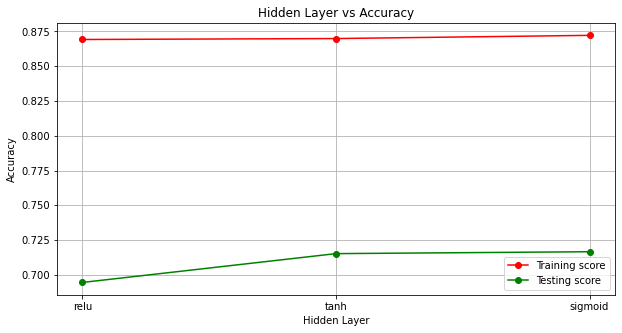

In [65]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Hidden Layer vs Accuracy')
ax.set_xlabel("Hidden Layer")
ax.set_ylabel("Accuracy")
ax.grid()

x = ["relu","tanh","sigmoid" ]

ax.plot(x, [reluTrain,tanhTrain,sigmoidTrain], 'o-', color="r", label="Training score")
ax.plot(x, [reluTest,tanhTest,sigmoidTest], 'o-', color="g", label="Testing score")
ax.legend(loc="best")

plt.show()

### (c) Analysis of optimal parameters and hyper-parameters, alpha value for regularization parameter, learning rate for gradient descent, the number of iterations, etc.

In [68]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras

kf = KFold(n_splits=10, random_state=None, shuffle=True)
i = 1
AverageTest = []
AverageTrain = []

for train_index, test_index in kf.split(X_trainRed):
    print("CV: {:.1f}".format(i))  
    X_train_cv, X_test_cv = X_trainRed[train_index], X_trainRed[test_index]
    y_train_cv, y_test_cv = y_trainRed[train_index], y_trainRed[test_index]
    
    
    for j in ['adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam','Ftrl']:
        print("Optimizer: ", j)
        model_2 = keras.models.Sequential([
            keras.layers.Dense(18, activation = 'tanh', input_shape=(11,)), 
            keras.layers.Dense(18, activation = 'tanh'),
            keras.layers.Dense(1, activation = 'sigmoid')])
        
        model_2.compile(loss='binary_crossentropy', optimizer=j, metrics=['accuracy'])  
        fit_score = model_2.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=1)
        model_2.evaluate(X_test_cv, y_test_cv,verbose=1)
        AverageTest.append(model_2.evaluate(X_test_cv, y_test_cv,verbose=1))
        AverageTrain.append(Average(fit_score.history['accuracy']))
        print('\n')
    i = i + 1
print(AverageTrain, '\n')
print(AverageTest)

CV: 1.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.5854 - accuracy: 0.6973
Epoch 2/100
978/978 [==============================] - 0s 200us/sample - loss: 0.5402 - accuracy: 0.7382
Epoch 3/100
978/978 [==============================] - 0s 202us/sample - loss: 0.5283 - accuracy: 0.7434
Epoch 4/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5217 - accuracy: 0.7393
Epoch 5/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5165 - accuracy: 0.7474
Epoch 6/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5136 - accuracy: 0.7454
Epoch 7/100
978/978 [==============================] - 0s 199us/sample - loss: 0.5119 - accuracy: 0.7536
Epoch 8/100
978/978 [==============================] - 0s 199us/sample - loss: 0.5087 - accuracy: 0.7495
Epoch 9/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5073 - accuracy: 0.7536
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4027 - accuracy: 0.8272
Epoch 79/100
978/978 [==============================] - 0s 201us/sample - loss: 0.4024 - accuracy: 0.8252
Epoch 80/100
978/978 [==============================] - 0s 212us/sample - loss: 0.4001 - accuracy: 0.8313
Epoch 81/100
978/978 [==============================] - 0s 173us/sample - loss: 0.3987 - accuracy: 0.8333
Epoch 82/100
978/978 [==============================] - 0s 185us/sample - loss: 0.3970 - accuracy: 0.8323
Epoch 83/100
978/978 [==============================] - 0s 203us/sample - loss: 0.3958 - accuracy: 0.8354
Epoch 84/100
978/978 [==============================] - 0s 172us/sample - loss: 0.3942 - accuracy: 0.8323
Epoch 85/100
978/978 [==============================] - 0s 182us/sample - loss: 0.3941 - accuracy: 0.8364
Epoch 86/100
978/978 [==============================] - 0s 207us/sample - loss: 0.3929 - accuracy: 0.8323
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 868us/sample - loss: 0.6201 - accuracy: 0.6616
Epoch 2/100
978/978 [==============================] - 0s 169us/sample - loss: 0.5582 - accuracy: 0.7249
Epoch 3/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5363 - accuracy: 0.7362
Epoch 4/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5273 - accuracy: 0.7382
Epoch 5/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5221 - accuracy: 0.7464
Epoch 6/100
978/978 [==============================] - 0s 186us/sample - loss: 0.5195 - accuracy: 0.7485
Epoch 7/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5170 - accuracy: 0.7444
Epoch 8/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5156 - accuracy: 0.7505
Epoch 9/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5144 - accuracy: 0.7515
Epoch 10/100
978

978/978 [==============================] - 0s 158us/sample - loss: 0.4668 - accuracy: 0.7812
Epoch 79/100
978/978 [==============================] - 0s 179us/sample - loss: 0.4657 - accuracy: 0.7873
Epoch 80/100
978/978 [==============================] - 0s 166us/sample - loss: 0.4650 - accuracy: 0.7853
Epoch 81/100
978/978 [==============================] - 0s 161us/sample - loss: 0.4641 - accuracy: 0.7863
Epoch 82/100
978/978 [==============================] - 0s 165us/sample - loss: 0.4638 - accuracy: 0.7894
Epoch 83/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4634 - accuracy: 0.7863
Epoch 84/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4629 - accuracy: 0.7883
Epoch 85/100
978/978 [==============================] - 0s 152us/sample - loss: 0.4622 - accuracy: 0.7863
Epoch 86/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4614 - accuracy: 0.7853
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6254 - accuracy: 0.6431
Epoch 2/100
978/978 [==============================] - 0s 199us/sample - loss: 0.5468 - accuracy: 0.7270
Epoch 3/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5320 - accuracy: 0.7362
Epoch 4/100
978/978 [==============================] - 0s 186us/sample - loss: 0.5250 - accuracy: 0.7423
Epoch 5/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5212 - accuracy: 0.7485
Epoch 6/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5182 - accuracy: 0.7464
Epoch 7/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5158 - accuracy: 0.7526
Epoch 8/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5140 - accuracy: 0.7485
Epoch 9/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5121 - accuracy: 0.7485
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 180us/sample - loss: 0.4206 - accuracy: 0.8119
Epoch 79/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4189 - accuracy: 0.8129
Epoch 80/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4189 - accuracy: 0.8119
Epoch 81/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4176 - accuracy: 0.8160
Epoch 82/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4163 - accuracy: 0.8119
Epoch 83/100
978/978 [==============================] - 0s 189us/sample - loss: 0.4160 - accuracy: 0.8149
Epoch 84/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4139 - accuracy: 0.8200
Epoch 85/100
978/978 [==============================] - 0s 198us/sample - loss: 0.4140 - accuracy: 0.8078
Epoch 86/100
978/978 [==============================] - 0s 198us/sample - loss: 0.4135 - accuracy: 0.8119
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 910us/sample - loss: 0.6974 - accuracy: 0.5327
Epoch 2/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6971 - accuracy: 0.5337
Epoch 3/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6967 - accuracy: 0.5348
Epoch 4/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6964 - accuracy: 0.5368
Epoch 5/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6960 - accuracy: 0.5409
Epoch 6/100
978/978 [==============================] - 0s 151us/sample - loss: 0.6956 - accuracy: 0.5419
Epoch 7/100
978/978 [==============================] - 0s 151us/sample - loss: 0.6953 - accuracy: 0.5429
Epoch 8/100
978/978 [==============================] - 0s 172us/sample - loss: 0.6949 - accuracy: 0.5450
Epoch 9/100
978/978 [==============================] - 0s 153us/sample - loss: 0.6945 - accuracy: 0.5470
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 207us/sample - loss: 0.6702 - accuracy: 0.6094
Epoch 79/100
978/978 [==============================] - 0s 213us/sample - loss: 0.6699 - accuracy: 0.6115
Epoch 80/100
978/978 [==============================] - 0s 218us/sample - loss: 0.6695 - accuracy: 0.6135
Epoch 81/100
978/978 [==============================] - 0s 211us/sample - loss: 0.6692 - accuracy: 0.6135
Epoch 82/100
978/978 [==============================] - 0s 219us/sample - loss: 0.6689 - accuracy: 0.6135
Epoch 83/100
978/978 [==============================] - 0s 205us/sample - loss: 0.6686 - accuracy: 0.6135
Epoch 84/100
978/978 [==============================] - 0s 204us/sample - loss: 0.6682 - accuracy: 0.6135
Epoch 85/100
978/978 [==============================] - 0s 215us/sample - loss: 0.6679 - accuracy: 0.6125
Epoch 86/100
978/978 [==============================] - 0s 207us/sample - loss: 0.6676 - accuracy: 0.6115
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6424 - accuracy: 0.6840
Epoch 2/100
978/978 [==============================] - 0s 211us/sample - loss: 0.6153 - accuracy: 0.7311
Epoch 3/100
978/978 [==============================] - 0s 209us/sample - loss: 0.6016 - accuracy: 0.7372
Epoch 4/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5922 - accuracy: 0.7352
Epoch 5/100
978/978 [==============================] - 0s 200us/sample - loss: 0.5850 - accuracy: 0.7362
Epoch 6/100
978/978 [==============================] - 0s 196us/sample - loss: 0.5792 - accuracy: 0.7331
Epoch 7/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5744 - accuracy: 0.7311
Epoch 8/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5704 - accuracy: 0.7372
Epoch 9/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5669 - accuracy: 0.7362
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 210us/sample - loss: 0.5221 - accuracy: 0.7485
Epoch 79/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5220 - accuracy: 0.7485
Epoch 80/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5218 - accuracy: 0.7485
Epoch 81/100
978/978 [==============================] - 0s 212us/sample - loss: 0.5217 - accuracy: 0.7495
Epoch 82/100
978/978 [==============================] - 0s 207us/sample - loss: 0.5215 - accuracy: 0.7474
Epoch 83/100
978/978 [==============================] - 0s 198us/sample - loss: 0.5214 - accuracy: 0.7464
Epoch 84/100
978/978 [==============================] - 0s 204us/sample - loss: 0.5212 - accuracy: 0.7464
Epoch 85/100
978/978 [==============================] - 0s 202us/sample - loss: 0.5211 - accuracy: 0.7464
Epoch 86/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5210 - accuracy: 0.7464
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6265 - accuracy: 0.6687
Epoch 2/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5757 - accuracy: 0.7157
Epoch 3/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5515 - accuracy: 0.7331
Epoch 4/100
978/978 [==============================] - 0s 182us/sample - loss: 0.5387 - accuracy: 0.7393
Epoch 5/100
978/978 [==============================] - 0s 198us/sample - loss: 0.5302 - accuracy: 0.7403
Epoch 6/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5261 - accuracy: 0.7403
Epoch 7/100
978/978 [==============================] - 0s 178us/sample - loss: 0.5226 - accuracy: 0.7413
Epoch 8/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5201 - accuracy: 0.7444
Epoch 9/100
978/978 [==============================] - 0s 207us/sample - loss: 0.5182 - accuracy: 0.7444
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 203us/sample - loss: 0.4661 - accuracy: 0.7740
Epoch 79/100
978/978 [==============================] - 0s 201us/sample - loss: 0.4656 - accuracy: 0.7740
Epoch 80/100
978/978 [==============================] - 0s 201us/sample - loss: 0.4647 - accuracy: 0.7730
Epoch 81/100
978/978 [==============================] - 0s 198us/sample - loss: 0.4645 - accuracy: 0.7751
Epoch 82/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4643 - accuracy: 0.7761
Epoch 83/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4634 - accuracy: 0.7771
Epoch 84/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4629 - accuracy: 0.7751
Epoch 85/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4623 - accuracy: 0.7751
Epoch 86/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4618 - accuracy: 0.7730
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.5695 - accuracy: 0.7168
Epoch 2/100
978/978 [==============================] - 0s 259us/sample - loss: 0.5226 - accuracy: 0.7423
Epoch 3/100
978/978 [==============================] - 0s 242us/sample - loss: 0.5155 - accuracy: 0.7546
Epoch 4/100
978/978 [==============================] - 0s 243us/sample - loss: 0.5119 - accuracy: 0.7372
Epoch 5/100
978/978 [==============================] - 0s 241us/sample - loss: 0.5097 - accuracy: 0.7464
Epoch 6/100
978/978 [==============================] - 0s 257us/sample - loss: 0.5070 - accuracy: 0.7454
Epoch 7/100
978/978 [==============================] - 0s 227us/sample - loss: 0.5054 - accuracy: 0.7515
Epoch 8/100
978/978 [==============================] - 0s 242us/sample - loss: 0.5031 - accuracy: 0.7515
Epoch 9/100
978/978 [==============================] - 0s 239us/sample - loss: 0.5004 - accuracy: 0.7526
Epoch 10/100
978

978/978 [==============================] - 0s 293us/sample - loss: 0.3955 - accuracy: 0.8241
Epoch 79/100
978/978 [==============================] - 0s 282us/sample - loss: 0.3942 - accuracy: 0.8282
Epoch 80/100
978/978 [==============================] - 0s 278us/sample - loss: 0.3934 - accuracy: 0.8262
Epoch 81/100
978/978 [==============================] - 0s 279us/sample - loss: 0.3909 - accuracy: 0.8333
Epoch 82/100
978/978 [==============================] - 0s 275us/sample - loss: 0.3894 - accuracy: 0.8303
Epoch 83/100
978/978 [==============================] - 0s 277us/sample - loss: 0.3907 - accuracy: 0.8272
Epoch 84/100
978/978 [==============================] - 0s 279us/sample - loss: 0.3896 - accuracy: 0.8333
Epoch 85/100
978/978 [==============================] - 0s 280us/sample - loss: 0.3866 - accuracy: 0.8241
Epoch 86/100
978/978 [==============================] - 0s 278us/sample - loss: 0.3865 - accuracy: 0.8333
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6940 - accuracy: 0.5368
Epoch 2/100
978/978 [==============================] - 0s 198us/sample - loss: 0.6930 - accuracy: 0.5378
Epoch 3/100
978/978 [==============================] - 0s 208us/sample - loss: 0.6929 - accuracy: 0.5378
Epoch 4/100
978/978 [==============================] - 0s 233us/sample - loss: 0.6929 - accuracy: 0.5378
Epoch 5/100
978/978 [==============================] - 0s 220us/sample - loss: 0.6928 - accuracy: 0.5378
Epoch 6/100
978/978 [==============================] - 0s 197us/sample - loss: 0.6928 - accuracy: 0.5378
Epoch 7/100
978/978 [==============================] - 0s 212us/sample - loss: 0.6928 - accuracy: 0.5378
Epoch 8/100
978/978 [==============================] - 0s 218us/sample - loss: 0.6927 - accuracy: 0.5378
Epoch 9/100
978/978 [==============================] - 0s 204us/sample - loss: 0.6927 - accuracy: 0.5378
Epoch 10/100
978/

978/978 [==============================] - 0s 197us/sample - loss: 0.6920 - accuracy: 0.5378
Epoch 78/100
978/978 [==============================] - 0s 187us/sample - loss: 0.6920 - accuracy: 0.5378
Epoch 79/100
978/978 [==============================] - 0s 177us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 80/100
978/978 [==============================] - 0s 187us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 81/100
978/978 [==============================] - 0s 193us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 82/100
978/978 [==============================] - 0s 175us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 83/100
978/978 [==============================] - 0s 199us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 84/100
978/978 [==============================] - 0s 175us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 85/100
978/978 [==============================] - 0s 173us/sample - loss: 0.6919 - accuracy: 0.5378
Epoch 86/100
978/978 [==============================] - 0s 



CV: 2.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6200 - accuracy: 0.6513
Epoch 2/100
978/978 [==============================] - 0s 208us/sample - loss: 0.5604 - accuracy: 0.7127
Epoch 3/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5454 - accuracy: 0.7219
Epoch 4/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5389 - accuracy: 0.7270
Epoch 5/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5350 - accuracy: 0.7209
Epoch 6/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5337 - accuracy: 0.7331
Epoch 7/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5300 - accuracy: 0.7290
Epoch 8/100
978/978 [==============================] - 0s 216us/sample - loss: 0.5292 - accuracy: 0.7301
Epoch 9/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5273 - accuracy: 0.7372
Epoch 10/

Epoch 78/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4210 - accuracy: 0.8129
Epoch 79/100
978/978 [==============================] - 0s 187us/sample - loss: 0.4206 - accuracy: 0.8037
Epoch 80/100
978/978 [==============================] - 0s 190us/sample - loss: 0.4196 - accuracy: 0.8098
Epoch 81/100
978/978 [==============================] - 0s 200us/sample - loss: 0.4172 - accuracy: 0.8027
Epoch 82/100
978/978 [==============================] - 0s 201us/sample - loss: 0.4172 - accuracy: 0.7986
Epoch 83/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4144 - accuracy: 0.8016
Epoch 84/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4156 - accuracy: 0.8078
Epoch 85/100
978/978 [==============================] - 0s 192us/sample - loss: 0.4137 - accuracy: 0.8119
Epoch 86/100
978/978 [==============================] - 0s 192us/sample - loss: 0.4135 - accuracy: 0.8027
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 899us/sample - loss: 0.6088 - accuracy: 0.6943
Epoch 2/100
978/978 [==============================] - 0s 170us/sample - loss: 0.5778 - accuracy: 0.7076
Epoch 3/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5617 - accuracy: 0.7137
Epoch 4/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5530 - accuracy: 0.7188
Epoch 5/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5479 - accuracy: 0.7301
Epoch 6/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5444 - accuracy: 0.7290
Epoch 7/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5422 - accuracy: 0.7290
Epoch 8/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5402 - accuracy: 0.7311
Epoch 9/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5386 - accuracy: 0.7311
Epoch 10/100
978

978/978 [==============================] - 0s 196us/sample - loss: 0.4962 - accuracy: 0.7566
Epoch 79/100
978/978 [==============================] - 0s 185us/sample - loss: 0.4952 - accuracy: 0.7648
Epoch 80/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4946 - accuracy: 0.7607
Epoch 81/100
978/978 [==============================] - 0s 193us/sample - loss: 0.4933 - accuracy: 0.7546
Epoch 82/100
978/978 [==============================] - 0s 190us/sample - loss: 0.4928 - accuracy: 0.7628
Epoch 83/100
978/978 [==============================] - 0s 188us/sample - loss: 0.4920 - accuracy: 0.7556
Epoch 84/100
978/978 [==============================] - 0s 194us/sample - loss: 0.4912 - accuracy: 0.7607
Epoch 85/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4902 - accuracy: 0.7536
Epoch 86/100
978/978 [==============================] - 0s 183us/sample - loss: 0.4893 - accuracy: 0.7628
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.5934 - accuracy: 0.6892
Epoch 2/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5557 - accuracy: 0.7147
Epoch 3/100
978/978 [==============================] - 0s 209us/sample - loss: 0.5455 - accuracy: 0.7188
Epoch 4/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5377 - accuracy: 0.7239
Epoch 5/100
978/978 [==============================] - 0s 209us/sample - loss: 0.5339 - accuracy: 0.7372
Epoch 6/100
978/978 [==============================] - 0s 213us/sample - loss: 0.5297 - accuracy: 0.7372
Epoch 7/100
978/978 [==============================] - 0s 203us/sample - loss: 0.5261 - accuracy: 0.7362
Epoch 8/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5242 - accuracy: 0.7403
Epoch 9/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5200 - accuracy: 0.7413
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 206us/sample - loss: 0.4202 - accuracy: 0.8037
Epoch 79/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4186 - accuracy: 0.8057
Epoch 80/100
978/978 [==============================] - 0s 206us/sample - loss: 0.4196 - accuracy: 0.8047
Epoch 81/100
978/978 [==============================] - 0s 206us/sample - loss: 0.4185 - accuracy: 0.8027
Epoch 82/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4178 - accuracy: 0.8108
Epoch 83/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4155 - accuracy: 0.8098
Epoch 84/100
978/978 [==============================] - 0s 200us/sample - loss: 0.4144 - accuracy: 0.8078
Epoch 85/100
978/978 [==============================] - 0s 193us/sample - loss: 0.4131 - accuracy: 0.8088
Epoch 86/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4131 - accuracy: 0.8078
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.7360 - accuracy: 0.4796
Epoch 2/100
978/978 [==============================] - 0s 185us/sample - loss: 0.7354 - accuracy: 0.4785
Epoch 3/100
978/978 [==============================] - 0s 181us/sample - loss: 0.7348 - accuracy: 0.4806
Epoch 4/100
978/978 [==============================] - 0s 180us/sample - loss: 0.7343 - accuracy: 0.4806
Epoch 5/100
978/978 [==============================] - 0s 190us/sample - loss: 0.7337 - accuracy: 0.4785
Epoch 6/100
978/978 [==============================] - 0s 187us/sample - loss: 0.7332 - accuracy: 0.4816
Epoch 7/100
978/978 [==============================] - 0s 181us/sample - loss: 0.7327 - accuracy: 0.4836
Epoch 8/100
978/978 [==============================] - 0s 180us/sample - loss: 0.7322 - accuracy: 0.4867
Epoch 9/100
978/978 [==============================] - 0s 185us/sample - loss: 0.7316 - accuracy: 0.4877
Epoch 10/100


Epoch 78/100
978/978 [==============================] - 0s 186us/sample - loss: 0.6997 - accuracy: 0.5511
Epoch 79/100
978/978 [==============================] - 0s 190us/sample - loss: 0.6993 - accuracy: 0.5532
Epoch 80/100
978/978 [==============================] - 0s 184us/sample - loss: 0.6989 - accuracy: 0.5542
Epoch 81/100
978/978 [==============================] - 0s 186us/sample - loss: 0.6985 - accuracy: 0.5552
Epoch 82/100
978/978 [==============================] - 0s 193us/sample - loss: 0.6981 - accuracy: 0.5552
Epoch 83/100
978/978 [==============================] - 0s 201us/sample - loss: 0.6976 - accuracy: 0.5562
Epoch 84/100
978/978 [==============================] - 0s 208us/sample - loss: 0.6972 - accuracy: 0.5552
Epoch 85/100
978/978 [==============================] - 0s 211us/sample - loss: 0.6968 - accuracy: 0.5552
Epoch 86/100
978/978 [==============================] - 0s 202us/sample - loss: 0.6964 - accuracy: 0.5573
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.7311 - accuracy: 0.5542
Epoch 2/100
978/978 [==============================] - 0s 228us/sample - loss: 0.6868 - accuracy: 0.5736
Epoch 3/100
978/978 [==============================] - 0s 219us/sample - loss: 0.6644 - accuracy: 0.6094
Epoch 4/100
978/978 [==============================] - 0s 210us/sample - loss: 0.6489 - accuracy: 0.6339
Epoch 5/100
978/978 [==============================] - 0s 210us/sample - loss: 0.6373 - accuracy: 0.6483
Epoch 6/100
978/978 [==============================] - 0s 212us/sample - loss: 0.6282 - accuracy: 0.6585
Epoch 7/100
978/978 [==============================] - 0s 225us/sample - loss: 0.6207 - accuracy: 0.6605
Epoch 8/100
978/978 [==============================] - 0s 235us/sample - loss: 0.6143 - accuracy: 0.6656
Epoch 9/100
978/978 [==============================] - 0s 219us/sample - loss: 0.6090 - accuracy: 0.6687
Epoch 10/100
9

978/978 [==============================] - 0s 246us/sample - loss: 0.5484 - accuracy: 0.7229
Epoch 78/100
978/978 [==============================] - 0s 250us/sample - loss: 0.5482 - accuracy: 0.7229
Epoch 79/100
978/978 [==============================] - 0s 235us/sample - loss: 0.5481 - accuracy: 0.7229
Epoch 80/100
978/978 [==============================] - 0s 237us/sample - loss: 0.5479 - accuracy: 0.7229
Epoch 81/100
978/978 [==============================] - 0s 261us/sample - loss: 0.5477 - accuracy: 0.7239
Epoch 82/100
978/978 [==============================] - 0s 333us/sample - loss: 0.5475 - accuracy: 0.7239
Epoch 83/100
978/978 [==============================] - 0s 285us/sample - loss: 0.5474 - accuracy: 0.7229
Epoch 84/100
978/978 [==============================] - 0s 246us/sample - loss: 0.5472 - accuracy: 0.7229
Epoch 85/100
978/978 [==============================] - 0s 230us/sample - loss: 0.5470 - accuracy: 0.7229
Epoch 86/100
978/978 [==============================] - 0s 



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6683 - accuracy: 0.5716
Epoch 2/100
978/978 [==============================] - 0s 208us/sample - loss: 0.5949 - accuracy: 0.6912
Epoch 3/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5669 - accuracy: 0.7137
Epoch 4/100
978/978 [==============================] - 0s 223us/sample - loss: 0.5534 - accuracy: 0.7249
Epoch 5/100
978/978 [==============================] - 0s 204us/sample - loss: 0.5458 - accuracy: 0.7311
Epoch 6/100
978/978 [==============================] - 0s 216us/sample - loss: 0.5414 - accuracy: 0.7352
Epoch 7/100
978/978 [==============================] - 0s 227us/sample - loss: 0.5393 - accuracy: 0.7342
Epoch 8/100
978/978 [==============================] - 0s 220us/sample - loss: 0.5375 - accuracy: 0.7301
Epoch 9/100
978/978 [==============================] - 0s 230us/sample - loss: 0.5353 - accuracy: 0.7352
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 215us/sample - loss: 0.4951 - accuracy: 0.7587
Epoch 79/100
978/978 [==============================] - 0s 209us/sample - loss: 0.4941 - accuracy: 0.7566
Epoch 80/100
978/978 [==============================] - 0s 210us/sample - loss: 0.4935 - accuracy: 0.7577
Epoch 81/100
978/978 [==============================] - 0s 211us/sample - loss: 0.4937 - accuracy: 0.7587
Epoch 82/100
978/978 [==============================] - 0s 208us/sample - loss: 0.4921 - accuracy: 0.7577
Epoch 83/100
978/978 [==============================] - 0s 210us/sample - loss: 0.4925 - accuracy: 0.7566
Epoch 84/100
978/978 [==============================] - 0s 218us/sample - loss: 0.4910 - accuracy: 0.7628
Epoch 85/100
978/978 [==============================] - 0s 209us/sample - loss: 0.4907 - accuracy: 0.7618
Epoch 86/100
978/978 [==============================] - 0s 222us/sample - loss: 0.4896 - accuracy: 0.7587
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.6557 - accuracy: 0.6125
Epoch 2/100
978/978 [==============================] - 0s 241us/sample - loss: 0.5585 - accuracy: 0.7198
Epoch 3/100
978/978 [==============================] - 0s 240us/sample - loss: 0.5438 - accuracy: 0.7249
Epoch 4/100
978/978 [==============================] - 0s 238us/sample - loss: 0.5395 - accuracy: 0.7239
Epoch 5/100
978/978 [==============================] - 0s 237us/sample - loss: 0.5367 - accuracy: 0.7290
Epoch 6/100
978/978 [==============================] - 0s 235us/sample - loss: 0.5336 - accuracy: 0.7331
Epoch 7/100
978/978 [==============================] - 0s 243us/sample - loss: 0.5309 - accuracy: 0.7290
Epoch 8/100
978/978 [==============================] - 0s 241us/sample - loss: 0.5286 - accuracy: 0.7352
Epoch 9/100
978/978 [==============================] - 0s 238us/sample - loss: 0.5273 - accuracy: 0.7331
Epoch 10/100
978

978/978 [==============================] - 0s 195us/sample - loss: 0.4411 - accuracy: 0.7975
Epoch 79/100
978/978 [==============================] - 0s 197us/sample - loss: 0.4397 - accuracy: 0.7965
Epoch 80/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4388 - accuracy: 0.7924
Epoch 81/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4380 - accuracy: 0.8067
Epoch 82/100
978/978 [==============================] - 0s 198us/sample - loss: 0.4372 - accuracy: 0.8037
Epoch 83/100
978/978 [==============================] - 0s 194us/sample - loss: 0.4341 - accuracy: 0.7996
Epoch 84/100
978/978 [==============================] - 0s 194us/sample - loss: 0.4335 - accuracy: 0.7996
Epoch 85/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4325 - accuracy: 0.8078
Epoch 86/100
978/978 [==============================] - 0s 197us/sample - loss: 0.4335 - accuracy: 0.8006
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 937us/sample - loss: 0.6945 - accuracy: 0.5399
Epoch 2/100
978/978 [==============================] - 0s 164us/sample - loss: 0.6929 - accuracy: 0.5419
Epoch 3/100
978/978 [==============================] - 0s 164us/sample - loss: 0.6928 - accuracy: 0.5419
Epoch 4/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6928 - accuracy: 0.5419
Epoch 5/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6927 - accuracy: 0.5419
Epoch 6/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6927 - accuracy: 0.5419
Epoch 7/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6926 - accuracy: 0.5419
Epoch 8/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6926 - accuracy: 0.5419
Epoch 9/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6926 - accuracy: 0.5419
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 164us/sample - loss: 0.6916 - accuracy: 0.5419
Epoch 79/100
978/978 [==============================] - 0s 163us/sample - loss: 0.6916 - accuracy: 0.5419
Epoch 80/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6916 - accuracy: 0.5419
Epoch 81/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6916 - accuracy: 0.5419
Epoch 82/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6916 - accuracy: 0.5419
Epoch 83/100
978/978 [==============================] - 0s 167us/sample - loss: 0.6915 - accuracy: 0.5419
Epoch 84/100
978/978 [==============================] - 0s 170us/sample - loss: 0.6915 - accuracy: 0.5419
Epoch 85/100
978/978 [==============================] - 0s 163us/sample - loss: 0.6915 - accuracy: 0.5419
Epoch 86/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6915 - accuracy: 0.5419
Epoch 87/100
978/978 [========================



CV: 3.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 972us/sample - loss: 0.6408 - accuracy: 0.6258
Epoch 2/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5551 - accuracy: 0.7178
Epoch 3/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5360 - accuracy: 0.7372
Epoch 4/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5294 - accuracy: 0.7311
Epoch 5/100
978/978 [==============================] - 0s 164us/sample - loss: 0.5230 - accuracy: 0.7342
Epoch 6/100
978/978 [==============================] - 0s 166us/sample - loss: 0.5206 - accuracy: 0.7434
Epoch 7/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5177 - accuracy: 0.7393
Epoch 8/100
978/978 [==============================] - 0s 164us/sample - loss: 0.5148 - accuracy: 0.7454
Epoch 9/100
978/978 [==============================] - 0s 165us/sample - loss: 0.5137 - accuracy: 0.7474
Epoch 1

Epoch 78/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4140 - accuracy: 0.8067
Epoch 79/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4149 - accuracy: 0.8078
Epoch 80/100
978/978 [==============================] - 0s 188us/sample - loss: 0.4129 - accuracy: 0.8078
Epoch 81/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4096 - accuracy: 0.8088
Epoch 82/100
978/978 [==============================] - 0s 176us/sample - loss: 0.4106 - accuracy: 0.8108
Epoch 83/100
978/978 [==============================] - 0s 190us/sample - loss: 0.4091 - accuracy: 0.8088
Epoch 84/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4076 - accuracy: 0.8078
Epoch 85/100
978/978 [==============================] - 0s 191us/sample - loss: 0.4036 - accuracy: 0.8119
Epoch 86/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4075 - accuracy: 0.8067
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 11s 11ms/sample - loss: 0.6430 - accuracy: 0.6309
Epoch 2/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5718 - accuracy: 0.7025
Epoch 3/100
978/978 [==============================] - 0s 164us/sample - loss: 0.5556 - accuracy: 0.7178
Epoch 4/100
978/978 [==============================] - 0s 157us/sample - loss: 0.5477 - accuracy: 0.7229
Epoch 5/100
978/978 [==============================] - 0s 170us/sample - loss: 0.5426 - accuracy: 0.7301
Epoch 6/100
978/978 [==============================] - 0s 156us/sample - loss: 0.5388 - accuracy: 0.7239
Epoch 7/100
978/978 [==============================] - 0s 160us/sample - loss: 0.5354 - accuracy: 0.7372
Epoch 8/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5328 - accuracy: 0.7331
Epoch 9/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5307 - accuracy: 0.7393
Epoch 10/100
978

978/978 [==============================] - 0s 174us/sample - loss: 0.4745 - accuracy: 0.7679
Epoch 79/100
978/978 [==============================] - 0s 164us/sample - loss: 0.4733 - accuracy: 0.7689
Epoch 80/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4741 - accuracy: 0.7689
Epoch 81/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4728 - accuracy: 0.7607
Epoch 82/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4722 - accuracy: 0.7771
Epoch 83/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4711 - accuracy: 0.7720
Epoch 84/100
978/978 [==============================] - 0s 169us/sample - loss: 0.4711 - accuracy: 0.7710
Epoch 85/100
978/978 [==============================] - 0s 175us/sample - loss: 0.4698 - accuracy: 0.7689
Epoch 86/100
978/978 [==============================] - 0s 168us/sample - loss: 0.4689 - accuracy: 0.7751
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6482 - accuracy: 0.6084
Epoch 2/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5463 - accuracy: 0.7209
Epoch 3/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5319 - accuracy: 0.7301
Epoch 4/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5268 - accuracy: 0.7301
Epoch 5/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5237 - accuracy: 0.7342
Epoch 6/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5215 - accuracy: 0.7393
Epoch 7/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5189 - accuracy: 0.7393
Epoch 8/100
978/978 [==============================] - 0s 185us/sample - loss: 0.5173 - accuracy: 0.7464
Epoch 9/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5149 - accuracy: 0.7495
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4349 - accuracy: 0.8016
Epoch 79/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4323 - accuracy: 0.7996
Epoch 80/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4337 - accuracy: 0.7986
Epoch 81/100
978/978 [==============================] - 0s 175us/sample - loss: 0.4308 - accuracy: 0.8057
Epoch 82/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4318 - accuracy: 0.7975
Epoch 83/100
978/978 [==============================] - 0s 179us/sample - loss: 0.4292 - accuracy: 0.8027
Epoch 84/100
978/978 [==============================] - 0s 175us/sample - loss: 0.4299 - accuracy: 0.8108
Epoch 85/100
978/978 [==============================] - 0s 176us/sample - loss: 0.4288 - accuracy: 0.7986
Epoch 86/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4270 - accuracy: 0.8016
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 934us/sample - loss: 0.7308 - accuracy: 0.5235
Epoch 2/100
978/978 [==============================] - 0s 162us/sample - loss: 0.7303 - accuracy: 0.5235
Epoch 3/100
978/978 [==============================] - 0s 159us/sample - loss: 0.7299 - accuracy: 0.5235
Epoch 4/100
978/978 [==============================] - 0s 162us/sample - loss: 0.7295 - accuracy: 0.5235
Epoch 5/100
978/978 [==============================] - 0s 158us/sample - loss: 0.7290 - accuracy: 0.5245
Epoch 6/100
978/978 [==============================] - 0s 164us/sample - loss: 0.7286 - accuracy: 0.5256
Epoch 7/100
978/978 [==============================] - 0s 161us/sample - loss: 0.7282 - accuracy: 0.5256
Epoch 8/100
978/978 [==============================] - 0s 164us/sample - loss: 0.7278 - accuracy: 0.5256
Epoch 9/100
978/978 [==============================] - 0s 169us/sample - loss: 0.7274 - accuracy: 0.5256
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 163us/sample - loss: 0.7002 - accuracy: 0.5593
Epoch 79/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6999 - accuracy: 0.5603
Epoch 80/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6995 - accuracy: 0.5603
Epoch 81/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6991 - accuracy: 0.5603
Epoch 82/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6988 - accuracy: 0.5603
Epoch 83/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6984 - accuracy: 0.5593
Epoch 84/100
978/978 [==============================] - 0s 170us/sample - loss: 0.6980 - accuracy: 0.5593
Epoch 85/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6977 - accuracy: 0.5603
Epoch 86/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6973 - accuracy: 0.5603
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.7897 - accuracy: 0.4110
Epoch 2/100
978/978 [==============================] - 0s 160us/sample - loss: 0.7443 - accuracy: 0.4519
Epoch 3/100
978/978 [==============================] - 0s 161us/sample - loss: 0.7191 - accuracy: 0.4908
Epoch 4/100
978/978 [==============================] - 0s 163us/sample - loss: 0.7007 - accuracy: 0.5143
Epoch 5/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6861 - accuracy: 0.5552
Epoch 6/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6742 - accuracy: 0.5685
Epoch 7/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6640 - accuracy: 0.5900
Epoch 8/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6553 - accuracy: 0.6043
Epoch 9/100
978/978 [==============================] - 0s 158us/sample - loss: 0.6476 - accuracy: 0.6207
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5478 - accuracy: 0.7106
Epoch 79/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5475 - accuracy: 0.7137
Epoch 80/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5473 - accuracy: 0.7147
Epoch 81/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5470 - accuracy: 0.7157
Epoch 82/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5467 - accuracy: 0.7157
Epoch 83/100
978/978 [==============================] - 0s 174us/sample - loss: 0.5464 - accuracy: 0.7168
Epoch 84/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5462 - accuracy: 0.7168
Epoch 85/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5459 - accuracy: 0.7157
Epoch 86/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5457 - accuracy: 0.7157
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 994us/sample - loss: 0.7031 - accuracy: 0.5419
Epoch 2/100
978/978 [==============================] - 0s 172us/sample - loss: 0.6078 - accuracy: 0.6697
Epoch 3/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5666 - accuracy: 0.7168
Epoch 4/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5477 - accuracy: 0.7311
Epoch 5/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5384 - accuracy: 0.7403
Epoch 6/100
978/978 [==============================] - 0s 178us/sample - loss: 0.5333 - accuracy: 0.7464
Epoch 7/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5300 - accuracy: 0.7372
Epoch 8/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5275 - accuracy: 0.7434
Epoch 9/100
978/978 [==============================] - 0s 185us/sample - loss: 0.5253 - accuracy: 0.7434
Epoch 10/100


Epoch 78/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4716 - accuracy: 0.7843
Epoch 79/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4708 - accuracy: 0.7843
Epoch 80/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4701 - accuracy: 0.7914
Epoch 81/100
978/978 [==============================] - 0s 169us/sample - loss: 0.4694 - accuracy: 0.7873
Epoch 82/100
978/978 [==============================] - 0s 168us/sample - loss: 0.4697 - accuracy: 0.7873
Epoch 83/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4685 - accuracy: 0.7853
Epoch 84/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4678 - accuracy: 0.7894
Epoch 85/100
978/978 [==============================] - 0s 185us/sample - loss: 0.4675 - accuracy: 0.7904
Epoch 86/100
978/978 [==============================] - 0s 161us/sample - loss: 0.4671 - accuracy: 0.7863
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.6615 - accuracy: 0.5982
Epoch 2/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5612 - accuracy: 0.7178
Epoch 3/100
978/978 [==============================] - 0s 196us/sample - loss: 0.5391 - accuracy: 0.7260
Epoch 4/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5306 - accuracy: 0.7290
Epoch 5/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5261 - accuracy: 0.7260
Epoch 6/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5228 - accuracy: 0.7290
Epoch 7/100
978/978 [==============================] - 0s 191us/sample - loss: 0.5194 - accuracy: 0.7362
Epoch 8/100
978/978 [==============================] - 0s 191us/sample - loss: 0.5172 - accuracy: 0.7382
Epoch 9/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5148 - accuracy: 0.7331
Epoch 10/100
978

978/978 [==============================] - 0s 240us/sample - loss: 0.4082 - accuracy: 0.8221
Epoch 79/100
978/978 [==============================] - 0s 239us/sample - loss: 0.4078 - accuracy: 0.8108
Epoch 80/100
978/978 [==============================] - 0s 231us/sample - loss: 0.4070 - accuracy: 0.8231
Epoch 81/100
978/978 [==============================] - 0s 254us/sample - loss: 0.4047 - accuracy: 0.8160
Epoch 82/100
978/978 [==============================] - 0s 236us/sample - loss: 0.4020 - accuracy: 0.8241
Epoch 83/100
978/978 [==============================] - 0s 224us/sample - loss: 0.4054 - accuracy: 0.8149
Epoch 84/100
978/978 [==============================] - 0s 247us/sample - loss: 0.4018 - accuracy: 0.8180
Epoch 85/100
978/978 [==============================] - 0s 245us/sample - loss: 0.4004 - accuracy: 0.8292
Epoch 86/100
978/978 [==============================] - 0s 243us/sample - loss: 0.4001 - accuracy: 0.8241
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6942 - accuracy: 0.5164
Epoch 2/100
978/978 [==============================] - 0s 197us/sample - loss: 0.6931 - accuracy: 0.5286
Epoch 3/100
978/978 [==============================] - 0s 194us/sample - loss: 0.6930 - accuracy: 0.5286
Epoch 4/100
978/978 [==============================] - 0s 188us/sample - loss: 0.6930 - accuracy: 0.5286
Epoch 5/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6930 - accuracy: 0.5286
Epoch 6/100
978/978 [==============================] - 0s 194us/sample - loss: 0.6929 - accuracy: 0.5286
Epoch 7/100
978/978 [==============================] - 0s 187us/sample - loss: 0.6929 - accuracy: 0.5286
Epoch 8/100
978/978 [==============================] - 0s 200us/sample - loss: 0.6929 - accuracy: 0.5286
Epoch 9/100
978/978 [==============================] - 0s 195us/sample - loss: 0.6929 - accuracy: 0.5286
Epoch 10/100
978/

978/978 [==============================] - 0s 177us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 79/100
978/978 [==============================] - 0s 179us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 80/100
978/978 [==============================] - 0s 180us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 81/100
978/978 [==============================] - 0s 177us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 82/100
978/978 [==============================] - 0s 185us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 83/100
978/978 [==============================] - 0s 178us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 84/100
978/978 [==============================] - 0s 176us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 85/100
978/978 [==============================] - 0s 185us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 86/100
978/978 [==============================] - 0s 175us/sample - loss: 0.6924 - accuracy: 0.5286
Epoch 87/100
978/978 [==============================] - 0s 



CV: 4.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6421 - accuracy: 0.6462
Epoch 2/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5520 - accuracy: 0.7239
Epoch 3/100
978/978 [==============================] - 0s 191us/sample - loss: 0.5333 - accuracy: 0.7290
Epoch 4/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5262 - accuracy: 0.7331
Epoch 5/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5244 - accuracy: 0.7352
Epoch 6/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5210 - accuracy: 0.7403
Epoch 7/100
978/978 [==============================] - 0s 174us/sample - loss: 0.5187 - accuracy: 0.7382
Epoch 8/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5172 - accuracy: 0.7362
Epoch 9/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5158 - accuracy: 0.7464
Epoch 10/

Epoch 78/100
978/978 [==============================] - 0s 180us/sample - loss: 0.4117 - accuracy: 0.8057
Epoch 79/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4117 - accuracy: 0.8047
Epoch 80/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4101 - accuracy: 0.8088
Epoch 81/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4085 - accuracy: 0.8149
Epoch 82/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4070 - accuracy: 0.8149
Epoch 83/100
978/978 [==============================] - 0s 195us/sample - loss: 0.4057 - accuracy: 0.8108
Epoch 84/100
978/978 [==============================] - 0s 189us/sample - loss: 0.4057 - accuracy: 0.8057
Epoch 85/100
978/978 [==============================] - 0s 189us/sample - loss: 0.4026 - accuracy: 0.8160
Epoch 86/100
978/978 [==============================] - 0s 205us/sample - loss: 0.4020 - accuracy: 0.8088
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 902us/sample - loss: 0.6408 - accuracy: 0.6360
Epoch 2/100
978/978 [==============================] - 0s 174us/sample - loss: 0.5683 - accuracy: 0.7127
Epoch 3/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5494 - accuracy: 0.7178
Epoch 4/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5419 - accuracy: 0.7178
Epoch 5/100
978/978 [==============================] - 0s 179us/sample - loss: 0.5374 - accuracy: 0.7270
Epoch 6/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5342 - accuracy: 0.7342
Epoch 7/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5318 - accuracy: 0.7321
Epoch 8/100
978/978 [==============================] - 0s 163us/sample - loss: 0.5298 - accuracy: 0.7362
Epoch 9/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5283 - accuracy: 0.7382
Epoch 10/100
978

978/978 [==============================] - 0s 171us/sample - loss: 0.4772 - accuracy: 0.7607
Epoch 78/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4770 - accuracy: 0.7658
Epoch 79/100
978/978 [==============================] - 0s 188us/sample - loss: 0.4756 - accuracy: 0.7638
Epoch 80/100
978/978 [==============================] - 0s 190us/sample - loss: 0.4753 - accuracy: 0.7658
Epoch 81/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4743 - accuracy: 0.7699
Epoch 82/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4739 - accuracy: 0.7669
Epoch 83/100
978/978 [==============================] - 0s 208us/sample - loss: 0.4734 - accuracy: 0.7730
Epoch 84/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4725 - accuracy: 0.7740
Epoch 85/100
978/978 [==============================] - 0s 209us/sample - loss: 0.4718 - accuracy: 0.7638
Epoch 86/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6578 - accuracy: 0.5828
Epoch 2/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5464 - accuracy: 0.7270
Epoch 3/100
978/978 [==============================] - 0s 200us/sample - loss: 0.5309 - accuracy: 0.7342
Epoch 4/100
978/978 [==============================] - 0s 214us/sample - loss: 0.5281 - accuracy: 0.7321
Epoch 5/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5260 - accuracy: 0.7393
Epoch 6/100
978/978 [==============================] - 0s 207us/sample - loss: 0.5240 - accuracy: 0.7382
Epoch 7/100
978/978 [==============================] - 0s 213us/sample - loss: 0.5232 - accuracy: 0.7382
Epoch 8/100
978/978 [==============================] - 0s 209us/sample - loss: 0.5216 - accuracy: 0.7393
Epoch 9/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5195 - accuracy: 0.7423
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 213us/sample - loss: 0.4435 - accuracy: 0.7945
Epoch 79/100
978/978 [==============================] - 0s 218us/sample - loss: 0.4429 - accuracy: 0.7894
Epoch 80/100
978/978 [==============================] - 0s 220us/sample - loss: 0.4418 - accuracy: 0.8016
Epoch 81/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4414 - accuracy: 0.7904
Epoch 82/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4402 - accuracy: 0.7883
Epoch 83/100
978/978 [==============================] - 0s 236us/sample - loss: 0.4381 - accuracy: 0.7996
Epoch 84/100
978/978 [==============================] - 0s 234us/sample - loss: 0.4387 - accuracy: 0.7965
Epoch 85/100
978/978 [==============================] - 0s 236us/sample - loss: 0.4360 - accuracy: 0.7975
Epoch 86/100
978/978 [==============================] - 0s 232us/sample - loss: 0.4357 - accuracy: 0.7914
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 949us/sample - loss: 0.7990 - accuracy: 0.3875
Epoch 2/100
978/978 [==============================] - 0s 180us/sample - loss: 0.7982 - accuracy: 0.3896
Epoch 3/100
978/978 [==============================] - 0s 184us/sample - loss: 0.7973 - accuracy: 0.3906
Epoch 4/100
978/978 [==============================] - 0s 182us/sample - loss: 0.7965 - accuracy: 0.3906
Epoch 5/100
978/978 [==============================] - 0s 176us/sample - loss: 0.7956 - accuracy: 0.3926
Epoch 6/100
978/978 [==============================] - 0s 173us/sample - loss: 0.7948 - accuracy: 0.3926
Epoch 7/100
978/978 [==============================] - 0s 182us/sample - loss: 0.7940 - accuracy: 0.3937
Epoch 8/100
978/978 [==============================] - 0s 180us/sample - loss: 0.7932 - accuracy: 0.3937
Epoch 9/100
978/978 [==============================] - 0s 177us/sample - loss: 0.7924 - accuracy: 0.3937
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 224us/sample - loss: 0.7404 - accuracy: 0.4376
Epoch 79/100
978/978 [==============================] - 0s 211us/sample - loss: 0.7397 - accuracy: 0.4376
Epoch 80/100
978/978 [==============================] - 0s 197us/sample - loss: 0.7390 - accuracy: 0.4427
Epoch 81/100
978/978 [==============================] - 0s 182us/sample - loss: 0.7383 - accuracy: 0.4438
Epoch 82/100
978/978 [==============================] - 0s 195us/sample - loss: 0.7376 - accuracy: 0.4448
Epoch 83/100
978/978 [==============================] - 0s 202us/sample - loss: 0.7370 - accuracy: 0.4458
Epoch 84/100
978/978 [==============================] - 0s 207us/sample - loss: 0.7363 - accuracy: 0.4458
Epoch 85/100
978/978 [==============================] - 0s 202us/sample - loss: 0.7356 - accuracy: 0.4448
Epoch 86/100
978/978 [==============================] - 0s 197us/sample - loss: 0.7350 - accuracy: 0.4468
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6798 - accuracy: 0.5736
Epoch 2/100
978/978 [==============================] - 0s 234us/sample - loss: 0.6399 - accuracy: 0.6391
Epoch 3/100
978/978 [==============================] - 0s 222us/sample - loss: 0.6210 - accuracy: 0.6616
Epoch 4/100
978/978 [==============================] - 0s 205us/sample - loss: 0.6084 - accuracy: 0.6759
Epoch 5/100
978/978 [==============================] - 0s 204us/sample - loss: 0.5991 - accuracy: 0.6861
Epoch 6/100
978/978 [==============================] - 0s 196us/sample - loss: 0.5919 - accuracy: 0.6912
Epoch 7/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5861 - accuracy: 0.6984
Epoch 8/100
978/978 [==============================] - 0s 202us/sample - loss: 0.5813 - accuracy: 0.6994
Epoch 9/100
978/978 [==============================] - 0s 196us/sample - loss: 0.5772 - accuracy: 0.7065
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 191us/sample - loss: 0.5329 - accuracy: 0.7229
Epoch 79/100
978/978 [==============================] - 0s 198us/sample - loss: 0.5327 - accuracy: 0.7229
Epoch 80/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5326 - accuracy: 0.7229
Epoch 81/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5325 - accuracy: 0.7219
Epoch 82/100
978/978 [==============================] - 0s 200us/sample - loss: 0.5324 - accuracy: 0.7219
Epoch 83/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5323 - accuracy: 0.7229
Epoch 84/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5321 - accuracy: 0.7219
Epoch 85/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5320 - accuracy: 0.7229
Epoch 86/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5319 - accuracy: 0.7219
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.7032 - accuracy: 0.5194
Epoch 2/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6168 - accuracy: 0.6861
Epoch 3/100
978/978 [==============================] - 0s 186us/sample - loss: 0.5775 - accuracy: 0.7014
Epoch 4/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5578 - accuracy: 0.7055
Epoch 5/100
978/978 [==============================] - 0s 179us/sample - loss: 0.5472 - accuracy: 0.7209
Epoch 6/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5409 - accuracy: 0.7188
Epoch 7/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5373 - accuracy: 0.7219
Epoch 8/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5341 - accuracy: 0.7270
Epoch 9/100
978/978 [==============================] - 0s 186us/sample - loss: 0.5317 - accuracy: 0.7311
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 167us/sample - loss: 0.4808 - accuracy: 0.7597
Epoch 79/100
978/978 [==============================] - 0s 179us/sample - loss: 0.4805 - accuracy: 0.7618
Epoch 80/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4800 - accuracy: 0.7628
Epoch 81/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4796 - accuracy: 0.7638
Epoch 82/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4785 - accuracy: 0.7638
Epoch 83/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4776 - accuracy: 0.7607
Epoch 84/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4777 - accuracy: 0.7597
Epoch 85/100
978/978 [==============================] - 0s 173us/sample - loss: 0.4771 - accuracy: 0.7607
Epoch 86/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4761 - accuracy: 0.7648
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.6495 - accuracy: 0.6145
Epoch 2/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5481 - accuracy: 0.7147
Epoch 3/100
978/978 [==============================] - 0s 208us/sample - loss: 0.5372 - accuracy: 0.7342
Epoch 4/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5326 - accuracy: 0.7321
Epoch 5/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5293 - accuracy: 0.7413
Epoch 6/100
978/978 [==============================] - 0s 209us/sample - loss: 0.5263 - accuracy: 0.7403
Epoch 7/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5232 - accuracy: 0.7434
Epoch 8/100
978/978 [==============================] - 0s 213us/sample - loss: 0.5217 - accuracy: 0.7403
Epoch 9/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5201 - accuracy: 0.7474
Epoch 10/100
978

978/978 [==============================] - 0s 211us/sample - loss: 0.4143 - accuracy: 0.8129
Epoch 79/100
978/978 [==============================] - 0s 209us/sample - loss: 0.4147 - accuracy: 0.8067
Epoch 80/100
978/978 [==============================] - 0s 205us/sample - loss: 0.4109 - accuracy: 0.8027
Epoch 81/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4106 - accuracy: 0.8067
Epoch 82/100
978/978 [==============================] - 0s 206us/sample - loss: 0.4088 - accuracy: 0.8078
Epoch 83/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4072 - accuracy: 0.8057
Epoch 84/100
978/978 [==============================] - 0s 212us/sample - loss: 0.4070 - accuracy: 0.8067
Epoch 85/100
978/978 [==============================] - 0s 203us/sample - loss: 0.4049 - accuracy: 0.8139
Epoch 86/100
978/978 [==============================] - 0s 205us/sample - loss: 0.4042 - accuracy: 0.8098
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 980us/sample - loss: 0.6937 - accuracy: 0.5256
Epoch 2/100
978/978 [==============================] - 0s 169us/sample - loss: 0.6930 - accuracy: 0.5317
Epoch 3/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6930 - accuracy: 0.5317
Epoch 4/100
978/978 [==============================] - 0s 173us/sample - loss: 0.6930 - accuracy: 0.5317
Epoch 5/100
978/978 [==============================] - 0s 164us/sample - loss: 0.6929 - accuracy: 0.5317
Epoch 6/100
978/978 [==============================] - 0s 174us/sample - loss: 0.6929 - accuracy: 0.5317
Epoch 7/100
978/978 [==============================] - 0s 169us/sample - loss: 0.6929 - accuracy: 0.5317
Epoch 8/100
978/978 [==============================] - 0s 170us/sample - loss: 0.6929 - accuracy: 0.5317
Epoch 9/100
978/978 [==============================] - 0s 173us/sample - loss: 0.6928 - accuracy: 0.5317
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 166us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 79/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 80/100
978/978 [==============================] - 0s 180us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 81/100
978/978 [==============================] - 0s 180us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 82/100
978/978 [==============================] - 0s 174us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 83/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6923 - accuracy: 0.5317
Epoch 84/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6922 - accuracy: 0.5317
Epoch 85/100
978/978 [==============================] - 0s 175us/sample - loss: 0.6922 - accuracy: 0.5317
Epoch 86/100
978/978 [==============================] - 0s 168us/sample - loss: 0.6922 - accuracy: 0.5317
Epoch 87/100
978/978 [========================



CV: 5.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.5882 - accuracy: 0.7025
Epoch 2/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5307 - accuracy: 0.7434
Epoch 3/100
978/978 [==============================] - 0s 182us/sample - loss: 0.5219 - accuracy: 0.7505
Epoch 4/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5173 - accuracy: 0.7536
Epoch 5/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5135 - accuracy: 0.7638
Epoch 6/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5103 - accuracy: 0.7526
Epoch 7/100
978/978 [==============================] - 0s 184us/sample - loss: 0.5078 - accuracy: 0.7628
Epoch 8/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5052 - accuracy: 0.7566
Epoch 9/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5038 - accuracy: 0.7597
Epoch 10/

Epoch 78/100
978/978 [==============================] - 0s 192us/sample - loss: 0.3967 - accuracy: 0.8231
Epoch 79/100
978/978 [==============================] - 0s 193us/sample - loss: 0.3983 - accuracy: 0.8180
Epoch 80/100
978/978 [==============================] - 0s 191us/sample - loss: 0.3961 - accuracy: 0.8333
Epoch 81/100
978/978 [==============================] - 0s 188us/sample - loss: 0.3932 - accuracy: 0.8313
Epoch 82/100
978/978 [==============================] - 0s 192us/sample - loss: 0.3957 - accuracy: 0.8231
Epoch 83/100
978/978 [==============================] - 0s 196us/sample - loss: 0.3929 - accuracy: 0.8292
Epoch 84/100
978/978 [==============================] - 0s 188us/sample - loss: 0.3922 - accuracy: 0.8282
Epoch 85/100
978/978 [==============================] - 0s 190us/sample - loss: 0.3888 - accuracy: 0.8323
Epoch 86/100
978/978 [==============================] - 0s 186us/sample - loss: 0.3903 - accuracy: 0.8252
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 873us/sample - loss: 0.6349 - accuracy: 0.6421
Epoch 2/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5860 - accuracy: 0.7076
Epoch 3/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5595 - accuracy: 0.7239
Epoch 4/100
978/978 [==============================] - 0s 165us/sample - loss: 0.5437 - accuracy: 0.7280
Epoch 5/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5344 - accuracy: 0.7352
Epoch 6/100
978/978 [==============================] - 0s 166us/sample - loss: 0.5284 - accuracy: 0.7403
Epoch 7/100
978/978 [==============================] - 0s 169us/sample - loss: 0.5247 - accuracy: 0.7444
Epoch 8/100
978/978 [==============================] - 0s 165us/sample - loss: 0.5220 - accuracy: 0.7485
Epoch 9/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5199 - accuracy: 0.7515
Epoch 10/100
978

978/978 [==============================] - 0s 184us/sample - loss: 0.4721 - accuracy: 0.7771
Epoch 79/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4709 - accuracy: 0.7771
Epoch 80/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4700 - accuracy: 0.7771
Epoch 81/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4693 - accuracy: 0.7740
Epoch 82/100
978/978 [==============================] - 0s 173us/sample - loss: 0.4684 - accuracy: 0.7751
Epoch 83/100
978/978 [==============================] - 0s 183us/sample - loss: 0.4674 - accuracy: 0.7771
Epoch 84/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4667 - accuracy: 0.7771
Epoch 85/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4651 - accuracy: 0.7832
Epoch 86/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4644 - accuracy: 0.7781
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.5876 - accuracy: 0.7086
Epoch 2/100
978/978 [==============================] - 0s 208us/sample - loss: 0.5316 - accuracy: 0.7403
Epoch 3/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5228 - accuracy: 0.7526
Epoch 4/100
978/978 [==============================] - 0s 202us/sample - loss: 0.5190 - accuracy: 0.7556
Epoch 5/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5160 - accuracy: 0.7505
Epoch 6/100
978/978 [==============================] - 0s 212us/sample - loss: 0.5150 - accuracy: 0.7515
Epoch 7/100
978/978 [==============================] - 0s 208us/sample - loss: 0.5118 - accuracy: 0.7505
Epoch 8/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5115 - accuracy: 0.7505
Epoch 9/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5100 - accuracy: 0.7536
Epoch 10/100
9

978/978 [==============================] - 0s 197us/sample - loss: 0.4353 - accuracy: 0.7924
Epoch 78/100
978/978 [==============================] - 0s 196us/sample - loss: 0.4338 - accuracy: 0.7986
Epoch 79/100
978/978 [==============================] - 0s 195us/sample - loss: 0.4328 - accuracy: 0.7996
Epoch 80/100
978/978 [==============================] - 0s 194us/sample - loss: 0.4299 - accuracy: 0.8027
Epoch 81/100
978/978 [==============================] - 0s 197us/sample - loss: 0.4306 - accuracy: 0.7975
Epoch 82/100
978/978 [==============================] - 0s 192us/sample - loss: 0.4288 - accuracy: 0.7975
Epoch 83/100
978/978 [==============================] - 0s 195us/sample - loss: 0.4279 - accuracy: 0.7996
Epoch 84/100
978/978 [==============================] - 0s 195us/sample - loss: 0.4278 - accuracy: 0.8037
Epoch 85/100
978/978 [==============================] - 0s 193us/sample - loss: 0.4252 - accuracy: 0.8006
Epoch 86/100
978/978 [==============================] - 0s 



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 989us/sample - loss: 0.7177 - accuracy: 0.5153
Epoch 2/100
978/978 [==============================] - 0s 184us/sample - loss: 0.7170 - accuracy: 0.5164
Epoch 3/100
978/978 [==============================] - 0s 185us/sample - loss: 0.7163 - accuracy: 0.5164
Epoch 4/100
978/978 [==============================] - 0s 177us/sample - loss: 0.7157 - accuracy: 0.5184
Epoch 5/100
978/978 [==============================] - 0s 185us/sample - loss: 0.7150 - accuracy: 0.5215
Epoch 6/100
978/978 [==============================] - 0s 179us/sample - loss: 0.7144 - accuracy: 0.5235
Epoch 7/100
978/978 [==============================] - 0s 175us/sample - loss: 0.7138 - accuracy: 0.5245
Epoch 8/100
978/978 [==============================] - 0s 173us/sample - loss: 0.7132 - accuracy: 0.5245
Epoch 9/100
978/978 [==============================] - 0s 182us/sample - loss: 0.7126 - accuracy: 0.5286
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 170us/sample - loss: 0.6756 - accuracy: 0.5951
Epoch 79/100
978/978 [==============================] - 0s 160us/sample - loss: 0.6751 - accuracy: 0.5961
Epoch 80/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6746 - accuracy: 0.5982
Epoch 81/100
978/978 [==============================] - 0s 166us/sample - loss: 0.6742 - accuracy: 0.5982
Epoch 82/100
978/978 [==============================] - 0s 176us/sample - loss: 0.6737 - accuracy: 0.5982
Epoch 83/100
978/978 [==============================] - 0s 163us/sample - loss: 0.6732 - accuracy: 0.5992
Epoch 84/100
978/978 [==============================] - 0s 159us/sample - loss: 0.6727 - accuracy: 0.6002
Epoch 85/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6722 - accuracy: 0.6022
Epoch 86/100
978/978 [==============================] - 0s 158us/sample - loss: 0.6718 - accuracy: 0.6002
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 984us/sample - loss: 0.7735 - accuracy: 0.3916
Epoch 2/100
978/978 [==============================] - 0s 158us/sample - loss: 0.7215 - accuracy: 0.4632
Epoch 3/100
978/978 [==============================] - 0s 156us/sample - loss: 0.6940 - accuracy: 0.5419
Epoch 4/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6747 - accuracy: 0.5726
Epoch 5/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6598 - accuracy: 0.6145
Epoch 6/100
978/978 [==============================] - 0s 156us/sample - loss: 0.6477 - accuracy: 0.6360
Epoch 7/100
978/978 [==============================] - 0s 159us/sample - loss: 0.6375 - accuracy: 0.6493
Epoch 8/100
978/978 [==============================] - 0s 158us/sample - loss: 0.6288 - accuracy: 0.6595
Epoch 9/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6213 - accuracy: 0.6769
Epoch 10/100

Epoch 78/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5274 - accuracy: 0.7495
Epoch 79/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5272 - accuracy: 0.7495
Epoch 80/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5269 - accuracy: 0.7495
Epoch 81/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5266 - accuracy: 0.7495
Epoch 82/100
978/978 [==============================] - 0s 170us/sample - loss: 0.5264 - accuracy: 0.7505
Epoch 83/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5262 - accuracy: 0.7505
Epoch 84/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5259 - accuracy: 0.7505
Epoch 85/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5257 - accuracy: 0.7505
Epoch 86/100
978/978 [==============================] - 0s 169us/sample - loss: 0.5255 - accuracy: 0.7505
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6531 - accuracy: 0.6115
Epoch 2/100
978/978 [==============================] - 0s 170us/sample - loss: 0.5938 - accuracy: 0.6943
Epoch 3/100
978/978 [==============================] - 0s 178us/sample - loss: 0.5645 - accuracy: 0.7198
Epoch 4/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5478 - accuracy: 0.7239
Epoch 5/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5368 - accuracy: 0.7270
Epoch 6/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5295 - accuracy: 0.7331
Epoch 7/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5250 - accuracy: 0.7352
Epoch 8/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5217 - accuracy: 0.7342
Epoch 9/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5193 - accuracy: 0.7403
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 169us/sample - loss: 0.4706 - accuracy: 0.7618
Epoch 79/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4695 - accuracy: 0.7618
Epoch 80/100
978/978 [==============================] - 0s 168us/sample - loss: 0.4692 - accuracy: 0.7618
Epoch 81/100
978/978 [==============================] - 0s 169us/sample - loss: 0.4682 - accuracy: 0.7638
Epoch 82/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4676 - accuracy: 0.7648
Epoch 83/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4675 - accuracy: 0.7679
Epoch 84/100
978/978 [==============================] - 0s 164us/sample - loss: 0.4668 - accuracy: 0.7658
Epoch 85/100
978/978 [==============================] - 0s 164us/sample - loss: 0.4666 - accuracy: 0.7648
Epoch 86/100
978/978 [==============================] - 0s 175us/sample - loss: 0.4655 - accuracy: 0.7669
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.5881 - accuracy: 0.6984
Epoch 2/100
978/978 [==============================] - 0s 222us/sample - loss: 0.5384 - accuracy: 0.7454
Epoch 3/100
978/978 [==============================] - 0s 242us/sample - loss: 0.5266 - accuracy: 0.7485
Epoch 4/100
978/978 [==============================] - 0s 237us/sample - loss: 0.5218 - accuracy: 0.7505
Epoch 5/100
978/978 [==============================] - 0s 219us/sample - loss: 0.5165 - accuracy: 0.7515
Epoch 6/100
978/978 [==============================] - 0s 241us/sample - loss: 0.5141 - accuracy: 0.7566
Epoch 7/100
978/978 [==============================] - 0s 233us/sample - loss: 0.5106 - accuracy: 0.7618
Epoch 8/100
978/978 [==============================] - 0s 222us/sample - loss: 0.5081 - accuracy: 0.7587
Epoch 9/100
978/978 [==============================] - 0s 236us/sample - loss: 0.5049 - accuracy: 0.7577
Epoch 10/100
978

978/978 [==============================] - 0s 244us/sample - loss: 0.4111 - accuracy: 0.8149
Epoch 79/100
978/978 [==============================] - 0s 254us/sample - loss: 0.4093 - accuracy: 0.8098
Epoch 80/100
978/978 [==============================] - 0s 240us/sample - loss: 0.4077 - accuracy: 0.8160
Epoch 81/100
978/978 [==============================] - 0s 253us/sample - loss: 0.4083 - accuracy: 0.8129
Epoch 82/100
978/978 [==============================] - 0s 261us/sample - loss: 0.4069 - accuracy: 0.8119
Epoch 83/100
978/978 [==============================] - 0s 253us/sample - loss: 0.4074 - accuracy: 0.8149
Epoch 84/100
978/978 [==============================] - 0s 245us/sample - loss: 0.4047 - accuracy: 0.8221
Epoch 85/100
978/978 [==============================] - 0s 251us/sample - loss: 0.4036 - accuracy: 0.8282
Epoch 86/100
978/978 [==============================] - 0s 251us/sample - loss: 0.4026 - accuracy: 0.8200
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6969 - accuracy: 0.5307
Epoch 2/100
978/978 [==============================] - 0s 201us/sample - loss: 0.6930 - accuracy: 0.5368
Epoch 3/100
978/978 [==============================] - 0s 205us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 4/100
978/978 [==============================] - 0s 185us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 5/100
978/978 [==============================] - 0s 205us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 6/100
978/978 [==============================] - 0s 205us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 7/100
978/978 [==============================] - 0s 203us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 8/100
978/978 [==============================] - 0s 200us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 9/100
978/978 [==============================] - 0s 192us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 10/100
978/

978/978 [==============================] - 0s 192us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 79/100
978/978 [==============================] - 0s 181us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 80/100
978/978 [==============================] - 0s 182us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 81/100
978/978 [==============================] - 0s 179us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 82/100
978/978 [==============================] - 0s 185us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 83/100
978/978 [==============================] - 0s 191us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 84/100
978/978 [==============================] - 0s 192us/sample - loss: 0.6917 - accuracy: 0.5368
Epoch 85/100
978/978 [==============================] - 0s 181us/sample - loss: 0.6916 - accuracy: 0.5368
Epoch 86/100
978/978 [==============================] - 0s 188us/sample - loss: 0.6916 - accuracy: 0.5368
Epoch 87/100
978/978 [==============================] - 0s 



CV: 6.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6492 - accuracy: 0.5900
Epoch 2/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5536 - accuracy: 0.7137
Epoch 3/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5371 - accuracy: 0.7249
Epoch 4/100
978/978 [==============================] - 0s 186us/sample - loss: 0.5315 - accuracy: 0.7280
Epoch 5/100
978/978 [==============================] - 0s 195us/sample - loss: 0.5281 - accuracy: 0.7372
Epoch 6/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5261 - accuracy: 0.7382
Epoch 7/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5249 - accuracy: 0.7311
Epoch 8/100
978/978 [==============================] - 0s 192us/sample - loss: 0.5231 - accuracy: 0.7321
Epoch 9/100
978/978 [==============================] - 0s 188us/sample - loss: 0.5212 - accuracy: 0.7382
Epoch 10/

Epoch 78/100
978/978 [==============================] - 0s 175us/sample - loss: 0.4160 - accuracy: 0.8027
Epoch 79/100
978/978 [==============================] - 0s 189us/sample - loss: 0.4118 - accuracy: 0.8129
Epoch 80/100
978/978 [==============================] - 0s 191us/sample - loss: 0.4115 - accuracy: 0.8078
Epoch 81/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4128 - accuracy: 0.8108
Epoch 82/100
978/978 [==============================] - 0s 183us/sample - loss: 0.4113 - accuracy: 0.8098
Epoch 83/100
978/978 [==============================] - 0s 198us/sample - loss: 0.4083 - accuracy: 0.8119
Epoch 84/100
978/978 [==============================] - 0s 183us/sample - loss: 0.4090 - accuracy: 0.8098
Epoch 85/100
978/978 [==============================] - 0s 184us/sample - loss: 0.4070 - accuracy: 0.8047
Epoch 86/100
978/978 [==============================] - 0s 187us/sample - loss: 0.4065 - accuracy: 0.8088
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 889us/sample - loss: 0.6314 - accuracy: 0.6278
Epoch 2/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5759 - accuracy: 0.7065
Epoch 3/100
978/978 [==============================] - 0s 160us/sample - loss: 0.5552 - accuracy: 0.7198
Epoch 4/100
978/978 [==============================] - 0s 155us/sample - loss: 0.5458 - accuracy: 0.7280
Epoch 5/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5403 - accuracy: 0.7270
Epoch 6/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5370 - accuracy: 0.7301
Epoch 7/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5341 - accuracy: 0.7290
Epoch 8/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5318 - accuracy: 0.7342
Epoch 9/100
978/978 [==============================] - 0s 157us/sample - loss: 0.5304 - accuracy: 0.7362
Epoch 10/100
978

978/978 [==============================] - 0s 154us/sample - loss: 0.4884 - accuracy: 0.7556
Epoch 79/100
978/978 [==============================] - 0s 146us/sample - loss: 0.4873 - accuracy: 0.7597
Epoch 80/100
978/978 [==============================] - 0s 156us/sample - loss: 0.4868 - accuracy: 0.7556
Epoch 81/100
978/978 [==============================] - 0s 148us/sample - loss: 0.4866 - accuracy: 0.7648
Epoch 82/100
978/978 [==============================] - 0s 151us/sample - loss: 0.4855 - accuracy: 0.7546
Epoch 83/100
978/978 [==============================] - 0s 146us/sample - loss: 0.4843 - accuracy: 0.7638
Epoch 84/100
978/978 [==============================] - 0s 151us/sample - loss: 0.4846 - accuracy: 0.7526
Epoch 85/100
978/978 [==============================] - 0s 151us/sample - loss: 0.4831 - accuracy: 0.7546
Epoch 86/100
978/978 [==============================] - 0s 145us/sample - loss: 0.4822 - accuracy: 0.7587
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6360 - accuracy: 0.6493
Epoch 2/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5542 - accuracy: 0.7229
Epoch 3/100
978/978 [==============================] - 0s 166us/sample - loss: 0.5375 - accuracy: 0.7249
Epoch 4/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5306 - accuracy: 0.7229
Epoch 5/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5274 - accuracy: 0.7372
Epoch 6/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5253 - accuracy: 0.7342
Epoch 7/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5233 - accuracy: 0.7311
Epoch 8/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5219 - accuracy: 0.7393
Epoch 9/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5201 - accuracy: 0.7321
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 179us/sample - loss: 0.4328 - accuracy: 0.7996
Epoch 79/100
978/978 [==============================] - 0s 182us/sample - loss: 0.4323 - accuracy: 0.8037
Epoch 80/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4323 - accuracy: 0.8047
Epoch 81/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4311 - accuracy: 0.8037
Epoch 82/100
978/978 [==============================] - 0s 189us/sample - loss: 0.4300 - accuracy: 0.8016
Epoch 83/100
978/978 [==============================] - 0s 216us/sample - loss: 0.4279 - accuracy: 0.7996
Epoch 84/100
978/978 [==============================] - 0s 214us/sample - loss: 0.4281 - accuracy: 0.8037
Epoch 85/100
978/978 [==============================] - 0s 199us/sample - loss: 0.4276 - accuracy: 0.8037
Epoch 86/100
978/978 [==============================] - 0s 186us/sample - loss: 0.4255 - accuracy: 0.7955
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 935us/sample - loss: 0.7370 - accuracy: 0.4622
Epoch 2/100
978/978 [==============================] - 0s 171us/sample - loss: 0.7366 - accuracy: 0.4642
Epoch 3/100
978/978 [==============================] - 0s 181us/sample - loss: 0.7362 - accuracy: 0.4652
Epoch 4/100
978/978 [==============================] - 0s 186us/sample - loss: 0.7358 - accuracy: 0.4652
Epoch 5/100
978/978 [==============================] - 0s 228us/sample - loss: 0.7355 - accuracy: 0.4652
Epoch 6/100
978/978 [==============================] - 0s 228us/sample - loss: 0.7351 - accuracy: 0.4642
Epoch 7/100
978/978 [==============================] - 0s 215us/sample - loss: 0.7347 - accuracy: 0.4652
Epoch 8/100
978/978 [==============================] - 0s 179us/sample - loss: 0.7343 - accuracy: 0.4673
Epoch 9/100
978/978 [==============================] - 0s 176us/sample - loss: 0.7339 - accuracy: 0.4673
Epoch 10/10

Epoch 78/100
978/978 [==============================] - 0s 165us/sample - loss: 0.7098 - accuracy: 0.5245
Epoch 79/100
978/978 [==============================] - 0s 159us/sample - loss: 0.7095 - accuracy: 0.5245
Epoch 80/100
978/978 [==============================] - 0s 161us/sample - loss: 0.7092 - accuracy: 0.5256
Epoch 81/100
978/978 [==============================] - 0s 164us/sample - loss: 0.7088 - accuracy: 0.5266
Epoch 82/100
978/978 [==============================] - 0s 178us/sample - loss: 0.7085 - accuracy: 0.5245
Epoch 83/100
978/978 [==============================] - 0s 171us/sample - loss: 0.7082 - accuracy: 0.5245
Epoch 84/100
978/978 [==============================] - 0s 172us/sample - loss: 0.7079 - accuracy: 0.5256
Epoch 85/100
978/978 [==============================] - 0s 159us/sample - loss: 0.7076 - accuracy: 0.5256
Epoch 86/100
978/978 [==============================] - 0s 171us/sample - loss: 0.7073 - accuracy: 0.5256
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6694 - accuracy: 0.6053
Epoch 2/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6374 - accuracy: 0.6483
Epoch 3/100
978/978 [==============================] - 0s 168us/sample - loss: 0.6212 - accuracy: 0.6728
Epoch 4/100
978/978 [==============================] - 0s 167us/sample - loss: 0.6102 - accuracy: 0.6840
Epoch 5/100
978/978 [==============================] - 0s 163us/sample - loss: 0.6019 - accuracy: 0.6922
Epoch 6/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5953 - accuracy: 0.6953
Epoch 7/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5899 - accuracy: 0.7004
Epoch 8/100
978/978 [==============================] - 0s 165us/sample - loss: 0.5854 - accuracy: 0.7045
Epoch 9/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5815 - accuracy: 0.7025
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5379 - accuracy: 0.7321
Epoch 79/100
978/978 [==============================] - 0s 190us/sample - loss: 0.5378 - accuracy: 0.7331
Epoch 80/100
978/978 [==============================] - 0s 187us/sample - loss: 0.5376 - accuracy: 0.7321
Epoch 81/100
978/978 [==============================] - 0s 189us/sample - loss: 0.5375 - accuracy: 0.7331
Epoch 82/100
978/978 [==============================] - 0s 181us/sample - loss: 0.5374 - accuracy: 0.7331
Epoch 83/100
978/978 [==============================] - 0s 193us/sample - loss: 0.5373 - accuracy: 0.7342
Epoch 84/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5371 - accuracy: 0.7342
Epoch 85/100
978/978 [==============================] - 0s 211us/sample - loss: 0.5370 - accuracy: 0.7342
Epoch 86/100
978/978 [==============================] - 0s 212us/sample - loss: 0.5369 - accuracy: 0.7342
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6380 - accuracy: 0.6503
Epoch 2/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5799 - accuracy: 0.7106
Epoch 3/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5589 - accuracy: 0.7209
Epoch 4/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5486 - accuracy: 0.7270
Epoch 5/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5424 - accuracy: 0.7290
Epoch 6/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5383 - accuracy: 0.7301
Epoch 7/100
978/978 [==============================] - 0s 174us/sample - loss: 0.5350 - accuracy: 0.7290
Epoch 8/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5328 - accuracy: 0.7270
Epoch 9/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5312 - accuracy: 0.7342
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 165us/sample - loss: 0.4841 - accuracy: 0.7597
Epoch 79/100
978/978 [==============================] - 0s 168us/sample - loss: 0.4836 - accuracy: 0.7597
Epoch 80/100
978/978 [==============================] - 0s 163us/sample - loss: 0.4829 - accuracy: 0.7587
Epoch 81/100
978/978 [==============================] - 0s 163us/sample - loss: 0.4822 - accuracy: 0.7587
Epoch 82/100
978/978 [==============================] - 0s 166us/sample - loss: 0.4820 - accuracy: 0.7577
Epoch 83/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4810 - accuracy: 0.7607
Epoch 84/100
978/978 [==============================] - 0s 161us/sample - loss: 0.4804 - accuracy: 0.7648
Epoch 85/100
978/978 [==============================] - 0s 164us/sample - loss: 0.4804 - accuracy: 0.7556
Epoch 86/100
978/978 [==============================] - 0s 162us/sample - loss: 0.4791 - accuracy: 0.7628
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.6751 - accuracy: 0.5777
Epoch 2/100
978/978 [==============================] - 0s 202us/sample - loss: 0.5606 - accuracy: 0.7045
Epoch 3/100
978/978 [==============================] - 0s 205us/sample - loss: 0.5428 - accuracy: 0.7270
Epoch 4/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5361 - accuracy: 0.7270
Epoch 5/100
978/978 [==============================] - 0s 201us/sample - loss: 0.5327 - accuracy: 0.7290
Epoch 6/100
978/978 [==============================] - 0s 201us/sample - loss: 0.5301 - accuracy: 0.7290
Epoch 7/100
978/978 [==============================] - 0s 203us/sample - loss: 0.5281 - accuracy: 0.7321
Epoch 8/100
978/978 [==============================] - 0s 199us/sample - loss: 0.5271 - accuracy: 0.7413
Epoch 9/100
978/978 [==============================] - 0s 206us/sample - loss: 0.5253 - accuracy: 0.7434
Epoch 10/100
978

978/978 [==============================] - 0s 205us/sample - loss: 0.4110 - accuracy: 0.8006
Epoch 79/100
978/978 [==============================] - 0s 203us/sample - loss: 0.4138 - accuracy: 0.8129
Epoch 80/100
978/978 [==============================] - 0s 207us/sample - loss: 0.4110 - accuracy: 0.8006
Epoch 81/100
978/978 [==============================] - 0s 205us/sample - loss: 0.4093 - accuracy: 0.8119
Epoch 82/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4076 - accuracy: 0.8067
Epoch 83/100
978/978 [==============================] - 0s 202us/sample - loss: 0.4074 - accuracy: 0.8108
Epoch 84/100
978/978 [==============================] - 0s 201us/sample - loss: 0.4066 - accuracy: 0.8108
Epoch 85/100
978/978 [==============================] - 0s 206us/sample - loss: 0.4069 - accuracy: 0.8088
Epoch 86/100
978/978 [==============================] - 0s 204us/sample - loss: 0.4051 - accuracy: 0.8160
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 934us/sample - loss: 0.6936 - accuracy: 0.5327
Epoch 2/100
978/978 [==============================] - 0s 155us/sample - loss: 0.6930 - accuracy: 0.5368
Epoch 3/100
978/978 [==============================] - 0s 156us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 4/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 5/100
978/978 [==============================] - 0s 156us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 6/100
978/978 [==============================] - 0s 155us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 7/100
978/978 [==============================] - 0s 156us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 8/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 9/100
978/978 [==============================] - 0s 157us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 10/100
97

Epoch 78/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 79/100
978/978 [==============================] - 0s 169us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 80/100
978/978 [==============================] - 0s 181us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 81/100
978/978 [==============================] - 0s 175us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 82/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 83/100
978/978 [==============================] - 0s 181us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 84/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 85/100
978/978 [==============================] - 0s 180us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 86/100
978/978 [==============================] - 0s 176us/sample - loss: 0.6920 - accuracy: 0.5368
Epoch 87/100
978/978 [========================



CV: 7.0
Optimizer:  adam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6216 - accuracy: 0.6411
Epoch 2/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5502 - accuracy: 0.7331
Epoch 3/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5373 - accuracy: 0.7382
Epoch 4/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5313 - accuracy: 0.7454
Epoch 5/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5286 - accuracy: 0.7444
Epoch 6/100
978/978 [==============================] - 0s 170us/sample - loss: 0.5237 - accuracy: 0.7372
Epoch 7/100
978/978 [==============================] - 0s 172us/sample - loss: 0.5223 - accuracy: 0.7444
Epoch 8/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5203 - accuracy: 0.7393
Epoch 9/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5176 - accuracy: 0.7464
Epoch 10/

Epoch 78/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4156 - accuracy: 0.8078
Epoch 79/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4114 - accuracy: 0.8088
Epoch 80/100
978/978 [==============================] - 0s 173us/sample - loss: 0.4125 - accuracy: 0.8057
Epoch 81/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4116 - accuracy: 0.8108
Epoch 82/100
978/978 [==============================] - 0s 169us/sample - loss: 0.4107 - accuracy: 0.8047
Epoch 83/100
978/978 [==============================] - 0s 170us/sample - loss: 0.4092 - accuracy: 0.8037
Epoch 84/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4064 - accuracy: 0.8098
Epoch 85/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4094 - accuracy: 0.8098
Epoch 86/100
978/978 [==============================] - 0s 171us/sample - loss: 0.4050 - accuracy: 0.8108
Epoch 87/100
978/978 [========================



Optimizer:  SGD
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 829us/sample - loss: 0.6140 - accuracy: 0.6810
Epoch 2/100
978/978 [==============================] - 0s 154us/sample - loss: 0.5751 - accuracy: 0.7096
Epoch 3/100
978/978 [==============================] - 0s 160us/sample - loss: 0.5590 - accuracy: 0.7117
Epoch 4/100
978/978 [==============================] - 0s 156us/sample - loss: 0.5510 - accuracy: 0.7178
Epoch 5/100
978/978 [==============================] - 0s 153us/sample - loss: 0.5453 - accuracy: 0.7229
Epoch 6/100
978/978 [==============================] - 0s 155us/sample - loss: 0.5415 - accuracy: 0.7321
Epoch 7/100
978/978 [==============================] - 0s 153us/sample - loss: 0.5386 - accuracy: 0.7382
Epoch 8/100
978/978 [==============================] - 0s 160us/sample - loss: 0.5364 - accuracy: 0.7382
Epoch 9/100
978/978 [==============================] - 0s 153us/sample - loss: 0.5349 - accuracy: 0.7382
Epoch 10/100
978

978/978 [==============================] - 0s 148us/sample - loss: 0.4837 - accuracy: 0.7771
Epoch 79/100
978/978 [==============================] - 0s 153us/sample - loss: 0.4839 - accuracy: 0.7781
Epoch 80/100
978/978 [==============================] - 0s 148us/sample - loss: 0.4827 - accuracy: 0.7791
Epoch 81/100
978/978 [==============================] - 0s 151us/sample - loss: 0.4820 - accuracy: 0.7771
Epoch 82/100
978/978 [==============================] - 0s 151us/sample - loss: 0.4811 - accuracy: 0.7761
Epoch 83/100
978/978 [==============================] - 0s 149us/sample - loss: 0.4805 - accuracy: 0.7771
Epoch 84/100
978/978 [==============================] - 0s 155us/sample - loss: 0.4799 - accuracy: 0.7791
Epoch 85/100
978/978 [==============================] - 0s 148us/sample - loss: 0.4786 - accuracy: 0.7771
Epoch 86/100
978/978 [==============================] - 0s 149us/sample - loss: 0.4775 - accuracy: 0.7751
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  RMSprop
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6648 - accuracy: 0.6104
Epoch 2/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5555 - accuracy: 0.7280
Epoch 3/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5453 - accuracy: 0.7352
Epoch 4/100
978/978 [==============================] - 0s 194us/sample - loss: 0.5404 - accuracy: 0.7352
Epoch 5/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5369 - accuracy: 0.7372
Epoch 6/100
978/978 [==============================] - 0s 183us/sample - loss: 0.5345 - accuracy: 0.7403
Epoch 7/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5320 - accuracy: 0.7393
Epoch 8/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5299 - accuracy: 0.7403
Epoch 9/100
978/978 [==============================] - 0s 174us/sample - loss: 0.5282 - accuracy: 0.7382
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 172us/sample - loss: 0.4263 - accuracy: 0.8098
Epoch 79/100
978/978 [==============================] - 0s 173us/sample - loss: 0.4257 - accuracy: 0.8088
Epoch 80/100
978/978 [==============================] - 0s 178us/sample - loss: 0.4243 - accuracy: 0.8108
Epoch 81/100
978/978 [==============================] - 0s 177us/sample - loss: 0.4216 - accuracy: 0.8139
Epoch 82/100
978/978 [==============================] - 0s 191us/sample - loss: 0.4218 - accuracy: 0.8047
Epoch 83/100
978/978 [==============================] - 0s 178us/sample - loss: 0.4215 - accuracy: 0.8088
Epoch 84/100
978/978 [==============================] - 0s 174us/sample - loss: 0.4209 - accuracy: 0.8016
Epoch 85/100
978/978 [==============================] - 0s 181us/sample - loss: 0.4190 - accuracy: 0.8139
Epoch 86/100
978/978 [==============================] - 0s 176us/sample - loss: 0.4173 - accuracy: 0.8037
Epoch 87/100
978/978 [========================



Optimizer:  Adadelta
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 6s 7ms/sample - loss: 0.6439 - accuracy: 0.6401
Epoch 2/100
978/978 [==============================] - 0s 148us/sample - loss: 0.6436 - accuracy: 0.6401
Epoch 3/100
978/978 [==============================] - 0s 146us/sample - loss: 0.6433 - accuracy: 0.6401
Epoch 4/100
978/978 [==============================] - 0s 148us/sample - loss: 0.6430 - accuracy: 0.6391
Epoch 5/100
978/978 [==============================] - 0s 147us/sample - loss: 0.6427 - accuracy: 0.6411
Epoch 6/100
978/978 [==============================] - 0s 148us/sample - loss: 0.6424 - accuracy: 0.6411
Epoch 7/100
978/978 [==============================] - 0s 148us/sample - loss: 0.6422 - accuracy: 0.6421
Epoch 8/100
978/978 [==============================] - 0s 148us/sample - loss: 0.6419 - accuracy: 0.6421
Epoch 9/100
978/978 [==============================] - 0s 146us/sample - loss: 0.6416 - accuracy: 0.6421
Epoch 10/100


Epoch 78/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6248 - accuracy: 0.6687
Epoch 79/100
978/978 [==============================] - 0s 161us/sample - loss: 0.6246 - accuracy: 0.6687
Epoch 80/100
978/978 [==============================] - 0s 162us/sample - loss: 0.6244 - accuracy: 0.6697
Epoch 81/100
978/978 [==============================] - 0s 165us/sample - loss: 0.6242 - accuracy: 0.6687
Epoch 82/100
978/978 [==============================] - 0s 172us/sample - loss: 0.6240 - accuracy: 0.6677
Epoch 83/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6237 - accuracy: 0.6667
Epoch 84/100
978/978 [==============================] - 0s 172us/sample - loss: 0.6235 - accuracy: 0.6667
Epoch 85/100
978/978 [==============================] - 0s 169us/sample - loss: 0.6233 - accuracy: 0.6667
Epoch 86/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6231 - accuracy: 0.6687
Epoch 87/100
978/978 [========================



Optimizer:  Adagrad
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6358 - accuracy: 0.6350
Epoch 2/100
978/978 [==============================] - 0s 166us/sample - loss: 0.6162 - accuracy: 0.6616
Epoch 3/100
978/978 [==============================] - 0s 168us/sample - loss: 0.6069 - accuracy: 0.6708
Epoch 4/100
978/978 [==============================] - 0s 171us/sample - loss: 0.6005 - accuracy: 0.6779
Epoch 5/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5958 - accuracy: 0.6810
Epoch 6/100
978/978 [==============================] - 0s 168us/sample - loss: 0.5920 - accuracy: 0.6851
Epoch 7/100
978/978 [==============================] - 0s 165us/sample - loss: 0.5889 - accuracy: 0.6892
Epoch 8/100
978/978 [==============================] - 0s 167us/sample - loss: 0.5862 - accuracy: 0.6933
Epoch 9/100
978/978 [==============================] - 0s 164us/sample - loss: 0.5839 - accuracy: 0.6973
Epoch 10/100
9

Epoch 78/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5476 - accuracy: 0.7280
Epoch 79/100
978/978 [==============================] - 0s 171us/sample - loss: 0.5475 - accuracy: 0.7290
Epoch 80/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5473 - accuracy: 0.7280
Epoch 81/100
978/978 [==============================] - 0s 178us/sample - loss: 0.5471 - accuracy: 0.7280
Epoch 82/100
978/978 [==============================] - 0s 178us/sample - loss: 0.5469 - accuracy: 0.7290
Epoch 83/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5467 - accuracy: 0.7290
Epoch 84/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5465 - accuracy: 0.7290
Epoch 85/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5464 - accuracy: 0.7280
Epoch 86/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5462 - accuracy: 0.7290
Epoch 87/100
978/978 [========================



Optimizer:  Adamax
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 996us/sample - loss: 0.5810 - accuracy: 0.6973
Epoch 2/100
978/978 [==============================] - 0s 180us/sample - loss: 0.5563 - accuracy: 0.7157
Epoch 3/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5460 - accuracy: 0.7229
Epoch 4/100
978/978 [==============================] - 0s 179us/sample - loss: 0.5405 - accuracy: 0.7290
Epoch 5/100
978/978 [==============================] - 0s 177us/sample - loss: 0.5368 - accuracy: 0.7280
Epoch 6/100
978/978 [==============================] - 0s 175us/sample - loss: 0.5344 - accuracy: 0.7311
Epoch 7/100
978/978 [==============================] - 0s 169us/sample - loss: 0.5317 - accuracy: 0.7321
Epoch 8/100
978/978 [==============================] - 0s 173us/sample - loss: 0.5298 - accuracy: 0.7362
Epoch 9/100
978/978 [==============================] - 0s 176us/sample - loss: 0.5283 - accuracy: 0.7331
Epoch 10/100


Epoch 78/100
978/978 [==============================] - 0s 263us/sample - loss: 0.4777 - accuracy: 0.7720
Epoch 79/100
978/978 [==============================] - 0s 259us/sample - loss: 0.4772 - accuracy: 0.7679
Epoch 80/100
978/978 [==============================] - 0s 250us/sample - loss: 0.4763 - accuracy: 0.7730
Epoch 81/100
978/978 [==============================] - 0s 246us/sample - loss: 0.4758 - accuracy: 0.7720
Epoch 82/100
978/978 [==============================] - 0s 246us/sample - loss: 0.4755 - accuracy: 0.7689
Epoch 83/100
978/978 [==============================] - 0s 263us/sample - loss: 0.4748 - accuracy: 0.7689
Epoch 84/100
978/978 [==============================] - 0s 248us/sample - loss: 0.4739 - accuracy: 0.7730
Epoch 85/100
978/978 [==============================] - 0s 217us/sample - loss: 0.4736 - accuracy: 0.7751
Epoch 86/100
978/978 [==============================] - 0s 214us/sample - loss: 0.4726 - accuracy: 0.7679
Epoch 87/100
978/978 [========================



Optimizer:  Nadam
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 2s 2ms/sample - loss: 0.6151 - accuracy: 0.6493
Epoch 2/100
978/978 [==============================] - 0s 253us/sample - loss: 0.5451 - accuracy: 0.7280
Epoch 3/100
978/978 [==============================] - 0s 268us/sample - loss: 0.5339 - accuracy: 0.7423
Epoch 4/100
978/978 [==============================] - 0s 251us/sample - loss: 0.5296 - accuracy: 0.7362
Epoch 5/100
978/978 [==============================] - 0s 236us/sample - loss: 0.5259 - accuracy: 0.7515
Epoch 6/100
978/978 [==============================] - 0s 250us/sample - loss: 0.5221 - accuracy: 0.7382
Epoch 7/100
978/978 [==============================] - 0s 255us/sample - loss: 0.5198 - accuracy: 0.7546
Epoch 8/100
978/978 [==============================] - 0s 235us/sample - loss: 0.5183 - accuracy: 0.7485
Epoch 9/100
978/978 [==============================] - 0s 249us/sample - loss: 0.5153 - accuracy: 0.7495
Epoch 10/100
978

978/978 [==============================] - 0s 247us/sample - loss: 0.4101 - accuracy: 0.8108
Epoch 79/100
978/978 [==============================] - 0s 245us/sample - loss: 0.4097 - accuracy: 0.8160
Epoch 80/100
978/978 [==============================] - 0s 247us/sample - loss: 0.4090 - accuracy: 0.8160
Epoch 81/100
978/978 [==============================] - 0s 248us/sample - loss: 0.4077 - accuracy: 0.8119
Epoch 82/100
978/978 [==============================] - 0s 248us/sample - loss: 0.4050 - accuracy: 0.8139
Epoch 83/100
978/978 [==============================] - 0s 249us/sample - loss: 0.4030 - accuracy: 0.8200
Epoch 84/100
978/978 [==============================] - 0s 247us/sample - loss: 0.4029 - accuracy: 0.8149
Epoch 85/100
978/978 [==============================] - 0s 246us/sample - loss: 0.4011 - accuracy: 0.8200
Epoch 86/100
978/978 [==============================] - 0s 249us/sample - loss: 0.4010 - accuracy: 0.8170
Epoch 87/100
978/978 [==============================] - 0s 



Optimizer:  Ftrl
Train on 978 samples
Epoch 1/100
978/978 [==============================] - 1s 1ms/sample - loss: 0.6940 - accuracy: 0.5317
Epoch 2/100
978/978 [==============================] - 0s 293us/sample - loss: 0.6930 - accuracy: 0.5368
Epoch 3/100
978/978 [==============================] - 0s 291us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 4/100
978/978 [==============================] - 0s 298us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 5/100
978/978 [==============================] - 0s 295us/sample - loss: 0.6929 - accuracy: 0.5368
Epoch 6/100
978/978 [==============================] - 0s 299us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 7/100
978/978 [==============================] - 0s 333us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 8/100
978/978 [==============================] - 0s 286us/sample - loss: 0.6928 - accuracy: 0.5368
Epoch 9/100
978/978 [==============================] - 0s 287us/sample - loss: 0.6927 - accuracy: 0.5368
Epoch 10/100
978/

978/978 [==============================] - 0s 181us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 79/100
978/978 [==============================] - 0s 181us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 80/100
978/978 [==============================] - 0s 177us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 81/100
978/978 [==============================] - 0s 179us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 82/100
978/978 [==============================] - 0s 179us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 83/100
978/978 [==============================] - 0s 183us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 84/100
978/978 [==============================] - 0s 186us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 85/100
978/978 [==============================] - 0s 178us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 86/100
978/978 [==============================] - 0s 176us/sample - loss: 0.6919 - accuracy: 0.5368
Epoch 87/100
978/978 [==============================] - 0s 



CV: 8.0
Optimizer:  adam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6521 - accuracy: 0.6170
Epoch 2/100
979/979 [==============================] - 0s 185us/sample - loss: 0.5612 - accuracy: 0.7181
Epoch 3/100
979/979 [==============================] - 0s 186us/sample - loss: 0.5384 - accuracy: 0.7211
Epoch 4/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5291 - accuracy: 0.7385
Epoch 5/100
979/979 [==============================] - 0s 189us/sample - loss: 0.5227 - accuracy: 0.7354
Epoch 6/100
979/979 [==============================] - 0s 188us/sample - loss: 0.5184 - accuracy: 0.7446
Epoch 7/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5154 - accuracy: 0.7406
Epoch 8/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5130 - accuracy: 0.7365
Epoch 9/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5108 - accuracy: 0.7457
Epoch 10/

Epoch 78/100
979/979 [==============================] - 0s 174us/sample - loss: 0.4002 - accuracy: 0.8212
Epoch 79/100
979/979 [==============================] - 0s 170us/sample - loss: 0.3998 - accuracy: 0.8202
Epoch 80/100
979/979 [==============================] - 0s 170us/sample - loss: 0.3986 - accuracy: 0.8212
Epoch 81/100
979/979 [==============================] - 0s 177us/sample - loss: 0.3965 - accuracy: 0.8253
Epoch 82/100
979/979 [==============================] - 0s 170us/sample - loss: 0.3968 - accuracy: 0.8274
Epoch 83/100
979/979 [==============================] - 0s 170us/sample - loss: 0.3945 - accuracy: 0.8223
Epoch 84/100
979/979 [==============================] - 0s 177us/sample - loss: 0.3940 - accuracy: 0.8212
Epoch 85/100
979/979 [==============================] - 0s 174us/sample - loss: 0.3915 - accuracy: 0.8253
Epoch 86/100
979/979 [==============================] - 0s 170us/sample - loss: 0.3916 - accuracy: 0.8284
Epoch 87/100
979/979 [========================



Optimizer:  SGD
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 829us/sample - loss: 0.6741 - accuracy: 0.5914
Epoch 2/100
979/979 [==============================] - 0s 153us/sample - loss: 0.5934 - accuracy: 0.6793
Epoch 3/100
979/979 [==============================] - 0s 155us/sample - loss: 0.5634 - accuracy: 0.7079
Epoch 4/100
979/979 [==============================] - 0s 163us/sample - loss: 0.5476 - accuracy: 0.7222
Epoch 5/100
979/979 [==============================] - 0s 154us/sample - loss: 0.5379 - accuracy: 0.7263
Epoch 6/100
979/979 [==============================] - 0s 155us/sample - loss: 0.5320 - accuracy: 0.7344
Epoch 7/100
979/979 [==============================] - 0s 156us/sample - loss: 0.5271 - accuracy: 0.7446
Epoch 8/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5238 - accuracy: 0.7446
Epoch 9/100
979/979 [==============================] - 0s 168us/sample - loss: 0.5211 - accuracy: 0.7406
Epoch 10/100
979

979/979 [==============================] - 0s 154us/sample - loss: 0.4562 - accuracy: 0.7712
Epoch 79/100
979/979 [==============================] - 0s 155us/sample - loss: 0.4547 - accuracy: 0.7835
Epoch 80/100
979/979 [==============================] - 0s 156us/sample - loss: 0.4548 - accuracy: 0.7763
Epoch 81/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4544 - accuracy: 0.7712
Epoch 82/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4538 - accuracy: 0.7783
Epoch 83/100
979/979 [==============================] - 0s 160us/sample - loss: 0.4529 - accuracy: 0.7773
Epoch 84/100
979/979 [==============================] - 0s 154us/sample - loss: 0.4518 - accuracy: 0.7855
Epoch 85/100
979/979 [==============================] - 0s 153us/sample - loss: 0.4502 - accuracy: 0.7814
Epoch 86/100
979/979 [==============================] - 0s 152us/sample - loss: 0.4502 - accuracy: 0.7783
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  RMSprop
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 2s 2ms/sample - loss: 0.6085 - accuracy: 0.6721
Epoch 2/100
979/979 [==============================] - 0s 172us/sample - loss: 0.5392 - accuracy: 0.7303
Epoch 3/100
979/979 [==============================] - 0s 178us/sample - loss: 0.5276 - accuracy: 0.7375
Epoch 4/100
979/979 [==============================] - 0s 183us/sample - loss: 0.5222 - accuracy: 0.7365
Epoch 5/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5187 - accuracy: 0.7416
Epoch 6/100
979/979 [==============================] - 0s 177us/sample - loss: 0.5165 - accuracy: 0.7324
Epoch 7/100
979/979 [==============================] - 0s 236us/sample - loss: 0.5144 - accuracy: 0.7446
Epoch 8/100
979/979 [==============================] - 0s 218us/sample - loss: 0.5117 - accuracy: 0.7518
Epoch 9/100
979/979 [==============================] - 0s 204us/sample - loss: 0.5112 - accuracy: 0.7426
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 228us/sample - loss: 0.4068 - accuracy: 0.8161
Epoch 79/100
979/979 [==============================] - 0s 215us/sample - loss: 0.4073 - accuracy: 0.8110
Epoch 80/100
979/979 [==============================] - 0s 194us/sample - loss: 0.4050 - accuracy: 0.8141
Epoch 81/100
979/979 [==============================] - 0s 198us/sample - loss: 0.4038 - accuracy: 0.8172
Epoch 82/100
979/979 [==============================] - 0s 190us/sample - loss: 0.4023 - accuracy: 0.8151
Epoch 83/100
979/979 [==============================] - 0s 192us/sample - loss: 0.4021 - accuracy: 0.8172
Epoch 84/100
979/979 [==============================] - 0s 191us/sample - loss: 0.4023 - accuracy: 0.8212
Epoch 85/100
979/979 [==============================] - 0s 192us/sample - loss: 0.3983 - accuracy: 0.8172
Epoch 86/100
979/979 [==============================] - 0s 197us/sample - loss: 0.3976 - accuracy: 0.8141
Epoch 87/100
979/979 [========================



Optimizer:  Adadelta
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 2ms/sample - loss: 0.7623 - accuracy: 0.4494
Epoch 2/100
979/979 [==============================] - 0s 281us/sample - loss: 0.7618 - accuracy: 0.4505
Epoch 3/100
979/979 [==============================] - 0s 271us/sample - loss: 0.7612 - accuracy: 0.4494
Epoch 4/100
979/979 [==============================] - 0s 271us/sample - loss: 0.7606 - accuracy: 0.4494
Epoch 5/100
979/979 [==============================] - 0s 263us/sample - loss: 0.7601 - accuracy: 0.4545
Epoch 6/100
979/979 [==============================] - 0s 230us/sample - loss: 0.7595 - accuracy: 0.4545
Epoch 7/100
979/979 [==============================] - 0s 198us/sample - loss: 0.7590 - accuracy: 0.4535
Epoch 8/100
979/979 [==============================] - 0s 202us/sample - loss: 0.7585 - accuracy: 0.4545
Epoch 9/100
979/979 [==============================] - 0s 212us/sample - loss: 0.7580 - accuracy: 0.4545
Epoch 10/100


Epoch 78/100
979/979 [==============================] - 0s 191us/sample - loss: 0.7259 - accuracy: 0.4883
Epoch 79/100
979/979 [==============================] - 0s 194us/sample - loss: 0.7254 - accuracy: 0.4903
Epoch 80/100
979/979 [==============================] - 0s 185us/sample - loss: 0.7250 - accuracy: 0.4913
Epoch 81/100
979/979 [==============================] - 0s 188us/sample - loss: 0.7246 - accuracy: 0.4923
Epoch 82/100
979/979 [==============================] - 0s 184us/sample - loss: 0.7241 - accuracy: 0.4923
Epoch 83/100
979/979 [==============================] - 0s 180us/sample - loss: 0.7237 - accuracy: 0.4913
Epoch 84/100
979/979 [==============================] - 0s 187us/sample - loss: 0.7233 - accuracy: 0.4923
Epoch 85/100
979/979 [==============================] - 0s 179us/sample - loss: 0.7229 - accuracy: 0.4923
Epoch 86/100
979/979 [==============================] - 0s 180us/sample - loss: 0.7225 - accuracy: 0.4934
Epoch 87/100
979/979 [========================



Optimizer:  Adagrad
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.7599 - accuracy: 0.4382
Epoch 2/100
979/979 [==============================] - 0s 180us/sample - loss: 0.7155 - accuracy: 0.4985
Epoch 3/100
979/979 [==============================] - 0s 178us/sample - loss: 0.6917 - accuracy: 0.5465
Epoch 4/100
979/979 [==============================] - 0s 177us/sample - loss: 0.6748 - accuracy: 0.5781
Epoch 5/100
979/979 [==============================] - 0s 176us/sample - loss: 0.6617 - accuracy: 0.6006
Epoch 6/100
979/979 [==============================] - 0s 181us/sample - loss: 0.6510 - accuracy: 0.6159
Epoch 7/100
979/979 [==============================] - 0s 202us/sample - loss: 0.6419 - accuracy: 0.6384
Epoch 8/100
979/979 [==============================] - 0s 192us/sample - loss: 0.6342 - accuracy: 0.6609
Epoch 9/100
979/979 [==============================] - 0s 186us/sample - loss: 0.6274 - accuracy: 0.6691
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 166us/sample - loss: 0.5369 - accuracy: 0.7314
Epoch 79/100
979/979 [==============================] - 0s 168us/sample - loss: 0.5367 - accuracy: 0.7324
Epoch 80/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5364 - accuracy: 0.7314
Epoch 81/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5362 - accuracy: 0.7314
Epoch 82/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5359 - accuracy: 0.7314
Epoch 83/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5356 - accuracy: 0.7314
Epoch 84/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5354 - accuracy: 0.7314
Epoch 85/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5351 - accuracy: 0.7314
Epoch 86/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5349 - accuracy: 0.7314
Epoch 87/100
979/979 [========================



Optimizer:  Adamax
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6329 - accuracy: 0.6527
Epoch 2/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5771 - accuracy: 0.7017
Epoch 3/100
979/979 [==============================] - 0s 175us/sample - loss: 0.5510 - accuracy: 0.7130
Epoch 4/100
979/979 [==============================] - 0s 172us/sample - loss: 0.5376 - accuracy: 0.7222
Epoch 5/100
979/979 [==============================] - 0s 168us/sample - loss: 0.5290 - accuracy: 0.7324
Epoch 6/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5242 - accuracy: 0.7385
Epoch 7/100
979/979 [==============================] - 0s 194us/sample - loss: 0.5202 - accuracy: 0.7416
Epoch 8/100
979/979 [==============================] - 0s 175us/sample - loss: 0.5176 - accuracy: 0.7457
Epoch 9/100
979/979 [==============================] - 0s 172us/sample - loss: 0.5161 - accuracy: 0.7436
Epoch 10/100
97

Epoch 78/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4744 - accuracy: 0.7763
Epoch 79/100
979/979 [==============================] - 0s 166us/sample - loss: 0.4739 - accuracy: 0.7773
Epoch 80/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4732 - accuracy: 0.7743
Epoch 81/100
979/979 [==============================] - 0s 167us/sample - loss: 0.4726 - accuracy: 0.7732
Epoch 82/100
979/979 [==============================] - 0s 167us/sample - loss: 0.4723 - accuracy: 0.7773
Epoch 83/100
979/979 [==============================] - 0s 166us/sample - loss: 0.4720 - accuracy: 0.7743
Epoch 84/100
979/979 [==============================] - 0s 167us/sample - loss: 0.4717 - accuracy: 0.7753
Epoch 85/100
979/979 [==============================] - 0s 169us/sample - loss: 0.4711 - accuracy: 0.7743
Epoch 86/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4706 - accuracy: 0.7794
Epoch 87/100
979/979 [========================



Optimizer:  Nadam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 2s 2ms/sample - loss: 0.6419 - accuracy: 0.6149
Epoch 2/100
979/979 [==============================] - 0s 193us/sample - loss: 0.5674 - accuracy: 0.7109
Epoch 3/100
979/979 [==============================] - 0s 194us/sample - loss: 0.5447 - accuracy: 0.7283
Epoch 4/100
979/979 [==============================] - 0s 193us/sample - loss: 0.5328 - accuracy: 0.7293
Epoch 5/100
979/979 [==============================] - 0s 195us/sample - loss: 0.5257 - accuracy: 0.7293
Epoch 6/100
979/979 [==============================] - 0s 196us/sample - loss: 0.5208 - accuracy: 0.7426
Epoch 7/100
979/979 [==============================] - 0s 190us/sample - loss: 0.5168 - accuracy: 0.7436
Epoch 8/100
979/979 [==============================] - 0s 191us/sample - loss: 0.5142 - accuracy: 0.7487
Epoch 9/100
979/979 [==============================] - 0s 195us/sample - loss: 0.5119 - accuracy: 0.7375
Epoch 10/100
979

979/979 [==============================] - 0s 217us/sample - loss: 0.4040 - accuracy: 0.8151
Epoch 79/100
979/979 [==============================] - 0s 212us/sample - loss: 0.4033 - accuracy: 0.8131
Epoch 80/100
979/979 [==============================] - 0s 214us/sample - loss: 0.4022 - accuracy: 0.8161
Epoch 81/100
979/979 [==============================] - 0s 217us/sample - loss: 0.4010 - accuracy: 0.8202
Epoch 82/100
979/979 [==============================] - 0s 222us/sample - loss: 0.3990 - accuracy: 0.8182
Epoch 83/100
979/979 [==============================] - 0s 219us/sample - loss: 0.3972 - accuracy: 0.8110
Epoch 84/100
979/979 [==============================] - 0s 215us/sample - loss: 0.3974 - accuracy: 0.8100
Epoch 85/100
979/979 [==============================] - 0s 223us/sample - loss: 0.3953 - accuracy: 0.8212
Epoch 86/100
979/979 [==============================] - 0s 216us/sample - loss: 0.3944 - accuracy: 0.8131
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  Ftrl
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 987us/sample - loss: 0.6953 - accuracy: 0.5281
Epoch 2/100
979/979 [==============================] - 0s 171us/sample - loss: 0.6930 - accuracy: 0.5312
Epoch 3/100
979/979 [==============================] - 0s 171us/sample - loss: 0.6930 - accuracy: 0.5312
Epoch 4/100
979/979 [==============================] - 0s 168us/sample - loss: 0.6929 - accuracy: 0.5312
Epoch 5/100
979/979 [==============================] - 0s 174us/sample - loss: 0.6929 - accuracy: 0.5312
Epoch 6/100
979/979 [==============================] - 0s 174us/sample - loss: 0.6929 - accuracy: 0.5312
Epoch 7/100
979/979 [==============================] - 0s 172us/sample - loss: 0.6929 - accuracy: 0.5312
Epoch 8/100
979/979 [==============================] - 0s 170us/sample - loss: 0.6928 - accuracy: 0.5312
Epoch 9/100
979/979 [==============================] - 0s 171us/sample - loss: 0.6928 - accuracy: 0.5312
Epoch 10/100
97

Epoch 78/100
979/979 [==============================] - 0s 162us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 79/100
979/979 [==============================] - 0s 165us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 80/100
979/979 [==============================] - 0s 163us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 81/100
979/979 [==============================] - 0s 162us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 82/100
979/979 [==============================] - 0s 165us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 83/100
979/979 [==============================] - 0s 166us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 84/100
979/979 [==============================] - 0s 169us/sample - loss: 0.6923 - accuracy: 0.5312
Epoch 85/100
979/979 [==============================] - 0s 168us/sample - loss: 0.6922 - accuracy: 0.5312
Epoch 86/100
979/979 [==============================] - 0s 166us/sample - loss: 0.6922 - accuracy: 0.5312
Epoch 87/100
979/979 [========================



CV: 9.0
Optimizer:  adam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 999us/sample - loss: 0.6329 - accuracy: 0.6404
Epoch 2/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5516 - accuracy: 0.7252
Epoch 3/100
979/979 [==============================] - 0s 166us/sample - loss: 0.5340 - accuracy: 0.7303
Epoch 4/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5272 - accuracy: 0.7365
Epoch 5/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5234 - accuracy: 0.7436
Epoch 6/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5225 - accuracy: 0.7314
Epoch 7/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5193 - accuracy: 0.7446
Epoch 8/100
979/979 [==============================] - 0s 170us/sample - loss: 0.5170 - accuracy: 0.7416
Epoch 9/100
979/979 [==============================] - 0s 168us/sample - loss: 0.5145 - accuracy: 0.7406
Epoch 1

Epoch 78/100
979/979 [==============================] - 0s 172us/sample - loss: 0.4105 - accuracy: 0.8151
Epoch 79/100
979/979 [==============================] - 0s 175us/sample - loss: 0.4110 - accuracy: 0.8223
Epoch 80/100
979/979 [==============================] - 0s 176us/sample - loss: 0.4100 - accuracy: 0.8223
Epoch 81/100
979/979 [==============================] - 0s 171us/sample - loss: 0.4083 - accuracy: 0.8172
Epoch 82/100
979/979 [==============================] - 0s 177us/sample - loss: 0.4067 - accuracy: 0.8212
Epoch 83/100
979/979 [==============================] - 0s 179us/sample - loss: 0.4064 - accuracy: 0.8212
Epoch 84/100
979/979 [==============================] - 0s 173us/sample - loss: 0.4046 - accuracy: 0.8253
Epoch 85/100
979/979 [==============================] - 0s 176us/sample - loss: 0.4029 - accuracy: 0.8274
Epoch 86/100
979/979 [==============================] - 0s 174us/sample - loss: 0.4037 - accuracy: 0.8212
Epoch 87/100
979/979 [========================



Optimizer:  SGD
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 884us/sample - loss: 0.6412 - accuracy: 0.6456
Epoch 2/100
979/979 [==============================] - 0s 168us/sample - loss: 0.5815 - accuracy: 0.7181
Epoch 3/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5560 - accuracy: 0.7365
Epoch 4/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5425 - accuracy: 0.7365
Epoch 5/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5350 - accuracy: 0.7385
Epoch 6/100
979/979 [==============================] - 0s 155us/sample - loss: 0.5303 - accuracy: 0.7426
Epoch 7/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5269 - accuracy: 0.7436
Epoch 8/100
979/979 [==============================] - 0s 157us/sample - loss: 0.5242 - accuracy: 0.7497
Epoch 9/100
979/979 [==============================] - 0s 160us/sample - loss: 0.5223 - accuracy: 0.7406
Epoch 10/100
979

979/979 [==============================] - 0s 152us/sample - loss: 0.4820 - accuracy: 0.7702
Epoch 79/100
979/979 [==============================] - 0s 149us/sample - loss: 0.4821 - accuracy: 0.7661
Epoch 80/100
979/979 [==============================] - 0s 157us/sample - loss: 0.4808 - accuracy: 0.7681
Epoch 81/100
979/979 [==============================] - 0s 153us/sample - loss: 0.4804 - accuracy: 0.7661
Epoch 82/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4799 - accuracy: 0.7692
Epoch 83/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4792 - accuracy: 0.7651
Epoch 84/100
979/979 [==============================] - 0s 157us/sample - loss: 0.4789 - accuracy: 0.7732
Epoch 85/100
979/979 [==============================] - 0s 162us/sample - loss: 0.4782 - accuracy: 0.7661
Epoch 86/100
979/979 [==============================] - 0s 158us/sample - loss: 0.4774 - accuracy: 0.7671
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  RMSprop
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6085 - accuracy: 0.6782
Epoch 2/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5444 - accuracy: 0.7365
Epoch 3/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5282 - accuracy: 0.7354
Epoch 4/100
979/979 [==============================] - 0s 172us/sample - loss: 0.5213 - accuracy: 0.7467
Epoch 5/100
979/979 [==============================] - 0s 178us/sample - loss: 0.5183 - accuracy: 0.7477
Epoch 6/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5166 - accuracy: 0.7467
Epoch 7/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5142 - accuracy: 0.7538
Epoch 8/100
979/979 [==============================] - 0s 179us/sample - loss: 0.5122 - accuracy: 0.7528
Epoch 9/100
979/979 [==============================] - 0s 175us/sample - loss: 0.5104 - accuracy: 0.7528
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 176us/sample - loss: 0.4173 - accuracy: 0.8049
Epoch 79/100
979/979 [==============================] - 0s 172us/sample - loss: 0.4169 - accuracy: 0.7978
Epoch 80/100
979/979 [==============================] - 0s 177us/sample - loss: 0.4141 - accuracy: 0.8059
Epoch 81/100
979/979 [==============================] - 0s 175us/sample - loss: 0.4128 - accuracy: 0.8080
Epoch 82/100
979/979 [==============================] - 0s 176us/sample - loss: 0.4128 - accuracy: 0.8182
Epoch 83/100
979/979 [==============================] - 0s 171us/sample - loss: 0.4118 - accuracy: 0.8080
Epoch 84/100
979/979 [==============================] - 0s 171us/sample - loss: 0.4084 - accuracy: 0.8100
Epoch 85/100
979/979 [==============================] - 0s 174us/sample - loss: 0.4111 - accuracy: 0.8069
Epoch 86/100
979/979 [==============================] - 0s 177us/sample - loss: 0.4082 - accuracy: 0.8121
Epoch 87/100
979/979 [========================



Optimizer:  Adadelta
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 904us/sample - loss: 0.7163 - accuracy: 0.5291
Epoch 2/100
979/979 [==============================] - 0s 156us/sample - loss: 0.7156 - accuracy: 0.5291
Epoch 3/100
979/979 [==============================] - 0s 157us/sample - loss: 0.7150 - accuracy: 0.5332
Epoch 4/100
979/979 [==============================] - 0s 157us/sample - loss: 0.7143 - accuracy: 0.5342
Epoch 5/100
979/979 [==============================] - 0s 161us/sample - loss: 0.7137 - accuracy: 0.5373
Epoch 6/100
979/979 [==============================] - 0s 155us/sample - loss: 0.7130 - accuracy: 0.5383
Epoch 7/100
979/979 [==============================] - 0s 156us/sample - loss: 0.7124 - accuracy: 0.5383
Epoch 8/100
979/979 [==============================] - 0s 162us/sample - loss: 0.7118 - accuracy: 0.5383
Epoch 9/100
979/979 [==============================] - 0s 161us/sample - loss: 0.7112 - accuracy: 0.5403
Epoch 10/10

Epoch 78/100
979/979 [==============================] - 0s 158us/sample - loss: 0.6748 - accuracy: 0.5965
Epoch 79/100
979/979 [==============================] - 0s 157us/sample - loss: 0.6744 - accuracy: 0.5996
Epoch 80/100
979/979 [==============================] - 0s 164us/sample - loss: 0.6739 - accuracy: 0.5996
Epoch 81/100
979/979 [==============================] - 0s 159us/sample - loss: 0.6734 - accuracy: 0.6006
Epoch 82/100
979/979 [==============================] - 0s 162us/sample - loss: 0.6730 - accuracy: 0.6006
Epoch 83/100
979/979 [==============================] - 0s 159us/sample - loss: 0.6725 - accuracy: 0.6016
Epoch 84/100
979/979 [==============================] - 0s 160us/sample - loss: 0.6721 - accuracy: 0.6037
Epoch 85/100
979/979 [==============================] - 0s 161us/sample - loss: 0.6716 - accuracy: 0.6047
Epoch 86/100
979/979 [==============================] - 0s 160us/sample - loss: 0.6712 - accuracy: 0.6057
Epoch 87/100
979/979 [========================



Optimizer:  Adagrad
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6336 - accuracy: 0.6394
Epoch 2/100
979/979 [==============================] - 0s 170us/sample - loss: 0.6078 - accuracy: 0.6731
Epoch 3/100
979/979 [==============================] - 0s 158us/sample - loss: 0.5954 - accuracy: 0.6854
Epoch 4/100
979/979 [==============================] - 0s 159us/sample - loss: 0.5871 - accuracy: 0.6864
Epoch 5/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5810 - accuracy: 0.6956
Epoch 6/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5760 - accuracy: 0.6977
Epoch 7/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5720 - accuracy: 0.7007
Epoch 8/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5686 - accuracy: 0.7058
Epoch 9/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5656 - accuracy: 0.7068
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5263 - accuracy: 0.7416
Epoch 79/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5261 - accuracy: 0.7416
Epoch 80/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5260 - accuracy: 0.7416
Epoch 81/100
979/979 [==============================] - 0s 170us/sample - loss: 0.5259 - accuracy: 0.7416
Epoch 82/100
979/979 [==============================] - 0s 180us/sample - loss: 0.5257 - accuracy: 0.7426
Epoch 83/100
979/979 [==============================] - 0s 180us/sample - loss: 0.5256 - accuracy: 0.7436
Epoch 84/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5255 - accuracy: 0.7436
Epoch 85/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5254 - accuracy: 0.7436
Epoch 86/100
979/979 [==============================] - 0s 180us/sample - loss: 0.5253 - accuracy: 0.7436
Epoch 87/100
979/979 [========================



Optimizer:  Adamax
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 970us/sample - loss: 0.6093 - accuracy: 0.6762
Epoch 2/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5682 - accuracy: 0.7171
Epoch 3/100
979/979 [==============================] - 0s 158us/sample - loss: 0.5521 - accuracy: 0.7232
Epoch 4/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5430 - accuracy: 0.7283
Epoch 5/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5374 - accuracy: 0.7324
Epoch 6/100
979/979 [==============================] - 0s 158us/sample - loss: 0.5329 - accuracy: 0.7416
Epoch 7/100
979/979 [==============================] - 0s 175us/sample - loss: 0.5297 - accuracy: 0.7446
Epoch 8/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5275 - accuracy: 0.7354
Epoch 9/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5255 - accuracy: 0.7436
Epoch 10/100


Epoch 78/100
979/979 [==============================] - 0s 170us/sample - loss: 0.4788 - accuracy: 0.7640
Epoch 79/100
979/979 [==============================] - 0s 162us/sample - loss: 0.4780 - accuracy: 0.7600
Epoch 80/100
979/979 [==============================] - 0s 163us/sample - loss: 0.4777 - accuracy: 0.7579
Epoch 81/100
979/979 [==============================] - 0s 157us/sample - loss: 0.4765 - accuracy: 0.7692
Epoch 82/100
979/979 [==============================] - 0s 158us/sample - loss: 0.4760 - accuracy: 0.7620
Epoch 83/100
979/979 [==============================] - 0s 163us/sample - loss: 0.4755 - accuracy: 0.7600
Epoch 84/100
979/979 [==============================] - 0s 158us/sample - loss: 0.4750 - accuracy: 0.7661
Epoch 85/100
979/979 [==============================] - 0s 159us/sample - loss: 0.4743 - accuracy: 0.7640
Epoch 86/100
979/979 [==============================] - 0s 156us/sample - loss: 0.4734 - accuracy: 0.7671
Epoch 87/100
979/979 [========================



Optimizer:  Nadam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 2s 2ms/sample - loss: 0.5833 - accuracy: 0.7058
Epoch 2/100
979/979 [==============================] - 0s 197us/sample - loss: 0.5378 - accuracy: 0.7324
Epoch 3/100
979/979 [==============================] - 0s 197us/sample - loss: 0.5282 - accuracy: 0.7416
Epoch 4/100
979/979 [==============================] - 0s 194us/sample - loss: 0.5221 - accuracy: 0.7426
Epoch 5/100
979/979 [==============================] - 0s 195us/sample - loss: 0.5181 - accuracy: 0.7426
Epoch 6/100
979/979 [==============================] - 0s 199us/sample - loss: 0.5166 - accuracy: 0.7487
Epoch 7/100
979/979 [==============================] - 0s 194us/sample - loss: 0.5123 - accuracy: 0.7457
Epoch 8/100
979/979 [==============================] - 0s 195us/sample - loss: 0.5116 - accuracy: 0.7446
Epoch 9/100
979/979 [==============================] - 0s 195us/sample - loss: 0.5086 - accuracy: 0.7487
Epoch 10/100
979

979/979 [==============================] - 0s 215us/sample - loss: 0.3918 - accuracy: 0.8202
Epoch 79/100
979/979 [==============================] - 0s 217us/sample - loss: 0.3885 - accuracy: 0.8182
Epoch 80/100
979/979 [==============================] - 0s 217us/sample - loss: 0.3871 - accuracy: 0.8141
Epoch 81/100
979/979 [==============================] - 0s 213us/sample - loss: 0.3857 - accuracy: 0.8212
Epoch 82/100
979/979 [==============================] - 0s 214us/sample - loss: 0.3841 - accuracy: 0.8172
Epoch 83/100
979/979 [==============================] - 0s 212us/sample - loss: 0.3839 - accuracy: 0.8202
Epoch 84/100
979/979 [==============================] - 0s 213us/sample - loss: 0.3842 - accuracy: 0.8315
Epoch 85/100
979/979 [==============================] - 0s 218us/sample - loss: 0.3810 - accuracy: 0.8264
Epoch 86/100
979/979 [==============================] - 0s 214us/sample - loss: 0.3814 - accuracy: 0.8182
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  Ftrl
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 964us/sample - loss: 0.6929 - accuracy: 0.5209
Epoch 2/100
979/979 [==============================] - 0s 174us/sample - loss: 0.6930 - accuracy: 0.5373
Epoch 3/100
979/979 [==============================] - 0s 175us/sample - loss: 0.6929 - accuracy: 0.5373
Epoch 4/100
979/979 [==============================] - 0s 171us/sample - loss: 0.6929 - accuracy: 0.5373
Epoch 5/100
979/979 [==============================] - 0s 175us/sample - loss: 0.6928 - accuracy: 0.5373
Epoch 6/100
979/979 [==============================] - 0s 167us/sample - loss: 0.6928 - accuracy: 0.5373
Epoch 7/100
979/979 [==============================] - 0s 173us/sample - loss: 0.6928 - accuracy: 0.5373
Epoch 8/100
979/979 [==============================] - 0s 181us/sample - loss: 0.6927 - accuracy: 0.5373
Epoch 9/100
979/979 [==============================] - 0s 169us/sample - loss: 0.6927 - accuracy: 0.5373
Epoch 10/100
97

Epoch 78/100
979/979 [==============================] - 0s 181us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 79/100
979/979 [==============================] - 0s 242us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 80/100
979/979 [==============================] - 0s 182us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 81/100
979/979 [==============================] - 0s 170us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 82/100
979/979 [==============================] - 0s 173us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 83/100
979/979 [==============================] - 0s 174us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 84/100
979/979 [==============================] - 0s 175us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 85/100
979/979 [==============================] - 0s 175us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 86/100
979/979 [==============================] - 0s 172us/sample - loss: 0.6918 - accuracy: 0.5373
Epoch 87/100
979/979 [========================



CV: 10.0
Optimizer:  adam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6018 - accuracy: 0.6803
Epoch 2/100
979/979 [==============================] - 0s 185us/sample - loss: 0.5461 - accuracy: 0.7242
Epoch 3/100
979/979 [==============================] - 0s 182us/sample - loss: 0.5353 - accuracy: 0.7293
Epoch 4/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5307 - accuracy: 0.7334
Epoch 5/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5275 - accuracy: 0.7354
Epoch 6/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5239 - accuracy: 0.7334
Epoch 7/100
979/979 [==============================] - 0s 182us/sample - loss: 0.5222 - accuracy: 0.7324
Epoch 8/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5190 - accuracy: 0.7457
Epoch 9/100
979/979 [==============================] - 0s 181us/sample - loss: 0.5156 - accuracy: 0.7385
Epoch 10

Epoch 78/100
979/979 [==============================] - 0s 198us/sample - loss: 0.4099 - accuracy: 0.8049
Epoch 79/100
979/979 [==============================] - 0s 191us/sample - loss: 0.4087 - accuracy: 0.8110
Epoch 80/100
979/979 [==============================] - 0s 195us/sample - loss: 0.4095 - accuracy: 0.8131
Epoch 81/100
979/979 [==============================] - 0s 197us/sample - loss: 0.4046 - accuracy: 0.8172
Epoch 82/100
979/979 [==============================] - 0s 192us/sample - loss: 0.4095 - accuracy: 0.8080
Epoch 83/100
979/979 [==============================] - 0s 188us/sample - loss: 0.4025 - accuracy: 0.8080
Epoch 84/100
979/979 [==============================] - 0s 203us/sample - loss: 0.4028 - accuracy: 0.8141
Epoch 85/100
979/979 [==============================] - 0s 192us/sample - loss: 0.4002 - accuracy: 0.8161
Epoch 86/100
979/979 [==============================] - 0s 193us/sample - loss: 0.4023 - accuracy: 0.8100
Epoch 87/100
979/979 [========================



Optimizer:  SGD
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 879us/sample - loss: 0.7214 - accuracy: 0.4750
Epoch 2/100
979/979 [==============================] - 0s 169us/sample - loss: 0.6167 - accuracy: 0.6803
Epoch 3/100
979/979 [==============================] - 0s 174us/sample - loss: 0.5775 - accuracy: 0.7099
Epoch 4/100
979/979 [==============================] - 0s 169us/sample - loss: 0.5581 - accuracy: 0.7222
Epoch 5/100
979/979 [==============================] - 0s 163us/sample - loss: 0.5477 - accuracy: 0.7273
Epoch 6/100
979/979 [==============================] - 0s 167us/sample - loss: 0.5411 - accuracy: 0.7324
Epoch 7/100
979/979 [==============================] - 0s 194us/sample - loss: 0.5366 - accuracy: 0.7314
Epoch 8/100
979/979 [==============================] - 0s 179us/sample - loss: 0.5338 - accuracy: 0.7293
Epoch 9/100
979/979 [==============================] - 0s 170us/sample - loss: 0.5316 - accuracy: 0.7324
Epoch 10/100
979

979/979 [==============================] - 0s 167us/sample - loss: 0.4735 - accuracy: 0.7692
Epoch 79/100
979/979 [==============================] - 0s 159us/sample - loss: 0.4728 - accuracy: 0.7743
Epoch 80/100
979/979 [==============================] - 0s 159us/sample - loss: 0.4718 - accuracy: 0.7651
Epoch 81/100
979/979 [==============================] - 0s 160us/sample - loss: 0.4709 - accuracy: 0.7773
Epoch 82/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4702 - accuracy: 0.7671
Epoch 83/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4695 - accuracy: 0.7732
Epoch 84/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4686 - accuracy: 0.7773
Epoch 85/100
979/979 [==============================] - 0s 163us/sample - loss: 0.4684 - accuracy: 0.7722
Epoch 86/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4667 - accuracy: 0.7712
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  RMSprop
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6231 - accuracy: 0.6486
Epoch 2/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5547 - accuracy: 0.7222
Epoch 3/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5382 - accuracy: 0.7273
Epoch 4/100
979/979 [==============================] - 0s 175us/sample - loss: 0.5323 - accuracy: 0.7242
Epoch 5/100
979/979 [==============================] - 0s 165us/sample - loss: 0.5289 - accuracy: 0.7303
Epoch 6/100
979/979 [==============================] - 0s 183us/sample - loss: 0.5268 - accuracy: 0.7375
Epoch 7/100
979/979 [==============================] - 0s 183us/sample - loss: 0.5244 - accuracy: 0.7283
Epoch 8/100
979/979 [==============================] - 0s 169us/sample - loss: 0.5234 - accuracy: 0.7314
Epoch 9/100
979/979 [==============================] - 0s 166us/sample - loss: 0.5208 - accuracy: 0.7385
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 246us/sample - loss: 0.4354 - accuracy: 0.7875
Epoch 79/100
979/979 [==============================] - 0s 244us/sample - loss: 0.4364 - accuracy: 0.7988
Epoch 80/100
979/979 [==============================] - 0s 229us/sample - loss: 0.4358 - accuracy: 0.7957
Epoch 81/100
979/979 [==============================] - 0s 224us/sample - loss: 0.4344 - accuracy: 0.7957
Epoch 82/100
979/979 [==============================] - 0s 240us/sample - loss: 0.4337 - accuracy: 0.7926
Epoch 83/100
979/979 [==============================] - 0s 225us/sample - loss: 0.4333 - accuracy: 0.7988
Epoch 84/100
979/979 [==============================] - 0s 235us/sample - loss: 0.4325 - accuracy: 0.8008
Epoch 85/100
979/979 [==============================] - 0s 223us/sample - loss: 0.4308 - accuracy: 0.8029
Epoch 86/100
979/979 [==============================] - 0s 222us/sample - loss: 0.4296 - accuracy: 0.7967
Epoch 87/100
979/979 [========================



Optimizer:  Adadelta
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.7304 - accuracy: 0.5128
Epoch 2/100
979/979 [==============================] - 0s 210us/sample - loss: 0.7298 - accuracy: 0.5128
Epoch 3/100
979/979 [==============================] - 0s 206us/sample - loss: 0.7292 - accuracy: 0.5128
Epoch 4/100
979/979 [==============================] - 0s 207us/sample - loss: 0.7287 - accuracy: 0.5128
Epoch 5/100
979/979 [==============================] - 0s 219us/sample - loss: 0.7282 - accuracy: 0.5138
Epoch 6/100
979/979 [==============================] - 0s 210us/sample - loss: 0.7277 - accuracy: 0.5148
Epoch 7/100
979/979 [==============================] - 0s 227us/sample - loss: 0.7272 - accuracy: 0.5138
Epoch 8/100
979/979 [==============================] - 0s 209us/sample - loss: 0.7267 - accuracy: 0.5138
Epoch 9/100
979/979 [==============================] - 0s 207us/sample - loss: 0.7262 - accuracy: 0.5138
Epoch 10/100


Epoch 78/100
979/979 [==============================] - 0s 182us/sample - loss: 0.6960 - accuracy: 0.5342
Epoch 79/100
979/979 [==============================] - 0s 195us/sample - loss: 0.6956 - accuracy: 0.5342
Epoch 80/100
979/979 [==============================] - 0s 192us/sample - loss: 0.6952 - accuracy: 0.5352
Epoch 81/100
979/979 [==============================] - 0s 187us/sample - loss: 0.6948 - accuracy: 0.5363
Epoch 82/100
979/979 [==============================] - 0s 197us/sample - loss: 0.6944 - accuracy: 0.5383
Epoch 83/100
979/979 [==============================] - 0s 189us/sample - loss: 0.6940 - accuracy: 0.5383
Epoch 84/100
979/979 [==============================] - 0s 189us/sample - loss: 0.6936 - accuracy: 0.5393
Epoch 85/100
979/979 [==============================] - 0s 196us/sample - loss: 0.6932 - accuracy: 0.5393
Epoch 86/100
979/979 [==============================] - 0s 179us/sample - loss: 0.6929 - accuracy: 0.5414
Epoch 87/100
979/979 [========================



Optimizer:  Adagrad
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 2s 2ms/sample - loss: 0.7418 - accuracy: 0.4648
Epoch 2/100
979/979 [==============================] - 0s 183us/sample - loss: 0.7019 - accuracy: 0.5158
Epoch 3/100
979/979 [==============================] - 0s 187us/sample - loss: 0.6809 - accuracy: 0.5628
Epoch 4/100
979/979 [==============================] - 0s 193us/sample - loss: 0.6662 - accuracy: 0.6006
Epoch 5/100
979/979 [==============================] - 0s 185us/sample - loss: 0.6548 - accuracy: 0.6353
Epoch 6/100
979/979 [==============================] - 0s 186us/sample - loss: 0.6455 - accuracy: 0.6466
Epoch 7/100
979/979 [==============================] - 0s 187us/sample - loss: 0.6377 - accuracy: 0.6639
Epoch 8/100
979/979 [==============================] - 0s 180us/sample - loss: 0.6310 - accuracy: 0.6823
Epoch 9/100
979/979 [==============================] - 0s 192us/sample - loss: 0.6252 - accuracy: 0.6885
Epoch 10/100
9

Epoch 78/100
979/979 [==============================] - 0s 179us/sample - loss: 0.5422 - accuracy: 0.7293
Epoch 79/100
979/979 [==============================] - 0s 179us/sample - loss: 0.5420 - accuracy: 0.7293
Epoch 80/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5417 - accuracy: 0.7303
Epoch 81/100
979/979 [==============================] - 0s 178us/sample - loss: 0.5414 - accuracy: 0.7303
Epoch 82/100
979/979 [==============================] - 0s 184us/sample - loss: 0.5412 - accuracy: 0.7303
Epoch 83/100
979/979 [==============================] - 0s 182us/sample - loss: 0.5409 - accuracy: 0.7293
Epoch 84/100
979/979 [==============================] - 0s 179us/sample - loss: 0.5407 - accuracy: 0.7303
Epoch 85/100
979/979 [==============================] - 0s 177us/sample - loss: 0.5404 - accuracy: 0.7293
Epoch 86/100
979/979 [==============================] - 0s 176us/sample - loss: 0.5402 - accuracy: 0.7293
Epoch 87/100
979/979 [========================



Optimizer:  Adamax
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 1ms/sample - loss: 0.6383 - accuracy: 0.6323
Epoch 2/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5688 - accuracy: 0.7038
Epoch 3/100
979/979 [==============================] - 0s 169us/sample - loss: 0.5492 - accuracy: 0.7171
Epoch 4/100
979/979 [==============================] - 0s 162us/sample - loss: 0.5406 - accuracy: 0.7263
Epoch 5/100
979/979 [==============================] - 0s 164us/sample - loss: 0.5353 - accuracy: 0.7252
Epoch 6/100
979/979 [==============================] - 0s 166us/sample - loss: 0.5318 - accuracy: 0.7324
Epoch 7/100
979/979 [==============================] - 0s 162us/sample - loss: 0.5297 - accuracy: 0.7324
Epoch 8/100
979/979 [==============================] - 0s 161us/sample - loss: 0.5274 - accuracy: 0.7293
Epoch 9/100
979/979 [==============================] - 0s 163us/sample - loss: 0.5259 - accuracy: 0.7375
Epoch 10/100
97

Epoch 78/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4744 - accuracy: 0.7692
Epoch 79/100
979/979 [==============================] - 0s 166us/sample - loss: 0.4741 - accuracy: 0.7681
Epoch 80/100
979/979 [==============================] - 0s 168us/sample - loss: 0.4740 - accuracy: 0.7712
Epoch 81/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4731 - accuracy: 0.7722
Epoch 82/100
979/979 [==============================] - 0s 169us/sample - loss: 0.4724 - accuracy: 0.7712
Epoch 83/100
979/979 [==============================] - 0s 167us/sample - loss: 0.4725 - accuracy: 0.7712
Epoch 84/100
979/979 [==============================] - 0s 165us/sample - loss: 0.4718 - accuracy: 0.7681
Epoch 85/100
979/979 [==============================] - 0s 167us/sample - loss: 0.4712 - accuracy: 0.7753
Epoch 86/100
979/979 [==============================] - 0s 161us/sample - loss: 0.4709 - accuracy: 0.7692
Epoch 87/100
979/979 [========================



Optimizer:  Nadam
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 2s 2ms/sample - loss: 0.6021 - accuracy: 0.6803
Epoch 2/100
979/979 [==============================] - 0s 210us/sample - loss: 0.5409 - accuracy: 0.7242
Epoch 3/100
979/979 [==============================] - 0s 219us/sample - loss: 0.5294 - accuracy: 0.7303
Epoch 4/100
979/979 [==============================] - 0s 218us/sample - loss: 0.5246 - accuracy: 0.7395
Epoch 5/100
979/979 [==============================] - 0s 212us/sample - loss: 0.5216 - accuracy: 0.7344
Epoch 6/100
979/979 [==============================] - 0s 209us/sample - loss: 0.5184 - accuracy: 0.7365
Epoch 7/100
979/979 [==============================] - 0s 211us/sample - loss: 0.5168 - accuracy: 0.7334
Epoch 8/100
979/979 [==============================] - 0s 212us/sample - loss: 0.5142 - accuracy: 0.7365
Epoch 9/100
979/979 [==============================] - 0s 210us/sample - loss: 0.5127 - accuracy: 0.7426
Epoch 10/100
979

979/979 [==============================] - 0s 224us/sample - loss: 0.4198 - accuracy: 0.7998
Epoch 79/100
979/979 [==============================] - 0s 222us/sample - loss: 0.4166 - accuracy: 0.7988
Epoch 80/100
979/979 [==============================] - 0s 219us/sample - loss: 0.4157 - accuracy: 0.8039
Epoch 81/100
979/979 [==============================] - 0s 223us/sample - loss: 0.4168 - accuracy: 0.8090
Epoch 82/100
979/979 [==============================] - 0s 222us/sample - loss: 0.4166 - accuracy: 0.7967
Epoch 83/100
979/979 [==============================] - 0s 222us/sample - loss: 0.4159 - accuracy: 0.8039
Epoch 84/100
979/979 [==============================] - 0s 220us/sample - loss: 0.4147 - accuracy: 0.8039
Epoch 85/100
979/979 [==============================] - 0s 221us/sample - loss: 0.4126 - accuracy: 0.7926
Epoch 86/100
979/979 [==============================] - 0s 219us/sample - loss: 0.4122 - accuracy: 0.8059
Epoch 87/100
979/979 [==============================] - 0s 



Optimizer:  Ftrl
Train on 979 samples
Epoch 1/100
979/979 [==============================] - 1s 987us/sample - loss: 0.6940 - accuracy: 0.5332
Epoch 2/100
979/979 [==============================] - 0s 164us/sample - loss: 0.6930 - accuracy: 0.5352
Epoch 3/100
979/979 [==============================] - 0s 162us/sample - loss: 0.6929 - accuracy: 0.5352
Epoch 4/100
979/979 [==============================] - 0s 166us/sample - loss: 0.6929 - accuracy: 0.5352
Epoch 5/100
979/979 [==============================] - 0s 160us/sample - loss: 0.6928 - accuracy: 0.5352
Epoch 6/100
979/979 [==============================] - 0s 163us/sample - loss: 0.6928 - accuracy: 0.5352
Epoch 7/100
979/979 [==============================] - 0s 161us/sample - loss: 0.6928 - accuracy: 0.5352
Epoch 8/100
979/979 [==============================] - 0s 160us/sample - loss: 0.6928 - accuracy: 0.5352
Epoch 9/100
979/979 [==============================] - 0s 165us/sample - loss: 0.6927 - accuracy: 0.5352
Epoch 10/100
97

Epoch 78/100
979/979 [==============================] - 0s 172us/sample - loss: 0.6921 - accuracy: 0.5352
Epoch 79/100
979/979 [==============================] - 0s 170us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 80/100
979/979 [==============================] - 0s 170us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 81/100
979/979 [==============================] - 0s 167us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 82/100
979/979 [==============================] - 0s 174us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 83/100
979/979 [==============================] - 0s 165us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 84/100
979/979 [==============================] - 0s 164us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 85/100
979/979 [==============================] - 0s 162us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 86/100
979/979 [==============================] - 0s 167us/sample - loss: 0.6920 - accuracy: 0.5352
Epoch 87/100
979/979 [========================



[0.7971165668964386, 0.7652658498287201, 0.784478525519371, 0.5808384495973588, 0.7440695297718048, 0.7612883454561233, 0.7999590992927551, 0.5378220945596695, 0.7757259696722031, 0.7461451923847199, 0.7792024546861649, 0.5232413113117218, 0.7046523553133011, 0.7479550111293792, 0.7737730079889298, 0.5419018214941025, 0.7829550123214721, 0.7551022505760193, 0.7780368101596832, 0.5470040893554687, 0.68817995429039, 0.7612781208753586, 0.7853067499399186, 0.5285071402788162, 0.784723926782608, 0.7527914100885391, 0.7663599216938018, 0.4193047046661377, 0.715623722076416, 0.7503169715404511, 0.7801022493839264, 0.5316359829902649, 0.7972494888305665, 0.763701428771019, 0.778364007472992, 0.5670654368400574, 0.7245296487212181, 0.7560736185312271, 0.7917075651884079, 0.536748452782631, 0.776768918633461, 0.7464212656021119, 0.7769222903251648, 0.4994887515902519, 0.722239260673523, 0.7462781172990799, 0.7782413101196289, 0.5367689025402069, 0.7832413083314895, 0.7595501005649566, 0.77710

In [70]:
accuraciesTestAllFunction = []
for loss, accuracy in AverageTest:
    accuraciesTestAllFunction.append(accuracy)
accuraciesTestAllFunction

[0.6513761,
 0.6788991,
 0.6605505,
 0.559633,
 0.66972476,
 0.6880734,
 0.6788991,
 0.51376146,
 0.80733943,
 0.8165138,
 0.8440367,
 0.5963303,
 0.79816514,
 0.8348624,
 0.86238533,
 0.47706422,
 0.7614679,
 0.73394495,
 0.7614679,
 0.6605505,
 0.73394495,
 0.73394495,
 0.70642203,
 0.5963303,
 0.73394495,
 0.8165138,
 0.79816514,
 0.4587156,
 0.7522936,
 0.7706422,
 0.7614679,
 0.56880736,
 0.6605505,
 0.66972476,
 0.70642203,
 0.58715594,
 0.6146789,
 0.6513761,
 0.6605505,
 0.5229358,
 0.78899086,
 0.7522936,
 0.7614679,
 0.5229358,
 0.7798165,
 0.7706422,
 0.72477067,
 0.5229358,
 0.7522936,
 0.72477067,
 0.7614679,
 0.6605505,
 0.73394495,
 0.73394495,
 0.74311924,
 0.5229358,
 0.6759259,
 0.7037037,
 0.6574074,
 0.49074075,
 0.6851852,
 0.6759259,
 0.6666667,
 0.5740741,
 0.7314815,
 0.7407407,
 0.75,
 0.6018519,
 0.7222222,
 0.7222222,
 0.7407407,
 0.5185185,
 0.7592593,
 0.7962963,
 0.7407407,
 0.5,
 0.7314815,
 0.7407407,
 0.7314815,
 0.537037]

In [72]:
len(accuraciesTestAllFunction)

80

In [93]:
accuracy_intermediate = []

adamTest = 0
SGDTest = 0
RMSpropTest = 0
AdadeltaTest = 0
AdagradTest = 0
AdamaxTest = 0 
NadamTest = 0
FtrlTest = 0 

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[0+(8*i)])
adamTest = Average(accuracy_intermediate)
print(adamTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[1+(8*i)])
SGDTest = Average(accuracy_intermediate)
print(SGDTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[2+(8*i)])
RMSpropTest = Average(accuracy_intermediate)
print(RMSpropTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[3+(8*i)])
AdadeltaTest = Average(accuracy_intermediate)
print(AdadeltaTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[4+(8*i)])
AdagradTest = Average(accuracy_intermediate)
print(AdagradTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[5+(8*i)])
AdamaxTest = Average(accuracy_intermediate)
print(AdamaxTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[6+(8*i)])
NadamTest = Average(accuracy_intermediate)
print(NadamTest)

for i in range(0, 10):
    accuracy_intermediate.append(accuraciesTestAllFunction[7+(8*i)])
FtrlTest = Average(accuracy_intermediate)
print(FtrlTest)


0.7322629988193512
0.7378015667200089
0.7399252474308013
0.6959055408835411
0.70115358710289
0.7063342412312825
0.7093794013772692
0.6876369807869196


In [94]:
accuracy_intermediate = []

adamTrain = 0
SGDTrain = 0
RMSpropTrain = 0
AdadeltaTrain = 0
AdagradTrain = 0
AdamaxTrain = 0 
NadamTrain = 0
FtrlTrain = 0 

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[0+(8*i)])
adamTrain = Average(accuracy_intermediate)
print(adamTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[1+(8*i)])
SGDTrain = Average(accuracy_intermediate)
print(SGDTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[2+(8*i)])
RMSpropTrain = Average(accuracy_intermediate)
print(RMSpropTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[3+(8*i)])
AdadeltaTrain = Average(accuracy_intermediate)
print(AdadeltaTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[4+(8*i)])
AdagradTrain = Average(accuracy_intermediate)
print(AdagradTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[5+(8*i)])
AdamaxTrain = Average(accuracy_intermediate)
print(AdamaxTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[6+(8*i)])
NadamTrain = Average(accuracy_intermediate)
print(NadamTrain)

for i in range(0, 10):
    accuracy_intermediate.append(AverageTrain[7+(8*i)])
FtrlTrain = Average(accuracy_intermediate)
print(FtrlTrain)

0.7864400184750557
0.771133644014597
0.7733012333313624
0.7143783300220965
0.7148953059434892
0.7215061983168124
0.7306310054659844
0.7062222020402551


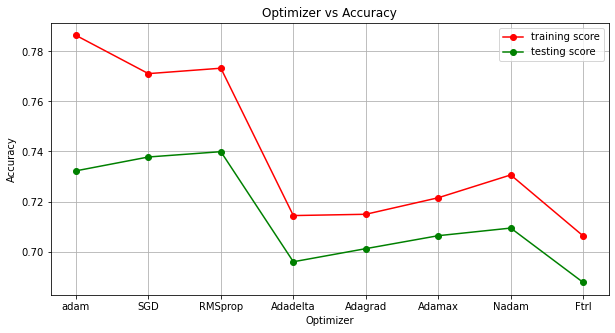

In [95]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Optimizer vs Accuracy')
ax.set_xlabel("Optimizer")
ax.set_ylabel("Accuracy")
ax.grid()

x = ['adam','SGD','RMSprop','Adadelta','Adagrad','Adamax','Nadam','Ftrl']

ax.plot(x, [adamTrain, SGDTrain, RMSpropTrain, AdadeltaTrain, AdagradTrain, AdamaxTrain, NadamTrain, FtrlTrain], 'o-', color="r", label='training score')
ax.plot(x, [adamTest, SGDTest, RMSpropTest, AdadeltaTest, AdagradTest, AdamaxTest, NadamTest, FtrlTest], 'o-', color="g", label='testing score')
ax.legend(loc="best")

plt.show()

### Final Model Using Testing Set

In [97]:
from sklearn import metrics
from sklearn.model_selection import KFold
from tensorflow import keras

model_2 = keras.models.Sequential([
    keras.layers.Dense(18, activation = 'tanh', input_shape=(11,)), 
    keras.layers.Dense(18, activation = 'tanh'),
    keras.layers.Dense(1, activation = 'sigmoid')])

model_1.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])  
fit_score = model_1.fit(X_trainRed, y_trainRed, epochs=100, batch_size=10, verbose=1)
model_1.evaluate(X_testRed, y_testRed,verbose=1)
Average(fit_score.history['accuracy'])
print('\n')


Train on 1087 samples
Epoch 1/100
1087/1087 [==============================] - 1s 1ms/sample - loss: 0.4787 - accuracy: 0.7737
Epoch 2/100
1087/1087 [==============================] - 0s 195us/sample - loss: 0.4763 - accuracy: 0.7764
Epoch 3/100
1087/1087 [==============================] - 0s 151us/sample - loss: 0.4756 - accuracy: 0.7746
Epoch 4/100
1087/1087 [==============================] - 0s 151us/sample - loss: 0.4751 - accuracy: 0.7783
Epoch 5/100
1087/1087 [==============================] - 0s 156us/sample - loss: 0.4742 - accuracy: 0.7801
Epoch 6/100
1087/1087 [==============================] - 0s 154us/sample - loss: 0.4735 - accuracy: 0.7783
Epoch 7/100
1087/1087 [==============================] - 0s 147us/sample - loss: 0.4729 - accuracy: 0.7764
Epoch 8/100
1087/1087 [==============================] - 0s 161us/sample - loss: 0.4713 - accuracy: 0.7875
Epoch 9/100
1087/1087 [==============================] - 0s 167us/sample - loss: 0.4711 - accuracy: 0.7820
Epoch 10/100
1087

1087/1087 [==============================] - 0s 158us/sample - loss: 0.4457 - accuracy: 0.7958
Epoch 77/100
1087/1087 [==============================] - 0s 149us/sample - loss: 0.4462 - accuracy: 0.7902
Epoch 78/100
1087/1087 [==============================] - 0s 152us/sample - loss: 0.4456 - accuracy: 0.7939
Epoch 79/100
1087/1087 [==============================] - 0s 156us/sample - loss: 0.4453 - accuracy: 0.7921
Epoch 80/100
1087/1087 [==============================] - 0s 162us/sample - loss: 0.4451 - accuracy: 0.7921
Epoch 81/100
1087/1087 [==============================] - 0s 158us/sample - loss: 0.4451 - accuracy: 0.7958
Epoch 82/100
1087/1087 [==============================] - 0s 156us/sample - loss: 0.4443 - accuracy: 0.7948
Epoch 83/100
1087/1087 [==============================] - 0s 149us/sample - loss: 0.4447 - accuracy: 0.7939
Epoch 84/100
1087/1087 [==============================] - 0s 150us/sample - loss: 0.4439 - accuracy: 0.7930
Epoch 85/100
1087/1087 [=================

In [98]:
print(Average(fit_score.history['accuracy']))

0.7887672507762908
